In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
pwd = os.getcwd() # Current Directory

In [4]:
df = pd.read_csv(pwd+'/Encoded_dataset/df_encoded_Voc.csv') # Loading encoded dataset
print(df.shape) # Shape of the dataset
df.head()

(26457, 30)


Cell_architecture  Cell_flexible  Cell_semitransparent  \
0           0.984353              0                     0   
1           0.933317              0                     0   
2           0.984353              0                     0   
3           0.984353              0                     0   
4           0.984353              0                     0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                  0.976900            0.946769          370.0   
1                  0.954397            0.964355          279.6   
2                  0.976900            0.956950          480.0   
3                  0.954397            0.997100          279.6   
4                  0.976900            0.956950          230.0   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                  0.985721                        0   
1                  0.959158                        0   
2                  0.980591                        0   
3                  0.976025                        0   
4                  0.980591                        1   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                  0                        1  ...   
1                                  0                        1  ...   
2                                  0                        1  ...   
3                                  0                        1  ...   
4                                  0                        0  ...   

   Perovskite_deposition_thermal_annealing_temperature  \
0                                           0.946647     
1                                           0.981932     
2                                           0.922134     
3                                           0.974922     
4                                           0.892650     

   Perovskite_deposition_thermal_annealing_time  \
0                                      0.940956   
1                                      1.005764   
2                                      0.913764   
3                                      0.967115   
4                                      0.965245   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                        0            0.993400   
1                                        0            0.997601   
2                                        0            0.870000   
3                                        0            0.993400   
4                                        0            0.993400   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0               148.0                  0.966546                    0.985235   
1                34.0                  0.966546                    0.954824   
2               218.0                  0.969644                    0.985235   
3                34.0                  0.966546                    0.954824   
4                20.0                  0.966546                    0.985235   

   Backcontact_thickness_list  Backcontact_deposition_procedure  \
0                        80.0                          0.968357   
1                       100.0                          0.968357   
2                        50.0                          0.968357   
3                       100.0                          0.968357   
4                        80.0                          0.968357   

   JV_default_Voc  
0           0.920  
1           1.080  
2           0.689  
3           1.080  
4           0.813  

[5 rows x 30 columns]

In [5]:
X = df.iloc[:,:-1] # Features
y = df['JV_default_Voc'] # Target Variable

In [6]:
X.head()

Cell_architecture  Cell_flexible  Cell_semitransparent  \
0           0.984353              0                     0   
1           0.933317              0                     0   
2           0.984353              0                     0   
3           0.984353              0                     0   
4           0.984353              0                     0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                  0.976900            0.946769          370.0   
1                  0.954397            0.964355          279.6   
2                  0.976900            0.956950          480.0   
3                  0.954397            0.997100          279.6   
4                  0.976900            0.956950          230.0   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                  0.985721                        0   
1                  0.959158                        0   
2                  0.980591                        0   
3                  0.976025                        0   
4                  0.980591                        1   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                  0                        1  ...   
1                                  0                        1  ...   
2                                  0                        1  ...   
3                                  0                        1  ...   
4                                  0                        0  ...   

   Perovskite_deposition_quenching_induced_crystallisation  \
0                                                  0         
1                                                  1         
2                                                  0         
3                                                  1         
4                                                  0         

   Perovskite_deposition_thermal_annealing_temperature  \
0                                           0.946647     
1                                           0.981932     
2                                           0.922134     
3                                           0.974922     
4                                           0.892650     

   Perovskite_deposition_thermal_annealing_time  \
0                                      0.940956   
1                                      1.005764   
2                                      0.913764   
3                                      0.967115   
4                                      0.965245   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                        0            0.993400   
1                                        0            0.997601   
2                                        0            0.870000   
3                                        0            0.993400   
4                                        0            0.993400   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0               148.0                  0.966546                    0.985235   
1                34.0                  0.966546                    0.954824   
2               218.0                  0.969644                    0.985235   
3                34.0                  0.966546                    0.954824   
4                20.0                  0.966546                    0.985235   

   Backcontact_thickness_list  Backcontact_deposition_procedure  
0                        80.0                          0.968357  
1                       100.0                          0.968357  
2                        50.0                          0.968357  
3                       100.0                          0.968357  
4                        80.0                          0.968357  

[5 rows x 29 columns]

In [7]:
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns]) # Scaling the features

In [8]:
X.head()

Cell_architecture  Cell_flexible  Cell_semitransparent  \
0           1.000000            0.0                   0.0   
1           0.661472            0.0                   0.0   
2           1.000000            0.0                   0.0   
3           1.000000            0.0                   0.0   
4           1.000000            0.0                   0.0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                  0.850091            0.624099       0.014780   
1                  0.714394            0.673521       0.011164   
2                  0.850091            0.652710       0.019180   
3                  0.714394            0.765541       0.011164   
4                  0.850091            0.652710       0.009180   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                  0.711099                      0.0   
1                  0.608886                      0.0   
2                  0.691359                      0.0   
3                  0.673789                      0.0   
4                  0.691359                      1.0   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                0.0                      1.0  ...   
1                                0.0                      1.0  ...   
2                                0.0                      1.0  ...   
3                                0.0                      1.0  ...   
4                                0.0                      0.0  ...   

   Perovskite_deposition_quenching_induced_crystallisation  \
0                                                0.0         
1                                                1.0         
2                                                0.0         
3                                                1.0         
4                                                0.0         

   Perovskite_deposition_thermal_annealing_temperature  \
0                                           0.374114     
1                                           0.426500     
2                                           0.337719     
3                                           0.416093     
4                                           0.293945     

   Perovskite_deposition_thermal_annealing_time  \
0                                      0.379818   
1                                      0.496248   
2                                      0.330966   
3                                      0.426812   
4                                      0.423453   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                      0.0            0.713547   
1                                      0.0            0.725947   
2                                      0.0            0.349233   
3                                      0.0            0.713547   
4                                      0.0            0.713547   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0             0.00588                  0.648297                    0.755073   
1             0.00132                  0.648297                    0.674818   
2             0.00868                  0.658147                    0.755073   
3             0.00132                  0.648297                    0.674818   
4             0.00076                  0.648297                    0.755073   

   Backcontact_thickness_list  Backcontact_deposition_procedure  
0                    0.000650                          0.558249  
1                    0.000817                          0.558249  
2                    0.000400                          0.558249  
3                    0.000817                          0.558249  
4                    0.000650                          0.558249  

[5 rows x 29 columns]

In [9]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
def parity_plot(predicted_train, predicted_test, y_train, y_test):
    """ Draw Parity Plot """
    plt.style.use('default')
    plt.figure(figsize=(5,5))
    plt.scatter(y_train, predicted_train, c='r', label='Train data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.scatter(y_test, predicted_test, c='b', label='Test data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual Voc (V)')
    plt.ylabel('Predicted Voc (V)')
    plt.legend(loc='upper left')
    return plt.show()

In [11]:
def model_builder(model_name, y_train, y_test):
    model_name.fit(X_train, y_train)
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
    print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print("r2 on train set: {:.4f}".format(r2_train))
    print("r2 on test set: {:.4f}".format(r2_test))
    parity_plot(y_pred_train, y_pred_test, y_train, y_test)

Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
The mean squared error (MSE) on test set: 0.0104
The root mean squared error (RMSE) on test set: 0.1018
The mean absolute error (MAE) on test set: 0.0564
r2 on train set: 0.8415
r2 on test set: 0.6827


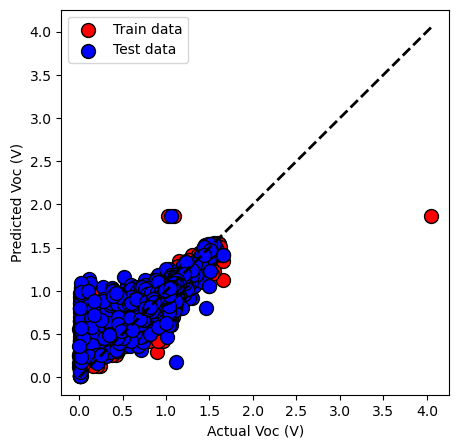

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto','sqrt', 'log2', None] # Warning - 'max_features' 'auto' is deprecated. 
}

# Define the search object
search = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=50, n_jobs=-1, random_state=42)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_rf = search.best_estimator_



model_builder(best_rf, y_train, y_test)

Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 1.0}
The mean squared error (MSE) on test set: 0.0106
The root mean squared error (RMSE) on test set: 0.1032
The mean absolute error (MAE) on test set: 0.0571
r2 on train set: 0.8531
r2 on test set: 0.6740


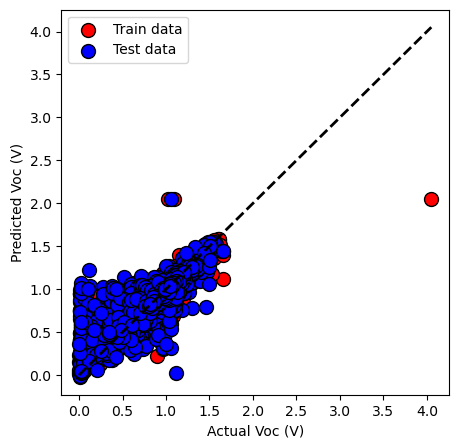

In [13]:
import xgboost as xgb

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the model
xgb = xgb.XGBRegressor(random_state = 42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

# Define the search object
search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')


# Get the best model
best_xgb = search.best_estimator_



model_builder(best_xgb, y_train, y_test)

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/minicon

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

Best parameters: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}
The mean squared error (MSE) on test set: 0.0111
The root mean squared error (RMSE) on test set: 0.1052
The mean absolute error (MAE) on test set: 0.0556
r2 on train set: 0.8059
r2 on test set: 0.6611


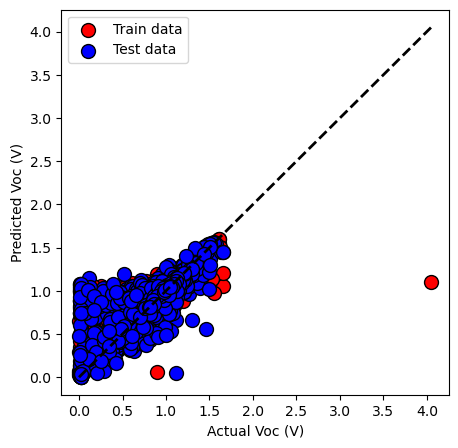

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbr = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.5, 0.75, 1.0],
    'loss': ['ls', 'lad', 'huber'] 
    
    # warning 'loss' - 'ls' --> 'squared_error', 'lad' --> 'absolute_error',
    # 'loss': ['squared_error','absolute_error','huber']
}

# Define the search object
search = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_gbr = search.best_estimator_



model_builder(best_gbr, y_train, y_test)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
The mean squared error (MSE) on test set: 0.0134
The root mean squared error (RMSE) on test set: 0.1158
The mean absolute error (MAE) on test set: 0.0661
r2 on train set: 0.7924
r2 on test set: 0.5898


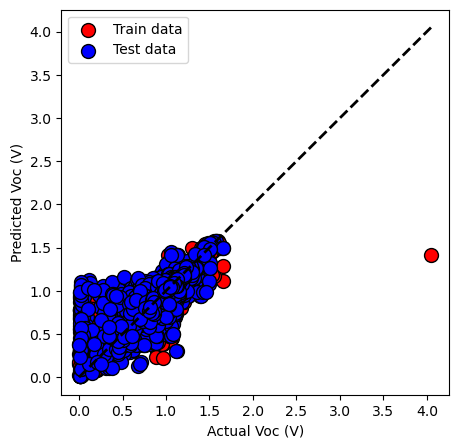

In [15]:
from sklearn.tree import DecisionTreeRegressor


# Define the model
dt = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the search object
search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_dt = search.best_estimator_



model_builder(best_dt, y_train, y_test)

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

Best parameters: {'C': 100, 'degree': 2, 'epsilon': 0.1, 'kernel': 'rbf'}
The mean squared error (MSE) on test set: 0.0162
The root mean squared error (RMSE) on test set: 0.1275
The mean absolute error (MAE) on test set: 0.0803
r2 on train set: 0.5465
r2 on test set: 0.5026


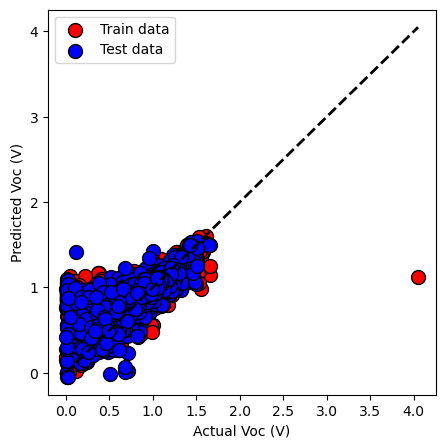

In [16]:
from sklearn.svm import SVR


# Define the model
svr = SVR()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.3],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]
}

# Define the search object
search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_svr = search.best_estimator_




model_builder(best_svr, y_train, y_test)

Best parameters: {'bootstrap': True, 'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 40}
The mean squared error (MSE) on test set: 0.0104
The root mean squared error (RMSE) on test set: 0.1022
The mean absolute error (MAE) on test set: 0.0565
r2 on train set: 0.8623
r2 on test set: 0.6802


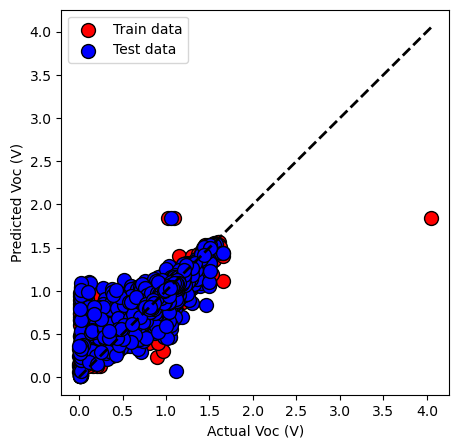

In [17]:
from sklearn.ensemble import BaggingRegressor


# Define the model
br = BaggingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False]
}

# Define the search object
search = GridSearchCV(br, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_br = search.best_estimator_




model_builder(best_br, y_train, y_test)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 30}
The mean squared error (MSE) on test set: 0.0104
The root mean squared error (RMSE) on test set: 0.1019
The mean absolute error (MAE) on test set: 0.0555
r2 on train set: 0.8547
r2 on test set: 0.6823


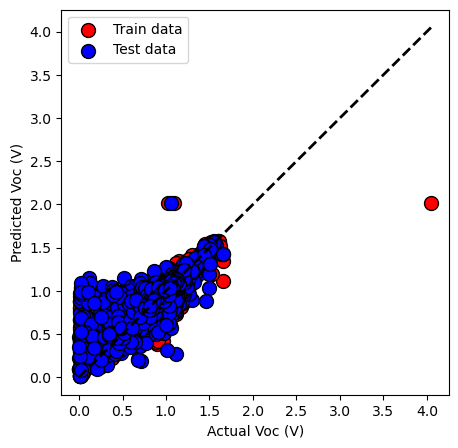

In [18]:
from sklearn.ensemble import ExtraTreesRegressor


# Define the model
et = ExtraTreesRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the search object
search = GridSearchCV(et, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_et = search.best_estimator_



model_builder(best_et, y_train, y_test)


Best parameters: {'alpha': 1, 'solver': 'sparse_cg'}
The mean squared error (MSE) on test set: 0.0191
The root mean squared error (RMSE) on test set: 0.1381
The mean absolute error (MAE) on test set: 0.0891
r2 on train set: 0.4151
r2 on test set: 0.4166


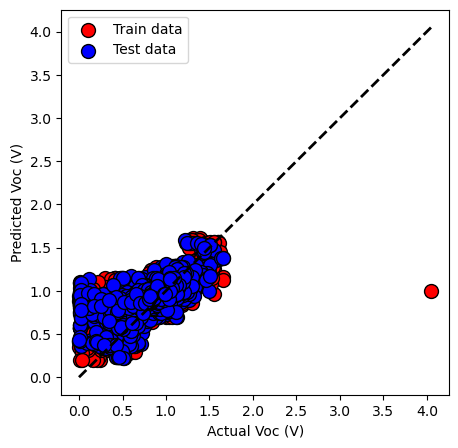

In [19]:
from sklearn.linear_model import Ridge


# Define the model
ridge = Ridge()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Define the search object
search = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_ridge = search.best_estimator_


model_builder(best_ridge, y_train, y_test)

Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
The mean squared error (MSE) on test set: 0.0126
The root mean squared error (RMSE) on test set: 0.1123
The mean absolute error (MAE) on test set: 0.0596
r2 on train set: 0.8990
r2 on test set: 0.6140


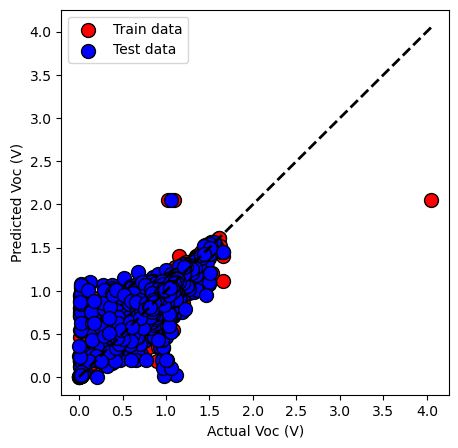

In [20]:
from sklearn.neighbors import KNeighborsRegressor


# Define the model
knr = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Define the search object
search = GridSearchCV(knr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_knr = search.best_estimator_


model_builder(best_knr, y_train, y_test)

0:	learn: 0.1758761	total: 47.8ms	remaining: 4.73s
1:	learn: 0.1703032	total: 49.1ms	remaining: 2.41s
2:	learn: 0.1655965	total: 50.4ms	remaining: 1.63s
3:	learn: 0.1617382	total: 51.7ms	remaining: 1.24s
4:	learn: 0.1583238	total: 54.8ms	remaining: 1.04s
5:	learn: 0.1554907	total: 122ms	remaining: 1.92s
6:	learn: 0.1530166	total: 132ms	remaining: 1.75s
7:	learn: 0.1509311	total: 140ms	remaining: 1.61s
8:	learn: 0.1491317	total: 156ms	remaining: 1.58s
9:	learn: 0.1475626	total: 203ms	remaining: 1.83s
10:	learn: 0.1462140	total: 214ms	remaining: 1.73s
11:	learn: 0.1449692	total: 314ms	remaining: 2.3s
12:	learn: 0.1437410	total: 321ms	remaining: 2.15s
13:	learn: 0.1428572	total: 325ms	remaining: 2s
14:	learn: 0.1419052	total: 328ms	remaining: 1.86s
15:	learn: 0.1410709	total: 418ms	remaining: 2.19s
16:	learn: 0.1403073	total: 420ms	remaining: 2.05s
17:	learn: 0.1395894	total: 423ms	remaining: 1.93s
18:	learn: 0.1388645	total: 482ms	remaining: 2.06s
19:	learn: 0.1381791	total: 485ms	remain

0:	learn: 0.1640744	total: 49.1ms	remaining: 4.86s
1:	learn: 0.1537471	total: 50.6ms	remaining: 2.48s
2:	learn: 0.1468033	total: 52.1ms	remaining: 1.68s
3:	learn: 0.1428192	total: 53.6ms	remaining: 1.28s
4:	learn: 0.1399500	total: 157ms	remaining: 2.99s
5:	learn: 0.1376254	total: 193ms	remaining: 3.03s
6:	learn: 0.1358967	total: 197ms	remaining: 2.62s
7:	learn: 0.1342087	total: 329ms	remaining: 3.78s
8:	learn: 0.1331104	total: 340ms	remaining: 3.43s
9:	learn: 0.1320360	total: 389ms	remaining: 3.5s
10:	learn: 0.1312629	total: 435ms	remaining: 3.52s
11:	learn: 0.1305457	total: 437ms	remaining: 3.2s
12:	learn: 0.1298327	total: 664ms	remaining: 4.45s
13:	learn: 0.1293777	total: 669ms	remaining: 4.11s
14:	learn: 0.1288534	total: 807ms	remaining: 4.57s
15:	learn: 0.1283944	total: 871ms	remaining: 4.57s
16:	learn: 0.1277483	total: 873ms	remaining: 4.26s
17:	learn: 0.1275293	total: 1s	remaining: 4.58s
18:	learn: 0.1271702	total: 1.07s	remaining: 4.55s
19:	learn: 0.1270284	total: 1.07s	remainin

0:	learn: 0.1634223	total: 51.9ms	remaining: 5.13s
1:	learn: 0.1535290	total: 66.7ms	remaining: 3.27s
2:	learn: 0.1461876	total: 68.6ms	remaining: 2.22s
3:	learn: 0.1419608	total: 119ms	remaining: 2.85s
4:	learn: 0.1390536	total: 183ms	remaining: 3.48s
5:	learn: 0.1365098	total: 186ms	remaining: 2.92s
6:	learn: 0.1345372	total: 295ms	remaining: 3.92s
7:	learn: 0.1331222	total: 304ms	remaining: 3.5s
8:	learn: 0.1319347	total: 359ms	remaining: 3.63s
9:	learn: 0.1307376	total: 361ms	remaining: 3.25s
10:	learn: 0.1299107	total: 436ms	remaining: 3.52s
11:	learn: 0.1291783	total: 540ms	remaining: 3.96s
12:	learn: 0.1285720	total: 637ms	remaining: 4.26s
13:	learn: 0.1281028	total: 639ms	remaining: 3.92s
14:	learn: 0.1276884	total: 646ms	remaining: 3.66s
15:	learn: 0.1273423	total: 650ms	remaining: 3.41s
16:	learn: 0.1268926	total: 848ms	remaining: 4.14s
17:	learn: 0.1265999	total: 852ms	remaining: 3.88s
18:	learn: 0.1263367	total: 915ms	remaining: 3.9s
19:	learn: 0.1259614	total: 922ms	remain

0:	learn: 0.1640327	total: 117ms	remaining: 11.6s
1:	learn: 0.1544937	total: 133ms	remaining: 6.52s
2:	learn: 0.1475078	total: 146ms	remaining: 4.72s
3:	learn: 0.1436675	total: 213ms	remaining: 5.1s
4:	learn: 0.1410210	total: 254ms	remaining: 4.83s
5:	learn: 0.1385906	total: 257ms	remaining: 4.03s
6:	learn: 0.1367872	total: 285ms	remaining: 3.78s
7:	learn: 0.1347662	total: 287ms	remaining: 3.3s
8:	learn: 0.1336786	total: 316ms	remaining: 3.19s
9:	learn: 0.1326083	total: 318ms	remaining: 2.86s
10:	learn: 0.1318197	total: 320ms	remaining: 2.59s
11:	learn: 0.1311243	total: 355ms	remaining: 2.6s
12:	learn: 0.1304552	total: 357ms	remaining: 2.39s
13:	learn: 0.1299547	total: 376ms	remaining: 2.31s
14:	learn: 0.1295125	total: 378ms	remaining: 2.14s
15:	learn: 0.1289201	total: 382ms	remaining: 2.01s
16:	learn: 0.1286311	total: 488ms	remaining: 2.38s
17:	learn: 0.1282991	total: 491ms	remaining: 2.24s
18:	learn: 0.1280848	total: 638ms	remaining: 2.72s
19:	learn: 0.1278451	total: 640ms	remaining:

0:	learn: 0.1743602	total: 48.9ms	remaining: 4.84s
1:	learn: 0.1687702	total: 50.5ms	remaining: 2.47s
2:	learn: 0.1640250	total: 54.5ms	remaining: 1.76s
3:	learn: 0.1601699	total: 58.9ms	remaining: 1.41s
4:	learn: 0.1568613	total: 85.9ms	remaining: 1.63s
5:	learn: 0.1538449	total: 99.5ms	remaining: 1.56s
6:	learn: 0.1512532	total: 129ms	remaining: 1.71s
7:	learn: 0.1490315	total: 293ms	remaining: 3.37s
8:	learn: 0.1471933	total: 323ms	remaining: 3.26s
9:	learn: 0.1456096	total: 544ms	remaining: 4.89s
10:	learn: 0.1441463	total: 550ms	remaining: 4.45s
11:	learn: 0.1429449	total: 554ms	remaining: 4.06s
12:	learn: 0.1417064	total: 727ms	remaining: 4.87s
13:	learn: 0.1407461	total: 729ms	remaining: 4.48s
14:	learn: 0.1399124	total: 1s	remaining: 5.7s
15:	learn: 0.1389896	total: 1.02s	remaining: 5.38s
16:	learn: 0.1382035	total: 1.12s	remaining: 5.45s
17:	learn: 0.1374919	total: 1.21s	remaining: 5.5s
18:	learn: 0.1368182	total: 1.25s	remaining: 5.34s
19:	learn: 0.1361371	total: 1.27s	remain

0:	learn: 0.1130901	total: 97.2ms	remaining: 9.63s
1:	learn: 0.1098305	total: 193ms	remaining: 9.45s
2:	learn: 0.1069053	total: 346ms	remaining: 11.2s
3:	learn: 0.1046810	total: 350ms	remaining: 8.4s
4:	learn: 0.1027351	total: 493ms	remaining: 9.37s
5:	learn: 0.1011077	total: 753ms	remaining: 11.8s
6:	learn: 0.0996147	total: 896ms	remaining: 11.9s
7:	learn: 0.0983544	total: 912ms	remaining: 10.5s
8:	learn: 0.0973096	total: 1.02s	remaining: 10.3s
9:	learn: 0.0954269	total: 1.05s	remaining: 9.49s
10:	learn: 0.0937928	total: 1.09s	remaining: 8.86s
11:	learn: 0.0920145	total: 1.11s	remaining: 8.17s
12:	learn: 0.0905592	total: 1.12s	remaining: 7.51s
13:	learn: 0.0893712	total: 1.15s	remaining: 7.08s
14:	learn: 0.0882792	total: 1.17s	remaining: 6.62s
15:	learn: 0.0874749	total: 1.18s	remaining: 6.18s
16:	learn: 0.0866580	total: 1.28s	remaining: 6.25s
17:	learn: 0.0858998	total: 1.41s	remaining: 6.43s
18:	learn: 0.0852792	total: 1.42s	remaining: 6.04s
19:	learn: 0.0845716	total: 1.53s	remaini

0:	learn: 0.1753634	total: 77.1ms	remaining: 7.63s
1:	learn: 0.1698684	total: 178ms	remaining: 8.7s
2:	learn: 0.1651830	total: 181ms	remaining: 5.86s
3:	learn: 0.1614428	total: 266ms	remaining: 6.38s
4:	learn: 0.1582058	total: 269ms	remaining: 5.1s
5:	learn: 0.1553713	total: 272ms	remaining: 4.26s
6:	learn: 0.1528447	total: 286ms	remaining: 3.81s
7:	learn: 0.1506152	total: 465ms	remaining: 5.34s
8:	learn: 0.1488064	total: 468ms	remaining: 4.73s
9:	learn: 0.1472071	total: 558ms	remaining: 5.02s
10:	learn: 0.1457628	total: 560ms	remaining: 4.53s
11:	learn: 0.1445042	total: 608ms	remaining: 4.46s
12:	learn: 0.1433594	total: 728ms	remaining: 4.87s
13:	learn: 0.1423843	total: 891ms	remaining: 5.47s
14:	learn: 0.1413590	total: 893ms	remaining: 5.06s
15:	learn: 0.1405544	total: 1.07s	remaining: 5.62s
16:	learn: 0.1395898	total: 1.07s	remaining: 5.24s
17:	learn: 0.1387717	total: 1.07s	remaining: 4.9s
18:	learn: 0.1380627	total: 1.32s	remaining: 5.62s
19:	learn: 0.1373781	total: 1.43s	remaining

0:	learn: 0.1128419	total: 88.4ms	remaining: 8.75s
1:	learn: 0.1096308	total: 92.8ms	remaining: 4.54s
2:	learn: 0.1066993	total: 308ms	remaining: 9.96s
3:	learn: 0.1044656	total: 436ms	remaining: 10.5s
4:	learn: 0.1024702	total: 501ms	remaining: 9.51s
5:	learn: 0.1008680	total: 503ms	remaining: 7.88s
6:	learn: 0.0994994	total: 505ms	remaining: 6.71s
7:	learn: 0.0982174	total: 727ms	remaining: 8.36s
8:	learn: 0.0961685	total: 730ms	remaining: 7.38s
9:	learn: 0.0952336	total: 770ms	remaining: 6.93s
10:	learn: 0.0936009	total: 886ms	remaining: 7.17s
11:	learn: 0.0918743	total: 978ms	remaining: 7.17s
12:	learn: 0.0912466	total: 1.01s	remaining: 6.75s
13:	learn: 0.0900391	total: 1.01s	remaining: 6.22s
14:	learn: 0.0889789	total: 1.07s	remaining: 6.04s
15:	learn: 0.0878664	total: 1.07s	remaining: 5.61s
16:	learn: 0.0873447	total: 1.07s	remaining: 5.25s
17:	learn: 0.0864575	total: 1.27s	remaining: 5.78s
18:	learn: 0.0856813	total: 1.29s	remaining: 5.48s
19:	learn: 0.0847803	total: 1.29s	remai

0:	learn: 0.1126176	total: 48.6ms	remaining: 4.81s
1:	learn: 0.1093944	total: 92.5ms	remaining: 4.53s
2:	learn: 0.1064580	total: 95.9ms	remaining: 3.1s
3:	learn: 0.1042165	total: 135ms	remaining: 3.25s
4:	learn: 0.1022999	total: 192ms	remaining: 3.65s
5:	learn: 0.1006973	total: 375ms	remaining: 5.87s
6:	learn: 0.0992237	total: 378ms	remaining: 5.03s
7:	learn: 0.0979585	total: 433ms	remaining: 4.98s
8:	learn: 0.0969326	total: 437ms	remaining: 4.42s
9:	learn: 0.0950684	total: 550ms	remaining: 4.95s
10:	learn: 0.0933935	total: 553ms	remaining: 4.47s
11:	learn: 0.0917361	total: 583ms	remaining: 4.28s
12:	learn: 0.0911659	total: 586ms	remaining: 3.92s
13:	learn: 0.0898854	total: 621ms	remaining: 3.81s
14:	learn: 0.0887649	total: 624ms	remaining: 3.54s
15:	learn: 0.0877069	total: 668ms	remaining: 3.51s
16:	learn: 0.0868835	total: 672ms	remaining: 3.28s
17:	learn: 0.0859331	total: 675ms	remaining: 3.07s
18:	learn: 0.0852849	total: 731ms	remaining: 3.12s
19:	learn: 0.0845811	total: 733ms	remai

0:	learn: 0.1125312	total: 48.7ms	remaining: 4.82s
1:	learn: 0.1093088	total: 50.7ms	remaining: 2.49s
2:	learn: 0.1063982	total: 52.7ms	remaining: 1.7s
3:	learn: 0.1041645	total: 54.5ms	remaining: 1.31s
4:	learn: 0.1021998	total: 58.5ms	remaining: 1.11s
5:	learn: 0.1005805	total: 62.1ms	remaining: 973ms
6:	learn: 0.0990751	total: 64.2ms	remaining: 853ms
7:	learn: 0.0978387	total: 66.2ms	remaining: 762ms
8:	learn: 0.0968139	total: 68.2ms	remaining: 689ms
9:	learn: 0.0948591	total: 152ms	remaining: 1.37s
10:	learn: 0.0931133	total: 190ms	remaining: 1.54s
11:	learn: 0.0917440	total: 281ms	remaining: 2.06s
12:	learn: 0.0903409	total: 285ms	remaining: 1.91s
13:	learn: 0.0890901	total: 328ms	remaining: 2.02s
14:	learn: 0.0879740	total: 534ms	remaining: 3.02s
15:	learn: 0.0875396	total: 545ms	remaining: 2.86s
16:	learn: 0.0870588	total: 849ms	remaining: 4.15s
17:	learn: 0.0862255	total: 852ms	remaining: 3.88s
18:	learn: 0.0854289	total: 948ms	remaining: 4.04s
19:	learn: 0.0845691	total: 1.12s

62:	learn: 0.1146486	total: 1.82s	remaining: 1.07s
63:	learn: 0.1144744	total: 1.9s	remaining: 1.07s
64:	learn: 0.1143775	total: 1.91s	remaining: 1.03s
65:	learn: 0.1142207	total: 2.03s	remaining: 1.05s
66:	learn: 0.1141470	total: 2.04s	remaining: 1s
67:	learn: 0.1137633	total: 2.04s	remaining: 962ms
68:	learn: 0.1136672	total: 2.15s	remaining: 966ms
69:	learn: 0.1135583	total: 2.16s	remaining: 926ms
70:	learn: 0.1133847	total: 2.16s	remaining: 884ms
71:	learn: 0.1132775	total: 2.25s	remaining: 875ms
72:	learn: 0.1131672	total: 2.25s	remaining: 833ms
73:	learn: 0.1130888	total: 2.32s	remaining: 815ms
74:	learn: 0.1130152	total: 2.35s	remaining: 784ms
75:	learn: 0.1128380	total: 2.35s	remaining: 744ms
76:	learn: 0.1126486	total: 2.38s	remaining: 711ms
77:	learn: 0.1125429	total: 2.39s	remaining: 673ms
78:	learn: 0.1124076	total: 2.42s	remaining: 644ms
79:	learn: 0.1122768	total: 2.42s	remaining: 606ms
80:	learn: 0.1121508	total: 2.47s	remaining: 580ms
81:	learn: 0.1120314	total: 2.48s	r

62:	learn: 0.0729187	total: 2.2s	remaining: 1.29s
63:	learn: 0.0728720	total: 2.2s	remaining: 1.24s
64:	learn: 0.0727763	total: 2.29s	remaining: 1.23s
65:	learn: 0.0727200	total: 2.29s	remaining: 1.18s
66:	learn: 0.0726777	total: 2.33s	remaining: 1.15s
67:	learn: 0.0726391	total: 2.33s	remaining: 1.1s
68:	learn: 0.0725972	total: 2.34s	remaining: 1.05s
69:	learn: 0.0725569	total: 2.39s	remaining: 1.02s
70:	learn: 0.0724072	total: 2.39s	remaining: 977ms
71:	learn: 0.0723239	total: 2.44s	remaining: 951ms
72:	learn: 0.0722582	total: 2.45s	remaining: 905ms
73:	learn: 0.0720874	total: 2.49s	remaining: 874ms
74:	learn: 0.0719808	total: 2.49s	remaining: 831ms
75:	learn: 0.0719584	total: 2.51s	remaining: 792ms
76:	learn: 0.0719094	total: 2.51s	remaining: 750ms
77:	learn: 0.0717887	total: 2.57s	remaining: 726ms
78:	learn: 0.0716571	total: 2.58s	remaining: 685ms
79:	learn: 0.0715810	total: 2.64s	remaining: 660ms
80:	learn: 0.0715530	total: 2.64s	remaining: 620ms
81:	learn: 0.0715026	total: 2.68s	

62:	learn: 0.0730230	total: 2.85s	remaining: 1.67s
63:	learn: 0.0728502	total: 2.85s	remaining: 1.6s
64:	learn: 0.0727889	total: 2.92s	remaining: 1.57s
65:	learn: 0.0726365	total: 2.92s	remaining: 1.5s
66:	learn: 0.0725802	total: 2.98s	remaining: 1.47s
67:	learn: 0.0724086	total: 3.12s	remaining: 1.47s
68:	learn: 0.0723378	total: 3.13s	remaining: 1.4s
69:	learn: 0.0723102	total: 3.29s	remaining: 1.41s
70:	learn: 0.0722115	total: 3.29s	remaining: 1.34s
71:	learn: 0.0721250	total: 3.34s	remaining: 1.3s
72:	learn: 0.0720583	total: 3.34s	remaining: 1.24s
73:	learn: 0.0719886	total: 3.42s	remaining: 1.2s
74:	learn: 0.0718955	total: 3.45s	remaining: 1.15s
75:	learn: 0.0718659	total: 3.45s	remaining: 1.09s
76:	learn: 0.0718364	total: 3.5s	remaining: 1.04s
77:	learn: 0.0718125	total: 3.5s	remaining: 988ms
78:	learn: 0.0717805	total: 3.56s	remaining: 946ms
79:	learn: 0.0716696	total: 3.58s	remaining: 895ms
80:	learn: 0.0715882	total: 3.67s	remaining: 862ms
81:	learn: 0.0715661	total: 3.68s	rema

62:	learn: 0.1161394	total: 2.5s	remaining: 1.47s
63:	learn: 0.1160302	total: 2.55s	remaining: 1.43s
64:	learn: 0.1157955	total: 2.55s	remaining: 1.37s
65:	learn: 0.1157003	total: 2.66s	remaining: 1.37s
66:	learn: 0.1155632	total: 2.67s	remaining: 1.31s
67:	learn: 0.1154702	total: 2.67s	remaining: 1.26s
68:	learn: 0.1153675	total: 2.76s	remaining: 1.24s
69:	learn: 0.1152973	total: 2.85s	remaining: 1.22s
70:	learn: 0.1151344	total: 2.87s	remaining: 1.17s
71:	learn: 0.1150234	total: 2.93s	remaining: 1.14s
72:	learn: 0.1149026	total: 2.93s	remaining: 1.08s
73:	learn: 0.1147906	total: 2.94s	remaining: 1.03s
74:	learn: 0.1147041	total: 3.06s	remaining: 1.02s
75:	learn: 0.1146029	total: 3.07s	remaining: 969ms
76:	learn: 0.1145378	total: 3.17s	remaining: 948ms
77:	learn: 0.1142924	total: 3.19s	remaining: 899ms
78:	learn: 0.1141741	total: 3.19s	remaining: 848ms
79:	learn: 0.1140282	total: 3.27s	remaining: 817ms
80:	learn: 0.1138206	total: 3.27s	remaining: 768ms
81:	learn: 0.1136609	total: 3.34

62:	learn: 0.0733293	total: 2.67s	remaining: 1.57s
63:	learn: 0.0732395	total: 2.72s	remaining: 1.53s
64:	learn: 0.0730738	total: 2.72s	remaining: 1.47s
65:	learn: 0.0730320	total: 2.72s	remaining: 1.4s
66:	learn: 0.0729478	total: 2.73s	remaining: 1.34s
67:	learn: 0.0728381	total: 2.73s	remaining: 1.28s
68:	learn: 0.0727207	total: 2.74s	remaining: 1.23s
69:	learn: 0.0726891	total: 2.74s	remaining: 1.17s
70:	learn: 0.0726294	total: 2.84s	remaining: 1.16s
71:	learn: 0.0725693	total: 2.86s	remaining: 1.11s
72:	learn: 0.0724998	total: 3.03s	remaining: 1.12s
73:	learn: 0.0724239	total: 3.03s	remaining: 1.06s
74:	learn: 0.0723792	total: 3.09s	remaining: 1.03s
75:	learn: 0.0722691	total: 3.12s	remaining: 985ms
76:	learn: 0.0722449	total: 3.28s	remaining: 980ms
77:	learn: 0.0721914	total: 3.29s	remaining: 927ms
78:	learn: 0.0720519	total: 3.38s	remaining: 899ms
79:	learn: 0.0720134	total: 3.39s	remaining: 847ms
80:	learn: 0.0718554	total: 3.44s	remaining: 808ms
81:	learn: 0.0717894	total: 3.45

62:	learn: 0.1168584	total: 3.28s	remaining: 1.93s
63:	learn: 0.1167467	total: 3.35s	remaining: 1.88s
64:	learn: 0.1166270	total: 3.35s	remaining: 1.8s
65:	learn: 0.1163553	total: 3.37s	remaining: 1.74s
66:	learn: 0.1162287	total: 3.42s	remaining: 1.68s
67:	learn: 0.1161200	total: 3.44s	remaining: 1.62s
68:	learn: 0.1159599	total: 3.45s	remaining: 1.55s
69:	learn: 0.1158899	total: 3.45s	remaining: 1.48s
70:	learn: 0.1156602	total: 3.59s	remaining: 1.46s
71:	learn: 0.1156056	total: 3.59s	remaining: 1.4s
72:	learn: 0.1154375	total: 3.71s	remaining: 1.37s
73:	learn: 0.1153358	total: 3.71s	remaining: 1.3s
74:	learn: 0.1150714	total: 3.88s	remaining: 1.29s
75:	learn: 0.1148596	total: 3.88s	remaining: 1.23s
76:	learn: 0.1147090	total: 3.9s	remaining: 1.17s
77:	learn: 0.1145305	total: 3.98s	remaining: 1.12s
78:	learn: 0.1142940	total: 4.09s	remaining: 1.09s
79:	learn: 0.1141496	total: 4.1s	remaining: 1.02s
80:	learn: 0.1141175	total: 4.18s	remaining: 982ms
81:	learn: 0.1140321	total: 4.19s	re

62:	learn: 0.1271302	total: 2.64s	remaining: 5.74s
63:	learn: 0.1270690	total: 2.82s	remaining: 5.99s
64:	learn: 0.1269559	total: 2.91s	remaining: 6.04s
65:	learn: 0.1268137	total: 2.91s	remaining: 5.92s
66:	learn: 0.1266755	total: 2.94s	remaining: 5.83s
67:	learn: 0.1266262	total: 2.94s	remaining: 5.7s
68:	learn: 0.1265136	total: 2.97s	remaining: 5.63s
69:	learn: 0.1264246	total: 2.97s	remaining: 5.51s
70:	learn: 0.1262386	total: 3.18s	remaining: 5.78s
71:	learn: 0.1261572	total: 3.21s	remaining: 5.7s
72:	learn: 0.1260420	total: 3.21s	remaining: 5.58s
73:	learn: 0.1259585	total: 3.27s	remaining: 5.57s
74:	learn: 0.1258957	total: 3.27s	remaining: 5.46s
75:	learn: 0.1258476	total: 3.32s	remaining: 5.42s
76:	learn: 0.1257681	total: 3.33s	remaining: 5.31s
77:	learn: 0.1257006	total: 3.36s	remaining: 5.25s
78:	learn: 0.1256215	total: 3.36s	remaining: 5.15s
79:	learn: 0.1255748	total: 3.39s	remaining: 5.09s
80:	learn: 0.1254899	total: 3.4s	remaining: 4.99s
81:	learn: 0.1254200	total: 3.46s	

62:	learn: 0.0730952	total: 3.15s	remaining: 1.85s
63:	learn: 0.0729727	total: 3.15s	remaining: 1.77s
64:	learn: 0.0728407	total: 3.21s	remaining: 1.73s
65:	learn: 0.0727322	total: 3.21s	remaining: 1.65s
66:	learn: 0.0726069	total: 3.32s	remaining: 1.64s
67:	learn: 0.0725141	total: 3.36s	remaining: 1.58s
68:	learn: 0.0724741	total: 3.36s	remaining: 1.51s
69:	learn: 0.0724096	total: 3.4s	remaining: 1.46s
70:	learn: 0.0723261	total: 3.4s	remaining: 1.39s
71:	learn: 0.0722791	total: 3.48s	remaining: 1.35s
72:	learn: 0.0722392	total: 3.62s	remaining: 1.34s
73:	learn: 0.0722152	total: 3.63s	remaining: 1.27s
74:	learn: 0.0721662	total: 3.69s	remaining: 1.23s
75:	learn: 0.0721248	total: 3.73s	remaining: 1.18s
76:	learn: 0.0720707	total: 3.78s	remaining: 1.13s
77:	learn: 0.0719912	total: 3.78s	remaining: 1.07s
78:	learn: 0.0719320	total: 3.84s	remaining: 1.02s
79:	learn: 0.0718906	total: 3.86s	remaining: 965ms
80:	learn: 0.0718513	total: 3.93s	remaining: 922ms
81:	learn: 0.0718165	total: 3.98s

62:	learn: 0.0708990	total: 2.97s	remaining: 1.75s
63:	learn: 0.0707343	total: 2.98s	remaining: 1.68s
64:	learn: 0.0706889	total: 3.08s	remaining: 1.66s
65:	learn: 0.0706288	total: 3.09s	remaining: 1.59s
66:	learn: 0.0705746	total: 3.09s	remaining: 1.52s
67:	learn: 0.0705360	total: 3.18s	remaining: 1.5s
68:	learn: 0.0704040	total: 3.22s	remaining: 1.45s
69:	learn: 0.0703466	total: 3.22s	remaining: 1.38s
70:	learn: 0.0702764	total: 3.36s	remaining: 1.37s
71:	learn: 0.0701914	total: 3.42s	remaining: 1.33s
72:	learn: 0.0701301	total: 3.43s	remaining: 1.27s
73:	learn: 0.0700398	total: 3.49s	remaining: 1.23s
74:	learn: 0.0699865	total: 3.51s	remaining: 1.17s
75:	learn: 0.0698961	total: 3.59s	remaining: 1.13s
76:	learn: 0.0698227	total: 3.6s	remaining: 1.07s
77:	learn: 0.0697656	total: 3.65s	remaining: 1.03s
78:	learn: 0.0697125	total: 3.66s	remaining: 973ms
79:	learn: 0.0696782	total: 3.67s	remaining: 916ms
80:	learn: 0.0696252	total: 3.75s	remaining: 880ms
81:	learn: 0.0695985	total: 3.75s

62:	learn: 0.0712254	total: 4.4s	remaining: 2.58s
63:	learn: 0.0711918	total: 4.4s	remaining: 2.48s
64:	learn: 0.0710640	total: 4.42s	remaining: 2.38s
65:	learn: 0.0710003	total: 4.43s	remaining: 2.28s
66:	learn: 0.0709241	total: 4.49s	remaining: 2.21s
67:	learn: 0.0708562	total: 4.51s	remaining: 2.12s
68:	learn: 0.0707192	total: 4.51s	remaining: 2.03s
69:	learn: 0.0706673	total: 4.56s	remaining: 1.96s
70:	learn: 0.0705413	total: 4.64s	remaining: 1.9s
71:	learn: 0.0704549	total: 4.65s	remaining: 1.81s
72:	learn: 0.0704311	total: 4.65s	remaining: 1.72s
73:	learn: 0.0703533	total: 4.65s	remaining: 1.64s
74:	learn: 0.0702170	total: 4.69s	remaining: 1.56s
75:	learn: 0.0700416	total: 4.7s	remaining: 1.48s
76:	learn: 0.0699720	total: 4.71s	remaining: 1.41s
77:	learn: 0.0699250	total: 4.76s	remaining: 1.34s
78:	learn: 0.0698409	total: 4.82s	remaining: 1.28s
79:	learn: 0.0697616	total: 4.82s	remaining: 1.21s
80:	learn: 0.0697069	total: 4.86s	remaining: 1.14s
81:	learn: 0.0696391	total: 4.9s	re

62:	learn: 0.0712560	total: 3.05s	remaining: 1.79s
63:	learn: 0.0710839	total: 3.19s	remaining: 1.79s
64:	learn: 0.0710407	total: 3.21s	remaining: 1.73s
65:	learn: 0.0709188	total: 3.22s	remaining: 1.66s
66:	learn: 0.0708386	total: 3.25s	remaining: 1.6s
67:	learn: 0.0707615	total: 3.3s	remaining: 1.55s
68:	learn: 0.0706866	total: 3.3s	remaining: 1.48s
69:	learn: 0.0706213	total: 3.47s	remaining: 1.49s
70:	learn: 0.0705350	total: 3.47s	remaining: 1.42s
71:	learn: 0.0704045	total: 3.62s	remaining: 1.41s
72:	learn: 0.0703422	total: 3.62s	remaining: 1.34s
73:	learn: 0.0702548	total: 3.77s	remaining: 1.32s
74:	learn: 0.0702202	total: 3.78s	remaining: 1.26s
75:	learn: 0.0701436	total: 3.85s	remaining: 1.22s
76:	learn: 0.0700963	total: 3.9s	remaining: 1.16s
77:	learn: 0.0700784	total: 3.9s	remaining: 1.1s
78:	learn: 0.0699877	total: 3.96s	remaining: 1.05s
79:	learn: 0.0699450	total: 3.96s	remaining: 990ms
80:	learn: 0.0698668	total: 3.98s	remaining: 934ms
81:	learn: 0.0698003	total: 3.99s	rem

62:	learn: 0.0709756	total: 3.63s	remaining: 2.13s
63:	learn: 0.0708800	total: 3.7s	remaining: 2.08s
64:	learn: 0.0706732	total: 3.7s	remaining: 1.99s
65:	learn: 0.0705708	total: 3.78s	remaining: 1.95s
66:	learn: 0.0704045	total: 3.89s	remaining: 1.91s
67:	learn: 0.0703825	total: 3.91s	remaining: 1.84s
68:	learn: 0.0702268	total: 3.93s	remaining: 1.77s
69:	learn: 0.0701477	total: 3.98s	remaining: 1.7s
70:	learn: 0.0700782	total: 3.99s	remaining: 1.63s
71:	learn: 0.0700183	total: 4.03s	remaining: 1.56s
72:	learn: 0.0699426	total: 4.08s	remaining: 1.51s
73:	learn: 0.0698956	total: 4.08s	remaining: 1.44s
74:	learn: 0.0698065	total: 4.09s	remaining: 1.36s
75:	learn: 0.0697182	total: 4.13s	remaining: 1.3s
76:	learn: 0.0696539	total: 4.14s	remaining: 1.24s
77:	learn: 0.0695774	total: 4.19s	remaining: 1.18s
78:	learn: 0.0695361	total: 4.39s	remaining: 1.17s
79:	learn: 0.0694550	total: 4.4s	remaining: 1.1s
80:	learn: 0.0694350	total: 4.44s	remaining: 1.04s
81:	learn: 0.0693915	total: 4.45s	rem

62:	learn: 0.1255754	total: 2.94s	remaining: 6.39s
63:	learn: 0.1254740	total: 2.98s	remaining: 6.33s
64:	learn: 0.1253742	total: 3s	remaining: 6.23s
65:	learn: 0.1252365	total: 3.01s	remaining: 6.1s
66:	learn: 0.1251179	total: 3.01s	remaining: 5.97s
67:	learn: 0.1250240	total: 3.16s	remaining: 6.14s
68:	learn: 0.1249497	total: 3.16s	remaining: 6.01s
69:	learn: 0.1248592	total: 3.17s	remaining: 5.88s
70:	learn: 0.1247732	total: 3.21s	remaining: 5.83s
71:	learn: 0.1247085	total: 3.3s	remaining: 5.86s
72:	learn: 0.1246308	total: 3.3s	remaining: 5.74s
73:	learn: 0.1245631	total: 3.31s	remaining: 5.64s
74:	learn: 0.1244951	total: 3.35s	remaining: 5.59s
75:	learn: 0.1244094	total: 3.43s	remaining: 5.6s
76:	learn: 0.1243512	total: 3.43s	remaining: 5.49s
77:	learn: 0.1242626	total: 3.44s	remaining: 5.38s
78:	learn: 0.1241420	total: 3.61s	remaining: 5.53s
79:	learn: 0.1240820	total: 3.63s	remaining: 5.45s
80:	learn: 0.1240226	total: 3.64s	remaining: 5.34s
81:	learn: 0.1239630	total: 3.79s	rema

124:	learn: 0.1230293	total: 4.16s	remaining: 2.5s
125:	learn: 0.1229901	total: 4.16s	remaining: 2.44s
126:	learn: 0.1229376	total: 4.29s	remaining: 2.46s
127:	learn: 0.1228821	total: 4.33s	remaining: 2.44s
128:	learn: 0.1228298	total: 4.33s	remaining: 2.38s
129:	learn: 0.1227710	total: 4.34s	remaining: 2.34s
130:	learn: 0.1227084	total: 4.34s	remaining: 2.29s
131:	learn: 0.1226245	total: 4.39s	remaining: 2.26s
132:	learn: 0.1225885	total: 4.39s	remaining: 2.21s
133:	learn: 0.1225535	total: 4.43s	remaining: 2.18s
134:	learn: 0.1225093	total: 4.43s	remaining: 2.13s
135:	learn: 0.1224493	total: 4.43s	remaining: 2.08s
136:	learn: 0.1224318	total: 4.48s	remaining: 2.06s
137:	learn: 0.1223902	total: 4.48s	remaining: 2.01s
138:	learn: 0.1223385	total: 4.55s	remaining: 2s
139:	learn: 0.1222886	total: 4.55s	remaining: 1.95s
140:	learn: 0.1222598	total: 4.58s	remaining: 1.92s
141:	learn: 0.1222223	total: 4.68s	remaining: 1.91s
142:	learn: 0.1221845	total: 4.68s	remaining: 1.87s
143:	learn: 0.12

123:	learn: 0.1222833	total: 4.37s	remaining: 2.68s
124:	learn: 0.1222458	total: 4.58s	remaining: 2.75s
125:	learn: 0.1221904	total: 4.67s	remaining: 2.74s
126:	learn: 0.1221637	total: 4.67s	remaining: 2.69s
127:	learn: 0.1221270	total: 4.68s	remaining: 2.63s
128:	learn: 0.1221041	total: 4.79s	remaining: 2.63s
129:	learn: 0.1220321	total: 4.84s	remaining: 2.6s
130:	learn: 0.1220184	total: 4.84s	remaining: 2.55s
131:	learn: 0.1219817	total: 5.02s	remaining: 2.59s
132:	learn: 0.1219371	total: 5.18s	remaining: 2.61s
133:	learn: 0.1218826	total: 5.26s	remaining: 2.59s
134:	learn: 0.1218162	total: 5.26s	remaining: 2.53s
135:	learn: 0.1217994	total: 5.38s	remaining: 2.53s
136:	learn: 0.1217474	total: 5.39s	remaining: 2.48s
137:	learn: 0.1217405	total: 5.39s	remaining: 2.42s
138:	learn: 0.1216587	total: 5.4s	remaining: 2.37s
139:	learn: 0.1216133	total: 5.47s	remaining: 2.35s
140:	learn: 0.1215770	total: 5.57s	remaining: 2.33s
141:	learn: 0.1215127	total: 5.6s	remaining: 2.29s
142:	learn: 0.1

22:	learn: 0.0771797	total: 927ms	remaining: 7.14s
23:	learn: 0.0769541	total: 930ms	remaining: 6.82s
24:	learn: 0.0768375	total: 1.01s	remaining: 7.08s
25:	learn: 0.0766696	total: 1.01s	remaining: 6.79s
26:	learn: 0.0765776	total: 1.02s	remaining: 6.52s
27:	learn: 0.0764709	total: 1.1s	remaining: 6.78s
28:	learn: 0.0764033	total: 1.11s	remaining: 6.53s
29:	learn: 0.0763171	total: 1.18s	remaining: 6.66s
30:	learn: 0.0761567	total: 1.22s	remaining: 6.67s
31:	learn: 0.0760679	total: 1.23s	remaining: 6.44s
32:	learn: 0.0759179	total: 1.27s	remaining: 6.44s
33:	learn: 0.0758655	total: 1.27s	remaining: 6.23s
34:	learn: 0.0756843	total: 1.35s	remaining: 6.37s
35:	learn: 0.0756060	total: 1.35s	remaining: 6.17s
36:	learn: 0.0754806	total: 1.43s	remaining: 6.29s
37:	learn: 0.0753327	total: 1.43s	remaining: 6.11s
38:	learn: 0.0752224	total: 1.47s	remaining: 6.06s
39:	learn: 0.0751148	total: 1.56s	remaining: 6.24s
40:	learn: 0.0749830	total: 1.64s	remaining: 6.36s
41:	learn: 0.0748424	total: 1.64

123:	learn: 0.0747921	total: 4.69s	remaining: 2.87s
124:	learn: 0.0747514	total: 4.69s	remaining: 2.81s
125:	learn: 0.0747300	total: 4.73s	remaining: 2.78s
126:	learn: 0.0746890	total: 4.74s	remaining: 2.72s
127:	learn: 0.0746551	total: 4.78s	remaining: 2.69s
128:	learn: 0.0746316	total: 4.78s	remaining: 2.63s
129:	learn: 0.0745640	total: 4.79s	remaining: 2.58s
130:	learn: 0.0745194	total: 4.86s	remaining: 2.56s
131:	learn: 0.0744788	total: 4.87s	remaining: 2.51s
132:	learn: 0.0744331	total: 4.93s	remaining: 2.48s
133:	learn: 0.0744053	total: 4.93s	remaining: 2.43s
134:	learn: 0.0743641	total: 4.94s	remaining: 2.38s
135:	learn: 0.0743477	total: 4.96s	remaining: 2.33s
136:	learn: 0.0742854	total: 4.97s	remaining: 2.29s
137:	learn: 0.0742706	total: 5.05s	remaining: 2.27s
138:	learn: 0.0742461	total: 5.08s	remaining: 2.23s
139:	learn: 0.0742335	total: 5.14s	remaining: 2.2s
140:	learn: 0.0742204	total: 5.15s	remaining: 2.15s
141:	learn: 0.0741796	total: 5.22s	remaining: 2.13s
142:	learn: 0

124:	learn: 0.1223934	total: 4.67s	remaining: 2.8s
125:	learn: 0.1223621	total: 4.76s	remaining: 2.8s
126:	learn: 0.1223282	total: 4.91s	remaining: 2.82s
127:	learn: 0.1222796	total: 4.92s	remaining: 2.77s
128:	learn: 0.1222317	total: 5.12s	remaining: 2.81s
129:	learn: 0.1221910	total: 5.17s	remaining: 2.78s
130:	learn: 0.1221083	total: 5.22s	remaining: 2.75s
131:	learn: 0.1220807	total: 5.32s	remaining: 2.74s
132:	learn: 0.1220620	total: 5.33s	remaining: 2.68s
133:	learn: 0.1219883	total: 5.35s	remaining: 2.63s
134:	learn: 0.1219414	total: 5.35s	remaining: 2.58s
135:	learn: 0.1219222	total: 5.58s	remaining: 2.63s
136:	learn: 0.1218932	total: 5.58s	remaining: 2.57s
137:	learn: 0.1218483	total: 5.59s	remaining: 2.51s
138:	learn: 0.1218146	total: 5.66s	remaining: 2.48s
139:	learn: 0.1218031	total: 5.66s	remaining: 2.43s
140:	learn: 0.1217198	total: 5.85s	remaining: 2.45s
141:	learn: 0.1216817	total: 5.86s	remaining: 2.39s
142:	learn: 0.1216132	total: 5.86s	remaining: 2.33s
143:	learn: 0.

142:	learn: 0.0738630	total: 6.19s	remaining: 2.47s
143:	learn: 0.0738411	total: 6.19s	remaining: 2.41s
144:	learn: 0.0738208	total: 6.2s	remaining: 2.35s
145:	learn: 0.0737797	total: 6.28s	remaining: 2.32s
146:	learn: 0.0737255	total: 6.3s	remaining: 2.27s
147:	learn: 0.0736949	total: 6.3s	remaining: 2.21s
148:	learn: 0.0736639	total: 6.41s	remaining: 2.19s
149:	learn: 0.0736434	total: 6.41s	remaining: 2.14s
150:	learn: 0.0736068	total: 6.47s	remaining: 2.1s
151:	learn: 0.0735847	total: 6.48s	remaining: 2.05s
152:	learn: 0.0735536	total: 6.54s	remaining: 2.01s
153:	learn: 0.0735273	total: 6.56s	remaining: 1.96s
154:	learn: 0.0734947	total: 6.56s	remaining: 1.9s
155:	learn: 0.0734702	total: 6.58s	remaining: 1.86s
156:	learn: 0.0734250	total: 6.59s	remaining: 1.8s
157:	learn: 0.0734036	total: 6.68s	remaining: 1.77s
158:	learn: 0.0733902	total: 6.68s	remaining: 1.72s
159:	learn: 0.0733705	total: 6.71s	remaining: 1.68s
160:	learn: 0.0733374	total: 6.72s	remaining: 1.63s
161:	learn: 0.0733

124:	learn: 0.1144423	total: 6.17s	remaining: 3.7s
125:	learn: 0.1143819	total: 6.17s	remaining: 3.62s
126:	learn: 0.1142585	total: 6.31s	remaining: 3.63s
127:	learn: 0.1141352	total: 6.43s	remaining: 3.62s
128:	learn: 0.1140753	total: 6.43s	remaining: 3.54s
129:	learn: 0.1139944	total: 6.53s	remaining: 3.51s
130:	learn: 0.1139429	total: 6.55s	remaining: 3.45s
131:	learn: 0.1138374	total: 6.68s	remaining: 3.44s
132:	learn: 0.1137377	total: 6.72s	remaining: 3.38s
133:	learn: 0.1137190	total: 6.8s	remaining: 3.35s
134:	learn: 0.1136424	total: 6.87s	remaining: 3.31s
135:	learn: 0.1135857	total: 6.92s	remaining: 3.26s
136:	learn: 0.1135032	total: 6.97s	remaining: 3.2s
137:	learn: 0.1134270	total: 6.97s	remaining: 3.13s
138:	learn: 0.1134078	total: 6.97s	remaining: 3.06s
139:	learn: 0.1133663	total: 7.01s	remaining: 3s
140:	learn: 0.1133196	total: 7.01s	remaining: 2.94s
141:	learn: 0.1132041	total: 7.02s	remaining: 2.87s
142:	learn: 0.1131389	total: 7.06s	remaining: 2.81s
143:	learn: 0.1131

123:	learn: 0.0749569	total: 6.14s	remaining: 3.77s
124:	learn: 0.0749195	total: 6.16s	remaining: 3.69s
125:	learn: 0.0748800	total: 6.16s	remaining: 3.62s
126:	learn: 0.0748149	total: 6.29s	remaining: 3.61s
127:	learn: 0.0747339	total: 6.31s	remaining: 3.55s
128:	learn: 0.0746850	total: 6.48s	remaining: 3.56s
129:	learn: 0.0746603	total: 6.51s	remaining: 3.5s
130:	learn: 0.0746128	total: 6.61s	remaining: 3.48s
131:	learn: 0.0745874	total: 6.61s	remaining: 3.41s
132:	learn: 0.0745472	total: 6.66s	remaining: 3.35s
133:	learn: 0.0745109	total: 6.67s	remaining: 3.29s
134:	learn: 0.0744774	total: 6.77s	remaining: 3.26s
135:	learn: 0.0744573	total: 6.79s	remaining: 3.19s
136:	learn: 0.0743933	total: 6.86s	remaining: 3.15s
137:	learn: 0.0743676	total: 6.86s	remaining: 3.08s
138:	learn: 0.0743281	total: 6.92s	remaining: 3.04s
139:	learn: 0.0743096	total: 6.97s	remaining: 2.99s
140:	learn: 0.0742790	total: 7.09s	remaining: 2.96s
141:	learn: 0.0742532	total: 7.12s	remaining: 2.91s
142:	learn: 0

124:	learn: 0.0746743	total: 5.92s	remaining: 3.55s
125:	learn: 0.0746566	total: 6.15s	remaining: 3.61s
126:	learn: 0.0746224	total: 6.16s	remaining: 3.54s
127:	learn: 0.0745740	total: 6.37s	remaining: 3.58s
128:	learn: 0.0745443	total: 6.45s	remaining: 3.55s
129:	learn: 0.0744868	total: 6.47s	remaining: 3.49s
130:	learn: 0.0744571	total: 6.6s	remaining: 3.48s
131:	learn: 0.0744172	total: 6.6s	remaining: 3.4s
132:	learn: 0.0743813	total: 6.68s	remaining: 3.36s
133:	learn: 0.0743567	total: 6.73s	remaining: 3.31s
134:	learn: 0.0743306	total: 6.81s	remaining: 3.28s
135:	learn: 0.0743085	total: 6.82s	remaining: 3.21s
136:	learn: 0.0742622	total: 6.82s	remaining: 3.14s
137:	learn: 0.0742336	total: 6.96s	remaining: 3.13s
138:	learn: 0.0741952	total: 7.07s	remaining: 3.1s
139:	learn: 0.0741620	total: 7.12s	remaining: 3.05s
140:	learn: 0.0741394	total: 7.23s	remaining: 3.02s
141:	learn: 0.0741003	total: 7.33s	remaining: 2.99s
142:	learn: 0.0740890	total: 7.33s	remaining: 2.92s
143:	learn: 0.07

124:	learn: 0.1138648	total: 5.68s	remaining: 3.41s
125:	learn: 0.1138089	total: 5.69s	remaining: 3.34s
126:	learn: 0.1137997	total: 5.78s	remaining: 3.32s
127:	learn: 0.1136688	total: 5.79s	remaining: 3.25s
128:	learn: 0.1136046	total: 5.88s	remaining: 3.24s
129:	learn: 0.1135150	total: 5.88s	remaining: 3.17s
130:	learn: 0.1134000	total: 5.89s	remaining: 3.1s
131:	learn: 0.1133395	total: 6.07s	remaining: 3.13s
132:	learn: 0.1131875	total: 6.1s	remaining: 3.07s
133:	learn: 0.1130980	total: 6.15s	remaining: 3.03s
134:	learn: 0.1130405	total: 6.23s	remaining: 3s
135:	learn: 0.1129387	total: 6.23s	remaining: 2.93s
136:	learn: 0.1128853	total: 6.28s	remaining: 2.88s
137:	learn: 0.1128184	total: 6.29s	remaining: 2.83s
138:	learn: 0.1127887	total: 6.29s	remaining: 2.76s
139:	learn: 0.1127275	total: 6.3s	remaining: 2.7s
140:	learn: 0.1126389	total: 6.3s	remaining: 2.63s
141:	learn: 0.1126040	total: 6.38s	remaining: 2.6s
142:	learn: 0.1125836	total: 6.38s	remaining: 2.54s
143:	learn: 0.1125325

22:	learn: 0.1239207	total: 1.08s	remaining: 8.34s
23:	learn: 0.1235313	total: 1.08s	remaining: 7.96s
24:	learn: 0.1233403	total: 1.2s	remaining: 8.41s
25:	learn: 0.1229049	total: 1.22s	remaining: 8.18s
26:	learn: 0.1226690	total: 1.39s	remaining: 8.88s
27:	learn: 0.1223034	total: 1.39s	remaining: 8.53s
28:	learn: 0.1220447	total: 1.46s	remaining: 8.61s
29:	learn: 0.1218851	total: 1.46s	remaining: 8.29s
30:	learn: 0.1216652	total: 1.55s	remaining: 8.44s
31:	learn: 0.1214944	total: 1.6s	remaining: 8.39s
32:	learn: 0.1212510	total: 1.61s	remaining: 8.14s
33:	learn: 0.1209773	total: 1.73s	remaining: 8.46s
34:	learn: 0.1207410	total: 1.74s	remaining: 8.21s
35:	learn: 0.1205533	total: 1.75s	remaining: 7.96s
36:	learn: 0.1203569	total: 1.83s	remaining: 8.05s
37:	learn: 0.1202672	total: 1.83s	remaining: 7.8s
38:	learn: 0.1202069	total: 1.83s	remaining: 7.57s
39:	learn: 0.1197929	total: 1.95s	remaining: 7.81s
40:	learn: 0.1195741	total: 1.95s	remaining: 7.58s
41:	learn: 0.1194632	total: 1.96s	

182:	learn: 0.0670465	total: 7.24s	remaining: 673ms
183:	learn: 0.0670267	total: 7.3s	remaining: 635ms
184:	learn: 0.0670103	total: 7.3s	remaining: 592ms
185:	learn: 0.0669964	total: 7.33s	remaining: 552ms
186:	learn: 0.0669840	total: 7.33s	remaining: 510ms
187:	learn: 0.0669663	total: 7.37s	remaining: 471ms
188:	learn: 0.0669413	total: 7.46s	remaining: 434ms
189:	learn: 0.0669108	total: 7.47s	remaining: 393ms
190:	learn: 0.0668912	total: 7.53s	remaining: 355ms
191:	learn: 0.0668712	total: 7.61s	remaining: 317ms
192:	learn: 0.0668433	total: 7.62s	remaining: 276ms
193:	learn: 0.0668183	total: 7.72s	remaining: 239ms
194:	learn: 0.0667984	total: 7.73s	remaining: 198ms
195:	learn: 0.0667477	total: 7.73s	remaining: 158ms
196:	learn: 0.0667220	total: 7.74s	remaining: 118ms
197:	learn: 0.0667007	total: 7.79s	remaining: 78.7ms
198:	learn: 0.0666457	total: 7.79s	remaining: 39.2ms
199:	learn: 0.0666128	total: 7.82s	remaining: 0us
0:	learn: 0.1749506	total: 2.39ms	remaining: 715ms
1:	learn: 0.169

84:	learn: 0.0716345	total: 3.9s	remaining: 5.28s
85:	learn: 0.0715958	total: 3.94s	remaining: 5.22s
86:	learn: 0.0715639	total: 3.94s	remaining: 5.12s
87:	learn: 0.0715028	total: 3.98s	remaining: 5.07s
88:	learn: 0.0714666	total: 3.99s	remaining: 4.97s
89:	learn: 0.0714302	total: 4.04s	remaining: 4.94s
90:	learn: 0.0713450	total: 4.09s	remaining: 4.9s
91:	learn: 0.0712838	total: 4.09s	remaining: 4.8s
92:	learn: 0.0712361	total: 4.1s	remaining: 4.71s
93:	learn: 0.0711918	total: 4.34s	remaining: 4.9s
94:	learn: 0.0711122	total: 4.36s	remaining: 4.82s
95:	learn: 0.0708962	total: 4.38s	remaining: 4.75s
96:	learn: 0.0708471	total: 4.44s	remaining: 4.72s
97:	learn: 0.0707070	total: 4.45s	remaining: 4.63s
98:	learn: 0.0706307	total: 4.54s	remaining: 4.64s
99:	learn: 0.0705942	total: 4.55s	remaining: 4.55s
100:	learn: 0.0705323	total: 4.62s	remaining: 4.53s
101:	learn: 0.0704987	total: 4.62s	remaining: 4.44s
102:	learn: 0.0704651	total: 4.64s	remaining: 4.37s
103:	learn: 0.0704101	total: 4.65

84:	learn: 0.0713330	total: 3.79s	remaining: 5.12s
85:	learn: 0.0713207	total: 3.97s	remaining: 5.27s
86:	learn: 0.0712688	total: 4s	remaining: 5.2s
87:	learn: 0.0712049	total: 4.01s	remaining: 5.1s
88:	learn: 0.0711647	total: 4.07s	remaining: 5.08s
89:	learn: 0.0710971	total: 4.22s	remaining: 5.16s
90:	learn: 0.0710230	total: 4.23s	remaining: 5.07s
91:	learn: 0.0709781	total: 4.34s	remaining: 5.1s
92:	learn: 0.0709286	total: 4.42s	remaining: 5.09s
93:	learn: 0.0708627	total: 4.43s	remaining: 4.99s
94:	learn: 0.0707745	total: 4.47s	remaining: 4.94s
95:	learn: 0.0707265	total: 4.47s	remaining: 4.84s
96:	learn: 0.0706801	total: 4.56s	remaining: 4.84s
97:	learn: 0.0706152	total: 4.57s	remaining: 4.75s
98:	learn: 0.0705805	total: 4.64s	remaining: 4.73s
99:	learn: 0.0705304	total: 4.64s	remaining: 4.64s
100:	learn: 0.0704240	total: 4.71s	remaining: 4.62s
101:	learn: 0.0703984	total: 4.71s	remaining: 4.53s
102:	learn: 0.0703810	total: 4.72s	remaining: 4.44s
103:	learn: 0.0703446	total: 4.78s

85:	learn: 0.1251490	total: 3.53s	remaining: 8.78s
86:	learn: 0.1250666	total: 3.58s	remaining: 8.76s
87:	learn: 0.1250251	total: 3.58s	remaining: 8.62s
88:	learn: 0.1249276	total: 3.58s	remaining: 8.49s
89:	learn: 0.1248296	total: 3.64s	remaining: 8.49s
90:	learn: 0.1247231	total: 3.64s	remaining: 8.37s
91:	learn: 0.1246673	total: 3.76s	remaining: 8.51s
92:	learn: 0.1246384	total: 3.77s	remaining: 8.38s
93:	learn: 0.1245706	total: 3.78s	remaining: 8.28s
94:	learn: 0.1245325	total: 3.88s	remaining: 8.36s
95:	learn: 0.1244362	total: 3.88s	remaining: 8.24s
96:	learn: 0.1243876	total: 3.91s	remaining: 8.18s
97:	learn: 0.1243406	total: 4.01s	remaining: 8.26s
98:	learn: 0.1242198	total: 4.11s	remaining: 8.35s
99:	learn: 0.1241684	total: 4.11s	remaining: 8.22s
100:	learn: 0.1241294	total: 4.17s	remaining: 8.22s
101:	learn: 0.1240655	total: 4.18s	remaining: 8.11s
102:	learn: 0.1240332	total: 4.27s	remaining: 8.17s
103:	learn: 0.1239197	total: 4.27s	remaining: 8.05s
104:	learn: 0.1238282	total

84:	learn: 0.1115709	total: 3.66s	remaining: 4.96s
85:	learn: 0.1114892	total: 3.81s	remaining: 5.05s
86:	learn: 0.1114064	total: 3.83s	remaining: 4.97s
87:	learn: 0.1113684	total: 3.83s	remaining: 4.87s
88:	learn: 0.1112512	total: 3.87s	remaining: 4.83s
89:	learn: 0.1110717	total: 3.89s	remaining: 4.75s
90:	learn: 0.1109861	total: 3.89s	remaining: 4.66s
91:	learn: 0.1108863	total: 4.01s	remaining: 4.71s
92:	learn: 0.1107546	total: 4.03s	remaining: 4.64s
93:	learn: 0.1106894	total: 4.1s	remaining: 4.62s
94:	learn: 0.1105571	total: 4.1s	remaining: 4.53s
95:	learn: 0.1103958	total: 4.15s	remaining: 4.49s
96:	learn: 0.1102310	total: 4.15s	remaining: 4.41s
97:	learn: 0.1100899	total: 4.21s	remaining: 4.38s
98:	learn: 0.1100533	total: 4.3s	remaining: 4.39s
99:	learn: 0.1098774	total: 4.32s	remaining: 4.32s
100:	learn: 0.1097068	total: 4.4s	remaining: 4.31s
101:	learn: 0.1096134	total: 4.4s	remaining: 4.23s
102:	learn: 0.1095299	total: 4.41s	remaining: 4.15s
103:	learn: 0.1094281	total: 4.64

84:	learn: 0.1136435	total: 3.4s	remaining: 4.6s
85:	learn: 0.1135728	total: 3.45s	remaining: 4.58s
86:	learn: 0.1134385	total: 3.47s	remaining: 4.51s
87:	learn: 0.1132944	total: 3.58s	remaining: 4.55s
88:	learn: 0.1131983	total: 3.58s	remaining: 4.47s
89:	learn: 0.1130860	total: 3.66s	remaining: 4.47s
90:	learn: 0.1130299	total: 3.66s	remaining: 4.39s
91:	learn: 0.1128753	total: 3.67s	remaining: 4.31s
92:	learn: 0.1127582	total: 3.67s	remaining: 4.23s
93:	learn: 0.1125735	total: 3.71s	remaining: 4.18s
94:	learn: 0.1124569	total: 3.71s	remaining: 4.1s
95:	learn: 0.1123118	total: 3.78s	remaining: 4.1s
96:	learn: 0.1121472	total: 3.79s	remaining: 4.02s
97:	learn: 0.1120645	total: 3.89s	remaining: 4.04s
98:	learn: 0.1119276	total: 3.94s	remaining: 4.02s
99:	learn: 0.1118190	total: 3.95s	remaining: 3.95s
100:	learn: 0.1117356	total: 4.03s	remaining: 3.95s
101:	learn: 0.1116866	total: 4.03s	remaining: 3.87s
102:	learn: 0.1116654	total: 4.09s	remaining: 3.85s
103:	learn: 0.1115138	total: 4.0

84:	learn: 0.0686842	total: 4.92s	remaining: 6.66s
85:	learn: 0.0686634	total: 4.93s	remaining: 6.53s
86:	learn: 0.0686397	total: 5.09s	remaining: 6.61s
87:	learn: 0.0686215	total: 5.09s	remaining: 6.48s
88:	learn: 0.0686157	total: 5.14s	remaining: 6.41s
89:	learn: 0.0685379	total: 5.14s	remaining: 6.29s
90:	learn: 0.0685027	total: 5.23s	remaining: 6.27s
91:	learn: 0.0683573	total: 5.28s	remaining: 6.2s
92:	learn: 0.0682346	total: 5.39s	remaining: 6.21s
93:	learn: 0.0681480	total: 5.4s	remaining: 6.09s
94:	learn: 0.0680981	total: 5.48s	remaining: 6.05s
95:	learn: 0.0679518	total: 5.48s	remaining: 5.94s
96:	learn: 0.0678930	total: 5.49s	remaining: 5.83s
97:	learn: 0.0678549	total: 5.56s	remaining: 5.79s
98:	learn: 0.0677581	total: 5.57s	remaining: 5.68s
99:	learn: 0.0677117	total: 5.72s	remaining: 5.72s
100:	learn: 0.0676084	total: 5.75s	remaining: 5.64s
101:	learn: 0.0675819	total: 5.75s	remaining: 5.53s
102:	learn: 0.0675610	total: 5.81s	remaining: 5.47s
103:	learn: 0.0675323	total: 5

83:	learn: 0.0694435	total: 3.46s	remaining: 4.79s
84:	learn: 0.0693869	total: 3.51s	remaining: 4.74s
85:	learn: 0.0693381	total: 3.51s	remaining: 4.66s
86:	learn: 0.0692443	total: 3.7s	remaining: 4.8s
87:	learn: 0.0691440	total: 3.7s	remaining: 4.71s
88:	learn: 0.0690922	total: 3.75s	remaining: 4.68s
89:	learn: 0.0690441	total: 3.87s	remaining: 4.73s
90:	learn: 0.0689943	total: 3.87s	remaining: 4.64s
91:	learn: 0.0689371	total: 3.99s	remaining: 4.68s
92:	learn: 0.0688036	total: 4.05s	remaining: 4.66s
93:	learn: 0.0687050	total: 4.11s	remaining: 4.64s
94:	learn: 0.0685736	total: 4.12s	remaining: 4.55s
95:	learn: 0.0685433	total: 4.12s	remaining: 4.46s
96:	learn: 0.0685171	total: 4.24s	remaining: 4.5s
97:	learn: 0.0684726	total: 4.24s	remaining: 4.42s
98:	learn: 0.0683899	total: 4.32s	remaining: 4.4s
99:	learn: 0.0683442	total: 4.32s	remaining: 4.32s
100:	learn: 0.0681780	total: 4.41s	remaining: 4.32s
101:	learn: 0.0680813	total: 4.41s	remaining: 4.24s
102:	learn: 0.0680711	total: 4.41s

83:	learn: 0.1133824	total: 2.67s	remaining: 3.69s
84:	learn: 0.1132402	total: 2.69s	remaining: 3.64s
85:	learn: 0.1131145	total: 2.69s	remaining: 3.57s
86:	learn: 0.1129420	total: 2.74s	remaining: 3.55s
87:	learn: 0.1127847	total: 2.81s	remaining: 3.58s
88:	learn: 0.1126460	total: 2.84s	remaining: 3.54s
89:	learn: 0.1125333	total: 2.87s	remaining: 3.51s
90:	learn: 0.1124405	total: 2.88s	remaining: 3.45s
91:	learn: 0.1123691	total: 2.89s	remaining: 3.39s
92:	learn: 0.1122692	total: 3.19s	remaining: 3.68s
93:	learn: 0.1121143	total: 3.24s	remaining: 3.66s
94:	learn: 0.1120900	total: 3.44s	remaining: 3.81s
95:	learn: 0.1120045	total: 3.45s	remaining: 3.73s
96:	learn: 0.1118804	total: 3.45s	remaining: 3.66s
97:	learn: 0.1117292	total: 3.45s	remaining: 3.59s
98:	learn: 0.1115981	total: 3.47s	remaining: 3.54s
99:	learn: 0.1115446	total: 3.48s	remaining: 3.48s
100:	learn: 0.1114525	total: 3.48s	remaining: 3.41s
101:	learn: 0.1113285	total: 3.52s	remaining: 3.38s
102:	learn: 0.1112231	total: 

84:	learn: 0.0692294	total: 4.83s	remaining: 6.53s
85:	learn: 0.0691910	total: 5.23s	remaining: 6.93s
86:	learn: 0.0691392	total: 5.23s	remaining: 6.8s
87:	learn: 0.0691085	total: 5.33s	remaining: 6.79s
88:	learn: 0.0690624	total: 5.34s	remaining: 6.66s
89:	learn: 0.0690067	total: 5.41s	remaining: 6.61s
90:	learn: 0.0689133	total: 5.41s	remaining: 6.48s
91:	learn: 0.0688881	total: 5.44s	remaining: 6.38s
92:	learn: 0.0688325	total: 5.66s	remaining: 6.52s
93:	learn: 0.0688182	total: 5.76s	remaining: 6.5s
94:	learn: 0.0685110	total: 5.84s	remaining: 6.46s
95:	learn: 0.0684599	total: 5.9s	remaining: 6.39s
96:	learn: 0.0683104	total: 6.01s	remaining: 6.38s
97:	learn: 0.0682617	total: 6.21s	remaining: 6.46s
98:	learn: 0.0681835	total: 6.21s	remaining: 6.34s
99:	learn: 0.0681152	total: 6.29s	remaining: 6.29s
100:	learn: 0.0680370	total: 6.34s	remaining: 6.22s
101:	learn: 0.0679596	total: 6.41s	remaining: 6.16s
102:	learn: 0.0678832	total: 6.41s	remaining: 6.04s
103:	learn: 0.0678137	total: 6.

44:	learn: 0.1296285	total: 1.46s	remaining: 8.27s
45:	learn: 0.1294631	total: 1.51s	remaining: 8.37s
46:	learn: 0.1293229	total: 1.52s	remaining: 8.17s
47:	learn: 0.1291763	total: 1.57s	remaining: 8.26s
48:	learn: 0.1290567	total: 1.58s	remaining: 8.09s
49:	learn: 0.1289230	total: 1.58s	remaining: 7.91s
50:	learn: 0.1288068	total: 1.64s	remaining: 7.99s
51:	learn: 0.1286450	total: 1.64s	remaining: 7.81s
52:	learn: 0.1285084	total: 1.67s	remaining: 7.79s
53:	learn: 0.1283102	total: 1.71s	remaining: 7.78s
54:	learn: 0.1281386	total: 1.72s	remaining: 7.67s
55:	learn: 0.1280313	total: 1.73s	remaining: 7.52s
56:	learn: 0.1279418	total: 1.83s	remaining: 7.81s
57:	learn: 0.1278106	total: 1.84s	remaining: 7.67s
58:	learn: 0.1276634	total: 1.84s	remaining: 7.52s
59:	learn: 0.1275589	total: 1.93s	remaining: 7.72s
60:	learn: 0.1274385	total: 1.94s	remaining: 7.59s
61:	learn: 0.1273467	total: 2s	remaining: 7.68s
62:	learn: 0.1272815	total: 2s	remaining: 7.53s
63:	learn: 0.1272246	total: 2s	remain

85:	learn: 0.1236340	total: 4.78s	remaining: 11.9s
86:	learn: 0.1235849	total: 4.78s	remaining: 11.7s
87:	learn: 0.1235414	total: 4.8s	remaining: 11.6s
88:	learn: 0.1235155	total: 4.91s	remaining: 11.6s
89:	learn: 0.1234302	total: 4.92s	remaining: 11.5s
90:	learn: 0.1234052	total: 4.92s	remaining: 11.3s
91:	learn: 0.1233280	total: 4.93s	remaining: 11.2s
92:	learn: 0.1232639	total: 4.94s	remaining: 11s
93:	learn: 0.1232059	total: 4.97s	remaining: 10.9s
94:	learn: 0.1231829	total: 4.97s	remaining: 10.7s
95:	learn: 0.1230916	total: 5.01s	remaining: 10.7s
96:	learn: 0.1230368	total: 5.21s	remaining: 10.9s
97:	learn: 0.1229851	total: 5.37s	remaining: 11.1s
98:	learn: 0.1229402	total: 5.37s	remaining: 10.9s
99:	learn: 0.1228470	total: 5.4s	remaining: 10.8s
100:	learn: 0.1227884	total: 5.4s	remaining: 10.6s
101:	learn: 0.1227440	total: 5.43s	remaining: 10.5s
102:	learn: 0.1226685	total: 5.43s	remaining: 10.4s
103:	learn: 0.1226203	total: 5.44s	remaining: 10.2s
104:	learn: 0.1225872	total: 5.5

84:	learn: 0.0694707	total: 4.7s	remaining: 6.36s
85:	learn: 0.0694263	total: 4.7s	remaining: 6.23s
86:	learn: 0.0693454	total: 4.8s	remaining: 6.23s
87:	learn: 0.0692860	total: 4.8s	remaining: 6.11s
88:	learn: 0.0692283	total: 4.83s	remaining: 6.03s
89:	learn: 0.0691581	total: 4.84s	remaining: 5.91s
90:	learn: 0.0690948	total: 4.87s	remaining: 5.83s
91:	learn: 0.0689997	total: 4.89s	remaining: 5.74s
92:	learn: 0.0689189	total: 4.89s	remaining: 5.63s
93:	learn: 0.0688111	total: 4.9s	remaining: 5.52s
94:	learn: 0.0687256	total: 4.99s	remaining: 5.51s
95:	learn: 0.0686724	total: 4.99s	remaining: 5.41s
96:	learn: 0.0686217	total: 5.04s	remaining: 5.35s
97:	learn: 0.0684919	total: 5.04s	remaining: 5.25s
98:	learn: 0.0683931	total: 5.11s	remaining: 5.21s
99:	learn: 0.0683313	total: 5.22s	remaining: 5.22s
100:	learn: 0.0682849	total: 5.23s	remaining: 5.12s
101:	learn: 0.0681958	total: 5.33s	remaining: 5.12s
102:	learn: 0.0681604	total: 5.34s	remaining: 5.03s
103:	learn: 0.0680833	total: 5.4s

182:	learn: 0.1052376	total: 8.19s	remaining: 761ms
183:	learn: 0.1051836	total: 8.31s	remaining: 722ms
184:	learn: 0.1050850	total: 8.31s	remaining: 674ms
185:	learn: 0.1050330	total: 8.31s	remaining: 626ms
186:	learn: 0.1049828	total: 8.36s	remaining: 581ms
187:	learn: 0.1049032	total: 8.39s	remaining: 536ms
188:	learn: 0.1048430	total: 8.39s	remaining: 489ms
189:	learn: 0.1047275	total: 8.59s	remaining: 452ms
190:	learn: 0.1046767	total: 8.59s	remaining: 405ms
191:	learn: 0.1046130	total: 8.71s	remaining: 363ms
192:	learn: 0.1045781	total: 8.72s	remaining: 316ms
193:	learn: 0.1045050	total: 8.77s	remaining: 271ms
194:	learn: 0.1044256	total: 8.83s	remaining: 226ms
195:	learn: 0.1044052	total: 8.99s	remaining: 183ms
196:	learn: 0.1043474	total: 8.99s	remaining: 137ms
197:	learn: 0.1043288	total: 9.12s	remaining: 92.1ms
198:	learn: 0.1042944	total: 9.12s	remaining: 45.8ms
199:	learn: 0.1042536	total: 9.12s	remaining: 0us
0:	learn: 0.1126176	total: 5.47ms	remaining: 1.64s
1:	learn: 0.1

85:	learn: 0.0694125	total: 4.58s	remaining: 6.08s
86:	learn: 0.0693600	total: 4.79s	remaining: 6.22s
87:	learn: 0.0692618	total: 4.82s	remaining: 6.13s
88:	learn: 0.0692006	total: 4.84s	remaining: 6.04s
89:	learn: 0.0691482	total: 4.85s	remaining: 5.92s
90:	learn: 0.0690812	total: 4.9s	remaining: 5.87s
91:	learn: 0.0690558	total: 4.91s	remaining: 5.76s
92:	learn: 0.0690213	total: 5.04s	remaining: 5.79s
93:	learn: 0.0689205	total: 5.05s	remaining: 5.69s
94:	learn: 0.0688284	total: 5.22s	remaining: 5.77s
95:	learn: 0.0687792	total: 5.22s	remaining: 5.66s
96:	learn: 0.0686144	total: 5.27s	remaining: 5.59s
97:	learn: 0.0685809	total: 5.28s	remaining: 5.49s
98:	learn: 0.0685245	total: 5.34s	remaining: 5.45s
99:	learn: 0.0684669	total: 5.34s	remaining: 5.34s
100:	learn: 0.0684122	total: 5.53s	remaining: 5.42s
101:	learn: 0.0683296	total: 5.71s	remaining: 5.49s
102:	learn: 0.0683026	total: 5.72s	remaining: 5.38s
103:	learn: 0.0682401	total: 5.9s	remaining: 5.45s
104:	learn: 0.0681626	total: 

143:	learn: 0.1214046	total: 4.17s	remaining: 4.55s
144:	learn: 0.1213347	total: 4.21s	remaining: 4.53s
145:	learn: 0.1212909	total: 4.25s	remaining: 4.51s
146:	learn: 0.1212526	total: 4.25s	remaining: 4.46s
147:	learn: 0.1212188	total: 4.26s	remaining: 4.4s
148:	learn: 0.1211711	total: 4.33s	remaining: 4.42s
149:	learn: 0.1211518	total: 4.34s	remaining: 4.37s
150:	learn: 0.1210835	total: 4.44s	remaining: 4.41s
151:	learn: 0.1210363	total: 4.45s	remaining: 4.36s
152:	learn: 0.1209626	total: 4.45s	remaining: 4.3s
153:	learn: 0.1209066	total: 4.45s	remaining: 4.25s
154:	learn: 0.1208401	total: 4.5s	remaining: 4.23s
155:	learn: 0.1208251	total: 4.5s	remaining: 4.18s
156:	learn: 0.1207961	total: 4.52s	remaining: 4.14s
157:	learn: 0.1207591	total: 4.52s	remaining: 4.09s
158:	learn: 0.1207025	total: 4.53s	remaining: 4.04s
159:	learn: 0.1206804	total: 4.57s	remaining: 4.03s
160:	learn: 0.1206423	total: 4.57s	remaining: 3.97s
161:	learn: 0.1206079	total: 4.61s	remaining: 3.95s
162:	learn: 0.12

43:	learn: 0.0789263	total: 1.72s	remaining: 10s
44:	learn: 0.0788332	total: 1.8s	remaining: 10.2s
45:	learn: 0.0787182	total: 1.8s	remaining: 9.94s
46:	learn: 0.0785819	total: 1.86s	remaining: 10s
47:	learn: 0.0784590	total: 1.92s	remaining: 10.1s
48:	learn: 0.0783642	total: 1.92s	remaining: 9.84s
49:	learn: 0.0782988	total: 2s	remaining: 10s
50:	learn: 0.0781726	total: 2.01s	remaining: 9.81s
51:	learn: 0.0781325	total: 2.06s	remaining: 9.85s
52:	learn: 0.0780572	total: 2.08s	remaining: 9.67s
53:	learn: 0.0780046	total: 2.08s	remaining: 9.47s
54:	learn: 0.0778695	total: 2.08s	remaining: 9.28s
55:	learn: 0.0778080	total: 2.22s	remaining: 9.67s
56:	learn: 0.0777730	total: 2.23s	remaining: 9.48s
57:	learn: 0.0777154	total: 2.23s	remaining: 9.29s
58:	learn: 0.0776477	total: 2.35s	remaining: 9.6s
59:	learn: 0.0776188	total: 2.37s	remaining: 9.49s
60:	learn: 0.0775689	total: 2.48s	remaining: 9.74s
61:	learn: 0.0775048	total: 2.53s	remaining: 9.71s
62:	learn: 0.0773914	total: 2.63s	remaining

44:	learn: 0.1205375	total: 1.43s	remaining: 8.12s
45:	learn: 0.1203948	total: 1.44s	remaining: 7.93s
46:	learn: 0.1202270	total: 1.48s	remaining: 7.94s
47:	learn: 0.1201409	total: 1.58s	remaining: 8.29s
48:	learn: 0.1199405	total: 1.58s	remaining: 8.1s
49:	learn: 0.1196818	total: 1.64s	remaining: 8.18s
50:	learn: 0.1195189	total: 1.64s	remaining: 8s
51:	learn: 0.1192970	total: 1.68s	remaining: 8.03s
52:	learn: 0.1190410	total: 1.69s	remaining: 7.86s
53:	learn: 0.1188775	total: 1.76s	remaining: 8.02s
54:	learn: 0.1188015	total: 1.76s	remaining: 7.86s
55:	learn: 0.1186987	total: 1.8s	remaining: 7.84s
56:	learn: 0.1186122	total: 1.8s	remaining: 7.69s
57:	learn: 0.1185250	total: 1.81s	remaining: 7.54s
58:	learn: 0.1184307	total: 1.89s	remaining: 7.7s
59:	learn: 0.1183259	total: 1.89s	remaining: 7.55s
60:	learn: 0.1182202	total: 1.96s	remaining: 7.67s
61:	learn: 0.1180874	total: 1.96s	remaining: 7.54s
62:	learn: 0.1179910	total: 1.97s	remaining: 7.4s
63:	learn: 0.1178750	total: 2.1s	remain

44:	learn: 0.0791025	total: 1.42s	remaining: 8.06s
45:	learn: 0.0789872	total: 1.49s	remaining: 8.22s
46:	learn: 0.0788971	total: 1.49s	remaining: 8.03s
47:	learn: 0.0787618	total: 1.59s	remaining: 8.35s
48:	learn: 0.0786629	total: 1.6s	remaining: 8.21s
49:	learn: 0.0785824	total: 1.66s	remaining: 8.29s
50:	learn: 0.0785354	total: 1.7s	remaining: 8.29s
51:	learn: 0.0784916	total: 1.7s	remaining: 8.12s
52:	learn: 0.0784077	total: 1.76s	remaining: 8.21s
53:	learn: 0.0782832	total: 1.78s	remaining: 8.13s
54:	learn: 0.0781822	total: 1.79s	remaining: 7.97s
55:	learn: 0.0781152	total: 1.83s	remaining: 8s
56:	learn: 0.0780325	total: 1.88s	remaining: 8s
57:	learn: 0.0778996	total: 1.88s	remaining: 7.85s
58:	learn: 0.0778216	total: 1.92s	remaining: 7.85s
59:	learn: 0.0777687	total: 1.92s	remaining: 7.7s
60:	learn: 0.0777230	total: 1.96s	remaining: 7.67s
61:	learn: 0.0776375	total: 2s	remaining: 7.67s
62:	learn: 0.0775877	total: 2s	remaining: 7.53s
63:	learn: 0.0775441	total: 2s	remaining: 7.39s

44:	learn: 0.0790721	total: 2.37s	remaining: 13.4s
45:	learn: 0.0789203	total: 2.52s	remaining: 13.9s
46:	learn: 0.0788538	total: 2.52s	remaining: 13.6s
47:	learn: 0.0787410	total: 2.53s	remaining: 13.3s
48:	learn: 0.0786609	total: 2.59s	remaining: 13.3s
49:	learn: 0.0786125	total: 2.62s	remaining: 13.1s
50:	learn: 0.0785110	total: 2.75s	remaining: 13.4s
51:	learn: 0.0784137	total: 2.77s	remaining: 13.2s
52:	learn: 0.0783111	total: 2.84s	remaining: 13.2s
53:	learn: 0.0782074	total: 2.84s	remaining: 13s
54:	learn: 0.0780805	total: 2.91s	remaining: 13s
55:	learn: 0.0780138	total: 2.92s	remaining: 12.7s
56:	learn: 0.0779434	total: 3.02s	remaining: 12.9s
57:	learn: 0.0779020	total: 3.03s	remaining: 12.6s
58:	learn: 0.0778479	total: 3.1s	remaining: 12.7s
59:	learn: 0.0777719	total: 3.14s	remaining: 12.5s
60:	learn: 0.0777173	total: 3.14s	remaining: 12.3s
61:	learn: 0.0776374	total: 3.19s	remaining: 12.3s
62:	learn: 0.0775525	total: 3.2s	remaining: 12s
63:	learn: 0.0774624	total: 3.25s	remai

43:	learn: 0.1224606	total: 2.16s	remaining: 12.6s
44:	learn: 0.1221253	total: 2.17s	remaining: 12.3s
45:	learn: 0.1220488	total: 2.26s	remaining: 12.5s
46:	learn: 0.1219869	total: 2.26s	remaining: 12.2s
47:	learn: 0.1218546	total: 2.27s	remaining: 11.9s
48:	learn: 0.1217202	total: 2.37s	remaining: 12.1s
49:	learn: 0.1215791	total: 2.42s	remaining: 12.1s
50:	learn: 0.1214916	total: 2.57s	remaining: 12.6s
51:	learn: 0.1213390	total: 2.57s	remaining: 12.3s
52:	learn: 0.1211746	total: 2.61s	remaining: 12.1s
53:	learn: 0.1211247	total: 2.61s	remaining: 11.9s
54:	learn: 0.1210065	total: 2.73s	remaining: 12.2s
55:	learn: 0.1208562	total: 2.79s	remaining: 12.1s
56:	learn: 0.1206963	total: 2.81s	remaining: 12s
57:	learn: 0.1205991	total: 2.9s	remaining: 12.1s
58:	learn: 0.1203864	total: 2.9s	remaining: 11.9s
59:	learn: 0.1201249	total: 2.91s	remaining: 11.6s
60:	learn: 0.1200324	total: 2.97s	remaining: 11.6s
61:	learn: 0.1199334	total: 2.97s	remaining: 11.4s
62:	learn: 0.1198409	total: 2.97s	r

44:	learn: 0.0791224	total: 2.8s	remaining: 15.9s
45:	learn: 0.0790126	total: 2.8s	remaining: 15.5s
46:	learn: 0.0789302	total: 2.9s	remaining: 15.6s
47:	learn: 0.0788388	total: 2.9s	remaining: 15.2s
48:	learn: 0.0787644	total: 2.96s	remaining: 15.2s
49:	learn: 0.0786990	total: 3.08s	remaining: 15.4s
50:	learn: 0.0786458	total: 3.08s	remaining: 15s
51:	learn: 0.0785988	total: 3.12s	remaining: 14.9s
52:	learn: 0.0785158	total: 3.12s	remaining: 14.6s
53:	learn: 0.0783726	total: 3.17s	remaining: 14.4s
54:	learn: 0.0782348	total: 3.17s	remaining: 14.1s
55:	learn: 0.0781682	total: 3.24s	remaining: 14.1s
56:	learn: 0.0781216	total: 3.24s	remaining: 13.8s
57:	learn: 0.0780612	total: 3.31s	remaining: 13.8s
58:	learn: 0.0779682	total: 3.31s	remaining: 13.5s
59:	learn: 0.0778340	total: 3.37s	remaining: 13.5s
60:	learn: 0.0777754	total: 3.43s	remaining: 13.4s
61:	learn: 0.0776918	total: 3.45s	remaining: 13.3s
62:	learn: 0.0776147	total: 3.52s	remaining: 13.2s
63:	learn: 0.0775334	total: 3.52s	rem

43:	learn: 0.1228314	total: 2.27s	remaining: 13.2s
44:	learn: 0.1226197	total: 2.32s	remaining: 13.2s
45:	learn: 0.1224879	total: 2.32s	remaining: 12.8s
46:	learn: 0.1224166	total: 2.33s	remaining: 12.5s
47:	learn: 0.1223050	total: 2.47s	remaining: 13s
48:	learn: 0.1221959	total: 2.63s	remaining: 13.5s
49:	learn: 0.1220511	total: 2.65s	remaining: 13.3s
50:	learn: 0.1218225	total: 2.66s	remaining: 13s
51:	learn: 0.1216914	total: 2.76s	remaining: 13.2s
52:	learn: 0.1215600	total: 2.76s	remaining: 12.9s
53:	learn: 0.1214467	total: 2.85s	remaining: 13s
54:	learn: 0.1213151	total: 2.86s	remaining: 12.7s
55:	learn: 0.1211646	total: 2.96s	remaining: 12.9s
56:	learn: 0.1210139	total: 2.99s	remaining: 12.7s
57:	learn: 0.1209113	total: 3s	remaining: 12.5s
58:	learn: 0.1208704	total: 3.01s	remaining: 12.3s
59:	learn: 0.1208047	total: 3.13s	remaining: 12.5s
60:	learn: 0.1206459	total: 3.16s	remaining: 12.4s
61:	learn: 0.1205513	total: 3.26s	remaining: 12.5s
62:	learn: 0.1204015	total: 3.26s	remain

44:	learn: 0.1228623	total: 1.73s	remaining: 9.81s
45:	learn: 0.1226532	total: 1.79s	remaining: 9.87s
46:	learn: 0.1225904	total: 1.79s	remaining: 9.64s
47:	learn: 0.1224620	total: 1.86s	remaining: 9.76s
48:	learn: 0.1223790	total: 1.86s	remaining: 9.54s
49:	learn: 0.1222653	total: 1.96s	remaining: 9.79s
50:	learn: 0.1220485	total: 1.96s	remaining: 9.57s
51:	learn: 0.1219947	total: 2.08s	remaining: 9.9s
52:	learn: 0.1219423	total: 2.08s	remaining: 9.69s
53:	learn: 0.1217680	total: 2.09s	remaining: 9.52s
54:	learn: 0.1216544	total: 2.09s	remaining: 9.32s
55:	learn: 0.1213303	total: 2.28s	remaining: 9.93s
56:	learn: 0.1212142	total: 2.28s	remaining: 9.73s
57:	learn: 0.1210471	total: 2.29s	remaining: 9.54s
58:	learn: 0.1209399	total: 2.29s	remaining: 9.35s
59:	learn: 0.1208428	total: 2.43s	remaining: 9.71s
60:	learn: 0.1207410	total: 2.44s	remaining: 9.55s
61:	learn: 0.1206564	total: 2.46s	remaining: 9.43s
62:	learn: 0.1205267	total: 2.49s	remaining: 9.38s
63:	learn: 0.1204708	total: 2.58

204:	learn: 0.1198771	total: 7.4s	remaining: 3.43s
205:	learn: 0.1198234	total: 7.41s	remaining: 3.38s
206:	learn: 0.1198014	total: 7.41s	remaining: 3.33s
207:	learn: 0.1197622	total: 7.5s	remaining: 3.31s
208:	learn: 0.1197500	total: 7.51s	remaining: 3.27s
209:	learn: 0.1197139	total: 7.51s	remaining: 3.22s
210:	learn: 0.1196646	total: 7.67s	remaining: 3.23s
211:	learn: 0.1196218	total: 7.67s	remaining: 3.18s
212:	learn: 0.1196073	total: 7.77s	remaining: 3.17s
213:	learn: 0.1195649	total: 7.78s	remaining: 3.13s
214:	learn: 0.1195478	total: 7.9s	remaining: 3.12s
215:	learn: 0.1195257	total: 7.91s	remaining: 3.07s
216:	learn: 0.1194936	total: 7.97s	remaining: 3.05s
217:	learn: 0.1194344	total: 7.98s	remaining: 3s
218:	learn: 0.1193880	total: 8.01s	remaining: 2.96s
219:	learn: 0.1193551	total: 8.02s	remaining: 2.92s
220:	learn: 0.1193325	total: 8.02s	remaining: 2.87s
221:	learn: 0.1192873	total: 8.03s	remaining: 2.82s
222:	learn: 0.1192581	total: 8.03s	remaining: 2.77s
223:	learn: 0.1192

44:	learn: 0.1218496	total: 2.61s	remaining: 14.8s
45:	learn: 0.1217993	total: 2.63s	remaining: 14.5s
46:	learn: 0.1216067	total: 2.72s	remaining: 14.6s
47:	learn: 0.1214505	total: 2.79s	remaining: 14.6s
48:	learn: 0.1213352	total: 2.83s	remaining: 14.5s
49:	learn: 0.1211394	total: 2.83s	remaining: 14.2s
50:	learn: 0.1210493	total: 2.84s	remaining: 13.8s
51:	learn: 0.1208109	total: 2.94s	remaining: 14s
52:	learn: 0.1207036	total: 3.19s	remaining: 14.9s
53:	learn: 0.1205845	total: 3.19s	remaining: 14.5s
54:	learn: 0.1204590	total: 3.19s	remaining: 14.2s
55:	learn: 0.1202697	total: 3.27s	remaining: 14.3s
56:	learn: 0.1201801	total: 3.43s	remaining: 14.6s
57:	learn: 0.1200481	total: 3.44s	remaining: 14.3s
58:	learn: 0.1199432	total: 3.57s	remaining: 14.6s
59:	learn: 0.1199128	total: 3.57s	remaining: 14.3s
60:	learn: 0.1198703	total: 3.66s	remaining: 14.3s
61:	learn: 0.1197933	total: 3.84s	remaining: 14.7s
62:	learn: 0.1196387	total: 3.84s	remaining: 14.5s
63:	learn: 0.1195535	total: 3.92s

45:	learn: 0.0746598	total: 3.4s	remaining: 18.8s
46:	learn: 0.0745937	total: 3.44s	remaining: 18.5s
47:	learn: 0.0744963	total: 3.44s	remaining: 18.1s
48:	learn: 0.0743779	total: 3.5s	remaining: 17.9s
49:	learn: 0.0742323	total: 3.51s	remaining: 17.5s
50:	learn: 0.0741678	total: 3.58s	remaining: 17.5s
51:	learn: 0.0741164	total: 3.69s	remaining: 17.6s
52:	learn: 0.0740398	total: 3.69s	remaining: 17.2s
53:	learn: 0.0739276	total: 3.77s	remaining: 17.2s
54:	learn: 0.0738826	total: 3.78s	remaining: 16.8s
55:	learn: 0.0737758	total: 3.97s	remaining: 17.3s
56:	learn: 0.0737157	total: 3.98s	remaining: 17s
57:	learn: 0.0736580	total: 4.08s	remaining: 17s
58:	learn: 0.0735739	total: 4.08s	remaining: 16.7s
59:	learn: 0.0735203	total: 4.22s	remaining: 16.9s
60:	learn: 0.0734793	total: 4.27s	remaining: 16.7s
61:	learn: 0.0733954	total: 4.27s	remaining: 16.4s
62:	learn: 0.0733307	total: 4.34s	remaining: 16.3s
63:	learn: 0.0732768	total: 4.51s	remaining: 16.6s
64:	learn: 0.0731702	total: 4.64s	rem

204:	learn: 0.1192158	total: 8.68s	remaining: 4.02s
205:	learn: 0.1191956	total: 8.75s	remaining: 3.99s
206:	learn: 0.1191708	total: 8.76s	remaining: 3.93s
207:	learn: 0.1191122	total: 8.79s	remaining: 3.88s
208:	learn: 0.1190909	total: 8.79s	remaining: 3.83s
209:	learn: 0.1190663	total: 8.91s	remaining: 3.82s
210:	learn: 0.1190243	total: 8.91s	remaining: 3.76s
211:	learn: 0.1189445	total: 8.93s	remaining: 3.71s
212:	learn: 0.1188500	total: 8.94s	remaining: 3.65s
213:	learn: 0.1188232	total: 8.97s	remaining: 3.6s
214:	learn: 0.1187808	total: 8.97s	remaining: 3.55s
215:	learn: 0.1187460	total: 9.09s	remaining: 3.53s
216:	learn: 0.1186955	total: 9.09s	remaining: 3.48s
217:	learn: 0.1186560	total: 9.25s	remaining: 3.48s
218:	learn: 0.1186004	total: 9.36s	remaining: 3.46s
219:	learn: 0.1185498	total: 9.36s	remaining: 3.4s
220:	learn: 0.1184968	total: 9.45s	remaining: 3.38s
221:	learn: 0.1184068	total: 9.49s	remaining: 3.34s
222:	learn: 0.1183797	total: 9.5s	remaining: 3.28s
223:	learn: 0.1

203:	learn: 0.0721957	total: 8.66s	remaining: 4.07s
204:	learn: 0.0721712	total: 8.71s	remaining: 4.04s
205:	learn: 0.0721510	total: 8.72s	remaining: 3.98s
206:	learn: 0.0721323	total: 8.78s	remaining: 3.94s
207:	learn: 0.0721096	total: 8.78s	remaining: 3.88s
208:	learn: 0.0720924	total: 8.79s	remaining: 3.83s
209:	learn: 0.0720591	total: 8.8s	remaining: 3.77s
210:	learn: 0.0720316	total: 8.92s	remaining: 3.76s
211:	learn: 0.0720136	total: 8.94s	remaining: 3.71s
212:	learn: 0.0719946	total: 8.95s	remaining: 3.65s
213:	learn: 0.0719678	total: 9.32s	remaining: 3.74s
214:	learn: 0.0719469	total: 9.32s	remaining: 3.68s
215:	learn: 0.0719264	total: 9.4s	remaining: 3.65s
216:	learn: 0.0719091	total: 9.41s	remaining: 3.6s
217:	learn: 0.0719016	total: 9.47s	remaining: 3.56s
218:	learn: 0.0718825	total: 9.47s	remaining: 3.5s
219:	learn: 0.0718601	total: 9.52s	remaining: 3.46s
220:	learn: 0.0718379	total: 9.54s	remaining: 3.41s
221:	learn: 0.0718139	total: 9.64s	remaining: 3.38s
222:	learn: 0.07

105:	learn: 0.0697950	total: 6.04s	remaining: 11.1s
106:	learn: 0.0696967	total: 6.04s	remaining: 10.9s
107:	learn: 0.0696256	total: 6.17s	remaining: 11s
108:	learn: 0.0695336	total: 6.17s	remaining: 10.8s
109:	learn: 0.0695045	total: 6.17s	remaining: 10.7s
110:	learn: 0.0694646	total: 6.27s	remaining: 10.7s
111:	learn: 0.0694388	total: 6.27s	remaining: 10.5s
112:	learn: 0.0694147	total: 6.35s	remaining: 10.5s
113:	learn: 0.0693819	total: 6.35s	remaining: 10.4s
114:	learn: 0.0693673	total: 6.36s	remaining: 10.2s
115:	learn: 0.0693031	total: 6.36s	remaining: 10.1s
116:	learn: 0.0692884	total: 6.36s	remaining: 9.95s
117:	learn: 0.0692731	total: 6.45s	remaining: 9.95s
118:	learn: 0.0692553	total: 6.45s	remaining: 9.82s
119:	learn: 0.0692429	total: 6.53s	remaining: 9.79s
120:	learn: 0.0692019	total: 6.61s	remaining: 9.77s
121:	learn: 0.0691661	total: 6.61s	remaining: 9.64s
122:	learn: 0.0691505	total: 6.68s	remaining: 9.61s
123:	learn: 0.0690966	total: 6.68s	remaining: 9.48s
124:	learn: 0.

204:	learn: 0.0724071	total: 9.84s	remaining: 4.56s
205:	learn: 0.0723887	total: 9.85s	remaining: 4.49s
206:	learn: 0.0723773	total: 9.95s	remaining: 4.47s
207:	learn: 0.0723622	total: 10s	remaining: 4.42s
208:	learn: 0.0723453	total: 10s	remaining: 4.37s
209:	learn: 0.0723243	total: 10.1s	remaining: 4.31s
210:	learn: 0.0723146	total: 10.1s	remaining: 4.28s
211:	learn: 0.0723093	total: 10.2s	remaining: 4.21s
212:	learn: 0.0722859	total: 10.2s	remaining: 4.17s
213:	learn: 0.0722612	total: 10.2s	remaining: 4.1s
214:	learn: 0.0722403	total: 10.3s	remaining: 4.05s
215:	learn: 0.0722165	total: 10.3s	remaining: 3.99s
216:	learn: 0.0722059	total: 10.4s	remaining: 3.98s
217:	learn: 0.0721939	total: 10.4s	remaining: 3.93s
218:	learn: 0.0721725	total: 10.5s	remaining: 3.87s
219:	learn: 0.0721351	total: 10.5s	remaining: 3.81s
220:	learn: 0.0720992	total: 10.5s	remaining: 3.75s
221:	learn: 0.0720720	total: 10.6s	remaining: 3.72s
222:	learn: 0.0720422	total: 10.6s	remaining: 3.65s
223:	learn: 0.072

64:	learn: 0.0730738	total: 2.99s	remaining: 10.8s
65:	learn: 0.0730320	total: 3.04s	remaining: 10.8s
66:	learn: 0.0729478	total: 3.05s	remaining: 10.6s
67:	learn: 0.0728381	total: 3.06s	remaining: 10.5s
68:	learn: 0.0727207	total: 3.08s	remaining: 10.3s
69:	learn: 0.0726891	total: 3.13s	remaining: 10.3s
70:	learn: 0.0726294	total: 3.13s	remaining: 10.1s
71:	learn: 0.0725693	total: 3.13s	remaining: 9.93s
72:	learn: 0.0724998	total: 3.17s	remaining: 9.87s
73:	learn: 0.0724239	total: 3.26s	remaining: 9.97s
74:	learn: 0.0723792	total: 3.36s	remaining: 10.1s
75:	learn: 0.0722691	total: 3.38s	remaining: 9.95s
76:	learn: 0.0722449	total: 3.38s	remaining: 9.79s
77:	learn: 0.0721914	total: 3.43s	remaining: 9.78s
78:	learn: 0.0720519	total: 3.44s	remaining: 9.61s
79:	learn: 0.0720134	total: 3.44s	remaining: 9.46s
80:	learn: 0.0718554	total: 3.5s	remaining: 9.46s
81:	learn: 0.0717894	total: 3.5s	remaining: 9.31s
82:	learn: 0.0717264	total: 3.53s	remaining: 9.22s
83:	learn: 0.0716806	total: 3.53s

203:	learn: 0.1099882	total: 9.49s	remaining: 4.46s
204:	learn: 0.1099042	total: 9.49s	remaining: 4.4s
205:	learn: 0.1098677	total: 9.59s	remaining: 4.37s
206:	learn: 0.1098292	total: 9.59s	remaining: 4.31s
207:	learn: 0.1097674	total: 9.64s	remaining: 4.26s
208:	learn: 0.1097350	total: 9.65s	remaining: 4.2s
209:	learn: 0.1097116	total: 9.71s	remaining: 4.16s
210:	learn: 0.1096654	total: 9.71s	remaining: 4.1s
211:	learn: 0.1096344	total: 9.71s	remaining: 4.03s
212:	learn: 0.1095449	total: 9.82s	remaining: 4.01s
213:	learn: 0.1095015	total: 9.82s	remaining: 3.95s
214:	learn: 0.1094748	total: 9.92s	remaining: 3.92s
215:	learn: 0.1094497	total: 9.93s	remaining: 3.86s
216:	learn: 0.1094091	total: 10s	remaining: 3.83s
217:	learn: 0.1093744	total: 10s	remaining: 3.77s
218:	learn: 0.1093441	total: 10.1s	remaining: 3.73s
219:	learn: 0.1093223	total: 10.1s	remaining: 3.67s
220:	learn: 0.1092908	total: 10.2s	remaining: 3.64s
221:	learn: 0.1092427	total: 10.2s	remaining: 3.58s
222:	learn: 0.10919

204:	learn: 0.1097727	total: 8.87s	remaining: 4.11s
205:	learn: 0.1097499	total: 8.87s	remaining: 4.05s
206:	learn: 0.1096941	total: 8.92s	remaining: 4.01s
207:	learn: 0.1095696	total: 8.92s	remaining: 3.94s
208:	learn: 0.1095031	total: 8.92s	remaining: 3.88s
209:	learn: 0.1094651	total: 8.93s	remaining: 3.83s
210:	learn: 0.1094358	total: 9.07s	remaining: 3.83s
211:	learn: 0.1094093	total: 9.08s	remaining: 3.77s
212:	learn: 0.1093724	total: 9.08s	remaining: 3.71s
213:	learn: 0.1093574	total: 9.19s	remaining: 3.69s
214:	learn: 0.1092944	total: 9.19s	remaining: 3.63s
215:	learn: 0.1092371	total: 9.29s	remaining: 3.61s
216:	learn: 0.1091561	total: 9.29s	remaining: 3.56s
217:	learn: 0.1090878	total: 9.4s	remaining: 3.54s
218:	learn: 0.1090493	total: 9.41s	remaining: 3.48s
219:	learn: 0.1089751	total: 9.49s	remaining: 3.45s
220:	learn: 0.1089313	total: 9.55s	remaining: 3.41s
221:	learn: 0.1088982	total: 9.56s	remaining: 3.36s
222:	learn: 0.1088584	total: 9.56s	remaining: 3.3s
223:	learn: 0.

204:	learn: 0.1086911	total: 11.2s	remaining: 5.21s
205:	learn: 0.1086598	total: 11.3s	remaining: 5.17s
206:	learn: 0.1086164	total: 11.4s	remaining: 5.14s
207:	learn: 0.1085684	total: 11.4s	remaining: 5.06s
208:	learn: 0.1085329	total: 11.5s	remaining: 5.01s
209:	learn: 0.1084419	total: 11.5s	remaining: 4.93s
210:	learn: 0.1084123	total: 11.6s	remaining: 4.89s
211:	learn: 0.1083346	total: 11.7s	remaining: 4.84s
212:	learn: 0.1082562	total: 11.7s	remaining: 4.76s
213:	learn: 0.1082144	total: 11.7s	remaining: 4.71s
214:	learn: 0.1081629	total: 11.7s	remaining: 4.63s
215:	learn: 0.1081231	total: 11.8s	remaining: 4.58s
216:	learn: 0.1080736	total: 11.8s	remaining: 4.52s
217:	learn: 0.1080032	total: 12s	remaining: 4.5s
218:	learn: 0.1079510	total: 12s	remaining: 4.43s
219:	learn: 0.1078821	total: 12s	remaining: 4.36s
220:	learn: 0.1078323	total: 12.1s	remaining: 4.33s
221:	learn: 0.1078096	total: 12.1s	remaining: 4.26s
222:	learn: 0.1077510	total: 12.2s	remaining: 4.2s
223:	learn: 0.107700

64:	learn: 0.1143775	total: 2.98s	remaining: 10.8s
65:	learn: 0.1142207	total: 2.99s	remaining: 10.6s
66:	learn: 0.1141470	total: 2.99s	remaining: 10.4s
67:	learn: 0.1137633	total: 3s	remaining: 10.3s
68:	learn: 0.1136672	total: 3.01s	remaining: 10.1s
69:	learn: 0.1135583	total: 3.01s	remaining: 9.9s
70:	learn: 0.1133847	total: 3.04s	remaining: 9.79s
71:	learn: 0.1132775	total: 3.04s	remaining: 9.62s
72:	learn: 0.1131672	total: 3.08s	remaining: 9.59s
73:	learn: 0.1130888	total: 3.1s	remaining: 9.47s
74:	learn: 0.1130152	total: 3.1s	remaining: 9.3s
75:	learn: 0.1128380	total: 3.17s	remaining: 9.34s
76:	learn: 0.1126486	total: 3.17s	remaining: 9.18s
77:	learn: 0.1125429	total: 3.23s	remaining: 9.19s
78:	learn: 0.1124076	total: 3.23s	remaining: 9.04s
79:	learn: 0.1122768	total: 3.23s	remaining: 8.89s
80:	learn: 0.1121508	total: 3.32s	remaining: 8.99s
81:	learn: 0.1120314	total: 3.42s	remaining: 9.1s
82:	learn: 0.1119551	total: 3.42s	remaining: 8.95s
83:	learn: 0.1118481	total: 3.54s	remai

63:	learn: 0.1167467	total: 2.28s	remaining: 8.42s
64:	learn: 0.1166270	total: 2.35s	remaining: 8.48s
65:	learn: 0.1163553	total: 2.35s	remaining: 8.32s
66:	learn: 0.1162287	total: 2.35s	remaining: 8.17s
67:	learn: 0.1161200	total: 2.35s	remaining: 8.03s
68:	learn: 0.1159599	total: 2.35s	remaining: 7.88s
69:	learn: 0.1158899	total: 2.4s	remaining: 7.9s
70:	learn: 0.1156602	total: 2.41s	remaining: 7.78s
71:	learn: 0.1156056	total: 2.43s	remaining: 7.7s
72:	learn: 0.1154375	total: 2.49s	remaining: 7.75s
73:	learn: 0.1153358	total: 2.52s	remaining: 7.68s
74:	learn: 0.1150714	total: 2.52s	remaining: 7.55s
75:	learn: 0.1148596	total: 2.52s	remaining: 7.43s
76:	learn: 0.1147090	total: 2.65s	remaining: 7.68s
77:	learn: 0.1145305	total: 2.69s	remaining: 7.67s
78:	learn: 0.1142940	total: 2.7s	remaining: 7.55s
79:	learn: 0.1141496	total: 2.72s	remaining: 7.47s
80:	learn: 0.1141175	total: 2.81s	remaining: 7.6s
81:	learn: 0.1140321	total: 2.82s	remaining: 7.49s
82:	learn: 0.1138855	total: 2.89s	re

163:	learn: 0.0680945	total: 7.9s	remaining: 6.55s
164:	learn: 0.0680690	total: 8.02s	remaining: 6.56s
165:	learn: 0.0680431	total: 8.02s	remaining: 6.47s
166:	learn: 0.0680129	total: 8.09s	remaining: 6.44s
167:	learn: 0.0679448	total: 8.09s	remaining: 6.36s
168:	learn: 0.0679344	total: 8.16s	remaining: 6.32s
169:	learn: 0.0679119	total: 8.28s	remaining: 6.33s
170:	learn: 0.0678666	total: 8.35s	remaining: 6.29s
171:	learn: 0.0678501	total: 8.49s	remaining: 6.32s
172:	learn: 0.0678164	total: 8.51s	remaining: 6.25s
173:	learn: 0.0677383	total: 8.52s	remaining: 6.17s
174:	learn: 0.0676982	total: 8.63s	remaining: 6.17s
175:	learn: 0.0676842	total: 8.64s	remaining: 6.08s
176:	learn: 0.0676366	total: 8.66s	remaining: 6.02s
177:	learn: 0.0676071	total: 8.71s	remaining: 5.97s
178:	learn: 0.0675546	total: 8.72s	remaining: 5.89s
179:	learn: 0.0675104	total: 8.8s	remaining: 5.87s
180:	learn: 0.0674969	total: 8.8s	remaining: 5.79s
181:	learn: 0.0674725	total: 8.85s	remaining: 5.74s
182:	learn: 0.0

64:	learn: 0.1154560	total: 1.94s	remaining: 7s
65:	learn: 0.1153231	total: 1.94s	remaining: 6.88s
66:	learn: 0.1151546	total: 1.97s	remaining: 6.84s
67:	learn: 0.1149871	total: 1.97s	remaining: 6.71s
68:	learn: 0.1148847	total: 1.98s	remaining: 6.63s
69:	learn: 0.1147368	total: 1.98s	remaining: 6.52s
70:	learn: 0.1145828	total: 2.11s	remaining: 6.82s
71:	learn: 0.1144232	total: 2.14s	remaining: 6.79s
72:	learn: 0.1143548	total: 2.25s	remaining: 7.01s
73:	learn: 0.1142935	total: 2.26s	remaining: 6.89s
74:	learn: 0.1142202	total: 2.32s	remaining: 6.97s
75:	learn: 0.1139895	total: 2.33s	remaining: 6.86s
76:	learn: 0.1137953	total: 2.43s	remaining: 7.03s
77:	learn: 0.1136789	total: 2.43s	remaining: 6.92s
78:	learn: 0.1135572	total: 2.43s	remaining: 6.81s
79:	learn: 0.1134725	total: 2.49s	remaining: 6.84s
80:	learn: 0.1133752	total: 2.49s	remaining: 6.74s
81:	learn: 0.1132129	total: 2.57s	remaining: 6.84s
82:	learn: 0.1129954	total: 2.58s	remaining: 6.74s
83:	learn: 0.1128760	total: 2.58s	

205:	learn: 0.0667740	total: 11.9s	remaining: 5.41s
206:	learn: 0.0667624	total: 12s	remaining: 5.41s
207:	learn: 0.0667455	total: 12.1s	remaining: 5.33s
208:	learn: 0.0667185	total: 12.2s	remaining: 5.29s
209:	learn: 0.0666894	total: 12.2s	remaining: 5.21s
210:	learn: 0.0666738	total: 12.2s	remaining: 5.16s
211:	learn: 0.0666432	total: 12.3s	remaining: 5.11s
212:	learn: 0.0666104	total: 12.3s	remaining: 5.03s
213:	learn: 0.0665662	total: 12.4s	remaining: 4.99s
214:	learn: 0.0665418	total: 12.5s	remaining: 4.92s
215:	learn: 0.0665299	total: 12.5s	remaining: 4.84s
216:	learn: 0.0665244	total: 12.5s	remaining: 4.77s
217:	learn: 0.0665047	total: 12.5s	remaining: 4.7s
218:	learn: 0.0664622	total: 12.5s	remaining: 4.63s
219:	learn: 0.0664439	total: 12.6s	remaining: 4.58s
220:	learn: 0.0664256	total: 12.6s	remaining: 4.5s
221:	learn: 0.0663995	total: 12.6s	remaining: 4.44s
222:	learn: 0.0663143	total: 12.7s	remaining: 4.39s
223:	learn: 0.0662903	total: 12.8s	remaining: 4.34s
224:	learn: 0.06

64:	learn: 0.0702534	total: 3.86s	remaining: 14s
65:	learn: 0.0701230	total: 3.87s	remaining: 13.7s
66:	learn: 0.0699685	total: 3.87s	remaining: 13.4s
67:	learn: 0.0699304	total: 3.91s	remaining: 13.3s
68:	learn: 0.0698922	total: 3.92s	remaining: 13.1s
69:	learn: 0.0698009	total: 3.99s	remaining: 13.1s
70:	learn: 0.0697591	total: 3.99s	remaining: 12.9s
71:	learn: 0.0696690	total: 4.05s	remaining: 12.8s
72:	learn: 0.0695921	total: 4.06s	remaining: 12.6s
73:	learn: 0.0694848	total: 4.14s	remaining: 12.6s
74:	learn: 0.0694405	total: 4.18s	remaining: 12.5s
75:	learn: 0.0693749	total: 4.21s	remaining: 12.4s
76:	learn: 0.0693068	total: 4.31s	remaining: 12.5s
77:	learn: 0.0692077	total: 4.31s	remaining: 12.3s
78:	learn: 0.0691828	total: 4.39s	remaining: 12.3s
79:	learn: 0.0691298	total: 4.4s	remaining: 12.1s
80:	learn: 0.0690384	total: 4.4s	remaining: 11.9s
81:	learn: 0.0689442	total: 4.49s	remaining: 11.9s
82:	learn: 0.0687763	total: 4.5s	remaining: 11.8s
83:	learn: 0.0687215	total: 4.61s	re

64:	learn: 0.0710640	total: 2.88s	remaining: 10.4s
65:	learn: 0.0710003	total: 2.89s	remaining: 10.2s
66:	learn: 0.0709241	total: 2.9s	remaining: 10.1s
67:	learn: 0.0708562	total: 2.93s	remaining: 10s
68:	learn: 0.0707192	total: 2.94s	remaining: 9.84s
69:	learn: 0.0706673	total: 2.99s	remaining: 9.83s
70:	learn: 0.0705413	total: 3s	remaining: 9.66s
71:	learn: 0.0704549	total: 3.11s	remaining: 9.86s
72:	learn: 0.0704311	total: 3.27s	remaining: 10.2s
73:	learn: 0.0703533	total: 3.27s	remaining: 10s
74:	learn: 0.0702170	total: 3.32s	remaining: 9.96s
75:	learn: 0.0700416	total: 3.33s	remaining: 9.81s
76:	learn: 0.0699720	total: 3.33s	remaining: 9.64s
77:	learn: 0.0699250	total: 3.43s	remaining: 9.75s
78:	learn: 0.0698409	total: 3.48s	remaining: 9.74s
79:	learn: 0.0697616	total: 3.52s	remaining: 9.67s
80:	learn: 0.0697069	total: 3.59s	remaining: 9.7s
81:	learn: 0.0696391	total: 3.59s	remaining: 9.55s
82:	learn: 0.0696037	total: 3.76s	remaining: 9.84s
83:	learn: 0.0694917	total: 3.81s	remain

64:	learn: 0.0710407	total: 3.31s	remaining: 12s
65:	learn: 0.0709188	total: 3.56s	remaining: 12.6s
66:	learn: 0.0708386	total: 3.71s	remaining: 12.9s
67:	learn: 0.0707615	total: 3.71s	remaining: 12.7s
68:	learn: 0.0706866	total: 3.75s	remaining: 12.5s
69:	learn: 0.0706213	total: 3.77s	remaining: 12.4s
70:	learn: 0.0705350	total: 3.78s	remaining: 12.2s
71:	learn: 0.0704045	total: 4.01s	remaining: 12.7s
72:	learn: 0.0703422	total: 4.02s	remaining: 12.5s
73:	learn: 0.0702548	total: 4.13s	remaining: 12.6s
74:	learn: 0.0702202	total: 4.13s	remaining: 12.4s
75:	learn: 0.0701436	total: 4.16s	remaining: 12.2s
76:	learn: 0.0700963	total: 4.16s	remaining: 12s
77:	learn: 0.0700784	total: 4.21s	remaining: 12s
78:	learn: 0.0699877	total: 4.28s	remaining: 12s
79:	learn: 0.0699450	total: 4.33s	remaining: 11.9s
80:	learn: 0.0698668	total: 4.37s	remaining: 11.8s
81:	learn: 0.0698003	total: 4.4s	remaining: 11.7s
82:	learn: 0.0697110	total: 4.47s	remaining: 11.7s
83:	learn: 0.0696003	total: 4.47s	remain

264:	learn: 0.0650472	total: 12.1s	remaining: 1.6s
265:	learn: 0.0650342	total: 12.2s	remaining: 1.56s
266:	learn: 0.0650300	total: 12.2s	remaining: 1.51s
267:	learn: 0.0649079	total: 12.3s	remaining: 1.46s
268:	learn: 0.0648906	total: 12.3s	remaining: 1.41s
269:	learn: 0.0648843	total: 12.3s	remaining: 1.37s
270:	learn: 0.0648754	total: 12.4s	remaining: 1.32s
271:	learn: 0.0648681	total: 12.5s	remaining: 1.28s
272:	learn: 0.0648178	total: 12.5s	remaining: 1.24s
273:	learn: 0.0647998	total: 12.5s	remaining: 1.19s
274:	learn: 0.0647792	total: 12.8s	remaining: 1.16s
275:	learn: 0.0647722	total: 12.8s	remaining: 1.11s
276:	learn: 0.0647601	total: 12.9s	remaining: 1.07s
277:	learn: 0.0646996	total: 12.9s	remaining: 1.02s
278:	learn: 0.0646667	total: 13s	remaining: 981ms
279:	learn: 0.0646507	total: 13.1s	remaining: 936ms
280:	learn: 0.0646169	total: 13.1s	remaining: 886ms
281:	learn: 0.0645981	total: 13.1s	remaining: 838ms
282:	learn: 0.0645758	total: 13.1s	remaining: 789ms
283:	learn: 0.0

224:	learn: 0.0661430	total: 9.44s	remaining: 3.15s
225:	learn: 0.0660907	total: 9.56s	remaining: 3.13s
226:	learn: 0.0660528	total: 9.71s	remaining: 3.12s
227:	learn: 0.0660360	total: 9.72s	remaining: 3.07s
228:	learn: 0.0660200	total: 9.85s	remaining: 3.05s
229:	learn: 0.0660154	total: 9.85s	remaining: 3s
230:	learn: 0.0660079	total: 10.2s	remaining: 3.05s
231:	learn: 0.0659754	total: 10.2s	remaining: 2.99s
232:	learn: 0.0659535	total: 10.3s	remaining: 2.97s
233:	learn: 0.0659287	total: 10.3s	remaining: 2.91s
234:	learn: 0.0658974	total: 10.4s	remaining: 2.87s
235:	learn: 0.0658594	total: 10.4s	remaining: 2.82s
236:	learn: 0.0658378	total: 10.5s	remaining: 2.8s
237:	learn: 0.0658215	total: 10.6s	remaining: 2.77s
238:	learn: 0.0658031	total: 10.6s	remaining: 2.71s
239:	learn: 0.0657920	total: 10.7s	remaining: 2.67s
240:	learn: 0.0657080	total: 10.7s	remaining: 2.62s
241:	learn: 0.0656625	total: 11s	remaining: 2.63s
242:	learn: 0.0656551	total: 11s	remaining: 2.58s
243:	learn: 0.065628

223:	learn: 0.1031635	total: 7.98s	remaining: 2.71s
224:	learn: 0.1031007	total: 7.99s	remaining: 2.66s
225:	learn: 0.1030728	total: 8.04s	remaining: 2.63s
226:	learn: 0.1030329	total: 8.05s	remaining: 2.59s
227:	learn: 0.1029824	total: 8.14s	remaining: 2.57s
228:	learn: 0.1028675	total: 8.14s	remaining: 2.52s
229:	learn: 0.1028421	total: 8.18s	remaining: 2.49s
230:	learn: 0.1027860	total: 8.23s	remaining: 2.46s
231:	learn: 0.1027728	total: 8.27s	remaining: 2.42s
232:	learn: 0.1027177	total: 8.27s	remaining: 2.38s
233:	learn: 0.1026533	total: 8.31s	remaining: 2.35s
234:	learn: 0.1026080	total: 8.32s	remaining: 2.3s
235:	learn: 0.1025732	total: 8.49s	remaining: 2.3s
236:	learn: 0.1024762	total: 8.49s	remaining: 2.26s
237:	learn: 0.1024293	total: 8.61s	remaining: 2.24s
238:	learn: 0.1024031	total: 8.61s	remaining: 2.2s
239:	learn: 0.1023597	total: 8.62s	remaining: 2.15s
240:	learn: 0.1023125	total: 8.62s	remaining: 2.11s
241:	learn: 0.1022707	total: 8.67s	remaining: 2.08s
242:	learn: 0.1

223:	learn: 0.1022291	total: 9.4s	remaining: 3.19s
224:	learn: 0.1021980	total: 9.4s	remaining: 3.13s
225:	learn: 0.1021535	total: 9.49s	remaining: 3.11s
226:	learn: 0.1020990	total: 9.52s	remaining: 3.06s
227:	learn: 0.1020135	total: 9.53s	remaining: 3.01s
228:	learn: 0.1019613	total: 9.54s	remaining: 2.96s
229:	learn: 0.1018872	total: 9.54s	remaining: 2.9s
230:	learn: 0.1018609	total: 9.54s	remaining: 2.85s
231:	learn: 0.1018188	total: 9.56s	remaining: 2.8s
232:	learn: 0.1017763	total: 9.56s	remaining: 2.75s
233:	learn: 0.1017254	total: 9.62s	remaining: 2.71s
234:	learn: 0.1016396	total: 9.66s	remaining: 2.67s
235:	learn: 0.1015679	total: 9.66s	remaining: 2.62s
236:	learn: 0.1015329	total: 9.74s	remaining: 2.59s
237:	learn: 0.1015082	total: 9.75s	remaining: 2.54s
238:	learn: 0.1014694	total: 9.75s	remaining: 2.49s
239:	learn: 0.1014346	total: 9.81s	remaining: 2.45s
240:	learn: 0.1013804	total: 9.82s	remaining: 2.4s
241:	learn: 0.1013062	total: 9.82s	remaining: 2.35s
242:	learn: 0.101

223:	learn: 0.1016292	total: 9.68s	remaining: 3.28s
224:	learn: 0.1016002	total: 9.68s	remaining: 3.23s
225:	learn: 0.1015865	total: 9.76s	remaining: 3.19s
226:	learn: 0.1015401	total: 9.85s	remaining: 3.17s
227:	learn: 0.1015186	total: 9.86s	remaining: 3.11s
228:	learn: 0.1015004	total: 9.94s	remaining: 3.08s
229:	learn: 0.1014393	total: 9.94s	remaining: 3.02s
230:	learn: 0.1014154	total: 10s	remaining: 2.99s
231:	learn: 0.1013924	total: 10.1s	remaining: 2.96s
232:	learn: 0.1013582	total: 10.1s	remaining: 2.91s
233:	learn: 0.1012928	total: 10.1s	remaining: 2.85s
234:	learn: 0.1012775	total: 10.1s	remaining: 2.8s
235:	learn: 0.1012239	total: 10.2s	remaining: 2.77s
236:	learn: 0.1011451	total: 10.2s	remaining: 2.72s
237:	learn: 0.1010630	total: 10.3s	remaining: 2.67s
238:	learn: 0.1010019	total: 10.3s	remaining: 2.63s
239:	learn: 0.1009546	total: 10.3s	remaining: 2.58s
240:	learn: 0.1009233	total: 10.3s	remaining: 2.53s
241:	learn: 0.1008719	total: 10.3s	remaining: 2.47s
242:	learn: 0.1

163:	learn: 0.0653572	total: 8.27s	remaining: 6.86s
164:	learn: 0.0653408	total: 8.38s	remaining: 6.86s
165:	learn: 0.0653030	total: 8.4s	remaining: 6.78s
166:	learn: 0.0652372	total: 8.41s	remaining: 6.7s
167:	learn: 0.0652133	total: 8.49s	remaining: 6.67s
168:	learn: 0.0651703	total: 8.56s	remaining: 6.64s
169:	learn: 0.0651433	total: 8.59s	remaining: 6.57s
170:	learn: 0.0651210	total: 8.59s	remaining: 6.48s
171:	learn: 0.0649946	total: 8.72s	remaining: 6.49s
172:	learn: 0.0649704	total: 8.78s	remaining: 6.44s
173:	learn: 0.0649514	total: 8.78s	remaining: 6.36s
174:	learn: 0.0649405	total: 8.83s	remaining: 6.3s
175:	learn: 0.0649277	total: 8.88s	remaining: 6.26s
176:	learn: 0.0648848	total: 8.89s	remaining: 6.18s
177:	learn: 0.0648465	total: 8.91s	remaining: 6.11s
178:	learn: 0.0648181	total: 8.98s	remaining: 6.07s
179:	learn: 0.0647894	total: 8.98s	remaining: 5.99s
180:	learn: 0.0647769	total: 9.02s	remaining: 5.93s
181:	learn: 0.0647494	total: 9.07s	remaining: 5.88s
182:	learn: 0.0

23:	learn: 0.1308846	total: 2.42s	remaining: 7.65s
24:	learn: 0.1305328	total: 2.42s	remaining: 7.26s
25:	learn: 0.1300595	total: 2.52s	remaining: 7.18s
26:	learn: 0.1296889	total: 2.53s	remaining: 6.83s
27:	learn: 0.1292366	total: 2.73s	remaining: 7.03s
28:	learn: 0.1289380	total: 2.91s	remaining: 7.13s
29:	learn: 0.1286769	total: 2.91s	remaining: 6.8s
30:	learn: 0.1283578	total: 2.99s	remaining: 6.65s
31:	learn: 0.1280236	total: 3.06s	remaining: 6.49s
32:	learn: 0.1277834	total: 3.08s	remaining: 6.26s
33:	learn: 0.1274721	total: 3.09s	remaining: 6s
34:	learn: 0.1272676	total: 3.16s	remaining: 5.87s
35:	learn: 0.1270738	total: 3.16s	remaining: 5.62s
36:	learn: 0.1268824	total: 3.27s	remaining: 5.58s
37:	learn: 0.1266003	total: 3.35s	remaining: 5.47s
38:	learn: 0.1264123	total: 3.36s	remaining: 5.25s
39:	learn: 0.1261741	total: 3.61s	remaining: 5.42s
40:	learn: 0.1259941	total: 3.62s	remaining: 5.21s
41:	learn: 0.1258018	total: 3.71s	remaining: 5.12s
42:	learn: 0.1257048	total: 3.77s	r

224:	learn: 0.0633257	total: 10.2s	remaining: 3.39s
225:	learn: 0.0633039	total: 10.2s	remaining: 3.34s
226:	learn: 0.0632957	total: 10.2s	remaining: 3.28s
227:	learn: 0.0632693	total: 10.3s	remaining: 3.26s
228:	learn: 0.0632185	total: 10.4s	remaining: 3.21s
229:	learn: 0.0632170	total: 10.4s	remaining: 3.16s
230:	learn: 0.0631433	total: 10.5s	remaining: 3.13s
231:	learn: 0.0631318	total: 10.5s	remaining: 3.07s
232:	learn: 0.0631211	total: 10.5s	remaining: 3.03s
233:	learn: 0.0631058	total: 10.5s	remaining: 2.98s
234:	learn: 0.0630711	total: 10.6s	remaining: 2.94s
235:	learn: 0.0630630	total: 10.6s	remaining: 2.89s
236:	learn: 0.0630478	total: 10.7s	remaining: 2.84s
237:	learn: 0.0630299	total: 10.7s	remaining: 2.79s
238:	learn: 0.0629930	total: 10.7s	remaining: 2.74s
239:	learn: 0.0629839	total: 10.9s	remaining: 2.72s
240:	learn: 0.0629528	total: 10.9s	remaining: 2.66s
241:	learn: 0.0629477	total: 11s	remaining: 2.63s
242:	learn: 0.0629276	total: 11s	remaining: 2.57s
243:	learn: 0.06

64:	learn: 0.1218032	total: 3.73s	remaining: 2.01s
65:	learn: 0.1217262	total: 3.79s	remaining: 1.96s
66:	learn: 0.1216122	total: 4.14s	remaining: 2.04s
67:	learn: 0.1214573	total: 4.14s	remaining: 1.95s
68:	learn: 0.1213741	total: 4.14s	remaining: 1.86s
69:	learn: 0.1212640	total: 4.17s	remaining: 1.78s
70:	learn: 0.1211733	total: 4.22s	remaining: 1.72s
71:	learn: 0.1210675	total: 4.3s	remaining: 1.67s
72:	learn: 0.1209654	total: 4.44s	remaining: 1.64s
73:	learn: 0.1208762	total: 4.45s	remaining: 1.56s
74:	learn: 0.1207931	total: 4.56s	remaining: 1.52s
75:	learn: 0.1207149	total: 4.57s	remaining: 1.44s
76:	learn: 0.1205785	total: 4.6s	remaining: 1.37s
77:	learn: 0.1205099	total: 4.64s	remaining: 1.31s
78:	learn: 0.1204553	total: 4.66s	remaining: 1.24s
79:	learn: 0.1203682	total: 4.81s	remaining: 1.2s
80:	learn: 0.1203041	total: 4.86s	remaining: 1.14s
81:	learn: 0.1202198	total: 4.9s	remaining: 1.08s
82:	learn: 0.1200716	total: 4.99s	remaining: 1.02s
83:	learn: 0.1199447	total: 5s	rema

65:	learn: 0.1218031	total: 4.71s	remaining: 2.42s
66:	learn: 0.1217222	total: 4.77s	remaining: 2.35s
67:	learn: 0.1215802	total: 4.78s	remaining: 2.25s
68:	learn: 0.1214615	total: 5.05s	remaining: 2.27s
69:	learn: 0.1213767	total: 5.06s	remaining: 2.17s
70:	learn: 0.1212821	total: 5.12s	remaining: 2.09s
71:	learn: 0.1211907	total: 5.13s	remaining: 1.99s
72:	learn: 0.1210699	total: 5.21s	remaining: 1.93s
73:	learn: 0.1209575	total: 5.31s	remaining: 1.86s
74:	learn: 0.1208834	total: 5.32s	remaining: 1.77s
75:	learn: 0.1208214	total: 5.42s	remaining: 1.71s
76:	learn: 0.1207193	total: 5.45s	remaining: 1.63s
77:	learn: 0.1206212	total: 5.45s	remaining: 1.54s
78:	learn: 0.1205325	total: 5.55s	remaining: 1.48s
79:	learn: 0.1204859	total: 5.62s	remaining: 1.4s
80:	learn: 0.1204054	total: 5.71s	remaining: 1.34s
81:	learn: 0.1203401	total: 5.82s	remaining: 1.28s
82:	learn: 0.1202506	total: 5.83s	remaining: 1.19s
83:	learn: 0.1201442	total: 5.83s	remaining: 1.11s
84:	learn: 0.1200762	total: 5.83

223:	learn: 0.0631940	total: 11.1s	remaining: 3.77s
224:	learn: 0.0631529	total: 11.1s	remaining: 3.71s
225:	learn: 0.0631129	total: 11.2s	remaining: 3.66s
226:	learn: 0.0631009	total: 11.2s	remaining: 3.6s
227:	learn: 0.0630734	total: 11.3s	remaining: 3.56s
228:	learn: 0.0630608	total: 11.3s	remaining: 3.49s
229:	learn: 0.0630469	total: 11.3s	remaining: 3.44s
230:	learn: 0.0630026	total: 11.3s	remaining: 3.39s
231:	learn: 0.0629764	total: 11.3s	remaining: 3.32s
232:	learn: 0.0629556	total: 11.3s	remaining: 3.26s
233:	learn: 0.0629355	total: 11.4s	remaining: 3.21s
234:	learn: 0.0629237	total: 11.4s	remaining: 3.15s
235:	learn: 0.0629203	total: 11.4s	remaining: 3.09s
236:	learn: 0.0629156	total: 11.4s	remaining: 3.04s
237:	learn: 0.0628632	total: 11.4s	remaining: 2.98s
238:	learn: 0.0628280	total: 11.5s	remaining: 2.94s
239:	learn: 0.0628056	total: 11.7s	remaining: 2.91s
240:	learn: 0.0627830	total: 11.7s	remaining: 2.87s
241:	learn: 0.0627659	total: 11.7s	remaining: 2.81s
242:	learn: 0

224:	learn: 0.0640162	total: 10.8s	remaining: 3.6s
225:	learn: 0.0639349	total: 10.8s	remaining: 3.55s
226:	learn: 0.0639122	total: 10.9s	remaining: 3.51s
227:	learn: 0.0638942	total: 11.1s	remaining: 3.49s
228:	learn: 0.0638732	total: 11.1s	remaining: 3.43s
229:	learn: 0.0638526	total: 11.1s	remaining: 3.37s
230:	learn: 0.0638006	total: 11.2s	remaining: 3.34s
231:	learn: 0.0637627	total: 11.2s	remaining: 3.28s
232:	learn: 0.0637563	total: 11.2s	remaining: 3.22s
233:	learn: 0.0637509	total: 11.2s	remaining: 3.16s
234:	learn: 0.0637311	total: 11.3s	remaining: 3.12s
235:	learn: 0.0636896	total: 11.4s	remaining: 3.08s
236:	learn: 0.0636665	total: 11.4s	remaining: 3.03s
237:	learn: 0.0636175	total: 11.4s	remaining: 2.97s
238:	learn: 0.0635966	total: 11.5s	remaining: 2.93s
239:	learn: 0.0635940	total: 11.7s	remaining: 2.92s
240:	learn: 0.0635553	total: 11.7s	remaining: 2.86s
241:	learn: 0.0634848	total: 11.7s	remaining: 2.8s
242:	learn: 0.0634645	total: 11.7s	remaining: 2.75s
243:	learn: 0.

25:	learn: 0.1217620	total: 1.56s	remaining: 4.44s
26:	learn: 0.1213836	total: 1.57s	remaining: 4.24s
27:	learn: 0.1211866	total: 1.66s	remaining: 4.27s
28:	learn: 0.1208101	total: 1.67s	remaining: 4.08s
29:	learn: 0.1205284	total: 1.71s	remaining: 4s
30:	learn: 0.1201983	total: 1.77s	remaining: 3.95s
31:	learn: 0.1200297	total: 1.86s	remaining: 3.96s
32:	learn: 0.1196960	total: 1.91s	remaining: 3.88s
33:	learn: 0.1195129	total: 1.91s	remaining: 3.71s
34:	learn: 0.1192470	total: 1.96s	remaining: 3.65s
35:	learn: 0.1191066	total: 2.02s	remaining: 3.59s
36:	learn: 0.1187619	total: 2.1s	remaining: 3.57s
37:	learn: 0.1186050	total: 2.1s	remaining: 3.42s
38:	learn: 0.1182546	total: 2.17s	remaining: 3.39s
39:	learn: 0.1181095	total: 2.21s	remaining: 3.32s
40:	learn: 0.1177063	total: 2.22s	remaining: 3.19s
41:	learn: 0.1172151	total: 2.28s	remaining: 3.15s
42:	learn: 0.1171079	total: 2.29s	remaining: 3.04s
43:	learn: 0.1168584	total: 2.39s	remaining: 3.04s
44:	learn: 0.1166032	total: 2.51s	re

224:	learn: 0.0630700	total: 11.3s	remaining: 3.77s
225:	learn: 0.0630545	total: 11.4s	remaining: 3.72s
226:	learn: 0.0630427	total: 11.4s	remaining: 3.67s
227:	learn: 0.0630243	total: 11.6s	remaining: 3.68s
228:	learn: 0.0629940	total: 11.6s	remaining: 3.61s
229:	learn: 0.0629867	total: 11.6s	remaining: 3.54s
230:	learn: 0.0629512	total: 11.8s	remaining: 3.52s
231:	learn: 0.0629464	total: 11.8s	remaining: 3.46s
232:	learn: 0.0629397	total: 12s	remaining: 3.45s
233:	learn: 0.0629282	total: 12.1s	remaining: 3.41s
234:	learn: 0.0628985	total: 12.1s	remaining: 3.36s
235:	learn: 0.0628847	total: 12.3s	remaining: 3.33s
236:	learn: 0.0628797	total: 12.3s	remaining: 3.26s
237:	learn: 0.0628644	total: 12.7s	remaining: 3.3s
238:	learn: 0.0628548	total: 12.9s	remaining: 3.3s
239:	learn: 0.0627225	total: 13s	remaining: 3.25s
240:	learn: 0.0626930	total: 13s	remaining: 3.18s
241:	learn: 0.0626744	total: 13s	remaining: 3.11s
242:	learn: 0.0626390	total: 13.2s	remaining: 3.09s
243:	learn: 0.0626144	

84:	learn: 0.1095368	total: 5.25s	remaining: 926ms
85:	learn: 0.1093523	total: 5.44s	remaining: 886ms
86:	learn: 0.1091062	total: 5.48s	remaining: 819ms
87:	learn: 0.1089047	total: 5.49s	remaining: 749ms
88:	learn: 0.1088276	total: 5.61s	remaining: 693ms
89:	learn: 0.1087545	total: 5.65s	remaining: 628ms
90:	learn: 0.1085606	total: 5.85s	remaining: 579ms
91:	learn: 0.1083748	total: 5.9s	remaining: 513ms
92:	learn: 0.1081914	total: 5.91s	remaining: 445ms
93:	learn: 0.1081137	total: 5.97s	remaining: 381ms
94:	learn: 0.1079605	total: 5.99s	remaining: 316ms
95:	learn: 0.1078046	total: 6s	remaining: 250ms
96:	learn: 0.1076405	total: 6.04s	remaining: 187ms
97:	learn: 0.1075662	total: 6.05s	remaining: 124ms
98:	learn: 0.1075033	total: 6.12s	remaining: 61.8ms
99:	learn: 0.1073990	total: 6.17s	remaining: 0us
0:	learn: 0.1523936	total: 66.7ms	remaining: 6.61s
1:	learn: 0.1412933	total: 122ms	remaining: 5.99s
2:	learn: 0.1352373	total: 158ms	remaining: 5.1s
3:	learn: 0.1317416	total: 180ms	remain

84:	learn: 0.1192195	total: 7.2s	remaining: 1.27s
85:	learn: 0.1191146	total: 7.24s	remaining: 1.18s
86:	learn: 0.1190326	total: 7.56s	remaining: 1.13s
87:	learn: 0.1189701	total: 7.67s	remaining: 1.04s
88:	learn: 0.1189412	total: 7.74s	remaining: 956ms
89:	learn: 0.1188780	total: 7.86s	remaining: 874ms
90:	learn: 0.1187914	total: 8.04s	remaining: 795ms
91:	learn: 0.1186615	total: 8.05s	remaining: 700ms
92:	learn: 0.1185998	total: 8.16s	remaining: 614ms
93:	learn: 0.1185081	total: 8.17s	remaining: 522ms
94:	learn: 0.1184570	total: 8.29s	remaining: 436ms
95:	learn: 0.1183966	total: 8.39s	remaining: 349ms
96:	learn: 0.1183151	total: 8.45s	remaining: 261ms
97:	learn: 0.1182295	total: 8.48s	remaining: 173ms
98:	learn: 0.1181393	total: 8.49s	remaining: 85.7ms
99:	learn: 0.1180804	total: 8.56s	remaining: 0us
0:	learn: 0.1021961	total: 121ms	remaining: 12s
1:	learn: 0.0944667	total: 159ms	remaining: 7.81s
2:	learn: 0.0881297	total: 250ms	remaining: 8.08s
3:	learn: 0.0846648	total: 316ms	remai

23:	learn: 0.0739796	total: 1.46s	remaining: 4.63s
24:	learn: 0.0737431	total: 1.55s	remaining: 4.67s
25:	learn: 0.0735203	total: 1.61s	remaining: 4.58s
26:	learn: 0.0733024	total: 1.64s	remaining: 4.45s
27:	learn: 0.0731790	total: 1.69s	remaining: 4.34s
28:	learn: 0.0728816	total: 1.69s	remaining: 4.15s
29:	learn: 0.0727415	total: 1.77s	remaining: 4.14s
30:	learn: 0.0726679	total: 1.84s	remaining: 4.09s
31:	learn: 0.0724331	total: 1.9s	remaining: 4.03s
32:	learn: 0.0723051	total: 2.02s	remaining: 4.11s
33:	learn: 0.0721225	total: 2.04s	remaining: 3.97s
34:	learn: 0.0719586	total: 2.07s	remaining: 3.84s
35:	learn: 0.0716917	total: 2.14s	remaining: 3.8s
36:	learn: 0.0714689	total: 2.14s	remaining: 3.65s
37:	learn: 0.0712354	total: 2.22s	remaining: 3.63s
38:	learn: 0.0711164	total: 2.25s	remaining: 3.52s
39:	learn: 0.0709959	total: 2.31s	remaining: 3.46s
40:	learn: 0.0709164	total: 2.33s	remaining: 3.35s
41:	learn: 0.0705465	total: 2.54s	remaining: 3.52s
42:	learn: 0.0704466	total: 2.55s

85:	learn: 0.1087063	total: 5.74s	remaining: 934ms
86:	learn: 0.1085391	total: 5.83s	remaining: 871ms
87:	learn: 0.1084030	total: 5.83s	remaining: 796ms
88:	learn: 0.1083102	total: 5.87s	remaining: 726ms
89:	learn: 0.1080575	total: 5.88s	remaining: 653ms
90:	learn: 0.1078909	total: 5.93s	remaining: 587ms
91:	learn: 0.1077856	total: 5.95s	remaining: 518ms
92:	learn: 0.1076170	total: 6.05s	remaining: 455ms
93:	learn: 0.1075385	total: 6.05s	remaining: 386ms
94:	learn: 0.1074263	total: 6.14s	remaining: 323ms
95:	learn: 0.1072813	total: 6.21s	remaining: 259ms
96:	learn: 0.1072125	total: 6.22s	remaining: 192ms
97:	learn: 0.1071519	total: 6.33s	remaining: 129ms
98:	learn: 0.1069049	total: 6.33s	remaining: 64ms
99:	learn: 0.1067918	total: 6.4s	remaining: 0us
0:	learn: 0.1750042	total: 158ms	remaining: 31.5s
1:	learn: 0.1692100	total: 371ms	remaining: 36.7s
2:	learn: 0.1639802	total: 732ms	remaining: 48s
3:	learn: 0.1597634	total: 777ms	remaining: 38s
4:	learn: 0.1562125	total: 780ms	remaining:

84:	learn: 0.0724473	total: 7.2s	remaining: 1.27s
85:	learn: 0.0723954	total: 7.44s	remaining: 1.21s
86:	learn: 0.0723135	total: 7.49s	remaining: 1.12s
87:	learn: 0.0722287	total: 7.58s	remaining: 1.03s
88:	learn: 0.0721792	total: 7.62s	remaining: 942ms
89:	learn: 0.0720994	total: 7.68s	remaining: 853ms
90:	learn: 0.0720429	total: 7.69s	remaining: 761ms
91:	learn: 0.0720068	total: 7.87s	remaining: 685ms
92:	learn: 0.0719540	total: 7.88s	remaining: 593ms
93:	learn: 0.0719129	total: 7.95s	remaining: 507ms
94:	learn: 0.0718646	total: 7.98s	remaining: 420ms
95:	learn: 0.0718229	total: 8.11s	remaining: 338ms
96:	learn: 0.0717502	total: 8.24s	remaining: 255ms
97:	learn: 0.0717062	total: 8.36s	remaining: 171ms
98:	learn: 0.0716662	total: 8.36s	remaining: 84.5ms
99:	learn: 0.0716132	total: 8.51s	remaining: 0us
0:	learn: 0.0944933	total: 112ms	remaining: 11.1s
1:	learn: 0.0876297	total: 176ms	remaining: 8.64s
2:	learn: 0.0824838	total: 295ms	remaining: 9.53s
3:	learn: 0.0803588	total: 550ms	rem

84:	learn: 0.0723537	total: 7.13s	remaining: 1.26s
85:	learn: 0.0723218	total: 7.17s	remaining: 1.17s
86:	learn: 0.0722664	total: 7.27s	remaining: 1.09s
87:	learn: 0.0721841	total: 7.36s	remaining: 1s
88:	learn: 0.0721357	total: 7.47s	remaining: 924ms
89:	learn: 0.0720809	total: 7.48s	remaining: 831ms
90:	learn: 0.0720568	total: 7.49s	remaining: 741ms
91:	learn: 0.0720110	total: 7.49s	remaining: 651ms
92:	learn: 0.0719490	total: 7.59s	remaining: 571ms
93:	learn: 0.0718460	total: 7.68s	remaining: 491ms
94:	learn: 0.0717938	total: 7.75s	remaining: 408ms
95:	learn: 0.0716964	total: 7.81s	remaining: 325ms
96:	learn: 0.0716507	total: 7.86s	remaining: 243ms
97:	learn: 0.0715918	total: 7.92s	remaining: 162ms
98:	learn: 0.0715468	total: 7.97s	remaining: 80.5ms
99:	learn: 0.0714935	total: 8.01s	remaining: 0us
0:	learn: 0.0979472	total: 83.2ms	remaining: 8.23s
1:	learn: 0.0912831	total: 86.9ms	remaining: 4.26s
2:	learn: 0.0847356	total: 133ms	remaining: 4.31s
3:	learn: 0.0805776	total: 185ms	rem

85:	learn: 0.0652612	total: 4.67s	remaining: 760ms
86:	learn: 0.0651967	total: 4.72s	remaining: 705ms
87:	learn: 0.0651499	total: 4.89s	remaining: 666ms
88:	learn: 0.0650855	total: 4.96s	remaining: 613ms
89:	learn: 0.0650798	total: 4.97s	remaining: 552ms
90:	learn: 0.0649833	total: 5.01s	remaining: 495ms
91:	learn: 0.0649509	total: 5.03s	remaining: 437ms
92:	learn: 0.0649057	total: 5.15s	remaining: 387ms
93:	learn: 0.0648781	total: 5.22s	remaining: 333ms
94:	learn: 0.0647742	total: 5.29s	remaining: 278ms
95:	learn: 0.0646915	total: 5.31s	remaining: 221ms
96:	learn: 0.0646412	total: 5.47s	remaining: 169ms
97:	learn: 0.0645421	total: 5.48s	remaining: 112ms
98:	learn: 0.0645035	total: 5.54s	remaining: 56ms
99:	learn: 0.0643972	total: 5.61s	remaining: 0us
0:	learn: 0.1734931	total: 43.1ms	remaining: 8.58s
1:	learn: 0.1674141	total: 82.9ms	remaining: 8.21s
2:	learn: 0.1622781	total: 386ms	remaining: 25.4s
3:	learn: 0.1578712	total: 469ms	remaining: 23s
4:	learn: 0.1543547	total: 563ms	remai

26:	learn: 0.1161691	total: 1.62s	remaining: 4.38s
27:	learn: 0.1157148	total: 1.7s	remaining: 4.37s
28:	learn: 0.1153299	total: 1.7s	remaining: 4.17s
29:	learn: 0.1150145	total: 1.76s	remaining: 4.12s
30:	learn: 0.1146567	total: 1.87s	remaining: 4.16s
31:	learn: 0.1145218	total: 1.9s	remaining: 4.04s
32:	learn: 0.1140331	total: 1.99s	remaining: 4.05s
33:	learn: 0.1138198	total: 2.01s	remaining: 3.91s
34:	learn: 0.1137441	total: 2.28s	remaining: 4.24s
35:	learn: 0.1134733	total: 2.29s	remaining: 4.06s
36:	learn: 0.1130620	total: 2.55s	remaining: 4.35s
37:	learn: 0.1127365	total: 2.74s	remaining: 4.46s
38:	learn: 0.1124770	total: 2.77s	remaining: 4.33s
39:	learn: 0.1123741	total: 2.87s	remaining: 4.31s
40:	learn: 0.1118611	total: 2.89s	remaining: 4.15s
41:	learn: 0.1116519	total: 3.25s	remaining: 4.48s
42:	learn: 0.1113597	total: 3.32s	remaining: 4.4s
43:	learn: 0.1111511	total: 3.45s	remaining: 4.39s
44:	learn: 0.1108568	total: 3.57s	remaining: 4.36s
45:	learn: 0.1104647	total: 3.6s	re

27:	learn: 0.0701805	total: 2.02s	remaining: 5.18s
28:	learn: 0.0699716	total: 2.08s	remaining: 5.1s
29:	learn: 0.0698092	total: 2.18s	remaining: 5.09s
30:	learn: 0.0696374	total: 2.28s	remaining: 5.07s
31:	learn: 0.0694491	total: 2.37s	remaining: 5.03s
32:	learn: 0.0692600	total: 2.46s	remaining: 4.99s
33:	learn: 0.0690801	total: 2.58s	remaining: 5.01s
34:	learn: 0.0689924	total: 2.63s	remaining: 4.89s
35:	learn: 0.0688490	total: 2.73s	remaining: 4.86s
36:	learn: 0.0686866	total: 2.77s	remaining: 4.71s
37:	learn: 0.0685999	total: 2.84s	remaining: 4.63s
38:	learn: 0.0685002	total: 2.84s	remaining: 4.44s
39:	learn: 0.0683182	total: 2.89s	remaining: 4.34s
40:	learn: 0.0681394	total: 3.02s	remaining: 4.35s
41:	learn: 0.0679349	total: 3.15s	remaining: 4.35s
42:	learn: 0.0676759	total: 3.15s	remaining: 4.18s
43:	learn: 0.0674881	total: 3.26s	remaining: 4.14s
44:	learn: 0.0673682	total: 3.34s	remaining: 4.09s
45:	learn: 0.0672771	total: 3.52s	remaining: 4.13s
46:	learn: 0.0670707	total: 3.68

84:	learn: 0.0654879	total: 6.55s	remaining: 1.16s
85:	learn: 0.0654447	total: 6.6s	remaining: 1.07s
86:	learn: 0.0653720	total: 6.67s	remaining: 997ms
87:	learn: 0.0652497	total: 6.74s	remaining: 919ms
88:	learn: 0.0652237	total: 6.79s	remaining: 839ms
89:	learn: 0.0651623	total: 6.8s	remaining: 756ms
90:	learn: 0.0650961	total: 6.84s	remaining: 677ms
91:	learn: 0.0649659	total: 6.93s	remaining: 602ms
92:	learn: 0.0649558	total: 6.97s	remaining: 525ms
93:	learn: 0.0648279	total: 7.12s	remaining: 455ms
94:	learn: 0.0647461	total: 7.19s	remaining: 379ms
95:	learn: 0.0646452	total: 7.24s	remaining: 302ms
96:	learn: 0.0645533	total: 7.29s	remaining: 225ms
97:	learn: 0.0644803	total: 7.34s	remaining: 150ms
98:	learn: 0.0644433	total: 7.39s	remaining: 74.7ms
99:	learn: 0.0643798	total: 7.57s	remaining: 0us
0:	learn: 0.1111532	total: 59.1ms	remaining: 11.8s
1:	learn: 0.1076381	total: 282ms	remaining: 27.9s
2:	learn: 0.1043945	total: 361ms	remaining: 23.7s
3:	learn: 0.1009825	total: 521ms	rem

87:	learn: 0.1031844	total: 6.52s	remaining: 889ms
88:	learn: 0.1030715	total: 6.63s	remaining: 819ms
89:	learn: 0.1030083	total: 6.72s	remaining: 747ms
90:	learn: 0.1029199	total: 6.74s	remaining: 666ms
91:	learn: 0.1027946	total: 6.85s	remaining: 596ms
92:	learn: 0.1026895	total: 6.87s	remaining: 517ms
93:	learn: 0.1025878	total: 6.96s	remaining: 445ms
94:	learn: 0.1024600	total: 6.97s	remaining: 367ms
95:	learn: 0.1022893	total: 7.11s	remaining: 296ms
96:	learn: 0.1022212	total: 7.18s	remaining: 222ms
97:	learn: 0.1020561	total: 7.23s	remaining: 148ms
98:	learn: 0.1019469	total: 7.37s	remaining: 74.5ms
99:	learn: 0.1018033	total: 7.5s	remaining: 0us
0:	learn: 0.1116250	total: 257ms	remaining: 51.1s
1:	learn: 0.1080103	total: 342ms	remaining: 33.9s
2:	learn: 0.1039427	total: 432ms	remaining: 28.3s
3:	learn: 0.1005370	total: 479ms	remaining: 23.5s
4:	learn: 0.0982060	total: 510ms	remaining: 19.9s
5:	learn: 0.0963464	total: 585ms	remaining: 18.9s
6:	learn: 0.0940381	total: 635ms	remain

85:	learn: 0.0661622	total: 6.64s	remaining: 1.08s
86:	learn: 0.0660853	total: 6.9s	remaining: 1.03s
87:	learn: 0.0660132	total: 6.92s	remaining: 944ms
88:	learn: 0.0659410	total: 7.07s	remaining: 873ms
89:	learn: 0.0658651	total: 7.18s	remaining: 798ms
90:	learn: 0.0658231	total: 7.24s	remaining: 716ms
91:	learn: 0.0657124	total: 7.54s	remaining: 656ms
92:	learn: 0.0656884	total: 7.62s	remaining: 573ms
93:	learn: 0.0656239	total: 7.69s	remaining: 491ms
94:	learn: 0.0655645	total: 7.75s	remaining: 408ms
95:	learn: 0.0655033	total: 7.89s	remaining: 329ms
96:	learn: 0.0654520	total: 7.9s	remaining: 244ms
97:	learn: 0.0654003	total: 8.35s	remaining: 170ms
98:	learn: 0.0653249	total: 8.49s	remaining: 85.7ms
99:	learn: 0.0652395	total: 8.63s	remaining: 0us
0:	learn: 0.1116325	total: 43.1ms	remaining: 8.58s
1:	learn: 0.1078647	total: 234ms	remaining: 23.1s
2:	learn: 0.1046495	total: 239ms	remaining: 15.7s
3:	learn: 0.1009669	total: 270ms	remaining: 13.2s
4:	learn: 0.0986328	total: 434ms	rema

46:	learn: 0.1249585	total: 1.93s	remaining: 6.29s
47:	learn: 0.1248184	total: 2.2s	remaining: 6.96s
48:	learn: 0.1247197	total: 2.2s	remaining: 6.79s
49:	learn: 0.1246064	total: 2.31s	remaining: 6.92s
50:	learn: 0.1244424	total: 2.36s	remaining: 6.89s
51:	learn: 0.1242712	total: 2.54s	remaining: 7.23s
52:	learn: 0.1241032	total: 2.6s	remaining: 7.22s
53:	learn: 0.1239806	total: 2.65s	remaining: 7.16s
54:	learn: 0.1238096	total: 2.68s	remaining: 7.06s
55:	learn: 0.1237096	total: 2.72s	remaining: 6.99s
56:	learn: 0.1235660	total: 2.72s	remaining: 6.83s
57:	learn: 0.1234890	total: 2.77s	remaining: 6.79s
58:	learn: 0.1234244	total: 2.84s	remaining: 6.79s
59:	learn: 0.1233449	total: 2.85s	remaining: 6.65s
60:	learn: 0.1231975	total: 2.9s	remaining: 6.61s
61:	learn: 0.1230911	total: 3.02s	remaining: 6.72s
62:	learn: 0.1229595	total: 3.13s	remaining: 6.82s
63:	learn: 0.1228546	total: 3.14s	remaining: 6.67s
64:	learn: 0.1227272	total: 3.15s	remaining: 6.53s
65:	learn: 0.1226423	total: 3.29s	r

46:	learn: 0.1236414	total: 2.89s	remaining: 9.4s
47:	learn: 0.1234888	total: 2.98s	remaining: 9.45s
48:	learn: 0.1233601	total: 3.06s	remaining: 9.44s
49:	learn: 0.1232281	total: 3.12s	remaining: 9.37s
50:	learn: 0.1230392	total: 3.19s	remaining: 9.31s
51:	learn: 0.1228734	total: 3.26s	remaining: 9.27s
52:	learn: 0.1226805	total: 3.26s	remaining: 9.05s
53:	learn: 0.1225473	total: 3.36s	remaining: 9.09s
54:	learn: 0.1224254	total: 3.37s	remaining: 8.89s
55:	learn: 0.1222799	total: 3.42s	remaining: 8.8s
56:	learn: 0.1221573	total: 3.43s	remaining: 8.6s
57:	learn: 0.1219964	total: 3.54s	remaining: 8.66s
58:	learn: 0.1219705	total: 3.57s	remaining: 8.53s
59:	learn: 0.1217877	total: 3.64s	remaining: 8.48s
60:	learn: 0.1216963	total: 3.69s	remaining: 8.41s
61:	learn: 0.1215718	total: 3.78s	remaining: 8.41s
62:	learn: 0.1214414	total: 3.81s	remaining: 8.29s
63:	learn: 0.1213358	total: 3.87s	remaining: 8.23s
64:	learn: 0.1212043	total: 3.93s	remaining: 8.16s
65:	learn: 0.1210989	total: 4s	rem

85:	learn: 0.1018943	total: 6.7s	remaining: 1.09s
86:	learn: 0.1016782	total: 6.7s	remaining: 1s
87:	learn: 0.1014929	total: 6.8s	remaining: 927ms
88:	learn: 0.1013450	total: 6.82s	remaining: 844ms
89:	learn: 0.1010558	total: 6.83s	remaining: 759ms
90:	learn: 0.1009629	total: 6.84s	remaining: 676ms
91:	learn: 0.1008712	total: 6.9s	remaining: 600ms
92:	learn: 0.1007838	total: 6.91s	remaining: 520ms
93:	learn: 0.1005453	total: 7.03s	remaining: 449ms
94:	learn: 0.1004831	total: 7.05s	remaining: 371ms
95:	learn: 0.1003140	total: 7.06s	remaining: 294ms
96:	learn: 0.1002622	total: 7.16s	remaining: 221ms
97:	learn: 0.1000945	total: 7.16s	remaining: 146ms
98:	learn: 0.0999729	total: 7.42s	remaining: 75ms
99:	learn: 0.0996796	total: 7.43s	remaining: 0us
0:	learn: 0.1114666	total: 52.6ms	remaining: 10.5s
1:	learn: 0.1075258	total: 139ms	remaining: 13.8s
2:	learn: 0.1034346	total: 218ms	remaining: 14.3s
3:	learn: 0.0999260	total: 318ms	remaining: 15.6s
4:	learn: 0.0975783	total: 354ms	remaining: 

46:	learn: 0.1162074	total: 2.65s	remaining: 8.64s
47:	learn: 0.1160288	total: 2.73s	remaining: 8.63s
48:	learn: 0.1157129	total: 2.78s	remaining: 8.57s
49:	learn: 0.1155153	total: 2.79s	remaining: 8.36s
50:	learn: 0.1152881	total: 2.94s	remaining: 8.59s
51:	learn: 0.1151823	total: 2.94s	remaining: 8.37s
52:	learn: 0.1149491	total: 2.95s	remaining: 8.17s
53:	learn: 0.1146776	total: 2.99s	remaining: 8.1s
54:	learn: 0.1144726	total: 3s	remaining: 7.91s
55:	learn: 0.1143150	total: 3.02s	remaining: 7.77s
56:	learn: 0.1142421	total: 3.03s	remaining: 7.6s
57:	learn: 0.1140325	total: 3.15s	remaining: 7.71s
58:	learn: 0.1138404	total: 3.21s	remaining: 7.67s
59:	learn: 0.1136502	total: 3.22s	remaining: 7.51s
60:	learn: 0.1132651	total: 3.33s	remaining: 7.58s
61:	learn: 0.1131640	total: 3.33s	remaining: 7.41s
62:	learn: 0.1129131	total: 3.43s	remaining: 7.47s
63:	learn: 0.1128656	total: 3.5s	remaining: 7.44s
64:	learn: 0.1126326	total: 3.59s	remaining: 7.46s
65:	learn: 0.1125411	total: 3.6s	rema

46:	learn: 0.1161180	total: 3.12s	remaining: 10.2s
47:	learn: 0.1158134	total: 3.19s	remaining: 10.1s
48:	learn: 0.1155964	total: 3.2s	remaining: 9.85s
49:	learn: 0.1154281	total: 3.24s	remaining: 9.73s
50:	learn: 0.1152574	total: 3.25s	remaining: 9.49s
51:	learn: 0.1150342	total: 3.33s	remaining: 9.48s
52:	learn: 0.1147967	total: 3.34s	remaining: 9.25s
53:	learn: 0.1146395	total: 3.51s	remaining: 9.49s
54:	learn: 0.1145176	total: 3.64s	remaining: 9.6s
55:	learn: 0.1142959	total: 3.89s	remaining: 10s
56:	learn: 0.1142216	total: 3.9s	remaining: 9.78s
57:	learn: 0.1140593	total: 3.97s	remaining: 9.72s
58:	learn: 0.1138785	total: 4.08s	remaining: 9.75s
59:	learn: 0.1137794	total: 4.17s	remaining: 9.72s
60:	learn: 0.1136225	total: 4.26s	remaining: 9.71s
61:	learn: 0.1134253	total: 4.42s	remaining: 9.85s
62:	learn: 0.1132203	total: 4.58s	remaining: 9.95s
63:	learn: 0.1131006	total: 4.7s	remaining: 9.99s
64:	learn: 0.1129804	total: 4.74s	remaining: 9.83s
65:	learn: 0.1129460	total: 4.86s	rem

146:	learn: 0.1141885	total: 9.25s	remaining: 3.33s
147:	learn: 0.1140960	total: 9.26s	remaining: 3.25s
148:	learn: 0.1140440	total: 9.26s	remaining: 3.17s
149:	learn: 0.1139656	total: 9.4s	remaining: 3.13s
150:	learn: 0.1138857	total: 9.59s	remaining: 3.11s
151:	learn: 0.1138177	total: 9.61s	remaining: 3.03s
152:	learn: 0.1137681	total: 9.69s	remaining: 2.98s
153:	learn: 0.1137154	total: 9.7s	remaining: 2.9s
154:	learn: 0.1136804	total: 9.71s	remaining: 2.82s
155:	learn: 0.1136046	total: 9.85s	remaining: 2.78s
156:	learn: 0.1135472	total: 9.91s	remaining: 2.71s
157:	learn: 0.1135031	total: 9.92s	remaining: 2.64s
158:	learn: 0.1134304	total: 9.98s	remaining: 2.57s
159:	learn: 0.1133587	total: 10s	remaining: 2.51s
160:	learn: 0.1132930	total: 10.1s	remaining: 2.45s
161:	learn: 0.1131997	total: 10.2s	remaining: 2.4s
162:	learn: 0.1131341	total: 10.2s	remaining: 2.32s
163:	learn: 0.1130784	total: 10.3s	remaining: 2.26s
164:	learn: 0.1130154	total: 10.3s	remaining: 2.19s
165:	learn: 0.1129

45:	learn: 0.0750803	total: 3.51s	remaining: 11.8s
46:	learn: 0.0749877	total: 3.59s	remaining: 11.7s
47:	learn: 0.0748743	total: 3.61s	remaining: 11.4s
48:	learn: 0.0747722	total: 3.79s	remaining: 11.7s
49:	learn: 0.0746629	total: 3.92s	remaining: 11.8s
50:	learn: 0.0745981	total: 3.96s	remaining: 11.6s
51:	learn: 0.0744741	total: 4.09s	remaining: 11.6s
52:	learn: 0.0744060	total: 4.1s	remaining: 11.4s
53:	learn: 0.0743351	total: 4.31s	remaining: 11.7s
54:	learn: 0.0742165	total: 4.39s	remaining: 11.6s
55:	learn: 0.0741556	total: 4.46s	remaining: 11.5s
56:	learn: 0.0740205	total: 4.67s	remaining: 11.7s
57:	learn: 0.0739539	total: 4.83s	remaining: 11.8s
58:	learn: 0.0738012	total: 4.94s	remaining: 11.8s
59:	learn: 0.0737065	total: 4.99s	remaining: 11.6s
60:	learn: 0.0736250	total: 5.14s	remaining: 11.7s
61:	learn: 0.0735615	total: 5.21s	remaining: 11.6s
62:	learn: 0.0735070	total: 5.3s	remaining: 11.5s
63:	learn: 0.0734338	total: 5.37s	remaining: 11.4s
64:	learn: 0.0733781	total: 5.4s	

88:	learn: 0.1088276	total: 6.38s	remaining: 7.95s
89:	learn: 0.1087545	total: 6.42s	remaining: 7.84s
90:	learn: 0.1085606	total: 6.47s	remaining: 7.75s
91:	learn: 0.1083748	total: 6.47s	remaining: 7.6s
92:	learn: 0.1081914	total: 6.51s	remaining: 7.49s
93:	learn: 0.1081137	total: 6.64s	remaining: 7.49s
94:	learn: 0.1079605	total: 6.64s	remaining: 7.34s
95:	learn: 0.1078046	total: 6.71s	remaining: 7.27s
96:	learn: 0.1076405	total: 6.78s	remaining: 7.2s
97:	learn: 0.1075662	total: 6.78s	remaining: 7.06s
98:	learn: 0.1075033	total: 6.88s	remaining: 7.02s
99:	learn: 0.1073990	total: 6.89s	remaining: 6.89s
100:	learn: 0.1073500	total: 6.99s	remaining: 6.86s
101:	learn: 0.1072874	total: 7.07s	remaining: 6.79s
102:	learn: 0.1071831	total: 7.07s	remaining: 6.66s
103:	learn: 0.1070571	total: 7.17s	remaining: 6.62s
104:	learn: 0.1070105	total: 7.18s	remaining: 6.5s
105:	learn: 0.1069214	total: 7.27s	remaining: 6.45s
106:	learn: 0.1067749	total: 7.3s	remaining: 6.34s
107:	learn: 0.1066733	total:

89:	learn: 0.1080575	total: 6.02s	remaining: 7.35s
90:	learn: 0.1078909	total: 6.25s	remaining: 7.48s
91:	learn: 0.1077856	total: 6.36s	remaining: 7.47s
92:	learn: 0.1076170	total: 6.51s	remaining: 7.49s
93:	learn: 0.1075385	total: 6.68s	remaining: 7.53s
94:	learn: 0.1074263	total: 6.83s	remaining: 7.55s
95:	learn: 0.1072813	total: 6.86s	remaining: 7.43s
96:	learn: 0.1072125	total: 7.04s	remaining: 7.48s
97:	learn: 0.1071519	total: 7.05s	remaining: 7.33s
98:	learn: 0.1069049	total: 7.21s	remaining: 7.35s
99:	learn: 0.1067918	total: 7.3s	remaining: 7.3s
100:	learn: 0.1066797	total: 7.39s	remaining: 7.25s
101:	learn: 0.1065054	total: 7.49s	remaining: 7.2s
102:	learn: 0.1064347	total: 7.72s	remaining: 7.27s
103:	learn: 0.1063718	total: 7.73s	remaining: 7.13s
104:	learn: 0.1061729	total: 7.94s	remaining: 7.18s
105:	learn: 0.1060003	total: 8.13s	remaining: 7.21s
106:	learn: 0.1059098	total: 8.13s	remaining: 7.07s
107:	learn: 0.1058652	total: 8.3s	remaining: 7.07s
108:	learn: 0.1057815	total

6:	learn: 0.0805802	total: 810ms	remaining: 22.3s
7:	learn: 0.0796376	total: 1.06s	remaining: 25.5s
8:	learn: 0.0786658	total: 1.07s	remaining: 22.8s
9:	learn: 0.0780056	total: 1.08s	remaining: 20.5s
10:	learn: 0.0776856	total: 1.15s	remaining: 19.8s
11:	learn: 0.0774140	total: 1.19s	remaining: 18.6s
12:	learn: 0.0769423	total: 1.46s	remaining: 21s
13:	learn: 0.0766169	total: 1.53s	remaining: 20.4s
14:	learn: 0.0762190	total: 1.56s	remaining: 19.2s
15:	learn: 0.0759044	total: 1.65s	remaining: 19s
16:	learn: 0.0756557	total: 1.66s	remaining: 17.9s
17:	learn: 0.0753143	total: 1.7s	remaining: 17.2s
18:	learn: 0.0750103	total: 1.7s	remaining: 16.2s
19:	learn: 0.0747059	total: 1.71s	remaining: 15.4s
20:	learn: 0.0745140	total: 1.71s	remaining: 14.6s
21:	learn: 0.0743341	total: 1.81s	remaining: 14.7s
22:	learn: 0.0741318	total: 1.86s	remaining: 14.3s
23:	learn: 0.0738898	total: 2.04s	remaining: 14.9s
24:	learn: 0.0736620	total: 2.09s	remaining: 14.6s
25:	learn: 0.0735350	total: 2.23s	remaini

6:	learn: 0.0806100	total: 749ms	remaining: 20.7s
7:	learn: 0.0794992	total: 893ms	remaining: 21.4s
8:	learn: 0.0787558	total: 1.05s	remaining: 22.3s
9:	learn: 0.0782203	total: 1.11s	remaining: 21.2s
10:	learn: 0.0778067	total: 1.12s	remaining: 19.3s
11:	learn: 0.0773800	total: 1.16s	remaining: 18.1s
12:	learn: 0.0770004	total: 1.24s	remaining: 17.8s
13:	learn: 0.0765202	total: 1.3s	remaining: 17.3s
14:	learn: 0.0762636	total: 1.4s	remaining: 17.3s
15:	learn: 0.0757783	total: 1.49s	remaining: 17.1s
16:	learn: 0.0754321	total: 1.49s	remaining: 16.1s
17:	learn: 0.0752438	total: 1.77s	remaining: 17.9s
18:	learn: 0.0748934	total: 1.89s	remaining: 18s
19:	learn: 0.0746632	total: 1.92s	remaining: 17.3s
20:	learn: 0.0744821	total: 2.08s	remaining: 17.7s
21:	learn: 0.0742824	total: 2.13s	remaining: 17.2s
22:	learn: 0.0740424	total: 2.16s	remaining: 16.6s
23:	learn: 0.0738694	total: 2.23s	remaining: 16.3s
24:	learn: 0.0737455	total: 2.32s	remaining: 16.2s
25:	learn: 0.0735465	total: 2.41s	remai

5:	learn: 0.1276734	total: 315ms	remaining: 10.2s
6:	learn: 0.1265454	total: 356ms	remaining: 9.8s
7:	learn: 0.1257184	total: 448ms	remaining: 10.8s
8:	learn: 0.1249194	total: 588ms	remaining: 12.5s
9:	learn: 0.1240589	total: 707ms	remaining: 13.4s
10:	learn: 0.1233008	total: 839ms	remaining: 14.4s
11:	learn: 0.1230285	total: 875ms	remaining: 13.7s
12:	learn: 0.1224195	total: 923ms	remaining: 13.3s
13:	learn: 0.1219719	total: 928ms	remaining: 12.3s
14:	learn: 0.1216852	total: 1.01s	remaining: 12.4s
15:	learn: 0.1212411	total: 1.09s	remaining: 12.5s
16:	learn: 0.1208355	total: 1.16s	remaining: 12.4s
17:	learn: 0.1205330	total: 1.23s	remaining: 12.4s
18:	learn: 0.1201396	total: 1.24s	remaining: 11.8s
19:	learn: 0.1199749	total: 1.3s	remaining: 11.7s
20:	learn: 0.1196714	total: 1.41s	remaining: 12s
21:	learn: 0.1192010	total: 1.43s	remaining: 11.6s
22:	learn: 0.1189058	total: 1.56s	remaining: 12s
23:	learn: 0.1183012	total: 1.58s	remaining: 11.6s
24:	learn: 0.1178903	total: 1.62s	remainin

6:	learn: 0.1255708	total: 392ms	remaining: 10.8s
7:	learn: 0.1246589	total: 449ms	remaining: 10.8s
8:	learn: 0.1240380	total: 452ms	remaining: 9.58s
9:	learn: 0.1231251	total: 541ms	remaining: 10.3s
10:	learn: 0.1224987	total: 577ms	remaining: 9.92s
11:	learn: 0.1221498	total: 614ms	remaining: 9.62s
12:	learn: 0.1216701	total: 625ms	remaining: 8.99s
13:	learn: 0.1213677	total: 692ms	remaining: 9.2s
14:	learn: 0.1208509	total: 697ms	remaining: 8.6s
15:	learn: 0.1204074	total: 844ms	remaining: 9.71s
16:	learn: 0.1200350	total: 849ms	remaining: 9.14s
17:	learn: 0.1195853	total: 1.03s	remaining: 10.4s
18:	learn: 0.1190303	total: 1.05s	remaining: 9.96s
19:	learn: 0.1187291	total: 1.21s	remaining: 10.9s
20:	learn: 0.1183074	total: 1.22s	remaining: 10.4s
21:	learn: 0.1178813	total: 1.25s	remaining: 10.1s
22:	learn: 0.1175144	total: 1.32s	remaining: 10.2s
23:	learn: 0.1169547	total: 1.43s	remaining: 10.5s
24:	learn: 0.1167124	total: 1.43s	remaining: 10s
25:	learn: 0.1164556	total: 1.52s	remai

146:	learn: 0.0687775	total: 12.2s	remaining: 4.4s
147:	learn: 0.0686901	total: 12.3s	remaining: 4.33s
148:	learn: 0.0686426	total: 12.3s	remaining: 4.22s
149:	learn: 0.0685864	total: 12.4s	remaining: 4.14s
150:	learn: 0.0685324	total: 12.5s	remaining: 4.05s
151:	learn: 0.0684446	total: 12.6s	remaining: 3.96s
152:	learn: 0.0684148	total: 12.6s	remaining: 3.88s
153:	learn: 0.0683789	total: 12.7s	remaining: 3.8s
154:	learn: 0.0683150	total: 12.9s	remaining: 3.74s
155:	learn: 0.0682987	total: 12.9s	remaining: 3.65s
156:	learn: 0.0682537	total: 12.9s	remaining: 3.54s
157:	learn: 0.0682242	total: 13.1s	remaining: 3.49s
158:	learn: 0.0682011	total: 13.2s	remaining: 3.42s
159:	learn: 0.0681161	total: 13.3s	remaining: 3.33s
160:	learn: 0.0680582	total: 13.4s	remaining: 3.25s
161:	learn: 0.0679910	total: 13.5s	remaining: 3.16s
162:	learn: 0.0679602	total: 13.6s	remaining: 3.1s
163:	learn: 0.0678989	total: 13.6s	remaining: 3s
164:	learn: 0.0678422	total: 13.7s	remaining: 2.92s
165:	learn: 0.0677

145:	learn: 0.0686979	total: 11.5s	remaining: 4.25s
146:	learn: 0.0686519	total: 11.5s	remaining: 4.15s
147:	learn: 0.0686156	total: 11.5s	remaining: 4.05s
148:	learn: 0.0685571	total: 11.5s	remaining: 3.95s
149:	learn: 0.0685390	total: 11.6s	remaining: 3.87s
150:	learn: 0.0685019	total: 11.7s	remaining: 3.79s
151:	learn: 0.0684454	total: 11.7s	remaining: 3.7s
152:	learn: 0.0684090	total: 11.8s	remaining: 3.62s
153:	learn: 0.0683775	total: 11.8s	remaining: 3.53s
154:	learn: 0.0683141	total: 11.8s	remaining: 3.44s
155:	learn: 0.0682690	total: 11.9s	remaining: 3.36s
156:	learn: 0.0682401	total: 12s	remaining: 3.27s
157:	learn: 0.0682086	total: 12s	remaining: 3.2s
158:	learn: 0.0681585	total: 12.1s	remaining: 3.11s
159:	learn: 0.0681163	total: 12.1s	remaining: 3.04s
160:	learn: 0.0680879	total: 12.2s	remaining: 2.96s
161:	learn: 0.0680299	total: 12.3s	remaining: 2.88s
162:	learn: 0.0679730	total: 12.5s	remaining: 2.83s
163:	learn: 0.0679608	total: 12.6s	remaining: 2.77s
164:	learn: 0.0679

148:	learn: 0.0691245	total: 11.4s	remaining: 3.92s
149:	learn: 0.0691044	total: 11.5s	remaining: 3.83s
150:	learn: 0.0690623	total: 11.5s	remaining: 3.75s
151:	learn: 0.0690343	total: 11.6s	remaining: 3.66s
152:	learn: 0.0689959	total: 11.7s	remaining: 3.58s
153:	learn: 0.0689651	total: 11.7s	remaining: 3.51s
154:	learn: 0.0689133	total: 11.9s	remaining: 3.46s
155:	learn: 0.0688774	total: 12s	remaining: 3.38s
156:	learn: 0.0688453	total: 12.1s	remaining: 3.32s
157:	learn: 0.0688267	total: 12.5s	remaining: 3.31s
158:	learn: 0.0688037	total: 12.5s	remaining: 3.21s
159:	learn: 0.0687602	total: 12.6s	remaining: 3.16s
160:	learn: 0.0687058	total: 12.7s	remaining: 3.08s
161:	learn: 0.0686404	total: 12.7s	remaining: 2.99s
162:	learn: 0.0685896	total: 12.8s	remaining: 2.91s
163:	learn: 0.0685244	total: 12.9s	remaining: 2.82s
164:	learn: 0.0684910	total: 12.9s	remaining: 2.74s
165:	learn: 0.0684535	total: 12.9s	remaining: 2.65s
166:	learn: 0.0684087	total: 13s	remaining: 2.58s
167:	learn: 0.06

107:	learn: 0.0637345	total: 8.38s	remaining: 7.13s
108:	learn: 0.0636876	total: 8.38s	remaining: 7s
109:	learn: 0.0636514	total: 8.43s	remaining: 6.89s
110:	learn: 0.0636005	total: 8.46s	remaining: 6.78s
111:	learn: 0.0635167	total: 8.49s	remaining: 6.67s
112:	learn: 0.0634542	total: 8.49s	remaining: 6.54s
113:	learn: 0.0633694	total: 8.54s	remaining: 6.45s
114:	learn: 0.0632578	total: 8.55s	remaining: 6.32s
115:	learn: 0.0632152	total: 8.6s	remaining: 6.23s
116:	learn: 0.0631662	total: 8.69s	remaining: 6.17s
117:	learn: 0.0631109	total: 8.7s	remaining: 6.05s
118:	learn: 0.0630620	total: 8.71s	remaining: 5.93s
119:	learn: 0.0630321	total: 8.72s	remaining: 5.81s
120:	learn: 0.0629143	total: 8.82s	remaining: 5.76s
121:	learn: 0.0628508	total: 8.89s	remaining: 5.69s
122:	learn: 0.0628245	total: 8.92s	remaining: 5.58s
123:	learn: 0.0627961	total: 8.98s	remaining: 5.5s
124:	learn: 0.0627517	total: 9.16s	remaining: 5.49s
125:	learn: 0.0627097	total: 9.19s	remaining: 5.4s
126:	learn: 0.06265

6:	learn: 0.1268154	total: 293ms	remaining: 8.07s
7:	learn: 0.1259520	total: 373ms	remaining: 8.95s
8:	learn: 0.1252467	total: 377ms	remaining: 8s
9:	learn: 0.1248391	total: 438ms	remaining: 8.33s
10:	learn: 0.1239106	total: 443ms	remaining: 7.62s
11:	learn: 0.1233213	total: 517ms	remaining: 8.09s
12:	learn: 0.1229492	total: 522ms	remaining: 7.51s
13:	learn: 0.1223142	total: 528ms	remaining: 7.01s
14:	learn: 0.1215841	total: 691ms	remaining: 8.52s
15:	learn: 0.1214001	total: 739ms	remaining: 8.5s
16:	learn: 0.1211746	total: 862ms	remaining: 9.28s
17:	learn: 0.1206800	total: 908ms	remaining: 9.18s
18:	learn: 0.1201120	total: 960ms	remaining: 9.14s
19:	learn: 0.1197297	total: 1.05s	remaining: 9.42s
20:	learn: 0.1190946	total: 1.11s	remaining: 9.45s
21:	learn: 0.1185505	total: 1.2s	remaining: 9.71s
22:	learn: 0.1182651	total: 1.24s	remaining: 9.52s
23:	learn: 0.1177931	total: 1.37s	remaining: 10.1s
24:	learn: 0.1174577	total: 1.47s	remaining: 10.3s
25:	learn: 0.1170628	total: 1.61s	remain

146:	learn: 0.0689222	total: 12.7s	remaining: 4.57s
147:	learn: 0.0688713	total: 12.8s	remaining: 4.48s
148:	learn: 0.0688134	total: 12.8s	remaining: 4.39s
149:	learn: 0.0687263	total: 12.9s	remaining: 4.31s
150:	learn: 0.0686929	total: 12.9s	remaining: 4.2s
151:	learn: 0.0686593	total: 13s	remaining: 4.11s
152:	learn: 0.0686246	total: 13.1s	remaining: 4.03s
153:	learn: 0.0685950	total: 13.2s	remaining: 3.94s
154:	learn: 0.0685675	total: 13.2s	remaining: 3.84s
155:	learn: 0.0684944	total: 13.4s	remaining: 3.78s
156:	learn: 0.0684622	total: 13.5s	remaining: 3.69s
157:	learn: 0.0684432	total: 13.7s	remaining: 3.63s
158:	learn: 0.0684136	total: 13.8s	remaining: 3.55s
159:	learn: 0.0683960	total: 13.9s	remaining: 3.48s
160:	learn: 0.0683768	total: 13.9s	remaining: 3.38s
161:	learn: 0.0683351	total: 14s	remaining: 3.29s
162:	learn: 0.0683235	total: 14.1s	remaining: 3.21s
163:	learn: 0.0682943	total: 14.2s	remaining: 3.12s
164:	learn: 0.0682347	total: 14.2s	remaining: 3.02s
165:	learn: 0.068

107:	learn: 0.0636719	total: 6.22s	remaining: 5.3s
108:	learn: 0.0636082	total: 6.27s	remaining: 5.24s
109:	learn: 0.0635247	total: 6.28s	remaining: 5.14s
110:	learn: 0.0634617	total: 6.32s	remaining: 5.07s
111:	learn: 0.0633932	total: 6.36s	remaining: 5s
112:	learn: 0.0633386	total: 6.37s	remaining: 4.91s
113:	learn: 0.0632876	total: 6.38s	remaining: 4.81s
114:	learn: 0.0631646	total: 6.5s	remaining: 4.8s
115:	learn: 0.0631035	total: 6.57s	remaining: 4.76s
116:	learn: 0.0630186	total: 6.6s	remaining: 4.68s
117:	learn: 0.0629444	total: 6.76s	remaining: 4.7s
118:	learn: 0.0628726	total: 6.86s	remaining: 4.67s
119:	learn: 0.0628033	total: 6.92s	remaining: 4.61s
120:	learn: 0.0627185	total: 7.25s	remaining: 4.74s
121:	learn: 0.0626669	total: 7.33s	remaining: 4.69s
122:	learn: 0.0625898	total: 7.4s	remaining: 4.63s
123:	learn: 0.0625520	total: 7.48s	remaining: 4.58s
124:	learn: 0.0624756	total: 7.49s	remaining: 4.5s
125:	learn: 0.0623999	total: 7.58s	remaining: 4.45s
126:	learn: 0.0623481	

5:	learn: 0.0792025	total: 763ms	remaining: 24.7s
6:	learn: 0.0779514	total: 776ms	remaining: 21.4s
7:	learn: 0.0775403	total: 849ms	remaining: 20.4s
8:	learn: 0.0767211	total: 880ms	remaining: 18.7s
9:	learn: 0.0763082	total: 1s	remaining: 19s
10:	learn: 0.0757677	total: 1.04s	remaining: 17.9s
11:	learn: 0.0755786	total: 1.15s	remaining: 18.1s
12:	learn: 0.0752233	total: 1.29s	remaining: 18.6s
13:	learn: 0.0750209	total: 1.31s	remaining: 17.4s
14:	learn: 0.0745847	total: 1.33s	remaining: 16.4s
15:	learn: 0.0738458	total: 1.54s	remaining: 17.7s
16:	learn: 0.0734709	total: 1.54s	remaining: 16.6s
17:	learn: 0.0732831	total: 1.55s	remaining: 15.7s
18:	learn: 0.0728257	total: 1.6s	remaining: 15.3s
19:	learn: 0.0725570	total: 1.76s	remaining: 15.9s
20:	learn: 0.0723931	total: 1.9s	remaining: 16.2s
21:	learn: 0.0721049	total: 1.96s	remaining: 15.8s
22:	learn: 0.0719099	total: 2.04s	remaining: 15.7s
23:	learn: 0.0717122	total: 2.1s	remaining: 15.4s
24:	learn: 0.0714970	total: 2.36s	remaining:

45:	learn: 0.1099934	total: 3s	remaining: 10.1s
46:	learn: 0.1098068	total: 3.07s	remaining: 9.99s
47:	learn: 0.1096679	total: 3.13s	remaining: 9.91s
48:	learn: 0.1094639	total: 3.27s	remaining: 10.1s
49:	learn: 0.1092192	total: 3.33s	remaining: 9.98s
50:	learn: 0.1089377	total: 3.35s	remaining: 9.79s
51:	learn: 0.1086573	total: 3.39s	remaining: 9.66s
52:	learn: 0.1084600	total: 3.47s	remaining: 9.63s
53:	learn: 0.1082796	total: 3.54s	remaining: 9.58s
54:	learn: 0.1079855	total: 3.56s	remaining: 9.38s
55:	learn: 0.1078165	total: 3.58s	remaining: 9.2s
56:	learn: 0.1075878	total: 3.74s	remaining: 9.39s
57:	learn: 0.1074114	total: 3.85s	remaining: 9.44s
58:	learn: 0.1072794	total: 3.9s	remaining: 9.31s
59:	learn: 0.1071162	total: 3.9s	remaining: 9.1s
60:	learn: 0.1068063	total: 3.99s	remaining: 9.1s
61:	learn: 0.1065908	total: 4.03s	remaining: 8.97s
62:	learn: 0.1064238	total: 4.03s	remaining: 8.77s
63:	learn: 0.1061102	total: 4.2s	remaining: 8.92s
64:	learn: 0.1058730	total: 4.41s	remain

48:	learn: 0.1095121	total: 3.47s	remaining: 10.7s
49:	learn: 0.1091581	total: 3.6s	remaining: 10.8s
50:	learn: 0.1089086	total: 3.61s	remaining: 10.5s
51:	learn: 0.1088062	total: 3.69s	remaining: 10.5s
52:	learn: 0.1086299	total: 3.76s	remaining: 10.4s
53:	learn: 0.1082184	total: 3.76s	remaining: 10.2s
54:	learn: 0.1079476	total: 3.88s	remaining: 10.2s
55:	learn: 0.1077784	total: 3.9s	remaining: 10s
56:	learn: 0.1075809	total: 3.91s	remaining: 9.8s
57:	learn: 0.1074400	total: 4.06s	remaining: 9.95s
58:	learn: 0.1073013	total: 4.13s	remaining: 9.87s
59:	learn: 0.1070244	total: 4.26s	remaining: 9.94s
60:	learn: 0.1068025	total: 4.32s	remaining: 9.85s
61:	learn: 0.1066308	total: 4.34s	remaining: 9.67s
62:	learn: 0.1064615	total: 4.4s	remaining: 9.57s
63:	learn: 0.1062951	total: 4.4s	remaining: 9.36s
64:	learn: 0.1061241	total: 4.47s	remaining: 9.28s
65:	learn: 0.1059790	total: 4.47s	remaining: 9.08s
66:	learn: 0.1057994	total: 4.6s	remaining: 9.13s
67:	learn: 0.1056401	total: 4.61s	remai

167:	learn: 0.0614140	total: 11.8s	remaining: 2.25s
168:	learn: 0.0613867	total: 11.9s	remaining: 2.18s
169:	learn: 0.0613634	total: 11.9s	remaining: 2.1s
170:	learn: 0.0613140	total: 11.9s	remaining: 2.02s
171:	learn: 0.0612572	total: 12s	remaining: 1.95s
172:	learn: 0.0611783	total: 12.1s	remaining: 1.88s
173:	learn: 0.0611234	total: 12.1s	remaining: 1.81s
174:	learn: 0.0610551	total: 12.1s	remaining: 1.73s
175:	learn: 0.0609917	total: 12.2s	remaining: 1.66s
176:	learn: 0.0609200	total: 12.2s	remaining: 1.58s
177:	learn: 0.0608677	total: 12.3s	remaining: 1.52s
178:	learn: 0.0608205	total: 12.3s	remaining: 1.44s
179:	learn: 0.0607463	total: 12.4s	remaining: 1.37s
180:	learn: 0.0607311	total: 12.4s	remaining: 1.3s
181:	learn: 0.0606745	total: 12.4s	remaining: 1.23s
182:	learn: 0.0606472	total: 12.4s	remaining: 1.16s
183:	learn: 0.0606376	total: 12.7s	remaining: 1.1s
184:	learn: 0.0606288	total: 12.7s	remaining: 1.03s
185:	learn: 0.0605780	total: 12.8s	remaining: 961ms
186:	learn: 0.060

167:	learn: 0.0607392	total: 12.5s	remaining: 2.39s
168:	learn: 0.0606837	total: 12.6s	remaining: 2.3s
169:	learn: 0.0606380	total: 12.7s	remaining: 2.24s
170:	learn: 0.0606084	total: 12.7s	remaining: 2.16s
171:	learn: 0.0605738	total: 12.8s	remaining: 2.08s
172:	learn: 0.0604863	total: 12.9s	remaining: 2.01s
173:	learn: 0.0604408	total: 13s	remaining: 1.95s
174:	learn: 0.0603828	total: 13.1s	remaining: 1.87s
175:	learn: 0.0603418	total: 13.3s	remaining: 1.81s
176:	learn: 0.0602755	total: 13.3s	remaining: 1.73s
177:	learn: 0.0602334	total: 13.4s	remaining: 1.66s
178:	learn: 0.0602025	total: 13.5s	remaining: 1.58s
179:	learn: 0.0601688	total: 13.5s	remaining: 1.5s
180:	learn: 0.0601452	total: 13.6s	remaining: 1.42s
181:	learn: 0.0601351	total: 13.7s	remaining: 1.36s
182:	learn: 0.0601021	total: 13.8s	remaining: 1.28s
183:	learn: 0.0600410	total: 13.9s	remaining: 1.21s
184:	learn: 0.0599828	total: 13.9s	remaining: 1.13s
185:	learn: 0.0599538	total: 14s	remaining: 1.05s
186:	learn: 0.0599

47:	learn: 0.1227382	total: 4.29s	remaining: 22.5s
48:	learn: 0.1225311	total: 4.41s	remaining: 22.6s
49:	learn: 0.1223894	total: 4.41s	remaining: 22.1s
50:	learn: 0.1222725	total: 4.54s	remaining: 22.2s
51:	learn: 0.1221626	total: 4.55s	remaining: 21.7s
52:	learn: 0.1220790	total: 4.59s	remaining: 21.4s
53:	learn: 0.1218952	total: 4.69s	remaining: 21.4s
54:	learn: 0.1217702	total: 4.77s	remaining: 21.3s
55:	learn: 0.1215954	total: 4.78s	remaining: 20.8s
56:	learn: 0.1215065	total: 4.86s	remaining: 20.7s
57:	learn: 0.1212919	total: 4.9s	remaining: 20.4s
58:	learn: 0.1212188	total: 4.99s	remaining: 20.4s
59:	learn: 0.1211298	total: 5s	remaining: 20s
60:	learn: 0.1209980	total: 5.07s	remaining: 19.9s
61:	learn: 0.1209330	total: 5.08s	remaining: 19.5s
62:	learn: 0.1207800	total: 5.24s	remaining: 19.7s
63:	learn: 0.1206824	total: 5.34s	remaining: 19.7s
64:	learn: 0.1205154	total: 5.37s	remaining: 19.4s
65:	learn: 0.1204210	total: 5.38s	remaining: 19.1s
66:	learn: 0.1203414	total: 5.42s	rem

49:	learn: 0.0666924	total: 3.69s	remaining: 11.1s
50:	learn: 0.0664969	total: 4.24s	remaining: 12.4s
51:	learn: 0.0664097	total: 4.32s	remaining: 12.3s
52:	learn: 0.0662523	total: 4.44s	remaining: 12.3s
53:	learn: 0.0661419	total: 4.47s	remaining: 12.1s
54:	learn: 0.0659870	total: 4.7s	remaining: 12.4s
55:	learn: 0.0657986	total: 4.77s	remaining: 12.3s
56:	learn: 0.0657158	total: 4.8s	remaining: 12s
57:	learn: 0.0656750	total: 4.84s	remaining: 11.9s
58:	learn: 0.0655503	total: 5.02s	remaining: 12s
59:	learn: 0.0654048	total: 5.02s	remaining: 11.7s
60:	learn: 0.0652061	total: 5.25s	remaining: 12s
61:	learn: 0.0650781	total: 5.3s	remaining: 11.8s
62:	learn: 0.0650138	total: 5.54s	remaining: 12s
63:	learn: 0.0649035	total: 5.63s	remaining: 12s
64:	learn: 0.0648225	total: 5.66s	remaining: 11.7s
65:	learn: 0.0646889	total: 5.75s	remaining: 11.7s
66:	learn: 0.0645609	total: 5.87s	remaining: 11.6s
67:	learn: 0.0644737	total: 5.91s	remaining: 11.5s
68:	learn: 0.0644375	total: 6.02s	remaining:

67:	learn: 0.1215802	total: 4.75s	remaining: 16.2s
68:	learn: 0.1214615	total: 4.77s	remaining: 16s
69:	learn: 0.1213767	total: 4.77s	remaining: 15.7s
70:	learn: 0.1212821	total: 4.84s	remaining: 15.6s
71:	learn: 0.1211907	total: 4.84s	remaining: 15.3s
72:	learn: 0.1210699	total: 4.85s	remaining: 15.1s
73:	learn: 0.1209575	total: 4.85s	remaining: 14.8s
74:	learn: 0.1208834	total: 4.86s	remaining: 14.6s
75:	learn: 0.1208214	total: 4.88s	remaining: 14.4s
76:	learn: 0.1207193	total: 4.93s	remaining: 14.3s
77:	learn: 0.1206212	total: 4.94s	remaining: 14.1s
78:	learn: 0.1205325	total: 4.97s	remaining: 13.9s
79:	learn: 0.1204859	total: 5.01s	remaining: 13.8s
80:	learn: 0.1204054	total: 5.04s	remaining: 13.6s
81:	learn: 0.1203401	total: 5.08s	remaining: 13.5s
82:	learn: 0.1202506	total: 5.15s	remaining: 13.5s
83:	learn: 0.1201442	total: 5.16s	remaining: 13.3s
84:	learn: 0.1200762	total: 5.22s	remaining: 13.2s
85:	learn: 0.1200007	total: 5.25s	remaining: 13.1s
86:	learn: 0.1199605	total: 5.25s

107:	learn: 0.0606995	total: 8.79s	remaining: 7.49s
108:	learn: 0.0605875	total: 8.84s	remaining: 7.38s
109:	learn: 0.0605254	total: 8.94s	remaining: 7.32s
110:	learn: 0.0604726	total: 9.09s	remaining: 7.29s
111:	learn: 0.0603327	total: 9.2s	remaining: 7.23s
112:	learn: 0.0602882	total: 9.3s	remaining: 7.16s
113:	learn: 0.0602439	total: 9.4s	remaining: 7.09s
114:	learn: 0.0600944	total: 9.4s	remaining: 6.95s
115:	learn: 0.0600635	total: 9.51s	remaining: 6.89s
116:	learn: 0.0599575	total: 9.55s	remaining: 6.78s
117:	learn: 0.0598996	total: 9.74s	remaining: 6.76s
118:	learn: 0.0598366	total: 9.83s	remaining: 6.69s
119:	learn: 0.0597814	total: 9.88s	remaining: 6.58s
120:	learn: 0.0596192	total: 9.89s	remaining: 6.46s
121:	learn: 0.0594540	total: 9.95s	remaining: 6.36s
122:	learn: 0.0594190	total: 10.2s	remaining: 6.36s
123:	learn: 0.0593313	total: 10.2s	remaining: 6.27s
124:	learn: 0.0592590	total: 10.3s	remaining: 6.17s
125:	learn: 0.0591646	total: 10.4s	remaining: 6.11s
126:	learn: 0.05

107:	learn: 0.1181517	total: 9.08s	remaining: 16.1s
108:	learn: 0.1180766	total: 9.34s	remaining: 16.4s
109:	learn: 0.1179948	total: 9.37s	remaining: 16.2s
110:	learn: 0.1179483	total: 9.38s	remaining: 16s
111:	learn: 0.1179029	total: 9.4s	remaining: 15.8s
112:	learn: 0.1178419	total: 9.45s	remaining: 15.6s
113:	learn: 0.1178038	total: 9.46s	remaining: 15.4s
114:	learn: 0.1177772	total: 9.55s	remaining: 15.4s
115:	learn: 0.1177104	total: 9.65s	remaining: 15.3s
116:	learn: 0.1176807	total: 9.77s	remaining: 15.3s
117:	learn: 0.1176043	total: 9.83s	remaining: 15.2s
118:	learn: 0.1174684	total: 9.87s	remaining: 15s
119:	learn: 0.1174056	total: 9.97s	remaining: 15s
120:	learn: 0.1173137	total: 9.97s	remaining: 14.8s
121:	learn: 0.1172387	total: 10.2s	remaining: 14.8s
122:	learn: 0.1171909	total: 10.2s	remaining: 14.7s
123:	learn: 0.1171528	total: 10.3s	remaining: 14.6s
124:	learn: 0.1170955	total: 10.3s	remaining: 14.5s
125:	learn: 0.1170222	total: 10.4s	remaining: 14.3s
126:	learn: 0.11697

166:	learn: 0.0948407	total: 9.79s	remaining: 1.94s
167:	learn: 0.0947600	total: 9.86s	remaining: 1.88s
168:	learn: 0.0946977	total: 9.94s	remaining: 1.82s
169:	learn: 0.0946401	total: 10.1s	remaining: 1.77s
170:	learn: 0.0945844	total: 10.1s	remaining: 1.72s
171:	learn: 0.0945007	total: 10.1s	remaining: 1.65s
172:	learn: 0.0944084	total: 10.2s	remaining: 1.59s
173:	learn: 0.0943472	total: 10.3s	remaining: 1.53s
174:	learn: 0.0942981	total: 10.3s	remaining: 1.48s
175:	learn: 0.0942290	total: 10.5s	remaining: 1.43s
176:	learn: 0.0941239	total: 10.5s	remaining: 1.36s
177:	learn: 0.0940528	total: 10.5s	remaining: 1.3s
178:	learn: 0.0939921	total: 10.6s	remaining: 1.24s
179:	learn: 0.0939320	total: 10.6s	remaining: 1.18s
180:	learn: 0.0938105	total: 10.7s	remaining: 1.12s
181:	learn: 0.0937671	total: 10.8s	remaining: 1.06s
182:	learn: 0.0937040	total: 10.8s	remaining: 1s
183:	learn: 0.0935532	total: 10.9s	remaining: 948ms
184:	learn: 0.0935276	total: 10.9s	remaining: 888ms
185:	learn: 0.09

106:	learn: 0.0608620	total: 9.07s	remaining: 7.88s
107:	learn: 0.0608198	total: 9.2s	remaining: 7.83s
108:	learn: 0.0607513	total: 9.24s	remaining: 7.71s
109:	learn: 0.0606533	total: 9.24s	remaining: 7.56s
110:	learn: 0.0606235	total: 9.3s	remaining: 7.46s
111:	learn: 0.0605548	total: 9.37s	remaining: 7.36s
112:	learn: 0.0604774	total: 9.41s	remaining: 7.25s
113:	learn: 0.0604294	total: 9.42s	remaining: 7.1s
114:	learn: 0.0604169	total: 9.48s	remaining: 7s
115:	learn: 0.0603869	total: 9.54s	remaining: 6.91s
116:	learn: 0.0602465	total: 9.55s	remaining: 6.77s
117:	learn: 0.0601854	total: 9.62s	remaining: 6.68s
118:	learn: 0.0601269	total: 9.7s	remaining: 6.6s
119:	learn: 0.0600971	total: 9.74s	remaining: 6.49s
120:	learn: 0.0598732	total: 9.74s	remaining: 6.36s
121:	learn: 0.0597918	total: 9.78s	remaining: 6.25s
122:	learn: 0.0597078	total: 10s	remaining: 6.28s
123:	learn: 0.0596340	total: 10.1s	remaining: 6.16s
124:	learn: 0.0595168	total: 10.1s	remaining: 6.08s
125:	learn: 0.0594569	

67:	learn: 0.1223980	total: 5.44s	remaining: 18.6s
68:	learn: 0.1222173	total: 5.5s	remaining: 18.4s
69:	learn: 0.1221096	total: 5.5s	remaining: 18.1s
70:	learn: 0.1220084	total: 5.6s	remaining: 18.1s
71:	learn: 0.1218960	total: 5.7s	remaining: 18s
72:	learn: 0.1218094	total: 5.7s	remaining: 17.7s
73:	learn: 0.1216603	total: 5.79s	remaining: 17.7s
74:	learn: 0.1215870	total: 5.89s	remaining: 17.7s
75:	learn: 0.1215118	total: 5.97s	remaining: 17.6s
76:	learn: 0.1213889	total: 6s	remaining: 17.4s
77:	learn: 0.1213203	total: 6.11s	remaining: 17.4s
78:	learn: 0.1212542	total: 6.14s	remaining: 17.2s
79:	learn: 0.1211803	total: 6.22s	remaining: 17.1s
80:	learn: 0.1210768	total: 6.26s	remaining: 16.9s
81:	learn: 0.1209954	total: 6.41s	remaining: 17.1s
82:	learn: 0.1208882	total: 6.44s	remaining: 16.8s
83:	learn: 0.1207418	total: 6.47s	remaining: 16.6s
84:	learn: 0.1206244	total: 6.47s	remaining: 16.4s
85:	learn: 0.1205280	total: 6.56s	remaining: 16.3s
86:	learn: 0.1203387	total: 6.61s	remaini

167:	learn: 0.0926043	total: 10.3s	remaining: 1.96s
168:	learn: 0.0925407	total: 10.3s	remaining: 1.89s
169:	learn: 0.0924054	total: 10.4s	remaining: 1.84s
170:	learn: 0.0923147	total: 10.5s	remaining: 1.78s
171:	learn: 0.0921799	total: 10.5s	remaining: 1.71s
172:	learn: 0.0920956	total: 10.5s	remaining: 1.65s
173:	learn: 0.0919847	total: 10.6s	remaining: 1.59s
174:	learn: 0.0918688	total: 10.6s	remaining: 1.52s
175:	learn: 0.0917724	total: 10.7s	remaining: 1.46s
176:	learn: 0.0917116	total: 10.7s	remaining: 1.39s
177:	learn: 0.0916310	total: 10.8s	remaining: 1.33s
178:	learn: 0.0915596	total: 10.8s	remaining: 1.27s
179:	learn: 0.0913471	total: 10.9s	remaining: 1.21s
180:	learn: 0.0912779	total: 10.9s	remaining: 1.15s
181:	learn: 0.0911008	total: 11s	remaining: 1.08s
182:	learn: 0.0910021	total: 11.2s	remaining: 1.03s
183:	learn: 0.0909251	total: 11.2s	remaining: 975ms
184:	learn: 0.0908615	total: 11.2s	remaining: 910ms
185:	learn: 0.0907946	total: 11.3s	remaining: 851ms
186:	learn: 0.

167:	learn: 0.0943513	total: 12s	remaining: 2.28s
168:	learn: 0.0942915	total: 12s	remaining: 2.2s
169:	learn: 0.0941592	total: 12.2s	remaining: 2.15s
170:	learn: 0.0940217	total: 12.2s	remaining: 2.07s
171:	learn: 0.0939725	total: 12.2s	remaining: 1.99s
172:	learn: 0.0939307	total: 12.3s	remaining: 1.91s
173:	learn: 0.0938677	total: 12.3s	remaining: 1.84s
174:	learn: 0.0938235	total: 12.4s	remaining: 1.77s
175:	learn: 0.0937011	total: 12.4s	remaining: 1.69s
176:	learn: 0.0936060	total: 12.5s	remaining: 1.62s
177:	learn: 0.0934869	total: 12.5s	remaining: 1.54s
178:	learn: 0.0934249	total: 12.5s	remaining: 1.47s
179:	learn: 0.0933432	total: 12.5s	remaining: 1.39s
180:	learn: 0.0932480	total: 12.6s	remaining: 1.33s
181:	learn: 0.0931711	total: 12.7s	remaining: 1.25s
182:	learn: 0.0930689	total: 12.7s	remaining: 1.18s
183:	learn: 0.0929870	total: 12.7s	remaining: 1.1s
184:	learn: 0.0929391	total: 12.8s	remaining: 1.04s
185:	learn: 0.0928138	total: 12.8s	remaining: 966ms
186:	learn: 0.0927

109:	learn: 0.0603487	total: 8.3s	remaining: 6.79s
110:	learn: 0.0602800	total: 8.34s	remaining: 6.69s
111:	learn: 0.0602319	total: 8.42s	remaining: 6.62s
112:	learn: 0.0601942	total: 8.44s	remaining: 6.5s
113:	learn: 0.0601610	total: 8.64s	remaining: 6.52s
114:	learn: 0.0600916	total: 8.8s	remaining: 6.5s
115:	learn: 0.0600055	total: 8.98s	remaining: 6.5s
116:	learn: 0.0599791	total: 9.13s	remaining: 6.47s
117:	learn: 0.0599437	total: 9.36s	remaining: 6.5s
118:	learn: 0.0598538	total: 9.38s	remaining: 6.38s
119:	learn: 0.0598303	total: 9.46s	remaining: 6.3s
120:	learn: 0.0597769	total: 9.51s	remaining: 6.21s
121:	learn: 0.0597145	total: 9.52s	remaining: 6.09s
122:	learn: 0.0596491	total: 9.52s	remaining: 5.96s
123:	learn: 0.0595977	total: 9.57s	remaining: 5.87s
124:	learn: 0.0595873	total: 9.57s	remaining: 5.75s
125:	learn: 0.0595167	total: 9.71s	remaining: 5.7s
126:	learn: 0.0594730	total: 9.72s	remaining: 5.59s
127:	learn: 0.0593652	total: 9.85s	remaining: 5.54s
128:	learn: 0.059338

5:	learn: 0.0963464	total: 540ms	remaining: 26.5s
6:	learn: 0.0940381	total: 580ms	remaining: 24.3s
7:	learn: 0.0922011	total: 760ms	remaining: 27.7s
8:	learn: 0.0903533	total: 779ms	remaining: 25.2s
9:	learn: 0.0887095	total: 956ms	remaining: 27.7s
10:	learn: 0.0874829	total: 1.12s	remaining: 29.3s
11:	learn: 0.0863484	total: 1.42s	remaining: 34s
12:	learn: 0.0852916	total: 1.53s	remaining: 33.7s
13:	learn: 0.0845707	total: 1.53s	remaining: 31.3s
14:	learn: 0.0837601	total: 1.53s	remaining: 29.1s
15:	learn: 0.0831893	total: 1.56s	remaining: 27.6s
16:	learn: 0.0826736	total: 1.58s	remaining: 26.3s
17:	learn: 0.0822417	total: 1.59s	remaining: 25s
18:	learn: 0.0817309	total: 1.65s	remaining: 24.4s
19:	learn: 0.0812300	total: 1.72s	remaining: 24s
20:	learn: 0.0809229	total: 1.8s	remaining: 24s
21:	learn: 0.0805258	total: 1.84s	remaining: 23.2s
22:	learn: 0.0801170	total: 1.87s	remaining: 22.5s
23:	learn: 0.0797616	total: 1.91s	remaining: 22s
24:	learn: 0.0793447	total: 2.02s	remaining: 22

8:	learn: 0.1283641	total: 417ms	remaining: 13.5s
9:	learn: 0.1276640	total: 423ms	remaining: 12.3s
10:	learn: 0.1269763	total: 514ms	remaining: 13.5s
11:	learn: 0.1263991	total: 570ms	remaining: 13.7s
12:	learn: 0.1257668	total: 575ms	remaining: 12.7s
13:	learn: 0.1252536	total: 580ms	remaining: 11.8s
14:	learn: 0.1247480	total: 756ms	remaining: 14.4s
15:	learn: 0.1238815	total: 789ms	remaining: 14s
16:	learn: 0.1234938	total: 881ms	remaining: 14.7s
17:	learn: 0.1230625	total: 957ms	remaining: 15s
18:	learn: 0.1227568	total: 1.02s	remaining: 15.1s
19:	learn: 0.1225429	total: 1.1s	remaining: 15.4s
20:	learn: 0.1223216	total: 1.19s	remaining: 15.8s
21:	learn: 0.1218892	total: 1.2s	remaining: 15.2s
22:	learn: 0.1216978	total: 1.22s	remaining: 14.7s
23:	learn: 0.1214090	total: 1.23s	remaining: 14.1s
24:	learn: 0.1211911	total: 1.28s	remaining: 14.1s
25:	learn: 0.1207931	total: 1.34s	remaining: 14.1s
26:	learn: 0.1204109	total: 1.35s	remaining: 13.6s
27:	learn: 0.1202458	total: 1.38s	remai

166:	learn: 0.0574789	total: 13.6s	remaining: 2.7s
167:	learn: 0.0574310	total: 13.8s	remaining: 2.62s
168:	learn: 0.0574143	total: 13.8s	remaining: 2.53s
169:	learn: 0.0573851	total: 13.9s	remaining: 2.46s
170:	learn: 0.0573457	total: 13.9s	remaining: 2.36s
171:	learn: 0.0573221	total: 14.2s	remaining: 2.31s
172:	learn: 0.0572510	total: 14.2s	remaining: 2.22s
173:	learn: 0.0572134	total: 14.4s	remaining: 2.15s
174:	learn: 0.0571579	total: 14.5s	remaining: 2.07s
175:	learn: 0.0571196	total: 14.8s	remaining: 2.02s
176:	learn: 0.0570917	total: 14.8s	remaining: 1.93s
177:	learn: 0.0570859	total: 15s	remaining: 1.85s
178:	learn: 0.0570673	total: 15s	remaining: 1.76s
179:	learn: 0.0570299	total: 15.1s	remaining: 1.68s
180:	learn: 0.0569948	total: 15.1s	remaining: 1.59s
181:	learn: 0.0569716	total: 15.2s	remaining: 1.5s
182:	learn: 0.0569443	total: 15.2s	remaining: 1.42s
183:	learn: 0.0569009	total: 15.3s	remaining: 1.33s
184:	learn: 0.0568764	total: 15.3s	remaining: 1.24s
185:	learn: 0.0568

10:	learn: 0.1278851	total: 898ms	remaining: 23.6s
11:	learn: 0.1274142	total: 905ms	remaining: 21.7s
12:	learn: 0.1267948	total: 988ms	remaining: 21.8s
13:	learn: 0.1262965	total: 993ms	remaining: 20.3s
14:	learn: 0.1258356	total: 1.03s	remaining: 19.6s
15:	learn: 0.1250854	total: 1.08s	remaining: 19.2s
16:	learn: 0.1245890	total: 1.17s	remaining: 19.5s
17:	learn: 0.1238442	total: 1.35s	remaining: 21.1s
18:	learn: 0.1235726	total: 1.43s	remaining: 21.1s
19:	learn: 0.1232084	total: 1.43s	remaining: 20s
20:	learn: 0.1228185	total: 1.44s	remaining: 19.2s
21:	learn: 0.1226966	total: 1.71s	remaining: 21.6s
22:	learn: 0.1224570	total: 1.71s	remaining: 20.6s
23:	learn: 0.1221928	total: 1.81s	remaining: 20.8s
24:	learn: 0.1219593	total: 1.93s	remaining: 21.3s
25:	learn: 0.1217620	total: 2s	remaining: 21s
26:	learn: 0.1213836	total: 2.23s	remaining: 22.5s
27:	learn: 0.1211866	total: 2.23s	remaining: 21.7s
28:	learn: 0.1208101	total: 2.34s	remaining: 21.8s
29:	learn: 0.1205284	total: 2.37s	rema

128:	learn: 0.0695137	total: 8.42s	remaining: 11.2s
129:	learn: 0.0694914	total: 8.44s	remaining: 11s
130:	learn: 0.0694294	total: 8.51s	remaining: 11s
131:	learn: 0.0693990	total: 8.54s	remaining: 10.9s
132:	learn: 0.0693513	total: 8.64s	remaining: 10.9s
133:	learn: 0.0693188	total: 8.7s	remaining: 10.8s
134:	learn: 0.0692619	total: 8.81s	remaining: 10.8s
135:	learn: 0.0691932	total: 8.85s	remaining: 10.7s
136:	learn: 0.0691369	total: 8.85s	remaining: 10.5s
137:	learn: 0.0690736	total: 8.86s	remaining: 10.4s
138:	learn: 0.0690326	total: 8.86s	remaining: 10.3s
139:	learn: 0.0689954	total: 8.86s	remaining: 10.1s
140:	learn: 0.0689729	total: 8.87s	remaining: 10s
141:	learn: 0.0689361	total: 8.92s	remaining: 9.92s
142:	learn: 0.0688527	total: 8.98s	remaining: 9.86s
143:	learn: 0.0688044	total: 9.04s	remaining: 9.79s
144:	learn: 0.0687256	total: 9.04s	remaining: 9.66s
145:	learn: 0.0686979	total: 9.09s	remaining: 9.59s
146:	learn: 0.0686519	total: 9.21s	remaining: 9.59s
147:	learn: 0.06861

66:	learn: 0.1127010	total: 5.45s	remaining: 19s
67:	learn: 0.1124034	total: 5.46s	remaining: 18.6s
68:	learn: 0.1120175	total: 5.5s	remaining: 18.4s
69:	learn: 0.1119480	total: 5.5s	remaining: 18.1s
70:	learn: 0.1117302	total: 5.6s	remaining: 18.1s
71:	learn: 0.1114563	total: 5.64s	remaining: 17.9s
72:	learn: 0.1113555	total: 5.7s	remaining: 17.7s
73:	learn: 0.1111590	total: 5.72s	remaining: 17.5s
74:	learn: 0.1110145	total: 5.82s	remaining: 17.5s
75:	learn: 0.1109352	total: 5.91s	remaining: 17.4s
76:	learn: 0.1108196	total: 5.99s	remaining: 17.4s
77:	learn: 0.1106324	total: 6.03s	remaining: 17.2s
78:	learn: 0.1104561	total: 6.19s	remaining: 17.3s
79:	learn: 0.1103079	total: 6.42s	remaining: 17.7s
80:	learn: 0.1101390	total: 6.43s	remaining: 17.4s
81:	learn: 0.1100171	total: 6.51s	remaining: 17.3s
82:	learn: 0.1097713	total: 6.56s	remaining: 17.2s
83:	learn: 0.1096610	total: 6.6s	remaining: 17s
84:	learn: 0.1096122	total: 6.61s	remaining: 16.7s
85:	learn: 0.1095077	total: 6.7s	remaini

67:	learn: 0.1104713	total: 3.92s	remaining: 13.4s
68:	learn: 0.1103538	total: 4.05s	remaining: 13.6s
69:	learn: 0.1100396	total: 4.12s	remaining: 13.5s
70:	learn: 0.1098731	total: 4.13s	remaining: 13.3s
71:	learn: 0.1097347	total: 4.19s	remaining: 13.3s
72:	learn: 0.1094801	total: 4.38s	remaining: 13.6s
73:	learn: 0.1092879	total: 4.45s	remaining: 13.6s
74:	learn: 0.1091400	total: 4.45s	remaining: 13.4s
75:	learn: 0.1090193	total: 4.5s	remaining: 13.3s
76:	learn: 0.1088359	total: 4.57s	remaining: 13.2s
77:	learn: 0.1087200	total: 4.58s	remaining: 13s
78:	learn: 0.1085209	total: 4.66s	remaining: 13s
79:	learn: 0.1083953	total: 4.7s	remaining: 12.9s
80:	learn: 0.1082848	total: 4.71s	remaining: 12.7s
81:	learn: 0.1081036	total: 4.75s	remaining: 12.6s
82:	learn: 0.1079839	total: 4.76s	remaining: 12.4s
83:	learn: 0.1078081	total: 4.87s	remaining: 12.5s
84:	learn: 0.1077653	total: 4.95s	remaining: 12.5s
85:	learn: 0.1076205	total: 4.96s	remaining: 12.3s
86:	learn: 0.1075205	total: 5.05s	rem

266:	learn: 0.1088558	total: 18.1s	remaining: 2.24s
267:	learn: 0.1088117	total: 18.2s	remaining: 2.18s
268:	learn: 0.1087560	total: 18.3s	remaining: 2.11s
269:	learn: 0.1087165	total: 18.4s	remaining: 2.04s
270:	learn: 0.1086972	total: 18.4s	remaining: 1.97s
271:	learn: 0.1086493	total: 18.5s	remaining: 1.9s
272:	learn: 0.1086243	total: 18.6s	remaining: 1.84s
273:	learn: 0.1086130	total: 18.7s	remaining: 1.77s
274:	learn: 0.1085778	total: 18.7s	remaining: 1.7s
275:	learn: 0.1085278	total: 18.8s	remaining: 1.64s
276:	learn: 0.1084773	total: 18.9s	remaining: 1.57s
277:	learn: 0.1084149	total: 19s	remaining: 1.5s
278:	learn: 0.1083430	total: 19s	remaining: 1.43s
279:	learn: 0.1082820	total: 19.1s	remaining: 1.36s
280:	learn: 0.1082614	total: 19.2s	remaining: 1.3s
281:	learn: 0.1082033	total: 19.2s	remaining: 1.23s
282:	learn: 0.1081612	total: 19.2s	remaining: 1.15s
283:	learn: 0.1081211	total: 19.4s	remaining: 1.09s
284:	learn: 0.1080702	total: 19.4s	remaining: 1.02s
285:	learn: 0.108000

226:	learn: 0.1108739	total: 14.7s	remaining: 4.74s
227:	learn: 0.1108257	total: 14.9s	remaining: 4.71s
228:	learn: 0.1107716	total: 14.9s	remaining: 4.63s
229:	learn: 0.1107129	total: 15s	remaining: 4.57s
230:	learn: 0.1106827	total: 15.2s	remaining: 4.55s
231:	learn: 0.1106462	total: 15.7s	remaining: 4.6s
232:	learn: 0.1106203	total: 15.7s	remaining: 4.51s
233:	learn: 0.1105672	total: 15.8s	remaining: 4.45s
234:	learn: 0.1105520	total: 15.8s	remaining: 4.38s
235:	learn: 0.1105136	total: 15.8s	remaining: 4.3s
236:	learn: 0.1104789	total: 15.9s	remaining: 4.21s
237:	learn: 0.1103764	total: 15.9s	remaining: 4.14s
238:	learn: 0.1103209	total: 15.9s	remaining: 4.07s
239:	learn: 0.1102748	total: 16s	remaining: 4.01s
240:	learn: 0.1102306	total: 16s	remaining: 3.93s
241:	learn: 0.1101886	total: 16.1s	remaining: 3.87s
242:	learn: 0.1101571	total: 16.2s	remaining: 3.79s
243:	learn: 0.1101106	total: 16.3s	remaining: 3.73s
244:	learn: 0.1100431	total: 16.3s	remaining: 3.66s
245:	learn: 0.110011

207:	learn: 0.1104883	total: 15.2s	remaining: 6.73s
208:	learn: 0.1104240	total: 15.2s	remaining: 6.63s
209:	learn: 0.1103338	total: 15.3s	remaining: 6.54s
210:	learn: 0.1102815	total: 15.3s	remaining: 6.44s
211:	learn: 0.1101787	total: 15.5s	remaining: 6.43s
212:	learn: 0.1101190	total: 15.6s	remaining: 6.37s
213:	learn: 0.1100753	total: 15.7s	remaining: 6.3s
214:	learn: 0.1100219	total: 15.8s	remaining: 6.26s
215:	learn: 0.1099901	total: 15.9s	remaining: 6.19s
216:	learn: 0.1099426	total: 16s	remaining: 6.12s
217:	learn: 0.1098884	total: 16s	remaining: 6.03s
218:	learn: 0.1098271	total: 16s	remaining: 5.93s
219:	learn: 0.1097841	total: 16.2s	remaining: 5.88s
220:	learn: 0.1097465	total: 16.2s	remaining: 5.78s
221:	learn: 0.1096978	total: 16.2s	remaining: 5.71s
222:	learn: 0.1096284	total: 16.4s	remaining: 5.65s
223:	learn: 0.1095577	total: 16.4s	remaining: 5.56s
224:	learn: 0.1095380	total: 16.5s	remaining: 5.49s
225:	learn: 0.1094599	total: 16.7s	remaining: 5.46s
226:	learn: 0.10940

227:	learn: 0.1115004	total: 16.4s	remaining: 5.16s
228:	learn: 0.1114129	total: 16.5s	remaining: 5.12s
229:	learn: 0.1113726	total: 16.6s	remaining: 5.04s
230:	learn: 0.1112991	total: 16.6s	remaining: 4.96s
231:	learn: 0.1112395	total: 16.7s	remaining: 4.88s
232:	learn: 0.1111941	total: 16.8s	remaining: 4.82s
233:	learn: 0.1111720	total: 16.9s	remaining: 4.76s
234:	learn: 0.1111156	total: 16.9s	remaining: 4.67s
235:	learn: 0.1110573	total: 17s	remaining: 4.61s
236:	learn: 0.1109912	total: 17s	remaining: 4.52s
237:	learn: 0.1109806	total: 17.1s	remaining: 4.46s
238:	learn: 0.1109161	total: 17.1s	remaining: 4.38s
239:	learn: 0.1108518	total: 17.3s	remaining: 4.32s
240:	learn: 0.1108127	total: 17.3s	remaining: 4.24s
241:	learn: 0.1107829	total: 17.5s	remaining: 4.2s
242:	learn: 0.1107585	total: 17.6s	remaining: 4.13s
243:	learn: 0.1106958	total: 17.6s	remaining: 4.04s
244:	learn: 0.1106541	total: 17.7s	remaining: 3.98s
245:	learn: 0.1105994	total: 17.8s	remaining: 3.9s
246:	learn: 0.1105

128:	learn: 0.0698838	total: 10s	remaining: 13.3s
129:	learn: 0.0697851	total: 10.1s	remaining: 13.2s
130:	learn: 0.0697438	total: 10.2s	remaining: 13.2s
131:	learn: 0.0697108	total: 10.3s	remaining: 13.1s
132:	learn: 0.0696670	total: 10.5s	remaining: 13.2s
133:	learn: 0.0695960	total: 10.5s	remaining: 13s
134:	learn: 0.0694851	total: 10.7s	remaining: 13s
135:	learn: 0.0694183	total: 10.7s	remaining: 13s
136:	learn: 0.0693899	total: 10.8s	remaining: 12.9s
137:	learn: 0.0693615	total: 10.9s	remaining: 12.8s
138:	learn: 0.0693065	total: 11s	remaining: 12.8s
139:	learn: 0.0692750	total: 11.1s	remaining: 12.7s
140:	learn: 0.0692338	total: 11.1s	remaining: 12.6s
141:	learn: 0.0691617	total: 11.2s	remaining: 12.5s
142:	learn: 0.0691061	total: 11.2s	remaining: 12.3s
143:	learn: 0.0690632	total: 11.2s	remaining: 12.2s
144:	learn: 0.0690344	total: 11.4s	remaining: 12.2s
145:	learn: 0.0689639	total: 11.5s	remaining: 12.1s
146:	learn: 0.0689222	total: 11.5s	remaining: 12s
147:	learn: 0.0688713	to

70:	learn: 0.0663512	total: 6.4s	remaining: 20.6s
71:	learn: 0.0662782	total: 6.4s	remaining: 20.3s
72:	learn: 0.0661671	total: 6.51s	remaining: 20.2s
73:	learn: 0.0661280	total: 6.59s	remaining: 20.1s
74:	learn: 0.0660795	total: 6.64s	remaining: 19.9s
75:	learn: 0.0660252	total: 6.64s	remaining: 19.6s
76:	learn: 0.0659511	total: 6.64s	remaining: 19.2s
77:	learn: 0.0658864	total: 6.65s	remaining: 18.9s
78:	learn: 0.0658147	total: 6.72s	remaining: 18.8s
79:	learn: 0.0657243	total: 6.76s	remaining: 18.6s
80:	learn: 0.0656460	total: 6.76s	remaining: 18.3s
81:	learn: 0.0655854	total: 6.77s	remaining: 18s
82:	learn: 0.0654940	total: 6.91s	remaining: 18.1s
83:	learn: 0.0654640	total: 6.96s	remaining: 17.9s
84:	learn: 0.0653174	total: 6.96s	remaining: 17.6s
85:	learn: 0.0652612	total: 7.13s	remaining: 17.7s
86:	learn: 0.0651967	total: 7.23s	remaining: 17.7s
87:	learn: 0.0651499	total: 7.34s	remaining: 17.7s
88:	learn: 0.0650855	total: 7.51s	remaining: 17.8s
89:	learn: 0.0650798	total: 7.51s	r

127:	learn: 0.1037484	total: 9.35s	remaining: 12.6s
128:	learn: 0.1035812	total: 9.61s	remaining: 12.7s
129:	learn: 0.1034347	total: 9.72s	remaining: 12.7s
130:	learn: 0.1033518	total: 9.72s	remaining: 12.5s
131:	learn: 0.1032252	total: 9.76s	remaining: 12.4s
132:	learn: 0.1031446	total: 9.78s	remaining: 12.3s
133:	learn: 0.1030722	total: 9.79s	remaining: 12.1s
134:	learn: 0.1029392	total: 9.79s	remaining: 12s
135:	learn: 0.1028255	total: 9.88s	remaining: 11.9s
136:	learn: 0.1027548	total: 9.96s	remaining: 11.9s
137:	learn: 0.1027252	total: 10.1s	remaining: 11.8s
138:	learn: 0.1026623	total: 10.1s	remaining: 11.7s
139:	learn: 0.1025811	total: 10.1s	remaining: 11.5s
140:	learn: 0.1024549	total: 10.1s	remaining: 11.4s
141:	learn: 0.1023605	total: 10.2s	remaining: 11.3s
142:	learn: 0.1022031	total: 10.2s	remaining: 11.2s
143:	learn: 0.1021460	total: 10.3s	remaining: 11.2s
144:	learn: 0.1020203	total: 10.3s	remaining: 11s
145:	learn: 0.1018804	total: 10.3s	remaining: 10.9s
146:	learn: 0.10

166:	learn: 0.0684087	total: 12s	remaining: 9.55s
167:	learn: 0.0683540	total: 12.1s	remaining: 9.48s
168:	learn: 0.0683365	total: 12.2s	remaining: 9.43s
169:	learn: 0.0683191	total: 12.2s	remaining: 9.3s
170:	learn: 0.0682742	total: 12.4s	remaining: 9.38s
171:	learn: 0.0682406	total: 12.6s	remaining: 9.38s
172:	learn: 0.0682091	total: 12.7s	remaining: 9.3s
173:	learn: 0.0681919	total: 12.8s	remaining: 9.28s
174:	learn: 0.0681509	total: 12.9s	remaining: 9.23s
175:	learn: 0.0680693	total: 13s	remaining: 9.16s
176:	learn: 0.0680200	total: 13.1s	remaining: 9.07s
177:	learn: 0.0680064	total: 13.1s	remaining: 8.96s
178:	learn: 0.0679742	total: 13.2s	remaining: 8.93s
179:	learn: 0.0679387	total: 13.4s	remaining: 8.91s
180:	learn: 0.0678722	total: 13.5s	remaining: 8.86s
181:	learn: 0.0678311	total: 13.5s	remaining: 8.77s
182:	learn: 0.0677921	total: 13.5s	remaining: 8.65s
183:	learn: 0.0677517	total: 13.6s	remaining: 8.6s
184:	learn: 0.0677064	total: 13.7s	remaining: 8.51s
185:	learn: 0.06768

169:	learn: 0.1005707	total: 11.4s	remaining: 8.73s
170:	learn: 0.1004525	total: 11.5s	remaining: 8.66s
171:	learn: 0.1003811	total: 11.5s	remaining: 8.55s
172:	learn: 0.1003307	total: 11.6s	remaining: 8.54s
173:	learn: 0.1002664	total: 11.6s	remaining: 8.43s
174:	learn: 0.1002284	total: 11.7s	remaining: 8.36s
175:	learn: 0.1001235	total: 11.7s	remaining: 8.25s
176:	learn: 0.1000293	total: 11.8s	remaining: 8.17s
177:	learn: 0.0999193	total: 11.8s	remaining: 8.09s
178:	learn: 0.0997610	total: 11.8s	remaining: 8s
179:	learn: 0.0996853	total: 11.8s	remaining: 7.9s
180:	learn: 0.0996153	total: 11.9s	remaining: 7.79s
181:	learn: 0.0995565	total: 12s	remaining: 7.78s
182:	learn: 0.0994902	total: 12s	remaining: 7.7s
183:	learn: 0.0994146	total: 12.1s	remaining: 7.62s
184:	learn: 0.0993155	total: 12.2s	remaining: 7.56s
185:	learn: 0.0992782	total: 12.2s	remaining: 7.5s
186:	learn: 0.0992327	total: 12.2s	remaining: 7.4s
187:	learn: 0.0991742	total: 12.3s	remaining: 7.34s
188:	learn: 0.0991186	t

287:	learn: 0.1074237	total: 19.3s	remaining: 804ms
288:	learn: 0.1073849	total: 19.4s	remaining: 738ms
289:	learn: 0.1073508	total: 19.5s	remaining: 673ms
290:	learn: 0.1073189	total: 19.6s	remaining: 605ms
291:	learn: 0.1072958	total: 19.6s	remaining: 538ms
292:	learn: 0.1072336	total: 19.7s	remaining: 470ms
293:	learn: 0.1071725	total: 19.8s	remaining: 404ms
294:	learn: 0.1071286	total: 19.9s	remaining: 337ms
295:	learn: 0.1070976	total: 20s	remaining: 270ms
296:	learn: 0.1070412	total: 20.1s	remaining: 203ms
297:	learn: 0.1069937	total: 20.1s	remaining: 135ms
298:	learn: 0.1069463	total: 20.2s	remaining: 67.7ms
299:	learn: 0.1069292	total: 20.4s	remaining: 0us
0:	learn: 0.1523936	total: 44.6ms	remaining: 13.3s
1:	learn: 0.1412933	total: 242ms	remaining: 36.1s
2:	learn: 0.1352373	total: 248ms	remaining: 24.5s
3:	learn: 0.1317416	total: 379ms	remaining: 28.1s
4:	learn: 0.1294152	total: 400ms	remaining: 23.6s
5:	learn: 0.1281434	total: 451ms	remaining: 22.1s
6:	learn: 0.1267431	total:

171:	learn: 0.1002656	total: 11.3s	remaining: 8.38s
172:	learn: 0.1002177	total: 11.3s	remaining: 8.31s
173:	learn: 0.1001327	total: 11.4s	remaining: 8.24s
174:	learn: 0.1000628	total: 11.4s	remaining: 8.16s
175:	learn: 0.1000264	total: 11.4s	remaining: 8.05s
176:	learn: 0.0999778	total: 11.6s	remaining: 8.04s
177:	learn: 0.0999141	total: 11.7s	remaining: 8.02s
178:	learn: 0.0998335	total: 11.9s	remaining: 8.01s
179:	learn: 0.0997326	total: 12s	remaining: 7.97s
180:	learn: 0.0996426	total: 12s	remaining: 7.88s
181:	learn: 0.0995507	total: 12s	remaining: 7.77s
182:	learn: 0.0993931	total: 12.1s	remaining: 7.71s
183:	learn: 0.0992997	total: 12.1s	remaining: 7.61s
184:	learn: 0.0992324	total: 12.1s	remaining: 7.54s
185:	learn: 0.0991661	total: 12.1s	remaining: 7.43s
186:	learn: 0.0990736	total: 12.2s	remaining: 7.39s
187:	learn: 0.0990029	total: 12.2s	remaining: 7.29s
188:	learn: 0.0989056	total: 12.3s	remaining: 7.25s
189:	learn: 0.0988410	total: 12.5s	remaining: 7.21s
190:	learn: 0.0987

87:	learn: 0.0653800	total: 7.27s	remaining: 17.5s
88:	learn: 0.0651887	total: 7.34s	remaining: 17.4s
89:	learn: 0.0651138	total: 7.45s	remaining: 17.4s
90:	learn: 0.0649952	total: 7.58s	remaining: 17.4s
91:	learn: 0.0649698	total: 7.59s	remaining: 17.2s
92:	learn: 0.0649203	total: 7.71s	remaining: 17.2s
93:	learn: 0.0648671	total: 7.79s	remaining: 17.1s
94:	learn: 0.0647812	total: 7.86s	remaining: 17s
95:	learn: 0.0646889	total: 7.91s	remaining: 16.8s
96:	learn: 0.0645875	total: 8.07s	remaining: 16.9s
97:	learn: 0.0644845	total: 8.08s	remaining: 16.6s
98:	learn: 0.0644314	total: 8.15s	remaining: 16.5s
99:	learn: 0.0643499	total: 8.2s	remaining: 16.4s
100:	learn: 0.0642997	total: 8.26s	remaining: 16.3s
101:	learn: 0.0642302	total: 8.31s	remaining: 16.1s
102:	learn: 0.0641484	total: 8.36s	remaining: 16s
103:	learn: 0.0640850	total: 8.37s	remaining: 15.8s
104:	learn: 0.0640424	total: 8.43s	remaining: 15.7s
105:	learn: 0.0639228	total: 8.47s	remaining: 15.5s
106:	learn: 0.0638383	total: 8

287:	learn: 0.0643614	total: 20.2s	remaining: 842ms
288:	learn: 0.0643453	total: 20.2s	remaining: 769ms
289:	learn: 0.0643316	total: 20.3s	remaining: 700ms
290:	learn: 0.0643182	total: 20.4s	remaining: 631ms
291:	learn: 0.0643016	total: 20.4s	remaining: 559ms
292:	learn: 0.0642713	total: 20.6s	remaining: 491ms
293:	learn: 0.0642057	total: 20.6s	remaining: 421ms
294:	learn: 0.0641618	total: 20.8s	remaining: 353ms
295:	learn: 0.0641476	total: 20.9s	remaining: 282ms
296:	learn: 0.0641257	total: 20.9s	remaining: 211ms
297:	learn: 0.0640958	total: 21s	remaining: 141ms
298:	learn: 0.0640599	total: 21s	remaining: 70.4ms
299:	learn: 0.0639954	total: 21.2s	remaining: 0us
0:	learn: 0.1506217	total: 77.9ms	remaining: 23.3s
1:	learn: 0.1385954	total: 229ms	remaining: 34.2s
2:	learn: 0.1333676	total: 260ms	remaining: 25.7s
3:	learn: 0.1299104	total: 348ms	remaining: 25.7s
4:	learn: 0.1280001	total: 405ms	remaining: 23.9s
5:	learn: 0.1267246	total: 510ms	remaining: 25s
6:	learn: 0.1255708	total: 515

227:	learn: 0.0954917	total: 16.4s	remaining: 5.19s
228:	learn: 0.0954055	total: 16.4s	remaining: 5.1s
229:	learn: 0.0953579	total: 16.5s	remaining: 5.03s
230:	learn: 0.0953024	total: 16.7s	remaining: 4.97s
231:	learn: 0.0952317	total: 16.7s	remaining: 4.89s
232:	learn: 0.0951728	total: 16.7s	remaining: 4.8s
233:	learn: 0.0951340	total: 16.9s	remaining: 4.75s
234:	learn: 0.0951013	total: 16.9s	remaining: 4.68s
235:	learn: 0.0949956	total: 17s	remaining: 4.6s
236:	learn: 0.0949451	total: 17s	remaining: 4.51s
237:	learn: 0.0948991	total: 17s	remaining: 4.44s
238:	learn: 0.0948516	total: 17.1s	remaining: 4.36s
239:	learn: 0.0947608	total: 17.2s	remaining: 4.3s
240:	learn: 0.0947052	total: 17.3s	remaining: 4.23s
241:	learn: 0.0946502	total: 17.4s	remaining: 4.16s
242:	learn: 0.0946043	total: 17.4s	remaining: 4.09s
243:	learn: 0.0945331	total: 17.6s	remaining: 4.03s
244:	learn: 0.0944697	total: 17.6s	remaining: 3.95s
245:	learn: 0.0944184	total: 17.6s	remaining: 3.86s
246:	learn: 0.0943454	

128:	learn: 0.0625563	total: 8.45s	remaining: 11.2s
129:	learn: 0.0625386	total: 8.5s	remaining: 11.1s
130:	learn: 0.0624836	total: 8.58s	remaining: 11.1s
131:	learn: 0.0624644	total: 8.66s	remaining: 11s
132:	learn: 0.0623766	total: 8.71s	remaining: 10.9s
133:	learn: 0.0623169	total: 8.73s	remaining: 10.8s
134:	learn: 0.0622145	total: 8.74s	remaining: 10.7s
135:	learn: 0.0621371	total: 8.96s	remaining: 10.8s
136:	learn: 0.0620213	total: 9.11s	remaining: 10.8s
137:	learn: 0.0619667	total: 9.14s	remaining: 10.7s
138:	learn: 0.0618309	total: 9.28s	remaining: 10.7s
139:	learn: 0.0617887	total: 9.4s	remaining: 10.7s
140:	learn: 0.0617483	total: 9.48s	remaining: 10.7s
141:	learn: 0.0616860	total: 9.48s	remaining: 10.6s
142:	learn: 0.0616575	total: 9.78s	remaining: 10.7s
143:	learn: 0.0615625	total: 9.88s	remaining: 10.7s
144:	learn: 0.0615344	total: 9.89s	remaining: 10.6s
145:	learn: 0.0614678	total: 9.98s	remaining: 10.5s
146:	learn: 0.0614267	total: 9.99s	remaining: 10.4s
147:	learn: 0.06

67:	learn: 0.0677497	total: 6.11s	remaining: 20.8s
68:	learn: 0.0676287	total: 6.21s	remaining: 20.8s
69:	learn: 0.0675455	total: 6.27s	remaining: 20.6s
70:	learn: 0.0674258	total: 6.32s	remaining: 20.4s
71:	learn: 0.0673111	total: 6.34s	remaining: 20.1s
72:	learn: 0.0672012	total: 6.43s	remaining: 20s
73:	learn: 0.0671189	total: 6.44s	remaining: 19.7s
74:	learn: 0.0670337	total: 6.46s	remaining: 19.4s
75:	learn: 0.0669549	total: 6.54s	remaining: 19.3s
76:	learn: 0.0669069	total: 6.66s	remaining: 19.3s
77:	learn: 0.0668118	total: 6.67s	remaining: 19s
78:	learn: 0.0667271	total: 6.73s	remaining: 18.8s
79:	learn: 0.0666799	total: 6.76s	remaining: 18.6s
80:	learn: 0.0666268	total: 6.76s	remaining: 18.3s
81:	learn: 0.0665603	total: 6.8s	remaining: 18.1s
82:	learn: 0.0664505	total: 6.84s	remaining: 17.9s
83:	learn: 0.0663663	total: 6.87s	remaining: 17.7s
84:	learn: 0.0662688	total: 6.91s	remaining: 17.5s
85:	learn: 0.0661622	total: 6.97s	remaining: 17.3s
86:	learn: 0.0660853	total: 7.09s	re

88:	learn: 0.0655719	total: 8.28s	remaining: 19.6s
89:	learn: 0.0655367	total: 8.45s	remaining: 19.7s
90:	learn: 0.0654412	total: 8.48s	remaining: 19.5s
91:	learn: 0.0653643	total: 8.48s	remaining: 19.2s
92:	learn: 0.0653045	total: 8.49s	remaining: 18.9s
93:	learn: 0.0652593	total: 8.49s	remaining: 18.6s
94:	learn: 0.0651278	total: 8.51s	remaining: 18.4s
95:	learn: 0.0650649	total: 8.55s	remaining: 18.2s
96:	learn: 0.0650349	total: 8.56s	remaining: 17.9s
97:	learn: 0.0650019	total: 8.61s	remaining: 17.8s
98:	learn: 0.0649206	total: 8.72s	remaining: 17.7s
99:	learn: 0.0648427	total: 8.75s	remaining: 17.5s
100:	learn: 0.0647951	total: 8.79s	remaining: 17.3s
101:	learn: 0.0647387	total: 8.87s	remaining: 17.2s
102:	learn: 0.0646310	total: 8.97s	remaining: 17.1s
103:	learn: 0.0645289	total: 8.98s	remaining: 16.9s
104:	learn: 0.0644838	total: 9.06s	remaining: 16.8s
105:	learn: 0.0642899	total: 9.1s	remaining: 16.7s
106:	learn: 0.0641164	total: 9.13s	remaining: 16.5s
107:	learn: 0.0640367	tot

226:	learn: 0.0970474	total: 15.6s	remaining: 5.03s
227:	learn: 0.0970049	total: 15.7s	remaining: 4.97s
228:	learn: 0.0968781	total: 16.1s	remaining: 4.99s
229:	learn: 0.0967955	total: 16.2s	remaining: 4.92s
230:	learn: 0.0967687	total: 16.3s	remaining: 4.88s
231:	learn: 0.0966959	total: 16.4s	remaining: 4.8s
232:	learn: 0.0966359	total: 16.5s	remaining: 4.76s
233:	learn: 0.0965214	total: 16.7s	remaining: 4.7s
234:	learn: 0.0964409	total: 16.7s	remaining: 4.61s
235:	learn: 0.0963841	total: 16.8s	remaining: 4.55s
236:	learn: 0.0963702	total: 16.9s	remaining: 4.48s
237:	learn: 0.0962737	total: 16.9s	remaining: 4.39s
238:	learn: 0.0962388	total: 17s	remaining: 4.34s
239:	learn: 0.0962063	total: 17.2s	remaining: 4.3s
240:	learn: 0.0961630	total: 17.2s	remaining: 4.22s
241:	learn: 0.0961613	total: 17.5s	remaining: 4.2s
242:	learn: 0.0961121	total: 17.6s	remaining: 4.12s
243:	learn: 0.0960625	total: 17.6s	remaining: 4.03s
244:	learn: 0.0959865	total: 17.8s	remaining: 4s
245:	learn: 0.0959472

26:	learn: 0.1161691	total: 1.16s	remaining: 11.8s
27:	learn: 0.1157148	total: 1.3s	remaining: 12.6s
28:	learn: 0.1153299	total: 1.34s	remaining: 12.5s
29:	learn: 0.1150145	total: 1.4s	remaining: 12.6s
30:	learn: 0.1146567	total: 1.52s	remaining: 13.2s
31:	learn: 0.1145218	total: 1.62s	remaining: 13.5s
32:	learn: 0.1140331	total: 1.63s	remaining: 13.2s
33:	learn: 0.1138198	total: 1.81s	remaining: 14.2s
34:	learn: 0.1137441	total: 1.83s	remaining: 13.9s
35:	learn: 0.1134733	total: 1.85s	remaining: 13.6s
36:	learn: 0.1130620	total: 1.88s	remaining: 13.4s
37:	learn: 0.1127365	total: 2.07s	remaining: 14.2s
38:	learn: 0.1124770	total: 2.07s	remaining: 13.9s
39:	learn: 0.1123741	total: 2.11s	remaining: 13.7s
40:	learn: 0.1118611	total: 2.2s	remaining: 13.9s
41:	learn: 0.1116519	total: 2.22s	remaining: 13.6s
42:	learn: 0.1113597	total: 2.23s	remaining: 13.4s
43:	learn: 0.1111511	total: 2.29s	remaining: 13.3s
44:	learn: 0.1108568	total: 2.37s	remaining: 13.4s
45:	learn: 0.1104647	total: 2.37s	

29:	learn: 0.1155674	total: 1.84s	remaining: 16.5s
30:	learn: 0.1152220	total: 1.99s	remaining: 17.3s
31:	learn: 0.1150986	total: 2.04s	remaining: 17.1s
32:	learn: 0.1146454	total: 2.17s	remaining: 17.5s
33:	learn: 0.1143792	total: 2.2s	remaining: 17.2s
34:	learn: 0.1141519	total: 2.21s	remaining: 16.7s
35:	learn: 0.1138908	total: 2.21s	remaining: 16.2s
36:	learn: 0.1135718	total: 2.21s	remaining: 15.8s
37:	learn: 0.1133888	total: 2.23s	remaining: 15.4s
38:	learn: 0.1128365	total: 2.41s	remaining: 16.1s
39:	learn: 0.1124841	total: 2.44s	remaining: 15.9s
40:	learn: 0.1121962	total: 2.46s	remaining: 15.6s
41:	learn: 0.1119807	total: 2.58s	remaining: 15.9s
42:	learn: 0.1118384	total: 2.65s	remaining: 15.9s
43:	learn: 0.1114144	total: 2.73s	remaining: 15.9s
44:	learn: 0.1112078	total: 2.82s	remaining: 16s
45:	learn: 0.1110270	total: 2.84s	remaining: 15.7s
46:	learn: 0.1106997	total: 2.93s	remaining: 15.8s
47:	learn: 0.1105162	total: 3.05s	remaining: 16s
48:	learn: 0.1102712	total: 3.15s	re

287:	learn: 0.0639119	total: 25.4s	remaining: 1.06s
288:	learn: 0.0638865	total: 25.6s	remaining: 973ms
289:	learn: 0.0638685	total: 25.6s	remaining: 883ms
290:	learn: 0.0638281	total: 25.7s	remaining: 795ms
291:	learn: 0.0638071	total: 25.8s	remaining: 707ms
292:	learn: 0.0637833	total: 25.9s	remaining: 619ms
293:	learn: 0.0637201	total: 26s	remaining: 531ms
294:	learn: 0.0637019	total: 26.1s	remaining: 442ms
295:	learn: 0.0636763	total: 26.1s	remaining: 353ms
296:	learn: 0.0636588	total: 26.1s	remaining: 264ms
297:	learn: 0.0636432	total: 26.2s	remaining: 176ms
298:	learn: 0.0636068	total: 26.3s	remaining: 87.8ms
299:	learn: 0.0635864	total: 26.3s	remaining: 0us
0:	learn: 0.0983852	total: 90.1ms	remaining: 26.9s
1:	learn: 0.0878117	total: 328ms	remaining: 48.9s
2:	learn: 0.0827157	total: 368ms	remaining: 36.5s
3:	learn: 0.0810899	total: 427ms	remaining: 31.6s
4:	learn: 0.0801016	total: 528ms	remaining: 31.1s
5:	learn: 0.0792025	total: 534ms	remaining: 26.2s
6:	learn: 0.0779514	total:

230:	learn: 0.0581921	total: 19.1s	remaining: 5.69s
231:	learn: 0.0581630	total: 19.2s	remaining: 5.62s
232:	learn: 0.0581372	total: 19.3s	remaining: 5.55s
233:	learn: 0.0581127	total: 19.3s	remaining: 5.46s
234:	learn: 0.0580782	total: 19.4s	remaining: 5.35s
235:	learn: 0.0580534	total: 19.5s	remaining: 5.28s
236:	learn: 0.0580376	total: 19.5s	remaining: 5.19s
237:	learn: 0.0580216	total: 19.5s	remaining: 5.09s
238:	learn: 0.0579933	total: 19.6s	remaining: 5s
239:	learn: 0.0579691	total: 19.7s	remaining: 4.92s
240:	learn: 0.0579304	total: 19.7s	remaining: 4.83s
241:	learn: 0.0579109	total: 19.7s	remaining: 4.73s
242:	learn: 0.0578932	total: 19.8s	remaining: 4.64s
243:	learn: 0.0578448	total: 19.8s	remaining: 4.54s
244:	learn: 0.0578053	total: 19.8s	remaining: 4.45s
245:	learn: 0.0577564	total: 19.8s	remaining: 4.35s
246:	learn: 0.0577218	total: 19.8s	remaining: 4.26s
247:	learn: 0.0577068	total: 19.9s	remaining: 4.17s
248:	learn: 0.0576653	total: 19.9s	remaining: 4.08s
249:	learn: 0.0

88:	learn: 0.0621345	total: 6.85s	remaining: 16.2s
89:	learn: 0.0620488	total: 6.97s	remaining: 16.3s
90:	learn: 0.0619588	total: 6.99s	remaining: 16.1s
91:	learn: 0.0619119	total: 7.17s	remaining: 16.2s
92:	learn: 0.0618475	total: 7.26s	remaining: 16.2s
93:	learn: 0.0617541	total: 7.3s	remaining: 16s
94:	learn: 0.0616676	total: 7.46s	remaining: 16.1s
95:	learn: 0.0616017	total: 7.5s	remaining: 15.9s
96:	learn: 0.0614974	total: 7.51s	remaining: 15.7s
97:	learn: 0.0614503	total: 7.59s	remaining: 15.6s
98:	learn: 0.0614095	total: 7.63s	remaining: 15.5s
99:	learn: 0.0613427	total: 7.63s	remaining: 15.3s
100:	learn: 0.0612631	total: 7.75s	remaining: 15.3s
101:	learn: 0.0611949	total: 7.76s	remaining: 15.1s
102:	learn: 0.0611615	total: 7.81s	remaining: 14.9s
103:	learn: 0.0610962	total: 7.9s	remaining: 14.9s
104:	learn: 0.0609839	total: 7.9s	remaining: 14.7s
105:	learn: 0.0609412	total: 8s	remaining: 14.6s
106:	learn: 0.0608620	total: 8.06s	remaining: 14.5s
107:	learn: 0.0608198	total: 8.18

148:	learn: 0.0959274	total: 10.8s	remaining: 10.9s
149:	learn: 0.0958362	total: 10.8s	remaining: 10.8s
150:	learn: 0.0957200	total: 10.8s	remaining: 10.7s
151:	learn: 0.0956194	total: 10.9s	remaining: 10.6s
152:	learn: 0.0954438	total: 11s	remaining: 10.6s
153:	learn: 0.0953654	total: 11s	remaining: 10.4s
154:	learn: 0.0952676	total: 11.1s	remaining: 10.4s
155:	learn: 0.0951811	total: 11.2s	remaining: 10.3s
156:	learn: 0.0951154	total: 11.2s	remaining: 10.2s
157:	learn: 0.0949818	total: 11.3s	remaining: 10.1s
158:	learn: 0.0948572	total: 11.4s	remaining: 10.1s
159:	learn: 0.0947136	total: 11.4s	remaining: 10s
160:	learn: 0.0946848	total: 11.6s	remaining: 10s
161:	learn: 0.0946424	total: 11.6s	remaining: 9.9s
162:	learn: 0.0945350	total: 11.6s	remaining: 9.78s
163:	learn: 0.0944486	total: 11.8s	remaining: 9.76s
164:	learn: 0.0943659	total: 11.8s	remaining: 9.68s
165:	learn: 0.0943071	total: 12s	remaining: 9.67s
166:	learn: 0.0942613	total: 12.1s	remaining: 9.65s
167:	learn: 0.0941843	t

148:	learn: 0.0943551	total: 12.4s	remaining: 12.6s
149:	learn: 0.0943057	total: 12.6s	remaining: 12.6s
150:	learn: 0.0941199	total: 12.6s	remaining: 12.4s
151:	learn: 0.0940012	total: 12.7s	remaining: 12.4s
152:	learn: 0.0938894	total: 12.8s	remaining: 12.3s
153:	learn: 0.0937892	total: 12.8s	remaining: 12.2s
154:	learn: 0.0937257	total: 13s	remaining: 12.2s
155:	learn: 0.0936785	total: 13s	remaining: 12s
156:	learn: 0.0936080	total: 13s	remaining: 11.9s
157:	learn: 0.0935264	total: 13s	remaining: 11.7s
158:	learn: 0.0934652	total: 13.2s	remaining: 11.7s
159:	learn: 0.0933772	total: 13.2s	remaining: 11.5s
160:	learn: 0.0933145	total: 13.3s	remaining: 11.5s
161:	learn: 0.0932525	total: 13.3s	remaining: 11.4s
162:	learn: 0.0931709	total: 13.4s	remaining: 11.3s
163:	learn: 0.0930523	total: 13.5s	remaining: 11.2s
164:	learn: 0.0929262	total: 13.6s	remaining: 11.1s
165:	learn: 0.0928078	total: 13.7s	remaining: 11s
166:	learn: 0.0927320	total: 13.7s	remaining: 10.9s
167:	learn: 0.0926043	to

31:	learn: 0.0695815	total: 3.53s	remaining: 29.6s
32:	learn: 0.0694002	total: 3.64s	remaining: 29.4s
33:	learn: 0.0691576	total: 3.72s	remaining: 29.1s
34:	learn: 0.0688126	total: 3.73s	remaining: 28.2s
35:	learn: 0.0687309	total: 3.79s	remaining: 27.8s
36:	learn: 0.0685468	total: 3.91s	remaining: 27.8s
37:	learn: 0.0684435	total: 3.93s	remaining: 27.1s
38:	learn: 0.0682798	total: 3.93s	remaining: 26.3s
39:	learn: 0.0678330	total: 4.12s	remaining: 26.8s
40:	learn: 0.0675566	total: 4.13s	remaining: 26.1s
41:	learn: 0.0673351	total: 4.25s	remaining: 26.1s
42:	learn: 0.0671999	total: 4.26s	remaining: 25.4s
43:	learn: 0.0670831	total: 4.34s	remaining: 25.3s
44:	learn: 0.0669234	total: 4.41s	remaining: 25s
45:	learn: 0.0668022	total: 4.46s	remaining: 24.6s
46:	learn: 0.0665327	total: 4.59s	remaining: 24.7s
47:	learn: 0.0663846	total: 4.67s	remaining: 24.5s
48:	learn: 0.0662693	total: 4.86s	remaining: 24.9s
49:	learn: 0.0660927	total: 5s	remaining: 25s
50:	learn: 0.0658883	total: 5.1s	remai

147:	learn: 0.0962906	total: 9.45s	remaining: 9.71s
148:	learn: 0.0962181	total: 9.52s	remaining: 9.64s
149:	learn: 0.0961534	total: 9.53s	remaining: 9.53s
150:	learn: 0.0960946	total: 9.62s	remaining: 9.49s
151:	learn: 0.0960411	total: 9.69s	remaining: 9.43s
152:	learn: 0.0959282	total: 9.7s	remaining: 9.32s
153:	learn: 0.0958044	total: 9.89s	remaining: 9.37s
154:	learn: 0.0957277	total: 9.9s	remaining: 9.26s
155:	learn: 0.0956498	total: 10s	remaining: 9.27s
156:	learn: 0.0955577	total: 10s	remaining: 9.15s
157:	learn: 0.0955046	total: 10.2s	remaining: 9.13s
158:	learn: 0.0954055	total: 10.2s	remaining: 9.03s
159:	learn: 0.0953620	total: 10.4s	remaining: 9.12s
160:	learn: 0.0952899	total: 10.4s	remaining: 9s
161:	learn: 0.0952171	total: 10.6s	remaining: 9s
162:	learn: 0.0951613	total: 10.7s	remaining: 8.98s
163:	learn: 0.0950834	total: 10.7s	remaining: 8.86s
164:	learn: 0.0950227	total: 11.1s	remaining: 9.08s
165:	learn: 0.0949232	total: 11.2s	remaining: 9s
166:	learn: 0.0948407	total

87:	learn: 0.0628495	total: 8.63s	remaining: 20.8s
88:	learn: 0.0627798	total: 8.78s	remaining: 20.8s
89:	learn: 0.0626493	total: 8.79s	remaining: 20.5s
90:	learn: 0.0625755	total: 8.88s	remaining: 20.4s
91:	learn: 0.0624762	total: 8.95s	remaining: 20.2s
92:	learn: 0.0623881	total: 9s	remaining: 20s
93:	learn: 0.0623176	total: 9s	remaining: 19.7s
94:	learn: 0.0622521	total: 9.11s	remaining: 19.7s
95:	learn: 0.0621578	total: 9.13s	remaining: 19.4s
96:	learn: 0.0621028	total: 9.16s	remaining: 19.2s
97:	learn: 0.0620283	total: 9.23s	remaining: 19s
98:	learn: 0.0619772	total: 9.26s	remaining: 18.8s
99:	learn: 0.0619238	total: 9.29s	remaining: 18.6s
100:	learn: 0.0618444	total: 9.41s	remaining: 18.5s
101:	learn: 0.0617687	total: 9.64s	remaining: 18.7s
102:	learn: 0.0616830	total: 9.7s	remaining: 18.6s
103:	learn: 0.0615926	total: 9.83s	remaining: 18.5s
104:	learn: 0.0615511	total: 9.84s	remaining: 18.3s
105:	learn: 0.0614721	total: 10s	remaining: 18.4s
106:	learn: 0.0614545	total: 10.1s	rem

246:	learn: 0.0571208	total: 16.8s	remaining: 3.61s
247:	learn: 0.0570905	total: 16.9s	remaining: 3.54s
248:	learn: 0.0570791	total: 16.9s	remaining: 3.46s
249:	learn: 0.0570492	total: 17s	remaining: 3.39s
250:	learn: 0.0570247	total: 17.1s	remaining: 3.33s
251:	learn: 0.0570196	total: 17.1s	remaining: 3.25s
252:	learn: 0.0569929	total: 17.2s	remaining: 3.19s
253:	learn: 0.0569769	total: 17.2s	remaining: 3.12s
254:	learn: 0.0569317	total: 17.2s	remaining: 3.04s
255:	learn: 0.0569154	total: 17.3s	remaining: 2.98s
256:	learn: 0.0569008	total: 17.4s	remaining: 2.91s
257:	learn: 0.0568791	total: 17.5s	remaining: 2.86s
258:	learn: 0.0568645	total: 17.6s	remaining: 2.79s
259:	learn: 0.0568550	total: 17.8s	remaining: 2.73s
260:	learn: 0.0568056	total: 17.8s	remaining: 2.66s
261:	learn: 0.0567827	total: 17.9s	remaining: 2.59s
262:	learn: 0.0567472	total: 18s	remaining: 2.52s
263:	learn: 0.0567338	total: 18s	remaining: 2.46s
264:	learn: 0.0567140	total: 18.1s	remaining: 2.38s
265:	learn: 0.0566

148:	learn: 0.0583252	total: 10.8s	remaining: 11s
149:	learn: 0.0582887	total: 10.9s	remaining: 10.9s
150:	learn: 0.0582554	total: 10.9s	remaining: 10.7s
151:	learn: 0.0582236	total: 10.9s	remaining: 10.7s
152:	learn: 0.0581927	total: 11s	remaining: 10.6s
153:	learn: 0.0581686	total: 11.1s	remaining: 10.5s
154:	learn: 0.0581278	total: 11.1s	remaining: 10.3s
155:	learn: 0.0580443	total: 11.1s	remaining: 10.3s
156:	learn: 0.0580099	total: 11.2s	remaining: 10.2s
157:	learn: 0.0579452	total: 11.2s	remaining: 10.1s
158:	learn: 0.0579256	total: 11.4s	remaining: 10.1s
159:	learn: 0.0578138	total: 11.5s	remaining: 10s
160:	learn: 0.0577840	total: 11.5s	remaining: 9.89s
161:	learn: 0.0577500	total: 11.5s	remaining: 9.79s
162:	learn: 0.0577007	total: 11.5s	remaining: 9.71s
163:	learn: 0.0576073	total: 11.6s	remaining: 9.58s
164:	learn: 0.0575853	total: 11.6s	remaining: 9.48s
165:	learn: 0.0575266	total: 11.8s	remaining: 9.49s
166:	learn: 0.0574810	total: 11.8s	remaining: 9.37s
167:	learn: 0.0574

227:	learn: 0.0587581	total: 17.6s	remaining: 5.55s
228:	learn: 0.0587171	total: 17.7s	remaining: 5.47s
229:	learn: 0.0587028	total: 17.7s	remaining: 5.38s
230:	learn: 0.0586773	total: 17.8s	remaining: 5.31s
231:	learn: 0.0586517	total: 17.8s	remaining: 5.22s
232:	learn: 0.0586013	total: 17.8s	remaining: 5.13s
233:	learn: 0.0585782	total: 17.9s	remaining: 5.04s
234:	learn: 0.0585525	total: 17.9s	remaining: 4.95s
235:	learn: 0.0585100	total: 18s	remaining: 4.89s
236:	learn: 0.0584688	total: 18s	remaining: 4.79s
237:	learn: 0.0584470	total: 18.2s	remaining: 4.74s
238:	learn: 0.0583878	total: 18.2s	remaining: 4.65s
239:	learn: 0.0583572	total: 18.4s	remaining: 4.59s
240:	learn: 0.0583468	total: 18.4s	remaining: 4.51s
241:	learn: 0.0583415	total: 18.4s	remaining: 4.42s
242:	learn: 0.0582796	total: 18.6s	remaining: 4.35s
243:	learn: 0.0582535	total: 18.6s	remaining: 4.27s
244:	learn: 0.0582128	total: 18.7s	remaining: 4.2s
245:	learn: 0.0581196	total: 18.8s	remaining: 4.12s
246:	learn: 0.058

148:	learn: 0.0582533	total: 12.5s	remaining: 12.6s
149:	learn: 0.0582154	total: 12.6s	remaining: 12.6s
150:	learn: 0.0582023	total: 12.6s	remaining: 12.5s
151:	learn: 0.0581463	total: 12.7s	remaining: 12.3s
152:	learn: 0.0581216	total: 12.8s	remaining: 12.3s
153:	learn: 0.0580552	total: 12.8s	remaining: 12.2s
154:	learn: 0.0580232	total: 12.8s	remaining: 12s
155:	learn: 0.0579831	total: 12.9s	remaining: 11.9s
156:	learn: 0.0579478	total: 13s	remaining: 11.8s
157:	learn: 0.0578937	total: 13s	remaining: 11.7s
158:	learn: 0.0578688	total: 13.1s	remaining: 11.6s
159:	learn: 0.0577946	total: 13.1s	remaining: 11.5s
160:	learn: 0.0577275	total: 13.3s	remaining: 11.4s
161:	learn: 0.0577034	total: 13.5s	remaining: 11.5s
162:	learn: 0.0576616	total: 13.6s	remaining: 11.4s
163:	learn: 0.0576150	total: 13.6s	remaining: 11.3s
164:	learn: 0.0575630	total: 13.7s	remaining: 11.2s
165:	learn: 0.0575332	total: 13.8s	remaining: 11.1s
166:	learn: 0.0574789	total: 13.8s	remaining: 11s
167:	learn: 0.057431

247:	learn: 0.0578642	total: 17.8s	remaining: 3.74s
248:	learn: 0.0578493	total: 17.9s	remaining: 3.67s
249:	learn: 0.0578304	total: 18s	remaining: 3.61s
250:	learn: 0.0577869	total: 18.1s	remaining: 3.52s
251:	learn: 0.0577701	total: 18.2s	remaining: 3.47s
252:	learn: 0.0577270	total: 18.3s	remaining: 3.39s
253:	learn: 0.0576513	total: 18.4s	remaining: 3.33s
254:	learn: 0.0576332	total: 18.4s	remaining: 3.25s
255:	learn: 0.0576267	total: 18.5s	remaining: 3.18s
256:	learn: 0.0575982	total: 18.5s	remaining: 3.1s
257:	learn: 0.0575790	total: 18.5s	remaining: 3.01s
258:	learn: 0.0575520	total: 18.6s	remaining: 2.95s
259:	learn: 0.0575245	total: 18.7s	remaining: 2.87s
260:	learn: 0.0574867	total: 18.7s	remaining: 2.79s
261:	learn: 0.0574669	total: 18.8s	remaining: 2.72s
262:	learn: 0.0574256	total: 18.9s	remaining: 2.66s
263:	learn: 0.0574145	total: 19s	remaining: 2.59s
264:	learn: 0.0573879	total: 19s	remaining: 2.51s
265:	learn: 0.0573628	total: 19.1s	remaining: 2.44s
266:	learn: 0.05731

189:	learn: 0.0924763	total: 13.2s	remaining: 7.67s
190:	learn: 0.0924078	total: 13.3s	remaining: 7.57s
191:	learn: 0.0923862	total: 13.5s	remaining: 7.6s
192:	learn: 0.0923082	total: 13.5s	remaining: 7.49s
193:	learn: 0.0921805	total: 13.7s	remaining: 7.5s
194:	learn: 0.0921181	total: 13.8s	remaining: 7.44s
195:	learn: 0.0920255	total: 14s	remaining: 7.43s
196:	learn: 0.0919613	total: 14.1s	remaining: 7.38s
197:	learn: 0.0917318	total: 14.1s	remaining: 7.27s
198:	learn: 0.0916948	total: 14.3s	remaining: 7.25s
199:	learn: 0.0916130	total: 14.4s	remaining: 7.19s
200:	learn: 0.0915712	total: 14.4s	remaining: 7.08s
201:	learn: 0.0914818	total: 14.5s	remaining: 7.04s
202:	learn: 0.0914178	total: 14.5s	remaining: 6.93s
203:	learn: 0.0913854	total: 14.6s	remaining: 6.87s
204:	learn: 0.0912561	total: 14.6s	remaining: 6.78s
205:	learn: 0.0911880	total: 14.7s	remaining: 6.69s
206:	learn: 0.0911023	total: 14.7s	remaining: 6.59s
207:	learn: 0.0910088	total: 14.7s	remaining: 6.49s
208:	learn: 0.09

287:	learn: 0.0562136	total: 20.2s	remaining: 843ms
288:	learn: 0.0561583	total: 20.3s	remaining: 772ms
289:	learn: 0.0561456	total: 20.4s	remaining: 702ms
290:	learn: 0.0561218	total: 20.4s	remaining: 631ms
291:	learn: 0.0560981	total: 20.5s	remaining: 560ms
292:	learn: 0.0560844	total: 20.5s	remaining: 489ms
293:	learn: 0.0560623	total: 20.6s	remaining: 419ms
294:	learn: 0.0560290	total: 20.6s	remaining: 348ms
295:	learn: 0.0560048	total: 20.6s	remaining: 279ms
296:	learn: 0.0559764	total: 20.7s	remaining: 209ms
297:	learn: 0.0559674	total: 20.7s	remaining: 139ms
298:	learn: 0.0559256	total: 20.7s	remaining: 69.3ms
299:	learn: 0.0559164	total: 20.8s	remaining: 0us
0:	learn: 0.1738843	total: 316ms	remaining: 31.2s
1:	learn: 0.1676944	total: 578ms	remaining: 28.3s
2:	learn: 0.1622809	total: 770ms	remaining: 24.9s
3:	learn: 0.1576818	total: 1.1s	remaining: 26.5s
4:	learn: 0.1535600	total: 1.44s	remaining: 27.3s
5:	learn: 0.1501401	total: 1.63s	remaining: 25.5s
6:	learn: 0.1471516	total:

191:	learn: 0.0559551	total: 17.9s	remaining: 10s
192:	learn: 0.0559136	total: 18s	remaining: 9.98s
193:	learn: 0.0558787	total: 18.2s	remaining: 9.94s
194:	learn: 0.0558394	total: 18.3s	remaining: 9.83s
195:	learn: 0.0558150	total: 18.4s	remaining: 9.74s
196:	learn: 0.0557899	total: 18.4s	remaining: 9.61s
197:	learn: 0.0557646	total: 18.4s	remaining: 9.48s
198:	learn: 0.0557278	total: 18.4s	remaining: 9.34s
199:	learn: 0.0556670	total: 18.6s	remaining: 9.28s
200:	learn: 0.0556558	total: 18.6s	remaining: 9.16s
201:	learn: 0.0556178	total: 18.8s	remaining: 9.1s
202:	learn: 0.0555825	total: 18.8s	remaining: 8.97s
203:	learn: 0.0555376	total: 18.9s	remaining: 8.9s
204:	learn: 0.0554739	total: 19s	remaining: 8.83s
205:	learn: 0.0554432	total: 19.2s	remaining: 8.74s
206:	learn: 0.0554270	total: 19.3s	remaining: 8.65s
207:	learn: 0.0554036	total: 19.4s	remaining: 8.58s
208:	learn: 0.0553759	total: 19.4s	remaining: 8.44s
209:	learn: 0.0553535	total: 19.4s	remaining: 8.32s
210:	learn: 0.055333

7:	learn: 0.0900147	total: 1.41s	remaining: 16.3s
8:	learn: 0.0880878	total: 1.52s	remaining: 15.4s
9:	learn: 0.0869701	total: 1.67s	remaining: 15s
10:	learn: 0.0855019	total: 1.8s	remaining: 14.6s
11:	learn: 0.0840277	total: 2.18s	remaining: 16s
12:	learn: 0.0830166	total: 2.35s	remaining: 15.7s
13:	learn: 0.0821155	total: 2.46s	remaining: 15.1s
14:	learn: 0.0812518	total: 2.58s	remaining: 14.6s
15:	learn: 0.0804259	total: 2.63s	remaining: 13.8s
16:	learn: 0.0797596	total: 2.75s	remaining: 13.4s
17:	learn: 0.0790350	total: 2.9s	remaining: 13.2s
18:	learn: 0.0784970	total: 3.04s	remaining: 13s
19:	learn: 0.0779959	total: 3.08s	remaining: 12.3s
20:	learn: 0.0775602	total: 3.22s	remaining: 12.1s
21:	learn: 0.0771882	total: 3.24s	remaining: 11.5s
22:	learn: 0.0767352	total: 3.52s	remaining: 11.8s
23:	learn: 0.0764598	total: 3.53s	remaining: 11.2s
24:	learn: 0.0761003	total: 3.87s	remaining: 11.6s
25:	learn: 0.0756473	total: 3.97s	remaining: 11.3s
26:	learn: 0.0754260	total: 4.08s	remainin

247:	learn: 0.0544861	total: 18s	remaining: 3.77s
248:	learn: 0.0544751	total: 18.1s	remaining: 3.7s
249:	learn: 0.0544417	total: 18.2s	remaining: 3.64s
250:	learn: 0.0543899	total: 18.2s	remaining: 3.56s
251:	learn: 0.0543779	total: 18.3s	remaining: 3.49s
252:	learn: 0.0543559	total: 18.4s	remaining: 3.41s
253:	learn: 0.0543426	total: 18.4s	remaining: 3.33s
254:	learn: 0.0543334	total: 18.5s	remaining: 3.26s
255:	learn: 0.0543261	total: 18.5s	remaining: 3.18s
256:	learn: 0.0543062	total: 18.6s	remaining: 3.11s
257:	learn: 0.0542645	total: 18.7s	remaining: 3.04s
258:	learn: 0.0542389	total: 18.8s	remaining: 2.97s
259:	learn: 0.0542056	total: 18.9s	remaining: 2.9s
260:	learn: 0.0541777	total: 18.9s	remaining: 2.82s
261:	learn: 0.0541488	total: 19s	remaining: 2.75s
262:	learn: 0.0541100	total: 19.3s	remaining: 2.71s
263:	learn: 0.0540871	total: 19.3s	remaining: 2.63s
264:	learn: 0.0540535	total: 19.4s	remaining: 2.56s
265:	learn: 0.0540264	total: 19.5s	remaining: 2.49s
266:	learn: 0.0540

7:	learn: 0.0898783	total: 620ms	remaining: 7.13s
8:	learn: 0.0878512	total: 683ms	remaining: 6.91s
9:	learn: 0.0868357	total: 757ms	remaining: 6.81s
10:	learn: 0.0851693	total: 812ms	remaining: 6.57s
11:	learn: 0.0837231	total: 864ms	remaining: 6.34s
12:	learn: 0.0827689	total: 905ms	remaining: 6.06s
13:	learn: 0.0818227	total: 1.09s	remaining: 6.7s
14:	learn: 0.0809653	total: 1.12s	remaining: 6.36s
15:	learn: 0.0800517	total: 1.13s	remaining: 5.93s
16:	learn: 0.0793265	total: 1.15s	remaining: 5.6s
17:	learn: 0.0788304	total: 1.2s	remaining: 5.47s
18:	learn: 0.0782204	total: 1.3s	remaining: 5.55s
19:	learn: 0.0777689	total: 1.43s	remaining: 5.74s
20:	learn: 0.0772089	total: 1.47s	remaining: 5.53s
21:	learn: 0.0767325	total: 1.66s	remaining: 5.89s
22:	learn: 0.0763247	total: 1.7s	remaining: 5.71s
23:	learn: 0.0759006	total: 1.87s	remaining: 5.92s
24:	learn: 0.0755302	total: 1.93s	remaining: 5.79s
25:	learn: 0.0752421	total: 2s	remaining: 5.71s
26:	learn: 0.0749327	total: 2.17s	remainin

6:	learn: 0.0920178	total: 918ms	remaining: 12.2s
7:	learn: 0.0897119	total: 1.06s	remaining: 12.2s
8:	learn: 0.0876464	total: 1.32s	remaining: 13.3s
9:	learn: 0.0861985	total: 1.33s	remaining: 12s
10:	learn: 0.0846696	total: 1.57s	remaining: 12.7s
11:	learn: 0.0834432	total: 1.67s	remaining: 12.2s
12:	learn: 0.0823923	total: 1.81s	remaining: 12.1s
13:	learn: 0.0815302	total: 1.88s	remaining: 11.5s
14:	learn: 0.0806729	total: 2.03s	remaining: 11.5s
15:	learn: 0.0799968	total: 2.1s	remaining: 11s
16:	learn: 0.0793105	total: 2.34s	remaining: 11.4s
17:	learn: 0.0788302	total: 2.54s	remaining: 11.6s
18:	learn: 0.0783400	total: 2.73s	remaining: 11.6s
19:	learn: 0.0779916	total: 2.8s	remaining: 11.2s
20:	learn: 0.0774059	total: 2.82s	remaining: 10.6s
21:	learn: 0.0770639	total: 2.9s	remaining: 10.3s
22:	learn: 0.0766967	total: 3s	remaining: 10.1s
23:	learn: 0.0762553	total: 3.06s	remaining: 9.68s
24:	learn: 0.0759871	total: 3.17s	remaining: 9.53s
25:	learn: 0.0756843	total: 3.36s	remaining: 

247:	learn: 0.0549644	total: 22s	remaining: 4.61s
248:	learn: 0.0549460	total: 22s	remaining: 4.5s
249:	learn: 0.0549184	total: 22s	remaining: 4.41s
250:	learn: 0.0548954	total: 22.1s	remaining: 4.31s
251:	learn: 0.0548671	total: 22.1s	remaining: 4.21s
252:	learn: 0.0548407	total: 22.1s	remaining: 4.11s
253:	learn: 0.0547733	total: 22.1s	remaining: 4.01s
254:	learn: 0.0547554	total: 22.2s	remaining: 3.92s
255:	learn: 0.0547434	total: 22.2s	remaining: 3.82s
256:	learn: 0.0547114	total: 22.2s	remaining: 3.72s
257:	learn: 0.0546931	total: 22.4s	remaining: 3.65s
258:	learn: 0.0546856	total: 22.5s	remaining: 3.56s
259:	learn: 0.0546657	total: 22.5s	remaining: 3.47s
260:	learn: 0.0546428	total: 22.5s	remaining: 3.37s
261:	learn: 0.0545994	total: 22.6s	remaining: 3.28s
262:	learn: 0.0545729	total: 22.7s	remaining: 3.19s
263:	learn: 0.0545009	total: 22.7s	remaining: 3.1s
264:	learn: 0.0544949	total: 22.7s	remaining: 3s
265:	learn: 0.0544723	total: 22.7s	remaining: 2.91s
266:	learn: 0.0544579	t

48:	learn: 0.0710753	total: 5.97s	remaining: 6.21s
49:	learn: 0.0709739	total: 6.11s	remaining: 6.11s
50:	learn: 0.0708691	total: 6.32s	remaining: 6.07s
51:	learn: 0.0707082	total: 6.47s	remaining: 5.97s
52:	learn: 0.0706130	total: 6.62s	remaining: 5.87s
53:	learn: 0.0705391	total: 6.69s	remaining: 5.7s
54:	learn: 0.0704012	total: 6.81s	remaining: 5.57s
55:	learn: 0.0702626	total: 7.08s	remaining: 5.57s
56:	learn: 0.0701053	total: 7.14s	remaining: 5.38s
57:	learn: 0.0699926	total: 7.27s	remaining: 5.26s
58:	learn: 0.0699023	total: 7.36s	remaining: 5.11s
59:	learn: 0.0698400	total: 7.44s	remaining: 4.96s
60:	learn: 0.0697556	total: 7.52s	remaining: 4.81s
61:	learn: 0.0696125	total: 7.77s	remaining: 4.76s
62:	learn: 0.0695384	total: 7.89s	remaining: 4.63s
63:	learn: 0.0693962	total: 8.01s	remaining: 4.51s
64:	learn: 0.0693003	total: 8.03s	remaining: 4.33s
65:	learn: 0.0692038	total: 8.13s	remaining: 4.19s
66:	learn: 0.0691434	total: 8.3s	remaining: 4.09s
67:	learn: 0.0690238	total: 8.36s

7:	learn: 0.1270113	total: 860ms	remaining: 9.89s
8:	learn: 0.1257032	total: 939ms	remaining: 9.5s
9:	learn: 0.1245743	total: 974ms	remaining: 8.77s
10:	learn: 0.1237996	total: 1.05s	remaining: 8.49s
11:	learn: 0.1230615	total: 1.06s	remaining: 7.77s
12:	learn: 0.1222435	total: 1.12s	remaining: 7.52s
13:	learn: 0.1216697	total: 1.22s	remaining: 7.52s
14:	learn: 0.1211899	total: 1.31s	remaining: 7.45s
15:	learn: 0.1207915	total: 1.42s	remaining: 7.45s
16:	learn: 0.1203172	total: 1.47s	remaining: 7.15s
17:	learn: 0.1197724	total: 1.64s	remaining: 7.45s
18:	learn: 0.1192260	total: 1.71s	remaining: 7.31s
19:	learn: 0.1186253	total: 1.89s	remaining: 7.55s
20:	learn: 0.1181839	total: 2.11s	remaining: 7.93s
21:	learn: 0.1179098	total: 2.17s	remaining: 7.7s
22:	learn: 0.1176870	total: 2.29s	remaining: 7.68s
23:	learn: 0.1170710	total: 2.46s	remaining: 7.79s
24:	learn: 0.1166933	total: 2.69s	remaining: 8.07s
25:	learn: 0.1161986	total: 2.71s	remaining: 7.73s
26:	learn: 0.1158657	total: 2.82s	re

7:	learn: 0.0764525	total: 898ms	remaining: 10.3s
8:	learn: 0.0758357	total: 1.18s	remaining: 11.9s
9:	learn: 0.0752473	total: 1.42s	remaining: 12.7s
10:	learn: 0.0743933	total: 1.53s	remaining: 12.4s
11:	learn: 0.0736191	total: 1.67s	remaining: 12.2s
12:	learn: 0.0731079	total: 1.75s	remaining: 11.7s
13:	learn: 0.0724711	total: 2s	remaining: 12.3s
14:	learn: 0.0720297	total: 2.18s	remaining: 12.3s
15:	learn: 0.0716280	total: 2.33s	remaining: 12.2s
16:	learn: 0.0711968	total: 2.38s	remaining: 11.6s
17:	learn: 0.0706320	total: 2.47s	remaining: 11.3s
18:	learn: 0.0703597	total: 2.54s	remaining: 10.8s
19:	learn: 0.0700597	total: 2.6s	remaining: 10.4s
20:	learn: 0.0698195	total: 2.63s	remaining: 9.88s
21:	learn: 0.0694723	total: 2.71s	remaining: 9.6s
22:	learn: 0.0690393	total: 2.82s	remaining: 9.44s
23:	learn: 0.0687947	total: 2.95s	remaining: 9.33s
24:	learn: 0.0685184	total: 2.98s	remaining: 8.94s
25:	learn: 0.0681846	total: 3.1s	remaining: 8.84s
26:	learn: 0.0679097	total: 3.33s	remain

8:	learn: 0.0759223	total: 1.2s	remaining: 12.1s
9:	learn: 0.0753761	total: 1.32s	remaining: 11.9s
10:	learn: 0.0750082	total: 1.47s	remaining: 11.9s
11:	learn: 0.0746292	total: 1.51s	remaining: 11.1s
12:	learn: 0.0741503	total: 1.68s	remaining: 11.2s
13:	learn: 0.0737441	total: 1.74s	remaining: 10.7s
14:	learn: 0.0732319	total: 1.86s	remaining: 10.5s
15:	learn: 0.0727406	total: 1.97s	remaining: 10.3s
16:	learn: 0.0723998	total: 1.98s	remaining: 9.66s
17:	learn: 0.0718425	total: 1.99s	remaining: 9.07s
18:	learn: 0.0714907	total: 2s	remaining: 8.54s
19:	learn: 0.0711702	total: 2.01s	remaining: 8.05s
20:	learn: 0.0708205	total: 2.02s	remaining: 7.62s
21:	learn: 0.0705222	total: 2.06s	remaining: 7.32s
22:	learn: 0.0702532	total: 2.13s	remaining: 7.12s
23:	learn: 0.0700710	total: 2.25s	remaining: 7.14s
24:	learn: 0.0697710	total: 2.3s	remaining: 6.91s
25:	learn: 0.0695017	total: 2.43s	remaining: 6.92s
26:	learn: 0.0693646	total: 2.55s	remaining: 6.89s
27:	learn: 0.0690735	total: 2.65s	rema

7:	learn: 0.0762444	total: 1.19s	remaining: 13.7s
8:	learn: 0.0754072	total: 1.2s	remaining: 12.1s
9:	learn: 0.0747291	total: 1.24s	remaining: 11.1s
10:	learn: 0.0742170	total: 1.35s	remaining: 10.9s
11:	learn: 0.0735998	total: 1.56s	remaining: 11.4s
12:	learn: 0.0731047	total: 1.76s	remaining: 11.8s
13:	learn: 0.0727853	total: 1.85s	remaining: 11.4s
14:	learn: 0.0723714	total: 2.01s	remaining: 11.4s
15:	learn: 0.0721323	total: 2.23s	remaining: 11.7s
16:	learn: 0.0717436	total: 2.36s	remaining: 11.5s
17:	learn: 0.0713914	total: 2.43s	remaining: 11.1s
18:	learn: 0.0711614	total: 2.46s	remaining: 10.5s
19:	learn: 0.0709104	total: 2.76s	remaining: 11s
20:	learn: 0.0702937	total: 2.86s	remaining: 10.8s
21:	learn: 0.0697700	total: 3.04s	remaining: 10.8s
22:	learn: 0.0694161	total: 3.17s	remaining: 10.6s
23:	learn: 0.0691432	total: 3.32s	remaining: 10.5s
24:	learn: 0.0689600	total: 3.34s	remaining: 10s
25:	learn: 0.0687081	total: 3.5s	remaining: 9.96s
26:	learn: 0.0684910	total: 3.55s	remain

88:	learn: 0.0673655	total: 11.6s	remaining: 1.44s
89:	learn: 0.0672851	total: 11.8s	remaining: 1.31s
90:	learn: 0.0672362	total: 11.9s	remaining: 1.18s
91:	learn: 0.0671759	total: 12.1s	remaining: 1.05s
92:	learn: 0.0670935	total: 12.2s	remaining: 916ms
93:	learn: 0.0670319	total: 12.2s	remaining: 780ms
94:	learn: 0.0669897	total: 12.3s	remaining: 650ms
95:	learn: 0.0669049	total: 12.6s	remaining: 524ms
96:	learn: 0.0668647	total: 12.7s	remaining: 392ms
97:	learn: 0.0667887	total: 12.9s	remaining: 262ms
98:	learn: 0.0666545	total: 13s	remaining: 131ms
99:	learn: 0.0665575	total: 13.2s	remaining: 0us
0:	learn: 0.1494350	total: 72.9ms	remaining: 7.22s
1:	learn: 0.1368815	total: 276ms	remaining: 13.5s
2:	learn: 0.1304442	total: 486ms	remaining: 15.7s
3:	learn: 0.1270116	total: 559ms	remaining: 13.4s
4:	learn: 0.1243998	total: 588ms	remaining: 11.2s
5:	learn: 0.1226143	total: 668ms	remaining: 10.5s
6:	learn: 0.1216527	total: 699ms	remaining: 9.28s
7:	learn: 0.1210505	total: 782ms	remainin

49:	learn: 0.0635813	total: 6.72s	remaining: 6.72s
50:	learn: 0.0634362	total: 6.89s	remaining: 6.62s
51:	learn: 0.0633143	total: 7.1s	remaining: 6.55s
52:	learn: 0.0630940	total: 7.13s	remaining: 6.32s
53:	learn: 0.0629218	total: 7.32s	remaining: 6.24s
54:	learn: 0.0627032	total: 7.45s	remaining: 6.1s
55:	learn: 0.0625542	total: 7.56s	remaining: 5.94s
56:	learn: 0.0624386	total: 7.69s	remaining: 5.8s
57:	learn: 0.0621499	total: 7.79s	remaining: 5.64s
58:	learn: 0.0619458	total: 7.85s	remaining: 5.46s
59:	learn: 0.0618544	total: 8.05s	remaining: 5.37s
60:	learn: 0.0617880	total: 8.26s	remaining: 5.28s
61:	learn: 0.0617138	total: 8.5s	remaining: 5.21s
62:	learn: 0.0616359	total: 8.57s	remaining: 5.03s
63:	learn: 0.0614557	total: 8.8s	remaining: 4.95s
64:	learn: 0.0613721	total: 8.96s	remaining: 4.82s
65:	learn: 0.0611045	total: 9.11s	remaining: 4.69s
66:	learn: 0.0609403	total: 9.31s	remaining: 4.58s
67:	learn: 0.0607413	total: 9.47s	remaining: 4.46s
68:	learn: 0.0606163	total: 9.56s	re

46:	learn: 0.1085545	total: 5.8s	remaining: 6.54s
47:	learn: 0.1082685	total: 5.91s	remaining: 6.41s
48:	learn: 0.1080350	total: 6.09s	remaining: 6.34s
49:	learn: 0.1078510	total: 6.38s	remaining: 6.38s
50:	learn: 0.1075854	total: 6.77s	remaining: 6.51s
51:	learn: 0.1073956	total: 6.89s	remaining: 6.36s
52:	learn: 0.1071057	total: 6.95s	remaining: 6.17s
53:	learn: 0.1069918	total: 7.03s	remaining: 5.98s
54:	learn: 0.1067832	total: 7.21s	remaining: 5.9s
55:	learn: 0.1065420	total: 7.29s	remaining: 5.73s
56:	learn: 0.1063203	total: 7.5s	remaining: 5.66s
57:	learn: 0.1061018	total: 7.59s	remaining: 5.5s
58:	learn: 0.1058812	total: 7.75s	remaining: 5.39s
59:	learn: 0.1055680	total: 7.95s	remaining: 5.3s
60:	learn: 0.1053710	total: 8.16s	remaining: 5.22s
61:	learn: 0.1050061	total: 8.23s	remaining: 5.04s
62:	learn: 0.1048638	total: 8.34s	remaining: 4.9s
63:	learn: 0.1046402	total: 8.46s	remaining: 4.76s
64:	learn: 0.1043475	total: 8.6s	remaining: 4.63s
65:	learn: 0.1041108	total: 8.71s	rema

49:	learn: 0.1085407	total: 5.83s	remaining: 5.83s
50:	learn: 0.1082669	total: 5.89s	remaining: 5.66s
51:	learn: 0.1081402	total: 6.01s	remaining: 5.54s
52:	learn: 0.1078404	total: 6.09s	remaining: 5.4s
53:	learn: 0.1076585	total: 6.14s	remaining: 5.23s
54:	learn: 0.1075755	total: 6.25s	remaining: 5.11s
55:	learn: 0.1073715	total: 6.34s	remaining: 4.98s
56:	learn: 0.1071402	total: 6.43s	remaining: 4.85s
57:	learn: 0.1067958	total: 6.6s	remaining: 4.78s
58:	learn: 0.1066209	total: 6.64s	remaining: 4.61s
59:	learn: 0.1062926	total: 6.67s	remaining: 4.45s
60:	learn: 0.1059727	total: 6.76s	remaining: 4.32s
61:	learn: 0.1058080	total: 6.82s	remaining: 4.18s
62:	learn: 0.1055881	total: 6.96s	remaining: 4.09s
63:	learn: 0.1053948	total: 7.02s	remaining: 3.95s
64:	learn: 0.1051789	total: 7.08s	remaining: 3.81s
65:	learn: 0.1050009	total: 7.17s	remaining: 3.69s
66:	learn: 0.1046259	total: 7.26s	remaining: 3.58s
67:	learn: 0.1044045	total: 7.35s	remaining: 3.46s
68:	learn: 0.1041350	total: 7.55s

51:	learn: 0.1007119	total: 6.2s	remaining: 5.72s
52:	learn: 0.1003640	total: 6.28s	remaining: 5.57s
53:	learn: 0.1000768	total: 6.33s	remaining: 5.4s
54:	learn: 0.0995640	total: 6.64s	remaining: 5.43s
55:	learn: 0.0994434	total: 6.76s	remaining: 5.32s
56:	learn: 0.0991484	total: 6.89s	remaining: 5.2s
57:	learn: 0.0988866	total: 6.95s	remaining: 5.03s
58:	learn: 0.0987792	total: 7s	remaining: 4.87s
59:	learn: 0.0985214	total: 7.07s	remaining: 4.71s
60:	learn: 0.0984407	total: 7.13s	remaining: 4.56s
61:	learn: 0.0981043	total: 7.14s	remaining: 4.38s
62:	learn: 0.0978752	total: 7.38s	remaining: 4.33s
63:	learn: 0.0975838	total: 7.45s	remaining: 4.19s
64:	learn: 0.0974607	total: 7.53s	remaining: 4.05s
65:	learn: 0.0973981	total: 7.58s	remaining: 3.9s
66:	learn: 0.0972575	total: 7.69s	remaining: 3.79s
67:	learn: 0.0969941	total: 7.75s	remaining: 3.65s
68:	learn: 0.0967871	total: 7.75s	remaining: 3.48s
69:	learn: 0.0966186	total: 7.84s	remaining: 3.36s
70:	learn: 0.0964791	total: 7.89s	rema

8:	learn: 0.0726102	total: 1.88s	remaining: 19s
9:	learn: 0.0718038	total: 2.01s	remaining: 18.1s
10:	learn: 0.0712059	total: 2.22s	remaining: 18s
11:	learn: 0.0706194	total: 2.29s	remaining: 16.8s
12:	learn: 0.0701484	total: 2.48s	remaining: 16.6s
13:	learn: 0.0696285	total: 2.55s	remaining: 15.7s
14:	learn: 0.0691700	total: 2.61s	remaining: 14.8s
15:	learn: 0.0687117	total: 2.74s	remaining: 14.4s
16:	learn: 0.0684677	total: 2.83s	remaining: 13.8s
17:	learn: 0.0681891	total: 2.88s	remaining: 13.1s
18:	learn: 0.0679585	total: 3.02s	remaining: 12.9s
19:	learn: 0.0677722	total: 3.2s	remaining: 12.8s
20:	learn: 0.0676142	total: 3.36s	remaining: 12.7s
21:	learn: 0.0673562	total: 3.44s	remaining: 12.2s
22:	learn: 0.0670275	total: 3.53s	remaining: 11.8s
23:	learn: 0.0665420	total: 3.68s	remaining: 11.7s
24:	learn: 0.0663004	total: 3.89s	remaining: 11.7s
25:	learn: 0.0659070	total: 4.15s	remaining: 11.8s
26:	learn: 0.0656966	total: 4.36s	remaining: 11.8s
27:	learn: 0.0654353	total: 4.6s	remai

69:	learn: 0.0972802	total: 10.9s	remaining: 4.69s
70:	learn: 0.0971249	total: 11s	remaining: 4.51s
71:	learn: 0.0970513	total: 11.1s	remaining: 4.32s
72:	learn: 0.0968171	total: 11.4s	remaining: 4.2s
73:	learn: 0.0966188	total: 11.4s	remaining: 4s
74:	learn: 0.0964194	total: 11.4s	remaining: 3.81s
75:	learn: 0.0961324	total: 11.5s	remaining: 3.63s
76:	learn: 0.0959635	total: 11.6s	remaining: 3.45s
77:	learn: 0.0958411	total: 11.7s	remaining: 3.29s
78:	learn: 0.0956842	total: 11.8s	remaining: 3.12s
79:	learn: 0.0955720	total: 11.9s	remaining: 2.98s
80:	learn: 0.0953443	total: 11.9s	remaining: 2.8s
81:	learn: 0.0951211	total: 12.1s	remaining: 2.66s
82:	learn: 0.0948038	total: 12.2s	remaining: 2.49s
83:	learn: 0.0947155	total: 12.2s	remaining: 2.33s
84:	learn: 0.0945650	total: 12.3s	remaining: 2.17s
85:	learn: 0.0943897	total: 12.5s	remaining: 2.03s
86:	learn: 0.0940934	total: 12.7s	remaining: 1.89s
87:	learn: 0.0939080	total: 12.7s	remaining: 1.73s
88:	learn: 0.0937792	total: 12.8s	rema

69:	learn: 0.0971845	total: 9.24s	remaining: 3.96s
70:	learn: 0.0969388	total: 9.42s	remaining: 3.85s
71:	learn: 0.0967371	total: 9.74s	remaining: 3.79s
72:	learn: 0.0965283	total: 9.93s	remaining: 3.67s
73:	learn: 0.0963186	total: 9.95s	remaining: 3.5s
74:	learn: 0.0961305	total: 10.1s	remaining: 3.38s
75:	learn: 0.0959176	total: 10.3s	remaining: 3.25s
76:	learn: 0.0956178	total: 10.5s	remaining: 3.13s
77:	learn: 0.0953453	total: 10.6s	remaining: 2.99s
78:	learn: 0.0952053	total: 10.8s	remaining: 2.86s
79:	learn: 0.0949844	total: 10.9s	remaining: 2.72s
80:	learn: 0.0946765	total: 11s	remaining: 2.59s
81:	learn: 0.0944162	total: 11.1s	remaining: 2.43s
82:	learn: 0.0941965	total: 11.2s	remaining: 2.29s
83:	learn: 0.0939057	total: 11.3s	remaining: 2.15s
84:	learn: 0.0936343	total: 11.5s	remaining: 2.02s
85:	learn: 0.0934279	total: 11.6s	remaining: 1.89s
86:	learn: 0.0932953	total: 11.7s	remaining: 1.74s
87:	learn: 0.0930404	total: 11.8s	remaining: 1.61s
88:	learn: 0.0928648	total: 11.9s	

68:	learn: 0.0572119	total: 9.72s	remaining: 4.37s
69:	learn: 0.0570846	total: 9.88s	remaining: 4.24s
70:	learn: 0.0569626	total: 10s	remaining: 4.1s
71:	learn: 0.0567156	total: 10.2s	remaining: 3.98s
72:	learn: 0.0566731	total: 10.3s	remaining: 3.81s
73:	learn: 0.0565309	total: 10.4s	remaining: 3.65s
74:	learn: 0.0563854	total: 10.5s	remaining: 3.49s
75:	learn: 0.0561983	total: 10.6s	remaining: 3.36s
76:	learn: 0.0561481	total: 10.7s	remaining: 3.2s
77:	learn: 0.0559907	total: 10.8s	remaining: 3.05s
78:	learn: 0.0558611	total: 10.9s	remaining: 2.91s
79:	learn: 0.0557211	total: 11s	remaining: 2.75s
80:	learn: 0.0556244	total: 11.1s	remaining: 2.6s
81:	learn: 0.0554759	total: 11.1s	remaining: 2.43s
82:	learn: 0.0553226	total: 11.2s	remaining: 2.29s
83:	learn: 0.0552694	total: 11.3s	remaining: 2.14s
84:	learn: 0.0550563	total: 11.3s	remaining: 1.99s
85:	learn: 0.0549912	total: 11.3s	remaining: 1.84s
86:	learn: 0.0548588	total: 11.4s	remaining: 1.7s
87:	learn: 0.0547879	total: 11.5s	remai

70:	learn: 0.1170372	total: 10.4s	remaining: 18.9s
71:	learn: 0.1169156	total: 10.7s	remaining: 19.1s
72:	learn: 0.1167739	total: 10.8s	remaining: 18.8s
73:	learn: 0.1165928	total: 11s	remaining: 18.7s
74:	learn: 0.1164393	total: 11.1s	remaining: 18.6s
75:	learn: 0.1162662	total: 11.4s	remaining: 18.6s
76:	learn: 0.1161993	total: 11.5s	remaining: 18.4s
77:	learn: 0.1160946	total: 11.7s	remaining: 18.3s
78:	learn: 0.1159679	total: 11.8s	remaining: 18.1s
79:	learn: 0.1158601	total: 11.9s	remaining: 17.9s
80:	learn: 0.1157959	total: 12s	remaining: 17.6s
81:	learn: 0.1157476	total: 12.1s	remaining: 17.4s
82:	learn: 0.1156321	total: 12.2s	remaining: 17.2s
83:	learn: 0.1155008	total: 12.3s	remaining: 17s
84:	learn: 0.1154038	total: 12.3s	remaining: 16.7s
85:	learn: 0.1152651	total: 12.5s	remaining: 16.5s
86:	learn: 0.1151988	total: 12.6s	remaining: 16.4s
87:	learn: 0.1150929	total: 12.7s	remaining: 16.2s
88:	learn: 0.1150086	total: 12.7s	remaining: 15.9s
89:	learn: 0.1149174	total: 12.9s	rem

11:	learn: 0.0839838	total: 1.65s	remaining: 25.9s
12:	learn: 0.0828584	total: 1.73s	remaining: 24.9s
13:	learn: 0.0819511	total: 1.9s	remaining: 25.3s
14:	learn: 0.0810479	total: 2.12s	remaining: 26.1s
15:	learn: 0.0804413	total: 2.18s	remaining: 25.1s
16:	learn: 0.0797598	total: 2.42s	remaining: 26s
17:	learn: 0.0792662	total: 2.53s	remaining: 25.6s
18:	learn: 0.0786864	total: 2.62s	remaining: 25s
19:	learn: 0.0779993	total: 2.75s	remaining: 24.8s
20:	learn: 0.0775585	total: 2.89s	remaining: 24.6s
21:	learn: 0.0771749	total: 2.98s	remaining: 24.1s
22:	learn: 0.0767907	total: 3.27s	remaining: 25.2s
23:	learn: 0.0764231	total: 3.69s	remaining: 27.1s
24:	learn: 0.0760199	total: 3.85s	remaining: 26.9s
25:	learn: 0.0756757	total: 3.95s	remaining: 26.4s
26:	learn: 0.0754397	total: 4.1s	remaining: 26.3s
27:	learn: 0.0751154	total: 4.43s	remaining: 27.2s
28:	learn: 0.0748016	total: 4.61s	remaining: 27.2s
29:	learn: 0.0744807	total: 4.76s	remaining: 27s
30:	learn: 0.0742772	total: 4.84s	remai

69:	learn: 0.1152484	total: 8.88s	remaining: 16.5s
70:	learn: 0.1151528	total: 8.94s	remaining: 16.2s
71:	learn: 0.1150289	total: 9.05s	remaining: 16.1s
72:	learn: 0.1148186	total: 9.31s	remaining: 16.2s
73:	learn: 0.1146543	total: 9.35s	remaining: 15.9s
74:	learn: 0.1144951	total: 9.49s	remaining: 15.8s
75:	learn: 0.1142858	total: 9.7s	remaining: 15.8s
76:	learn: 0.1141781	total: 9.82s	remaining: 15.7s
77:	learn: 0.1140967	total: 10s	remaining: 15.7s
78:	learn: 0.1139402	total: 10.2s	remaining: 15.6s
79:	learn: 0.1137709	total: 10.3s	remaining: 15.4s
80:	learn: 0.1136184	total: 10.6s	remaining: 15.6s
81:	learn: 0.1135409	total: 10.9s	remaining: 15.7s
82:	learn: 0.1133884	total: 11.1s	remaining: 15.7s
83:	learn: 0.1132864	total: 11.3s	remaining: 15.6s
84:	learn: 0.1131500	total: 11.5s	remaining: 15.5s
85:	learn: 0.1129744	total: 11.6s	remaining: 15.4s
86:	learn: 0.1127997	total: 11.9s	remaining: 15.5s
87:	learn: 0.1127314	total: 11.9s	remaining: 15.2s
88:	learn: 0.1125959	total: 12.1s	

69:	learn: 0.1160466	total: 9.25s	remaining: 17.2s
70:	learn: 0.1159661	total: 9.55s	remaining: 17.4s
71:	learn: 0.1158907	total: 9.75s	remaining: 17.3s
72:	learn: 0.1158440	total: 10s	remaining: 17.4s
73:	learn: 0.1156715	total: 10.1s	remaining: 17.2s
74:	learn: 0.1154963	total: 10.1s	remaining: 16.9s
75:	learn: 0.1153294	total: 10.3s	remaining: 16.8s
76:	learn: 0.1152701	total: 10.5s	remaining: 16.8s
77:	learn: 0.1151296	total: 10.7s	remaining: 16.7s
78:	learn: 0.1150315	total: 11.1s	remaining: 17s
79:	learn: 0.1149134	total: 11.4s	remaining: 17s
80:	learn: 0.1148006	total: 11.4s	remaining: 16.8s
81:	learn: 0.1146633	total: 11.6s	remaining: 16.7s
82:	learn: 0.1145122	total: 11.8s	remaining: 16.6s
83:	learn: 0.1144371	total: 11.9s	remaining: 16.5s
84:	learn: 0.1143026	total: 12s	remaining: 16.3s
85:	learn: 0.1141710	total: 12.2s	remaining: 16.1s
86:	learn: 0.1140497	total: 12.4s	remaining: 16.1s
87:	learn: 0.1138796	total: 12.5s	remaining: 16s
88:	learn: 0.1138043	total: 12.6s	remaini

50:	learn: 0.0704746	total: 6.98s	remaining: 20.4s
51:	learn: 0.0703927	total: 7.07s	remaining: 20.1s
52:	learn: 0.0703142	total: 7.17s	remaining: 19.9s
53:	learn: 0.0701344	total: 7.29s	remaining: 19.7s
54:	learn: 0.0700354	total: 7.38s	remaining: 19.5s
55:	learn: 0.0698444	total: 7.46s	remaining: 19.2s
56:	learn: 0.0697440	total: 7.6s	remaining: 19.1s
57:	learn: 0.0696164	total: 7.78s	remaining: 19s
58:	learn: 0.0694747	total: 7.94s	remaining: 19s
59:	learn: 0.0693385	total: 8.09s	remaining: 18.9s
60:	learn: 0.0692649	total: 8.18s	remaining: 18.6s
61:	learn: 0.0691794	total: 8.53s	remaining: 19s
62:	learn: 0.0690586	total: 8.74s	remaining: 19s
63:	learn: 0.0689692	total: 8.9s	remaining: 18.9s
64:	learn: 0.0688942	total: 9.03s	remaining: 18.8s
65:	learn: 0.0688206	total: 9.15s	remaining: 18.6s
66:	learn: 0.0687704	total: 9.19s	remaining: 18.2s
67:	learn: 0.0686809	total: 9.21s	remaining: 17.9s
68:	learn: 0.0685350	total: 9.45s	remaining: 17.9s
69:	learn: 0.0684625	total: 9.54s	remaini

8:	learn: 0.1245764	total: 1.47s	remaining: 31.2s
9:	learn: 0.1235342	total: 1.5s	remaining: 28.5s
10:	learn: 0.1224413	total: 1.65s	remaining: 28.3s
11:	learn: 0.1217535	total: 1.77s	remaining: 27.7s
12:	learn: 0.1211344	total: 1.78s	remaining: 25.7s
13:	learn: 0.1206703	total: 1.94s	remaining: 25.8s
14:	learn: 0.1203339	total: 2.03s	remaining: 25s
15:	learn: 0.1198811	total: 2.12s	remaining: 24.4s
16:	learn: 0.1193006	total: 2.21s	remaining: 23.8s
17:	learn: 0.1190806	total: 2.28s	remaining: 23s
18:	learn: 0.1184041	total: 2.42s	remaining: 23s
19:	learn: 0.1180378	total: 2.65s	remaining: 23.8s
20:	learn: 0.1174170	total: 2.77s	remaining: 23.6s
21:	learn: 0.1171357	total: 2.83s	remaining: 22.9s
22:	learn: 0.1167012	total: 2.95s	remaining: 22.7s
23:	learn: 0.1163540	total: 2.97s	remaining: 21.8s
24:	learn: 0.1160498	total: 3.22s	remaining: 22.5s
25:	learn: 0.1158409	total: 3.47s	remaining: 23.2s
26:	learn: 0.1153743	total: 3.51s	remaining: 22.5s
27:	learn: 0.1152767	total: 3.77s	remain

11:	learn: 0.1214900	total: 2.28s	remaining: 35.7s
12:	learn: 0.1210681	total: 2.76s	remaining: 39.6s
13:	learn: 0.1205890	total: 2.76s	remaining: 36.7s
14:	learn: 0.1201482	total: 2.87s	remaining: 35.3s
15:	learn: 0.1194601	total: 2.98s	remaining: 34.2s
16:	learn: 0.1187000	total: 3.01s	remaining: 32.4s
17:	learn: 0.1180212	total: 3.28s	remaining: 33.2s
18:	learn: 0.1175157	total: 3.36s	remaining: 32s
19:	learn: 0.1171987	total: 3.5s	remaining: 31.5s
20:	learn: 0.1168906	total: 3.55s	remaining: 30.2s
21:	learn: 0.1167047	total: 3.64s	remaining: 29.5s
22:	learn: 0.1162219	total: 3.68s	remaining: 28.4s
23:	learn: 0.1158214	total: 4.05s	remaining: 29.7s
24:	learn: 0.1154145	total: 4.16s	remaining: 29.1s
25:	learn: 0.1151588	total: 4.21s	remaining: 28.2s
26:	learn: 0.1149699	total: 4.44s	remaining: 28.5s
27:	learn: 0.1148104	total: 4.63s	remaining: 28.4s
28:	learn: 0.1143881	total: 4.71s	remaining: 27.8s
29:	learn: 0.1140113	total: 4.84s	remaining: 27.4s
30:	learn: 0.1137064	total: 4.92s	

70:	learn: 0.1160352	total: 7.44s	remaining: 13.5s
71:	learn: 0.1159003	total: 7.61s	remaining: 13.5s
72:	learn: 0.1157929	total: 7.79s	remaining: 13.6s
73:	learn: 0.1157004	total: 7.87s	remaining: 13.4s
74:	learn: 0.1156328	total: 8.09s	remaining: 13.5s
75:	learn: 0.1154461	total: 8.26s	remaining: 13.5s
76:	learn: 0.1153914	total: 8.48s	remaining: 13.6s
77:	learn: 0.1152071	total: 8.73s	remaining: 13.7s
78:	learn: 0.1151030	total: 8.82s	remaining: 13.5s
79:	learn: 0.1149862	total: 8.99s	remaining: 13.5s
80:	learn: 0.1148398	total: 9.21s	remaining: 13.5s
81:	learn: 0.1147444	total: 9.37s	remaining: 13.5s
82:	learn: 0.1146138	total: 9.67s	remaining: 13.6s
83:	learn: 0.1145124	total: 9.77s	remaining: 13.5s
84:	learn: 0.1143291	total: 9.86s	remaining: 13.3s
85:	learn: 0.1142061	total: 9.99s	remaining: 13.2s
86:	learn: 0.1140505	total: 10.2s	remaining: 13.2s
87:	learn: 0.1139817	total: 10.3s	remaining: 13.1s
88:	learn: 0.1138227	total: 10.6s	remaining: 13.2s
89:	learn: 0.1137221	total: 10.

111:	learn: 0.1123161	total: 12.4s	remaining: 9.76s
112:	learn: 0.1121827	total: 12.6s	remaining: 9.68s
113:	learn: 0.1121460	total: 12.7s	remaining: 9.56s
114:	learn: 0.1120973	total: 12.8s	remaining: 9.46s
115:	learn: 0.1120072	total: 12.9s	remaining: 9.34s
116:	learn: 0.1119039	total: 12.9s	remaining: 9.16s
117:	learn: 0.1118308	total: 13.1s	remaining: 9.09s
118:	learn: 0.1117657	total: 13.2s	remaining: 8.96s
119:	learn: 0.1117038	total: 13.2s	remaining: 8.79s
120:	learn: 0.1116262	total: 13.4s	remaining: 8.73s
121:	learn: 0.1115443	total: 13.6s	remaining: 8.68s
122:	learn: 0.1114213	total: 13.7s	remaining: 8.57s
123:	learn: 0.1113273	total: 14s	remaining: 8.56s
124:	learn: 0.1112064	total: 14.1s	remaining: 8.47s
125:	learn: 0.1111338	total: 14.2s	remaining: 8.32s
126:	learn: 0.1110009	total: 14.2s	remaining: 8.19s
127:	learn: 0.1109364	total: 14.3s	remaining: 8.04s
128:	learn: 0.1108635	total: 14.3s	remaining: 7.9s
129:	learn: 0.1107816	total: 14.4s	remaining: 7.74s
130:	learn: 0.1

113:	learn: 0.0656813	total: 15.1s	remaining: 11.4s
114:	learn: 0.0656293	total: 15.3s	remaining: 11.3s
115:	learn: 0.0655434	total: 15.5s	remaining: 11.2s
116:	learn: 0.0654857	total: 15.7s	remaining: 11.2s
117:	learn: 0.0653775	total: 15.7s	remaining: 10.9s
118:	learn: 0.0653053	total: 16.2s	remaining: 11s
119:	learn: 0.0652673	total: 16.3s	remaining: 10.9s
120:	learn: 0.0652300	total: 16.3s	remaining: 10.7s
121:	learn: 0.0651739	total: 16.5s	remaining: 10.5s
122:	learn: 0.0651331	total: 16.6s	remaining: 10.4s
123:	learn: 0.0650456	total: 16.7s	remaining: 10.2s
124:	learn: 0.0650046	total: 16.9s	remaining: 10.1s
125:	learn: 0.0649637	total: 17s	remaining: 9.97s
126:	learn: 0.0649060	total: 17s	remaining: 9.79s
127:	learn: 0.0648623	total: 17.1s	remaining: 9.65s
128:	learn: 0.0648204	total: 17.3s	remaining: 9.52s
129:	learn: 0.0648005	total: 17.3s	remaining: 9.32s
130:	learn: 0.0647505	total: 17.5s	remaining: 9.2s
131:	learn: 0.0647169	total: 17.6s	remaining: 9.09s
132:	learn: 0.06462

71:	learn: 0.0601962	total: 9.82s	remaining: 17.5s
72:	learn: 0.0600950	total: 9.96s	remaining: 17.3s
73:	learn: 0.0599055	total: 10.2s	remaining: 17.3s
74:	learn: 0.0597280	total: 10.4s	remaining: 17.4s
75:	learn: 0.0593713	total: 10.5s	remaining: 17.1s
76:	learn: 0.0593017	total: 10.6s	remaining: 16.9s
77:	learn: 0.0591629	total: 10.9s	remaining: 17s
78:	learn: 0.0590722	total: 10.9s	remaining: 16.8s
79:	learn: 0.0590158	total: 11s	remaining: 16.6s
80:	learn: 0.0589157	total: 11.3s	remaining: 16.5s
81:	learn: 0.0588383	total: 11.4s	remaining: 16.5s
82:	learn: 0.0587966	total: 11.6s	remaining: 16.4s
83:	learn: 0.0586473	total: 11.7s	remaining: 16.2s
84:	learn: 0.0584987	total: 12s	remaining: 16.2s
85:	learn: 0.0584489	total: 12.1s	remaining: 16s
86:	learn: 0.0583674	total: 12.4s	remaining: 16.1s
87:	learn: 0.0582939	total: 12.9s	remaining: 16.4s
88:	learn: 0.0582230	total: 12.9s	remaining: 16.1s
89:	learn: 0.0581603	total: 13.1s	remaining: 16s
90:	learn: 0.0580599	total: 13.2s	remaini

131:	learn: 0.0941120	total: 18.5s	remaining: 9.52s
132:	learn: 0.0939722	total: 18.6s	remaining: 9.38s
133:	learn: 0.0938556	total: 18.7s	remaining: 9.19s
134:	learn: 0.0938159	total: 18.7s	remaining: 9.02s
135:	learn: 0.0937470	total: 18.8s	remaining: 8.84s
136:	learn: 0.0936455	total: 18.9s	remaining: 8.67s
137:	learn: 0.0935754	total: 18.9s	remaining: 8.5s
138:	learn: 0.0935376	total: 19.1s	remaining: 8.36s
139:	learn: 0.0933534	total: 19.4s	remaining: 8.31s
140:	learn: 0.0933366	total: 19.6s	remaining: 8.18s
141:	learn: 0.0932434	total: 19.7s	remaining: 8.05s
142:	learn: 0.0931360	total: 19.9s	remaining: 7.92s
143:	learn: 0.0930673	total: 19.9s	remaining: 7.75s
144:	learn: 0.0929785	total: 20.1s	remaining: 7.63s
145:	learn: 0.0929131	total: 20.3s	remaining: 7.51s
146:	learn: 0.0927160	total: 20.5s	remaining: 7.38s
147:	learn: 0.0925914	total: 20.9s	remaining: 7.35s
148:	learn: 0.0924908	total: 21.1s	remaining: 7.22s
149:	learn: 0.0923925	total: 21.2s	remaining: 7.08s
150:	learn: 0

115:	learn: 0.0960724	total: 14.9s	remaining: 10.8s
116:	learn: 0.0959704	total: 15s	remaining: 10.7s
117:	learn: 0.0958857	total: 15.1s	remaining: 10.5s
118:	learn: 0.0958035	total: 15.2s	remaining: 10.4s
119:	learn: 0.0956474	total: 15.4s	remaining: 10.2s
120:	learn: 0.0954800	total: 15.4s	remaining: 10.1s
121:	learn: 0.0953410	total: 15.4s	remaining: 9.86s
122:	learn: 0.0952488	total: 15.8s	remaining: 9.91s
123:	learn: 0.0951578	total: 15.9s	remaining: 9.75s
124:	learn: 0.0950142	total: 16s	remaining: 9.57s
125:	learn: 0.0948401	total: 16.1s	remaining: 9.45s
126:	learn: 0.0947905	total: 16.1s	remaining: 9.25s
127:	learn: 0.0946098	total: 16.2s	remaining: 9.13s
128:	learn: 0.0944946	total: 16.5s	remaining: 9.1s
129:	learn: 0.0943928	total: 16.7s	remaining: 8.98s
130:	learn: 0.0942061	total: 16.8s	remaining: 8.86s
131:	learn: 0.0941056	total: 17s	remaining: 8.75s
132:	learn: 0.0939935	total: 17.1s	remaining: 8.63s
133:	learn: 0.0938106	total: 17.2s	remaining: 8.48s
134:	learn: 0.09366

131:	learn: 0.0639966	total: 19.6s	remaining: 10.1s
132:	learn: 0.0639008	total: 20s	remaining: 10.1s
133:	learn: 0.0637829	total: 20.1s	remaining: 9.89s
134:	learn: 0.0636585	total: 20.3s	remaining: 9.77s
135:	learn: 0.0636138	total: 20.4s	remaining: 9.58s
136:	learn: 0.0635889	total: 20.4s	remaining: 9.38s
137:	learn: 0.0635101	total: 20.7s	remaining: 9.29s
138:	learn: 0.0634551	total: 20.7s	remaining: 9.1s
139:	learn: 0.0633355	total: 20.9s	remaining: 8.95s
140:	learn: 0.0632315	total: 21s	remaining: 8.79s
141:	learn: 0.0631662	total: 21.2s	remaining: 8.65s
142:	learn: 0.0630993	total: 21.3s	remaining: 8.49s
143:	learn: 0.0630230	total: 21.4s	remaining: 8.32s
144:	learn: 0.0629402	total: 21.5s	remaining: 8.14s
145:	learn: 0.0628696	total: 21.6s	remaining: 8.01s
146:	learn: 0.0628328	total: 21.9s	remaining: 7.88s
147:	learn: 0.0627946	total: 21.9s	remaining: 7.69s
148:	learn: 0.0627533	total: 22s	remaining: 7.53s
149:	learn: 0.0627125	total: 22.1s	remaining: 7.35s
150:	learn: 0.06266

169:	learn: 0.0617189	total: 22.5s	remaining: 3.97s
170:	learn: 0.0616341	total: 22.6s	remaining: 3.83s
171:	learn: 0.0615659	total: 22.7s	remaining: 3.69s
172:	learn: 0.0614993	total: 22.9s	remaining: 3.57s
173:	learn: 0.0614582	total: 23s	remaining: 3.43s
174:	learn: 0.0613841	total: 23.2s	remaining: 3.32s
175:	learn: 0.0613362	total: 23.4s	remaining: 3.19s
176:	learn: 0.0612819	total: 23.6s	remaining: 3.06s
177:	learn: 0.0612395	total: 23.8s	remaining: 2.94s
178:	learn: 0.0611701	total: 23.9s	remaining: 2.8s
179:	learn: 0.0611373	total: 24.1s	remaining: 2.67s
180:	learn: 0.0611049	total: 24.1s	remaining: 2.53s
181:	learn: 0.0610443	total: 24.2s	remaining: 2.4s
182:	learn: 0.0610121	total: 24.5s	remaining: 2.27s
183:	learn: 0.0609371	total: 24.5s	remaining: 2.13s
184:	learn: 0.0608966	total: 24.7s	remaining: 2s
185:	learn: 0.0608383	total: 24.8s	remaining: 1.87s
186:	learn: 0.0607705	total: 25s	remaining: 1.74s
187:	learn: 0.0607368	total: 25.2s	remaining: 1.61s
188:	learn: 0.0607190

31:	learn: 0.0675022	total: 3.96s	remaining: 20.8s
32:	learn: 0.0673041	total: 4.1s	remaining: 20.7s
33:	learn: 0.0671670	total: 4.38s	remaining: 21.4s
34:	learn: 0.0670334	total: 4.48s	remaining: 21.1s
35:	learn: 0.0668207	total: 4.59s	remaining: 20.9s
36:	learn: 0.0666105	total: 4.74s	remaining: 20.9s
37:	learn: 0.0664387	total: 4.88s	remaining: 20.8s
38:	learn: 0.0661159	total: 4.97s	remaining: 20.5s
39:	learn: 0.0657650	total: 5.08s	remaining: 20.3s
40:	learn: 0.0655390	total: 5.35s	remaining: 20.7s
41:	learn: 0.0652709	total: 5.63s	remaining: 21.2s
42:	learn: 0.0650686	total: 5.7s	remaining: 20.8s
43:	learn: 0.0648373	total: 5.78s	remaining: 20.5s
44:	learn: 0.0645831	total: 5.91s	remaining: 20.4s
45:	learn: 0.0643996	total: 5.94s	remaining: 19.9s
46:	learn: 0.0641398	total: 6.03s	remaining: 19.6s
47:	learn: 0.0640000	total: 6.17s	remaining: 19.5s
48:	learn: 0.0637617	total: 6.31s	remaining: 19.4s
49:	learn: 0.0635813	total: 6.49s	remaining: 19.5s
50:	learn: 0.0634362	total: 6.59s

172:	learn: 0.0619853	total: 24.7s	remaining: 3.85s
173:	learn: 0.0619374	total: 24.8s	remaining: 3.7s
174:	learn: 0.0618722	total: 24.8s	remaining: 3.55s
175:	learn: 0.0618456	total: 25s	remaining: 3.4s
176:	learn: 0.0617582	total: 25s	remaining: 3.25s
177:	learn: 0.0617075	total: 25.2s	remaining: 3.12s
178:	learn: 0.0616485	total: 25.3s	remaining: 2.97s
179:	learn: 0.0616017	total: 25.4s	remaining: 2.82s
180:	learn: 0.0615459	total: 25.5s	remaining: 2.68s
181:	learn: 0.0615012	total: 25.6s	remaining: 2.53s
182:	learn: 0.0614711	total: 25.7s	remaining: 2.39s
183:	learn: 0.0614129	total: 25.8s	remaining: 2.25s
184:	learn: 0.0613669	total: 26s	remaining: 2.11s
185:	learn: 0.0612668	total: 26.1s	remaining: 1.97s
186:	learn: 0.0611506	total: 26.3s	remaining: 1.83s
187:	learn: 0.0611183	total: 26.4s	remaining: 1.69s
188:	learn: 0.0610755	total: 26.6s	remaining: 1.55s
189:	learn: 0.0609978	total: 26.7s	remaining: 1.41s
190:	learn: 0.0609689	total: 26.8s	remaining: 1.26s
191:	learn: 0.060912

29:	learn: 0.0683941	total: 4.66s	remaining: 26.4s
30:	learn: 0.0682157	total: 4.72s	remaining: 25.7s
31:	learn: 0.0679604	total: 4.82s	remaining: 25.3s
32:	learn: 0.0676804	total: 4.92s	remaining: 24.9s
33:	learn: 0.0674391	total: 5.06s	remaining: 24.7s
34:	learn: 0.0671784	total: 5.14s	remaining: 24.2s
35:	learn: 0.0670351	total: 5.34s	remaining: 24.3s
36:	learn: 0.0669395	total: 5.49s	remaining: 24.2s
37:	learn: 0.0666667	total: 5.59s	remaining: 23.8s
38:	learn: 0.0664528	total: 5.69s	remaining: 23.5s
39:	learn: 0.0662109	total: 5.93s	remaining: 23.7s
40:	learn: 0.0661336	total: 6.01s	remaining: 23.3s
41:	learn: 0.0660283	total: 6.11s	remaining: 23s
42:	learn: 0.0659056	total: 6.28s	remaining: 22.9s
43:	learn: 0.0657437	total: 6.36s	remaining: 22.6s
44:	learn: 0.0654702	total: 6.47s	remaining: 22.3s
45:	learn: 0.0652115	total: 6.7s	remaining: 22.4s
46:	learn: 0.0649698	total: 6.8s	remaining: 22.1s
47:	learn: 0.0647598	total: 6.89s	remaining: 21.8s
48:	learn: 0.0645862	total: 7.27s	r

171:	learn: 0.0891161	total: 22.2s	remaining: 3.61s
172:	learn: 0.0890927	total: 22.3s	remaining: 3.47s
173:	learn: 0.0890156	total: 22.3s	remaining: 3.33s
174:	learn: 0.0888124	total: 22.4s	remaining: 3.2s
175:	learn: 0.0887751	total: 22.5s	remaining: 3.07s
176:	learn: 0.0886879	total: 22.6s	remaining: 2.94s
177:	learn: 0.0886017	total: 22.7s	remaining: 2.8s
178:	learn: 0.0885303	total: 22.7s	remaining: 2.67s
179:	learn: 0.0885065	total: 22.9s	remaining: 2.54s
180:	learn: 0.0884210	total: 23.2s	remaining: 2.44s
181:	learn: 0.0883225	total: 23.3s	remaining: 2.3s
182:	learn: 0.0882255	total: 23.3s	remaining: 2.17s
183:	learn: 0.0881248	total: 23.5s	remaining: 2.04s
184:	learn: 0.0880727	total: 23.5s	remaining: 1.91s
185:	learn: 0.0880208	total: 23.6s	remaining: 1.78s
186:	learn: 0.0879703	total: 23.7s	remaining: 1.65s
187:	learn: 0.0879386	total: 23.9s	remaining: 1.52s
188:	learn: 0.0878325	total: 24.1s	remaining: 1.4s
189:	learn: 0.0877164	total: 24.4s	remaining: 1.28s
190:	learn: 0.08

29:	learn: 0.0675531	total: 3.82s	remaining: 21.7s
30:	learn: 0.0673885	total: 4.09s	remaining: 22.3s
31:	learn: 0.0673129	total: 4.3s	remaining: 22.6s
32:	learn: 0.0670799	total: 4.57s	remaining: 23.1s
33:	learn: 0.0667835	total: 4.74s	remaining: 23.1s
34:	learn: 0.0664342	total: 4.99s	remaining: 23.5s
35:	learn: 0.0662767	total: 5.16s	remaining: 23.5s
36:	learn: 0.0660780	total: 5.48s	remaining: 24.1s
37:	learn: 0.0658788	total: 5.51s	remaining: 23.5s
38:	learn: 0.0656018	total: 5.61s	remaining: 23.2s
39:	learn: 0.0653677	total: 5.64s	remaining: 22.6s
40:	learn: 0.0651468	total: 5.9s	remaining: 22.9s
41:	learn: 0.0649683	total: 6.02s	remaining: 22.6s
42:	learn: 0.0647679	total: 6.22s	remaining: 22.7s
43:	learn: 0.0645841	total: 6.33s	remaining: 22.4s
44:	learn: 0.0644365	total: 6.45s	remaining: 22.2s
45:	learn: 0.0640971	total: 6.65s	remaining: 22.3s
46:	learn: 0.0639643	total: 6.75s	remaining: 22s
47:	learn: 0.0638209	total: 6.89s	remaining: 21.8s
48:	learn: 0.0637196	total: 6.95s	r

11:	learn: 0.1185859	total: 1.78s	remaining: 27.9s
12:	learn: 0.1179692	total: 1.94s	remaining: 27.9s
13:	learn: 0.1168983	total: 2.11s	remaining: 28.1s
14:	learn: 0.1163986	total: 2.31s	remaining: 28.5s
15:	learn: 0.1160980	total: 2.59s	remaining: 29.8s
16:	learn: 0.1154248	total: 2.81s	remaining: 30.3s
17:	learn: 0.1151609	total: 3.06s	remaining: 30.9s
18:	learn: 0.1145494	total: 3.15s	remaining: 30.1s
19:	learn: 0.1138313	total: 3.25s	remaining: 29.3s
20:	learn: 0.1131633	total: 3.4s	remaining: 29s
21:	learn: 0.1126618	total: 3.42s	remaining: 27.7s
22:	learn: 0.1121314	total: 3.58s	remaining: 27.5s
23:	learn: 0.1114279	total: 3.64s	remaining: 26.7s
24:	learn: 0.1108472	total: 3.74s	remaining: 26.2s
25:	learn: 0.1104708	total: 3.87s	remaining: 25.9s
26:	learn: 0.1099659	total: 3.88s	remaining: 24.9s
27:	learn: 0.1093837	total: 4.05s	remaining: 24.9s
28:	learn: 0.1089466	total: 4.25s	remaining: 25.1s
29:	learn: 0.1083989	total: 4.35s	remaining: 24.7s
30:	learn: 0.1081440	total: 4.48s	

30:	learn: 0.1086442	total: 4.26s	remaining: 23.2s
31:	learn: 0.1082057	total: 4.34s	remaining: 22.8s
32:	learn: 0.1077411	total: 4.44s	remaining: 22.5s
33:	learn: 0.1071415	total: 4.53s	remaining: 22.1s
34:	learn: 0.1065825	total: 4.63s	remaining: 21.9s
35:	learn: 0.1062855	total: 4.65s	remaining: 21.2s
36:	learn: 0.1060013	total: 4.73s	remaining: 20.8s
37:	learn: 0.1055978	total: 4.81s	remaining: 20.5s
38:	learn: 0.1050446	total: 4.94s	remaining: 20.4s
39:	learn: 0.1046848	total: 5.05s	remaining: 20.2s
40:	learn: 0.1043987	total: 5.21s	remaining: 20.2s
41:	learn: 0.1040218	total: 5.31s	remaining: 20s
42:	learn: 0.1037656	total: 5.39s	remaining: 19.7s
43:	learn: 0.1034996	total: 5.42s	remaining: 19.2s
44:	learn: 0.1031863	total: 5.47s	remaining: 18.9s
45:	learn: 0.1027101	total: 5.61s	remaining: 18.8s
46:	learn: 0.1020153	total: 5.73s	remaining: 18.6s
47:	learn: 0.1015825	total: 5.77s	remaining: 18.3s
48:	learn: 0.1013604	total: 6s	remaining: 18.5s
49:	learn: 0.1011954	total: 6.22s	re

72:	learn: 0.0600860	total: 10.6s	remaining: 18.4s
73:	learn: 0.0600220	total: 10.7s	remaining: 18.2s
74:	learn: 0.0599253	total: 10.8s	remaining: 18s
75:	learn: 0.0597346	total: 11s	remaining: 17.9s
76:	learn: 0.0596798	total: 11.1s	remaining: 17.7s
77:	learn: 0.0595331	total: 11.3s	remaining: 17.7s
78:	learn: 0.0593894	total: 11.3s	remaining: 17.4s
79:	learn: 0.0593384	total: 11.4s	remaining: 17.2s
80:	learn: 0.0591876	total: 11.6s	remaining: 17.1s
81:	learn: 0.0591288	total: 11.7s	remaining: 16.8s
82:	learn: 0.0590963	total: 11.8s	remaining: 16.6s
83:	learn: 0.0589800	total: 11.8s	remaining: 16.3s
84:	learn: 0.0587596	total: 11.9s	remaining: 16.1s
85:	learn: 0.0586415	total: 12s	remaining: 15.9s
86:	learn: 0.0585637	total: 12s	remaining: 15.6s
87:	learn: 0.0584933	total: 12.1s	remaining: 15.4s
88:	learn: 0.0584721	total: 12.1s	remaining: 15.1s
89:	learn: 0.0584268	total: 12.2s	remaining: 14.9s
90:	learn: 0.0583716	total: 12.2s	remaining: 14.7s
91:	learn: 0.0582688	total: 12.3s	remai

169:	learn: 0.0902283	total: 21.5s	remaining: 3.79s
170:	learn: 0.0901663	total: 21.5s	remaining: 3.65s
171:	learn: 0.0900930	total: 21.9s	remaining: 3.56s
172:	learn: 0.0900429	total: 22.1s	remaining: 3.45s
173:	learn: 0.0900002	total: 22.2s	remaining: 3.31s
174:	learn: 0.0899272	total: 22.2s	remaining: 3.17s
175:	learn: 0.0898381	total: 22.3s	remaining: 3.05s
176:	learn: 0.0897491	total: 22.5s	remaining: 2.92s
177:	learn: 0.0895982	total: 22.6s	remaining: 2.79s
178:	learn: 0.0895131	total: 22.8s	remaining: 2.67s
179:	learn: 0.0894813	total: 22.9s	remaining: 2.54s
180:	learn: 0.0894558	total: 23s	remaining: 2.41s
181:	learn: 0.0893047	total: 23.2s	remaining: 2.29s
182:	learn: 0.0893029	total: 23.3s	remaining: 2.16s
183:	learn: 0.0892334	total: 23.3s	remaining: 2.03s
184:	learn: 0.0890976	total: 23.4s	remaining: 1.9s
185:	learn: 0.0890069	total: 23.5s	remaining: 1.77s
186:	learn: 0.0888697	total: 23.6s	remaining: 1.64s
187:	learn: 0.0888232	total: 23.8s	remaining: 1.52s
188:	learn: 0.0

74:	learn: 0.0946679	total: 10.1s	remaining: 16.9s
75:	learn: 0.0943745	total: 10.4s	remaining: 16.9s
76:	learn: 0.0942787	total: 10.4s	remaining: 16.7s
77:	learn: 0.0941462	total: 10.5s	remaining: 16.4s
78:	learn: 0.0939208	total: 10.5s	remaining: 16.1s
79:	learn: 0.0937381	total: 10.7s	remaining: 16.1s
80:	learn: 0.0935564	total: 11s	remaining: 16.2s
81:	learn: 0.0933659	total: 11.1s	remaining: 15.9s
82:	learn: 0.0931741	total: 11.2s	remaining: 15.7s
83:	learn: 0.0929361	total: 11.3s	remaining: 15.6s
84:	learn: 0.0927911	total: 11.3s	remaining: 15.3s
85:	learn: 0.0927018	total: 11.3s	remaining: 15s
86:	learn: 0.0925710	total: 11.4s	remaining: 14.8s
87:	learn: 0.0923179	total: 11.4s	remaining: 14.6s
88:	learn: 0.0921725	total: 11.5s	remaining: 14.4s
89:	learn: 0.0920923	total: 11.5s	remaining: 14.1s
90:	learn: 0.0918624	total: 11.7s	remaining: 14s
91:	learn: 0.0917037	total: 11.8s	remaining: 13.8s
92:	learn: 0.0915605	total: 11.9s	remaining: 13.7s
93:	learn: 0.0914803	total: 12.1s	rem

31:	learn: 0.1218619	total: 4.5s	remaining: 37.7s
32:	learn: 0.1216776	total: 4.6s	remaining: 37.2s
33:	learn: 0.1214718	total: 4.7s	remaining: 36.8s
34:	learn: 0.1212044	total: 4.87s	remaining: 36.8s
35:	learn: 0.1209515	total: 4.97s	remaining: 36.5s
36:	learn: 0.1206761	total: 5.07s	remaining: 36s
37:	learn: 0.1204031	total: 5.36s	remaining: 36.9s
38:	learn: 0.1201680	total: 5.46s	remaining: 36.5s
39:	learn: 0.1199145	total: 5.58s	remaining: 36.3s
40:	learn: 0.1196746	total: 5.75s	remaining: 36.3s
41:	learn: 0.1194208	total: 5.97s	remaining: 36.7s
42:	learn: 0.1191896	total: 6.3s	remaining: 37.6s
43:	learn: 0.1190534	total: 6.41s	remaining: 37.3s
44:	learn: 0.1188764	total: 6.52s	remaining: 37s
45:	learn: 0.1186599	total: 6.81s	remaining: 37.6s
46:	learn: 0.1185262	total: 7.15s	remaining: 38.5s
47:	learn: 0.1183776	total: 7.31s	remaining: 38.4s
48:	learn: 0.1182476	total: 7.4s	remaining: 37.9s
49:	learn: 0.1180492	total: 7.49s	remaining: 37.5s
50:	learn: 0.1179365	total: 7.61s	remain

92:	learn: 0.0539467	total: 12.2s	remaining: 14s
93:	learn: 0.0538657	total: 12.2s	remaining: 13.8s
94:	learn: 0.0537053	total: 12.4s	remaining: 13.7s
95:	learn: 0.0536146	total: 12.6s	remaining: 13.7s
96:	learn: 0.0535221	total: 12.7s	remaining: 13.5s
97:	learn: 0.0533539	total: 12.8s	remaining: 13.4s
98:	learn: 0.0532761	total: 12.9s	remaining: 13.2s
99:	learn: 0.0531369	total: 12.9s	remaining: 12.9s
100:	learn: 0.0531245	total: 13s	remaining: 12.8s
101:	learn: 0.0530140	total: 13.1s	remaining: 12.6s
102:	learn: 0.0529169	total: 13.2s	remaining: 12.5s
103:	learn: 0.0528089	total: 13.4s	remaining: 12.3s
104:	learn: 0.0526957	total: 13.4s	remaining: 12.1s
105:	learn: 0.0526466	total: 13.5s	remaining: 12s
106:	learn: 0.0525609	total: 13.6s	remaining: 11.9s
107:	learn: 0.0524620	total: 13.9s	remaining: 11.8s
108:	learn: 0.0523635	total: 14s	remaining: 11.7s
109:	learn: 0.0522851	total: 14.3s	remaining: 11.7s
110:	learn: 0.0522098	total: 14.7s	remaining: 11.8s
111:	learn: 0.0521754	total:

76:	learn: 0.0559702	total: 12.1s	remaining: 19.4s
77:	learn: 0.0558442	total: 12.2s	remaining: 19.2s
78:	learn: 0.0557138	total: 12.4s	remaining: 19s
79:	learn: 0.0555263	total: 12.6s	remaining: 18.8s
80:	learn: 0.0554214	total: 12.6s	remaining: 18.5s
81:	learn: 0.0553349	total: 12.6s	remaining: 18.2s
82:	learn: 0.0552400	total: 12.6s	remaining: 17.8s
83:	learn: 0.0551440	total: 12.8s	remaining: 17.6s
84:	learn: 0.0550473	total: 13s	remaining: 17.6s
85:	learn: 0.0549989	total: 13s	remaining: 17.3s
86:	learn: 0.0549004	total: 13.3s	remaining: 17.3s
87:	learn: 0.0547276	total: 13.4s	remaining: 17.1s
88:	learn: 0.0546526	total: 13.5s	remaining: 16.8s
89:	learn: 0.0545189	total: 13.7s	remaining: 16.8s
90:	learn: 0.0543289	total: 13.8s	remaining: 16.6s
91:	learn: 0.0542716	total: 13.9s	remaining: 16.3s
92:	learn: 0.0541437	total: 14s	remaining: 16.1s
93:	learn: 0.0540587	total: 14.3s	remaining: 16.1s
94:	learn: 0.0538961	total: 14.5s	remaining: 16.1s
95:	learn: 0.0538016	total: 14.6s	remai

92:	learn: 0.0542053	total: 13.8s	remaining: 15.9s
93:	learn: 0.0541553	total: 14s	remaining: 15.8s
94:	learn: 0.0541191	total: 14.2s	remaining: 15.7s
95:	learn: 0.0539998	total: 14.2s	remaining: 15.4s
96:	learn: 0.0539513	total: 14.3s	remaining: 15.2s
97:	learn: 0.0538946	total: 14.4s	remaining: 15s
98:	learn: 0.0537731	total: 14.5s	remaining: 14.8s
99:	learn: 0.0537093	total: 14.7s	remaining: 14.7s
100:	learn: 0.0536412	total: 14.8s	remaining: 14.5s
101:	learn: 0.0535416	total: 15.1s	remaining: 14.5s
102:	learn: 0.0534240	total: 15.2s	remaining: 14.3s
103:	learn: 0.0532901	total: 15.4s	remaining: 14.3s
104:	learn: 0.0531769	total: 15.5s	remaining: 14s
105:	learn: 0.0530754	total: 15.8s	remaining: 14s
106:	learn: 0.0530432	total: 15.9s	remaining: 13.8s
107:	learn: 0.0529337	total: 16s	remaining: 13.6s
108:	learn: 0.0528809	total: 16.1s	remaining: 13.5s
109:	learn: 0.0528230	total: 16.3s	remaining: 13.3s
110:	learn: 0.0527146	total: 16.3s	remaining: 13.1s
111:	learn: 0.0526033	total: 1

191:	learn: 0.0518349	total: 26.8s	remaining: 1.12s
192:	learn: 0.0517976	total: 27.1s	remaining: 982ms
193:	learn: 0.0517675	total: 27.3s	remaining: 843ms
194:	learn: 0.0517384	total: 27.3s	remaining: 701ms
195:	learn: 0.0516683	total: 27.5s	remaining: 561ms
196:	learn: 0.0516263	total: 27.5s	remaining: 419ms
197:	learn: 0.0515994	total: 27.9s	remaining: 281ms
198:	learn: 0.0515442	total: 28s	remaining: 141ms
199:	learn: 0.0514843	total: 28.1s	remaining: 0us
0:	learn: 0.1737067	total: 113ms	remaining: 33.9s
1:	learn: 0.1680188	total: 298ms	remaining: 44.4s
2:	learn: 0.1627341	total: 400ms	remaining: 39.6s
3:	learn: 0.1583237	total: 516ms	remaining: 38.2s
4:	learn: 0.1543607	total: 669ms	remaining: 39.4s
5:	learn: 0.1511245	total: 738ms	remaining: 36.1s
6:	learn: 0.1482272	total: 877ms	remaining: 36.7s
7:	learn: 0.1456091	total: 962ms	remaining: 35.1s
8:	learn: 0.1433133	total: 1s	remaining: 32.4s
9:	learn: 0.1411308	total: 1.19s	remaining: 34.7s
10:	learn: 0.1393910	total: 1.31s	remai

189:	learn: 0.0514598	total: 26.1s	remaining: 1.37s
190:	learn: 0.0514444	total: 26.2s	remaining: 1.24s
191:	learn: 0.0513742	total: 26.4s	remaining: 1.1s
192:	learn: 0.0513425	total: 26.5s	remaining: 961ms
193:	learn: 0.0513015	total: 26.6s	remaining: 824ms
194:	learn: 0.0512213	total: 26.7s	remaining: 686ms
195:	learn: 0.0511704	total: 26.9s	remaining: 549ms
196:	learn: 0.0511390	total: 26.9s	remaining: 409ms
197:	learn: 0.0510690	total: 27s	remaining: 273ms
198:	learn: 0.0510359	total: 27.1s	remaining: 136ms
199:	learn: 0.0509897	total: 27.2s	remaining: 0us
0:	learn: 0.1742746	total: 91.7ms	remaining: 27.4s
1:	learn: 0.1683476	total: 198ms	remaining: 29.5s
2:	learn: 0.1628416	total: 261ms	remaining: 25.8s
3:	learn: 0.1582837	total: 390ms	remaining: 28.9s
4:	learn: 0.1541418	total: 555ms	remaining: 32.7s
5:	learn: 0.1507893	total: 695ms	remaining: 34.1s
6:	learn: 0.1476857	total: 730ms	remaining: 30.6s
7:	learn: 0.1448645	total: 823ms	remaining: 30s
8:	learn: 0.1423904	total: 1.02s	r

132:	learn: 0.1097001	total: 16s	remaining: 20.1s
133:	learn: 0.1096650	total: 16s	remaining: 19.9s
134:	learn: 0.1095339	total: 16.2s	remaining: 19.8s
135:	learn: 0.1094662	total: 16.3s	remaining: 19.6s
136:	learn: 0.1093222	total: 16.4s	remaining: 19.5s
137:	learn: 0.1091803	total: 16.6s	remaining: 19.4s
138:	learn: 0.1091169	total: 16.6s	remaining: 19.3s
139:	learn: 0.1090542	total: 16.8s	remaining: 19.2s
140:	learn: 0.1089159	total: 16.9s	remaining: 19.1s
141:	learn: 0.1088385	total: 17.1s	remaining: 19s
142:	learn: 0.1086985	total: 17.1s	remaining: 18.8s
143:	learn: 0.1086538	total: 17.4s	remaining: 18.8s
144:	learn: 0.1085682	total: 17.6s	remaining: 18.8s
145:	learn: 0.1084532	total: 17.7s	remaining: 18.6s
146:	learn: 0.1083800	total: 17.8s	remaining: 18.5s
147:	learn: 0.1083212	total: 17.9s	remaining: 18.4s
148:	learn: 0.1082076	total: 18s	remaining: 18.2s
149:	learn: 0.1081502	total: 18s	remaining: 18s
150:	learn: 0.1080929	total: 18.2s	remaining: 18s
151:	learn: 0.1080171	tota

133:	learn: 0.0860692	total: 17.4s	remaining: 8.56s
134:	learn: 0.0859139	total: 17.8s	remaining: 8.57s
135:	learn: 0.0857770	total: 17.9s	remaining: 8.41s
136:	learn: 0.0857004	total: 18s	remaining: 8.28s
137:	learn: 0.0855415	total: 18.2s	remaining: 8.2s
138:	learn: 0.0855016	total: 18.2s	remaining: 8.01s
139:	learn: 0.0854153	total: 18.4s	remaining: 7.9s
140:	learn: 0.0852528	total: 18.5s	remaining: 7.72s
141:	learn: 0.0851932	total: 18.6s	remaining: 7.59s
142:	learn: 0.0850814	total: 18.6s	remaining: 7.42s
143:	learn: 0.0850276	total: 18.6s	remaining: 7.25s
144:	learn: 0.0848539	total: 18.8s	remaining: 7.11s
145:	learn: 0.0848310	total: 18.9s	remaining: 6.98s
146:	learn: 0.0847457	total: 18.9s	remaining: 6.83s
147:	learn: 0.0846472	total: 19s	remaining: 6.67s
148:	learn: 0.0845793	total: 19.3s	remaining: 6.61s
149:	learn: 0.0844821	total: 19.4s	remaining: 6.46s
150:	learn: 0.0844266	total: 19.4s	remaining: 6.31s
151:	learn: 0.0842701	total: 19.7s	remaining: 6.21s
152:	learn: 0.0842

190:	learn: 0.0811138	total: 25.5s	remaining: 1.2s
191:	learn: 0.0809330	total: 25.6s	remaining: 1.07s
192:	learn: 0.0808644	total: 25.9s	remaining: 938ms
193:	learn: 0.0807839	total: 26s	remaining: 803ms
194:	learn: 0.0807238	total: 26.1s	remaining: 670ms
195:	learn: 0.0806586	total: 26.4s	remaining: 538ms
196:	learn: 0.0805947	total: 26.6s	remaining: 405ms
197:	learn: 0.0805377	total: 26.6s	remaining: 269ms
198:	learn: 0.0804404	total: 26.7s	remaining: 134ms
199:	learn: 0.0803429	total: 26.8s	remaining: 0us
0:	learn: 0.1113438	total: 339ms	remaining: 1m 41s
1:	learn: 0.1071469	total: 757ms	remaining: 1m 52s
2:	learn: 0.1029340	total: 891ms	remaining: 1m 28s
3:	learn: 0.1000076	total: 1.09s	remaining: 1m 20s
4:	learn: 0.0969556	total: 1.12s	remaining: 1m 6s
5:	learn: 0.0941516	total: 1.3s	remaining: 1m 3s
6:	learn: 0.0923466	total: 1.46s	remaining: 1m
7:	learn: 0.0900147	total: 1.66s	remaining: 1m
8:	learn: 0.0880878	total: 1.75s	remaining: 56.6s
9:	learn: 0.0869701	total: 1.83s	remai

33:	learn: 0.1226249	total: 4.17s	remaining: 32.6s
34:	learn: 0.1224414	total: 4.26s	remaining: 32.3s
35:	learn: 0.1221776	total: 4.36s	remaining: 32s
36:	learn: 0.1219311	total: 4.41s	remaining: 31.4s
37:	learn: 0.1216139	total: 4.51s	remaining: 31.1s
38:	learn: 0.1213677	total: 4.6s	remaining: 30.8s
39:	learn: 0.1210409	total: 4.68s	remaining: 30.4s
40:	learn: 0.1208234	total: 4.83s	remaining: 30.5s
41:	learn: 0.1205806	total: 4.88s	remaining: 30s
42:	learn: 0.1203390	total: 5.04s	remaining: 30.2s
43:	learn: 0.1202090	total: 5.08s	remaining: 29.5s
44:	learn: 0.1200581	total: 5.19s	remaining: 29.4s
45:	learn: 0.1198814	total: 5.29s	remaining: 29.2s
46:	learn: 0.1196398	total: 5.36s	remaining: 28.9s
47:	learn: 0.1195251	total: 5.55s	remaining: 29.1s
48:	learn: 0.1193826	total: 5.72s	remaining: 29.3s
49:	learn: 0.1191916	total: 5.79s	remaining: 28.9s
50:	learn: 0.1190830	total: 5.95s	remaining: 29.1s
51:	learn: 0.1189453	total: 6.06s	remaining: 28.9s
52:	learn: 0.1188398	total: 6.14s	re

172:	learn: 0.0825803	total: 24.5s	remaining: 3.82s
173:	learn: 0.0825277	total: 24.6s	remaining: 3.68s
174:	learn: 0.0824553	total: 24.8s	remaining: 3.55s
175:	learn: 0.0824085	total: 25.1s	remaining: 3.42s
176:	learn: 0.0823609	total: 25.1s	remaining: 3.27s
177:	learn: 0.0823292	total: 25.2s	remaining: 3.11s
178:	learn: 0.0822670	total: 25.2s	remaining: 2.95s
179:	learn: 0.0822129	total: 25.4s	remaining: 2.82s
180:	learn: 0.0820829	total: 25.4s	remaining: 2.67s
181:	learn: 0.0819810	total: 25.5s	remaining: 2.52s
182:	learn: 0.0818792	total: 25.6s	remaining: 2.38s
183:	learn: 0.0818113	total: 25.7s	remaining: 2.23s
184:	learn: 0.0817366	total: 25.8s	remaining: 2.1s
185:	learn: 0.0816810	total: 25.9s	remaining: 1.95s
186:	learn: 0.0816125	total: 26.1s	remaining: 1.81s
187:	learn: 0.0815271	total: 26.2s	remaining: 1.67s
188:	learn: 0.0813955	total: 26.3s	remaining: 1.53s
189:	learn: 0.0813133	total: 26.4s	remaining: 1.39s
190:	learn: 0.0812401	total: 26.5s	remaining: 1.25s
191:	learn: 0

190:	learn: 0.0519041	total: 28.7s	remaining: 1.35s
191:	learn: 0.0518702	total: 29.2s	remaining: 1.21s
192:	learn: 0.0518033	total: 29.3s	remaining: 1.06s
193:	learn: 0.0517795	total: 29.5s	remaining: 911ms
194:	learn: 0.0517375	total: 29.6s	remaining: 760ms
195:	learn: 0.0516847	total: 29.8s	remaining: 607ms
196:	learn: 0.0516223	total: 30s	remaining: 457ms
197:	learn: 0.0516055	total: 30.2s	remaining: 305ms
198:	learn: 0.0514810	total: 30.3s	remaining: 152ms
199:	learn: 0.0514300	total: 30.5s	remaining: 0us
0:	learn: 0.1108347	total: 51.2ms	remaining: 15.3s
1:	learn: 0.1059068	total: 287ms	remaining: 42.7s
2:	learn: 0.1025791	total: 336ms	remaining: 33.2s
3:	learn: 0.0995955	total: 466ms	remaining: 34.5s
4:	learn: 0.0970949	total: 575ms	remaining: 34s
5:	learn: 0.0943764	total: 698ms	remaining: 34.2s
6:	learn: 0.0925541	total: 754ms	remaining: 31.6s
7:	learn: 0.0901682	total: 892ms	remaining: 32.6s
8:	learn: 0.0882370	total: 1.12s	remaining: 36.1s
9:	learn: 0.0865120	total: 1.22s	re

130:	learn: 0.0520593	total: 20.4s	remaining: 10.7s
131:	learn: 0.0520417	total: 20.4s	remaining: 10.5s
132:	learn: 0.0519887	total: 20.5s	remaining: 10.4s
133:	learn: 0.0519719	total: 20.6s	remaining: 10.2s
134:	learn: 0.0519293	total: 20.6s	remaining: 9.94s
135:	learn: 0.0518389	total: 20.8s	remaining: 9.79s
136:	learn: 0.0517595	total: 20.9s	remaining: 9.62s
137:	learn: 0.0516791	total: 21s	remaining: 9.43s
138:	learn: 0.0516414	total: 21.1s	remaining: 9.26s
139:	learn: 0.0515955	total: 21.3s	remaining: 9.12s
140:	learn: 0.0515432	total: 21.5s	remaining: 8.99s
141:	learn: 0.0514539	total: 21.8s	remaining: 8.9s
142:	learn: 0.0514143	total: 21.9s	remaining: 8.73s
143:	learn: 0.0513390	total: 22s	remaining: 8.55s
144:	learn: 0.0513058	total: 22.1s	remaining: 8.39s
145:	learn: 0.0512221	total: 22.3s	remaining: 8.26s
146:	learn: 0.0511965	total: 22.4s	remaining: 8.07s
147:	learn: 0.0511481	total: 22.4s	remaining: 7.88s
148:	learn: 0.0510896	total: 22.7s	remaining: 7.76s
149:	learn: 0.050

34:	learn: 0.0728053	total: 4.14s	remaining: 31.4s
35:	learn: 0.0726245	total: 4.25s	remaining: 31.1s
36:	learn: 0.0724480	total: 4.32s	remaining: 30.7s
37:	learn: 0.0722621	total: 4.41s	remaining: 30.4s
38:	learn: 0.0721224	total: 4.5s	remaining: 30.1s
39:	learn: 0.0720035	total: 4.54s	remaining: 29.5s
40:	learn: 0.0718960	total: 4.63s	remaining: 29.3s
41:	learn: 0.0716850	total: 4.8s	remaining: 29.5s
42:	learn: 0.0715437	total: 4.88s	remaining: 29.2s
43:	learn: 0.0714219	total: 4.95s	remaining: 28.8s
44:	learn: 0.0712095	total: 5.03s	remaining: 28.5s
45:	learn: 0.0710179	total: 5.17s	remaining: 28.5s
46:	learn: 0.0709521	total: 5.17s	remaining: 27.8s
47:	learn: 0.0708421	total: 5.29s	remaining: 27.8s
48:	learn: 0.0706847	total: 5.3s	remaining: 27.2s
49:	learn: 0.0705960	total: 5.33s	remaining: 26.6s
50:	learn: 0.0704746	total: 5.4s	remaining: 26.4s
51:	learn: 0.0703927	total: 5.57s	remaining: 26.5s
52:	learn: 0.0703142	total: 5.67s	remaining: 26.4s
53:	learn: 0.0701344	total: 5.73s	r

52:	learn: 0.1071057	total: 5.64s	remaining: 26.3s
53:	learn: 0.1069918	total: 5.75s	remaining: 26.2s
54:	learn: 0.1067832	total: 5.9s	remaining: 26.3s
55:	learn: 0.1065420	total: 6.16s	remaining: 26.8s
56:	learn: 0.1063203	total: 6.18s	remaining: 26.3s
57:	learn: 0.1061018	total: 6.31s	remaining: 26.3s
58:	learn: 0.1058812	total: 6.4s	remaining: 26.1s
59:	learn: 0.1055680	total: 6.54s	remaining: 26.1s
60:	learn: 0.1053710	total: 6.6s	remaining: 25.9s
61:	learn: 0.1050061	total: 6.84s	remaining: 26.3s
62:	learn: 0.1048638	total: 6.91s	remaining: 26s
63:	learn: 0.1046402	total: 7.16s	remaining: 26.4s
64:	learn: 0.1043475	total: 7.17s	remaining: 25.9s
65:	learn: 0.1041108	total: 7.38s	remaining: 26.2s
66:	learn: 0.1036804	total: 7.47s	remaining: 26s
67:	learn: 0.1033349	total: 7.66s	remaining: 26.1s
68:	learn: 0.1030890	total: 7.71s	remaining: 25.8s
69:	learn: 0.1028288	total: 7.84s	remaining: 25.8s
70:	learn: 0.1026542	total: 7.95s	remaining: 25.6s
71:	learn: 0.1023534	total: 7.96s	rema

192:	learn: 0.1033958	total: 24.1s	remaining: 13.3s
193:	learn: 0.1033538	total: 24.3s	remaining: 13.3s
194:	learn: 0.1033276	total: 24.4s	remaining: 13.2s
195:	learn: 0.1032261	total: 24.6s	remaining: 13s
196:	learn: 0.1031338	total: 24.8s	remaining: 13s
197:	learn: 0.1030241	total: 25.2s	remaining: 13s
198:	learn: 0.1030031	total: 25.3s	remaining: 12.8s
199:	learn: 0.1029434	total: 25.4s	remaining: 12.7s
200:	learn: 0.1028808	total: 25.5s	remaining: 12.6s
201:	learn: 0.1028065	total: 25.7s	remaining: 12.5s
202:	learn: 0.1027596	total: 25.7s	remaining: 12.3s
203:	learn: 0.1027039	total: 25.9s	remaining: 12.2s
204:	learn: 0.1026483	total: 26s	remaining: 12s
205:	learn: 0.1025115	total: 26.1s	remaining: 11.9s
206:	learn: 0.1024686	total: 26.2s	remaining: 11.8s
207:	learn: 0.1024562	total: 26.3s	remaining: 11.6s
208:	learn: 0.1024142	total: 26.4s	remaining: 11.5s
209:	learn: 0.1023405	total: 26.5s	remaining: 11.4s
210:	learn: 0.1022890	total: 26.6s	remaining: 11.2s
211:	learn: 0.1022388	

36:	learn: 0.1126437	total: 6.02s	remaining: 42.8s
37:	learn: 0.1125046	total: 6.16s	remaining: 42.5s
38:	learn: 0.1122385	total: 6.32s	remaining: 42.3s
39:	learn: 0.1120056	total: 6.47s	remaining: 42.1s
40:	learn: 0.1117461	total: 6.48s	remaining: 40.9s
41:	learn: 0.1115932	total: 6.73s	remaining: 41.3s
42:	learn: 0.1111778	total: 6.77s	remaining: 40.5s
43:	learn: 0.1109831	total: 6.99s	remaining: 40.6s
44:	learn: 0.1105445	total: 7.18s	remaining: 40.7s
45:	learn: 0.1103711	total: 7.21s	remaining: 39.8s
46:	learn: 0.1098634	total: 7.23s	remaining: 38.9s
47:	learn: 0.1097022	total: 7.29s	remaining: 38.3s
48:	learn: 0.1095016	total: 7.39s	remaining: 37.9s
49:	learn: 0.1093640	total: 7.43s	remaining: 37.1s
50:	learn: 0.1088796	total: 7.68s	remaining: 37.5s
51:	learn: 0.1084261	total: 7.78s	remaining: 37.1s
52:	learn: 0.1082760	total: 7.82s	remaining: 36.5s
53:	learn: 0.1079548	total: 7.92s	remaining: 36.1s
54:	learn: 0.1077327	total: 7.99s	remaining: 35.6s
55:	learn: 0.1073363	total: 8.0

53:	learn: 0.1076585	total: 7.23s	remaining: 32.9s
54:	learn: 0.1075755	total: 7.37s	remaining: 32.8s
55:	learn: 0.1073715	total: 7.45s	remaining: 32.5s
56:	learn: 0.1071402	total: 7.64s	remaining: 32.6s
57:	learn: 0.1067958	total: 7.75s	remaining: 32.3s
58:	learn: 0.1066209	total: 7.88s	remaining: 32.2s
59:	learn: 0.1062926	total: 8.07s	remaining: 32.3s
60:	learn: 0.1059727	total: 8.18s	remaining: 32s
61:	learn: 0.1058080	total: 8.58s	remaining: 32.9s
62:	learn: 0.1055881	total: 8.65s	remaining: 32.5s
63:	learn: 0.1053948	total: 8.69s	remaining: 32s
64:	learn: 0.1051789	total: 8.79s	remaining: 31.8s
65:	learn: 0.1050009	total: 8.98s	remaining: 31.8s
66:	learn: 0.1046259	total: 9.03s	remaining: 31.4s
67:	learn: 0.1044045	total: 9.06s	remaining: 30.9s
68:	learn: 0.1041350	total: 9.14s	remaining: 30.6s
69:	learn: 0.1037627	total: 9.21s	remaining: 30.2s
70:	learn: 0.1036177	total: 9.3s	remaining: 30s
71:	learn: 0.1033779	total: 9.32s	remaining: 29.5s
72:	learn: 0.1030752	total: 9.47s	rema

152:	learn: 0.1086978	total: 19.7s	remaining: 18.9s
153:	learn: 0.1086220	total: 20s	remaining: 18.9s
154:	learn: 0.1085216	total: 20s	remaining: 18.7s
155:	learn: 0.1084429	total: 20.2s	remaining: 18.6s
156:	learn: 0.1083919	total: 20.2s	remaining: 18.4s
157:	learn: 0.1083231	total: 20.4s	remaining: 18.3s
158:	learn: 0.1082321	total: 20.5s	remaining: 18.2s
159:	learn: 0.1081685	total: 20.7s	remaining: 18.1s
160:	learn: 0.1080524	total: 20.8s	remaining: 18s
161:	learn: 0.1080036	total: 20.9s	remaining: 17.8s
162:	learn: 0.1079489	total: 21s	remaining: 17.6s
163:	learn: 0.1079001	total: 21.1s	remaining: 17.5s
164:	learn: 0.1078088	total: 21.2s	remaining: 17.4s
165:	learn: 0.1077088	total: 21.4s	remaining: 17.3s
166:	learn: 0.1076267	total: 21.5s	remaining: 17.1s
167:	learn: 0.1074901	total: 21.6s	remaining: 17s
168:	learn: 0.1074278	total: 21.7s	remaining: 16.8s
169:	learn: 0.1073072	total: 21.8s	remaining: 16.7s
170:	learn: 0.1071951	total: 21.9s	remaining: 16.5s
171:	learn: 0.1071205	

150:	learn: 0.1079705	total: 18.8s	remaining: 18.5s
151:	learn: 0.1078502	total: 18.8s	remaining: 18.3s
152:	learn: 0.1077383	total: 18.9s	remaining: 18.1s
153:	learn: 0.1076684	total: 18.9s	remaining: 18s
154:	learn: 0.1075923	total: 19s	remaining: 17.8s
155:	learn: 0.1074664	total: 19.1s	remaining: 17.7s
156:	learn: 0.1073639	total: 19.2s	remaining: 17.5s
157:	learn: 0.1073270	total: 19.2s	remaining: 17.3s
158:	learn: 0.1073176	total: 19.3s	remaining: 17.1s
159:	learn: 0.1072356	total: 19.3s	remaining: 16.9s
160:	learn: 0.1071489	total: 19.3s	remaining: 16.7s
161:	learn: 0.1070255	total: 19.4s	remaining: 16.5s
162:	learn: 0.1069317	total: 19.4s	remaining: 16.3s
163:	learn: 0.1067996	total: 19.5s	remaining: 16.1s
164:	learn: 0.1067190	total: 19.5s	remaining: 15.9s
165:	learn: 0.1066346	total: 19.5s	remaining: 15.8s
166:	learn: 0.1066168	total: 19.7s	remaining: 15.7s
167:	learn: 0.1065276	total: 19.7s	remaining: 15.5s
168:	learn: 0.1064664	total: 19.9s	remaining: 15.4s
169:	learn: 0.10

91:	learn: 0.0671349	total: 12.7s	remaining: 28.6s
92:	learn: 0.0670706	total: 12.9s	remaining: 28.7s
93:	learn: 0.0670187	total: 12.9s	remaining: 28.3s
94:	learn: 0.0669837	total: 13s	remaining: 28.1s
95:	learn: 0.0669357	total: 13.1s	remaining: 27.8s
96:	learn: 0.0668298	total: 13.2s	remaining: 27.7s
97:	learn: 0.0666890	total: 13.5s	remaining: 27.7s
98:	learn: 0.0666332	total: 13.6s	remaining: 27.6s
99:	learn: 0.0665755	total: 13.8s	remaining: 27.6s
100:	learn: 0.0664869	total: 14s	remaining: 27.5s
101:	learn: 0.0663362	total: 14.2s	remaining: 27.6s
102:	learn: 0.0662450	total: 14.6s	remaining: 27.9s
103:	learn: 0.0661739	total: 15s	remaining: 28.3s
104:	learn: 0.0660545	total: 15.2s	remaining: 28.2s
105:	learn: 0.0659125	total: 15.5s	remaining: 28.3s
106:	learn: 0.0657949	total: 15.6s	remaining: 28.2s
107:	learn: 0.0657028	total: 15.8s	remaining: 28.1s
108:	learn: 0.0655960	total: 16s	remaining: 28s
109:	learn: 0.0655130	total: 16s	remaining: 27.6s
110:	learn: 0.0654492	total: 16.2

51:	learn: 0.0630921	total: 7.57s	remaining: 36.1s
52:	learn: 0.0629730	total: 7.69s	remaining: 35.8s
53:	learn: 0.0628328	total: 7.85s	remaining: 35.8s
54:	learn: 0.0627252	total: 8.26s	remaining: 36.8s
55:	learn: 0.0626121	total: 8.37s	remaining: 36.5s
56:	learn: 0.0624307	total: 8.54s	remaining: 36.4s
57:	learn: 0.0621372	total: 8.58s	remaining: 35.8s
58:	learn: 0.0620449	total: 8.63s	remaining: 35.3s
59:	learn: 0.0619213	total: 8.82s	remaining: 35.3s
60:	learn: 0.0617931	total: 8.83s	remaining: 34.6s
61:	learn: 0.0616501	total: 9.02s	remaining: 34.6s
62:	learn: 0.0613791	total: 9.03s	remaining: 34s
63:	learn: 0.0613094	total: 9.22s	remaining: 34s
64:	learn: 0.0611976	total: 9.35s	remaining: 33.8s
65:	learn: 0.0609920	total: 9.46s	remaining: 33.5s
66:	learn: 0.0607728	total: 9.63s	remaining: 33.5s
67:	learn: 0.0606774	total: 9.72s	remaining: 33.2s
68:	learn: 0.0605880	total: 9.8s	remaining: 32.8s
69:	learn: 0.0604394	total: 9.94s	remaining: 32.6s
70:	learn: 0.0602621	total: 9.99s	re

94:	learn: 0.0989465	total: 14.3s	remaining: 30.9s
95:	learn: 0.0987825	total: 14.4s	remaining: 30.6s
96:	learn: 0.0987009	total: 14.8s	remaining: 31s
97:	learn: 0.0985684	total: 14.9s	remaining: 30.7s
98:	learn: 0.0984058	total: 15s	remaining: 30.5s
99:	learn: 0.0982867	total: 15.1s	remaining: 30.3s
100:	learn: 0.0980037	total: 15.2s	remaining: 30s
101:	learn: 0.0978711	total: 15.4s	remaining: 29.9s
102:	learn: 0.0976398	total: 15.8s	remaining: 30.2s
103:	learn: 0.0973954	total: 15.9s	remaining: 30s
104:	learn: 0.0971834	total: 16s	remaining: 29.7s
105:	learn: 0.0970611	total: 16.1s	remaining: 29.4s
106:	learn: 0.0969348	total: 16.3s	remaining: 29.4s
107:	learn: 0.0967967	total: 16.6s	remaining: 29.6s
108:	learn: 0.0966820	total: 16.9s	remaining: 29.6s
109:	learn: 0.0965295	total: 17s	remaining: 29.3s
110:	learn: 0.0964479	total: 17.2s	remaining: 29.2s
111:	learn: 0.0963986	total: 17.2s	remaining: 28.9s
112:	learn: 0.0963072	total: 17.6s	remaining: 29.1s
113:	learn: 0.0962388	total: 1

91:	learn: 0.0992279	total: 12.6s	remaining: 28.4s
92:	learn: 0.0990851	total: 12.7s	remaining: 28.2s
93:	learn: 0.0989604	total: 12.7s	remaining: 27.9s
94:	learn: 0.0988109	total: 12.7s	remaining: 27.5s
95:	learn: 0.0986716	total: 12.8s	remaining: 27.2s
96:	learn: 0.0984683	total: 12.8s	remaining: 26.8s
97:	learn: 0.0980762	total: 12.8s	remaining: 26.4s
98:	learn: 0.0980063	total: 12.9s	remaining: 26.3s
99:	learn: 0.0977431	total: 13s	remaining: 26s
100:	learn: 0.0975525	total: 13.1s	remaining: 25.8s
101:	learn: 0.0974101	total: 13.2s	remaining: 25.6s
102:	learn: 0.0973087	total: 13.2s	remaining: 25.3s
103:	learn: 0.0971151	total: 13.4s	remaining: 25.3s
104:	learn: 0.0968903	total: 13.6s	remaining: 25.3s
105:	learn: 0.0966630	total: 13.8s	remaining: 25.2s
106:	learn: 0.0964677	total: 13.9s	remaining: 25.1s
107:	learn: 0.0962776	total: 14.1s	remaining: 25.1s
108:	learn: 0.0961201	total: 14.2s	remaining: 24.9s
109:	learn: 0.0960048	total: 14.3s	remaining: 24.8s
110:	learn: 0.0958807	tot

152:	learn: 0.0628024	total: 20.2s	remaining: 19.4s
153:	learn: 0.0627045	total: 20.2s	remaining: 19.2s
154:	learn: 0.0626147	total: 20.3s	remaining: 19s
155:	learn: 0.0625491	total: 20.5s	remaining: 19s
156:	learn: 0.0624731	total: 20.9s	remaining: 19s
157:	learn: 0.0624339	total: 21s	remaining: 18.9s
158:	learn: 0.0623942	total: 21.1s	remaining: 18.7s
159:	learn: 0.0623357	total: 21.1s	remaining: 18.5s
160:	learn: 0.0622719	total: 21.5s	remaining: 18.6s
161:	learn: 0.0621946	total: 21.6s	remaining: 18.4s
162:	learn: 0.0621276	total: 21.8s	remaining: 18.3s
163:	learn: 0.0620908	total: 21.8s	remaining: 18.1s
164:	learn: 0.0620163	total: 22.1s	remaining: 18.1s
165:	learn: 0.0619442	total: 22.3s	remaining: 18s
166:	learn: 0.0619132	total: 22.4s	remaining: 17.9s
167:	learn: 0.0618538	total: 22.5s	remaining: 17.7s
168:	learn: 0.0617885	total: 22.6s	remaining: 17.5s
169:	learn: 0.0617189	total: 22.7s	remaining: 17.4s
170:	learn: 0.0616341	total: 22.9s	remaining: 17.2s
171:	learn: 0.0615659	

291:	learn: 0.0985707	total: 38.7s	remaining: 1.06s
292:	learn: 0.0985472	total: 38.8s	remaining: 928ms
293:	learn: 0.0984770	total: 39.1s	remaining: 798ms
294:	learn: 0.0984162	total: 39.3s	remaining: 667ms
295:	learn: 0.0983874	total: 39.5s	remaining: 534ms
296:	learn: 0.0983370	total: 39.6s	remaining: 400ms
297:	learn: 0.0982895	total: 39.7s	remaining: 266ms
298:	learn: 0.0982738	total: 40.1s	remaining: 134ms
299:	learn: 0.0982405	total: 40.2s	remaining: 0us
0:	learn: 0.1014048	total: 91.8ms	remaining: 27.5s
1:	learn: 0.0933916	total: 191ms	remaining: 28.5s
2:	learn: 0.0869624	total: 396ms	remaining: 39.2s
3:	learn: 0.0828298	total: 555ms	remaining: 41.1s
4:	learn: 0.0805651	total: 834ms	remaining: 49.2s
5:	learn: 0.0787227	total: 978ms	remaining: 47.9s
6:	learn: 0.0773945	total: 1.28s	remaining: 53.6s
7:	learn: 0.0762444	total: 1.34s	remaining: 48.8s
8:	learn: 0.0754072	total: 1.56s	remaining: 50.5s
9:	learn: 0.0747291	total: 1.64s	remaining: 47.7s
10:	learn: 0.0742170	total: 1.76s

133:	learn: 0.0642387	total: 19.1s	remaining: 23.6s
134:	learn: 0.0641825	total: 19.2s	remaining: 23.4s
135:	learn: 0.0641357	total: 19.3s	remaining: 23.3s
136:	learn: 0.0641169	total: 19.6s	remaining: 23.3s
137:	learn: 0.0640329	total: 19.8s	remaining: 23.3s
138:	learn: 0.0639750	total: 19.9s	remaining: 23s
139:	learn: 0.0639555	total: 20.1s	remaining: 23s
140:	learn: 0.0639087	total: 20.2s	remaining: 22.8s
141:	learn: 0.0638386	total: 20.4s	remaining: 22.7s
142:	learn: 0.0638116	total: 20.6s	remaining: 22.6s
143:	learn: 0.0636868	total: 20.9s	remaining: 22.6s
144:	learn: 0.0636051	total: 21.1s	remaining: 22.5s
145:	learn: 0.0635295	total: 21.2s	remaining: 22.4s
146:	learn: 0.0635021	total: 21.4s	remaining: 22.3s
147:	learn: 0.0634454	total: 21.5s	remaining: 22s
148:	learn: 0.0633380	total: 21.6s	remaining: 21.9s
149:	learn: 0.0632972	total: 21.7s	remaining: 21.7s
150:	learn: 0.0632381	total: 21.8s	remaining: 21.5s
151:	learn: 0.0631925	total: 22.1s	remaining: 21.5s
152:	learn: 0.0631

193:	learn: 0.1056470	total: 24.3s	remaining: 13.3s
194:	learn: 0.1055777	total: 24.4s	remaining: 13.2s
195:	learn: 0.1055078	total: 24.5s	remaining: 13s
196:	learn: 0.1054885	total: 24.5s	remaining: 12.8s
197:	learn: 0.1053447	total: 24.6s	remaining: 12.7s
198:	learn: 0.1053103	total: 24.7s	remaining: 12.5s
199:	learn: 0.1052623	total: 24.8s	remaining: 12.4s
200:	learn: 0.1051553	total: 24.9s	remaining: 12.3s
201:	learn: 0.1051054	total: 25.4s	remaining: 12.3s
202:	learn: 0.1050805	total: 25.5s	remaining: 12.2s
203:	learn: 0.1050231	total: 25.6s	remaining: 12s
204:	learn: 0.1049997	total: 25.7s	remaining: 11.9s
205:	learn: 0.1049259	total: 25.8s	remaining: 11.8s
206:	learn: 0.1048856	total: 25.9s	remaining: 11.6s
207:	learn: 0.1048080	total: 26s	remaining: 11.5s
208:	learn: 0.1047362	total: 26.2s	remaining: 11.4s
209:	learn: 0.1046596	total: 26.5s	remaining: 11.3s
210:	learn: 0.1045841	total: 26.6s	remaining: 11.2s
211:	learn: 0.1045604	total: 26.6s	remaining: 11.1s
212:	learn: 0.1045

152:	learn: 0.0633138	total: 21.1s	remaining: 20.3s
153:	learn: 0.0632647	total: 21.2s	remaining: 20.1s
154:	learn: 0.0631940	total: 21.5s	remaining: 20.1s
155:	learn: 0.0631653	total: 21.7s	remaining: 20s
156:	learn: 0.0630965	total: 21.8s	remaining: 19.8s
157:	learn: 0.0630336	total: 21.9s	remaining: 19.7s
158:	learn: 0.0630010	total: 22.1s	remaining: 19.6s
159:	learn: 0.0629550	total: 22.3s	remaining: 19.5s
160:	learn: 0.0629022	total: 22.5s	remaining: 19.4s
161:	learn: 0.0628162	total: 22.6s	remaining: 19.2s
162:	learn: 0.0627494	total: 22.7s	remaining: 19s
163:	learn: 0.0626773	total: 22.8s	remaining: 18.9s
164:	learn: 0.0625988	total: 23.1s	remaining: 18.9s
165:	learn: 0.0625495	total: 23.3s	remaining: 18.8s
166:	learn: 0.0624873	total: 23.8s	remaining: 19s
167:	learn: 0.0624710	total: 23.9s	remaining: 18.8s
168:	learn: 0.0624184	total: 24.1s	remaining: 18.7s
169:	learn: 0.0623949	total: 24.3s	remaining: 18.6s
170:	learn: 0.0623259	total: 24.6s	remaining: 18.5s
171:	learn: 0.0622

194:	learn: 0.0600971	total: 25.4s	remaining: 13.7s
195:	learn: 0.0600187	total: 25.6s	remaining: 13.6s
196:	learn: 0.0599786	total: 25.8s	remaining: 13.5s
197:	learn: 0.0599311	total: 25.9s	remaining: 13.3s
198:	learn: 0.0598783	total: 26s	remaining: 13.2s
199:	learn: 0.0597977	total: 26.1s	remaining: 13.1s
200:	learn: 0.0597500	total: 26.3s	remaining: 12.9s
201:	learn: 0.0597238	total: 26.4s	remaining: 12.8s
202:	learn: 0.0596960	total: 26.4s	remaining: 12.6s
203:	learn: 0.0596614	total: 26.9s	remaining: 12.6s
204:	learn: 0.0596284	total: 27.2s	remaining: 12.6s
205:	learn: 0.0595897	total: 27.3s	remaining: 12.5s
206:	learn: 0.0595444	total: 27.4s	remaining: 12.3s
207:	learn: 0.0595076	total: 27.7s	remaining: 12.2s
208:	learn: 0.0594597	total: 27.8s	remaining: 12.1s
209:	learn: 0.0594146	total: 28s	remaining: 12s
210:	learn: 0.0593475	total: 28.1s	remaining: 11.8s
211:	learn: 0.0593206	total: 28.1s	remaining: 11.7s
212:	learn: 0.0592610	total: 28.3s	remaining: 11.6s
213:	learn: 0.0592

212:	learn: 0.0853443	total: 25.4s	remaining: 10.4s
213:	learn: 0.0853177	total: 25.4s	remaining: 10.2s
214:	learn: 0.0851794	total: 25.5s	remaining: 10.1s
215:	learn: 0.0850892	total: 25.6s	remaining: 9.94s
216:	learn: 0.0850350	total: 25.7s	remaining: 9.82s
217:	learn: 0.0849268	total: 25.8s	remaining: 9.69s
218:	learn: 0.0847789	total: 26s	remaining: 9.61s
219:	learn: 0.0847142	total: 26.1s	remaining: 9.5s
220:	learn: 0.0846581	total: 26.2s	remaining: 9.38s
221:	learn: 0.0846211	total: 26.3s	remaining: 9.25s
222:	learn: 0.0845292	total: 26.3s	remaining: 9.09s
223:	learn: 0.0845122	total: 26.7s	remaining: 9.05s
224:	learn: 0.0844937	total: 26.9s	remaining: 8.96s
225:	learn: 0.0844129	total: 27.1s	remaining: 8.86s
226:	learn: 0.0843629	total: 27.2s	remaining: 8.73s
227:	learn: 0.0842862	total: 27.3s	remaining: 8.61s
228:	learn: 0.0841876	total: 27.4s	remaining: 8.51s
229:	learn: 0.0840560	total: 27.5s	remaining: 8.38s
230:	learn: 0.0839960	total: 27.6s	remaining: 8.25s
231:	learn: 0.0

52:	learn: 0.0630940	total: 7.27s	remaining: 33.9s
53:	learn: 0.0629218	total: 7.34s	remaining: 33.4s
54:	learn: 0.0627032	total: 7.39s	remaining: 32.9s
55:	learn: 0.0625542	total: 7.56s	remaining: 32.9s
56:	learn: 0.0624386	total: 7.63s	remaining: 32.5s
57:	learn: 0.0621499	total: 7.87s	remaining: 32.9s
58:	learn: 0.0619458	total: 8.05s	remaining: 32.9s
59:	learn: 0.0618544	total: 8.16s	remaining: 32.7s
60:	learn: 0.0617880	total: 8.45s	remaining: 33.1s
61:	learn: 0.0617138	total: 8.64s	remaining: 33.2s
62:	learn: 0.0616359	total: 8.75s	remaining: 32.9s
63:	learn: 0.0614557	total: 9.1s	remaining: 33.6s
64:	learn: 0.0613721	total: 9.43s	remaining: 34.1s
65:	learn: 0.0611045	total: 9.49s	remaining: 33.6s
66:	learn: 0.0609403	total: 9.86s	remaining: 34.3s
67:	learn: 0.0607413	total: 9.95s	remaining: 34s
68:	learn: 0.0606163	total: 10.2s	remaining: 34.3s
69:	learn: 0.0605347	total: 10.3s	remaining: 33.8s
70:	learn: 0.0603936	total: 10.5s	remaining: 33.9s
71:	learn: 0.0602832	total: 10.6s	

197:	learn: 0.0878253	total: 26.2s	remaining: 13.5s
198:	learn: 0.0877207	total: 26.2s	remaining: 13.3s
199:	learn: 0.0876361	total: 26.3s	remaining: 13.1s
200:	learn: 0.0875681	total: 26.3s	remaining: 13s
201:	learn: 0.0872283	total: 26.4s	remaining: 12.8s
202:	learn: 0.0871694	total: 26.4s	remaining: 12.6s
203:	learn: 0.0871100	total: 26.5s	remaining: 12.5s
204:	learn: 0.0870701	total: 26.6s	remaining: 12.3s
205:	learn: 0.0870134	total: 26.6s	remaining: 12.1s
206:	learn: 0.0869434	total: 26.7s	remaining: 12s
207:	learn: 0.0868909	total: 26.8s	remaining: 11.8s
208:	learn: 0.0868105	total: 26.9s	remaining: 11.7s
209:	learn: 0.0867436	total: 26.9s	remaining: 11.5s
210:	learn: 0.0867317	total: 27s	remaining: 11.4s
211:	learn: 0.0866849	total: 27.1s	remaining: 11.2s
212:	learn: 0.0866007	total: 27.1s	remaining: 11.1s
213:	learn: 0.0865190	total: 27.2s	remaining: 10.9s
214:	learn: 0.0864713	total: 27.3s	remaining: 10.8s
215:	learn: 0.0863965	total: 27.3s	remaining: 10.6s
216:	learn: 0.0863

9:	learn: 0.1202571	total: 1.44s	remaining: 41.8s
10:	learn: 0.1194300	total: 1.6s	remaining: 42s
11:	learn: 0.1187593	total: 1.76s	remaining: 42.2s
12:	learn: 0.1183024	total: 1.83s	remaining: 40.5s
13:	learn: 0.1178714	total: 2.07s	remaining: 42.3s
14:	learn: 0.1170116	total: 2.21s	remaining: 42s
15:	learn: 0.1161449	total: 2.33s	remaining: 41.4s
16:	learn: 0.1158786	total: 2.39s	remaining: 39.8s
17:	learn: 0.1153152	total: 2.53s	remaining: 39.6s
18:	learn: 0.1146617	total: 2.61s	remaining: 38.6s
19:	learn: 0.1140510	total: 2.77s	remaining: 38.8s
20:	learn: 0.1132433	total: 2.82s	remaining: 37.5s
21:	learn: 0.1126519	total: 2.9s	remaining: 36.7s
22:	learn: 0.1119464	total: 2.97s	remaining: 35.7s
23:	learn: 0.1115410	total: 3.04s	remaining: 34.9s
24:	learn: 0.1108705	total: 3.16s	remaining: 34.8s
25:	learn: 0.1105377	total: 3.27s	remaining: 34.5s
26:	learn: 0.1099759	total: 3.33s	remaining: 33.7s
27:	learn: 0.1096069	total: 3.44s	remaining: 33.4s
28:	learn: 0.1093948	total: 3.51s	rema

250:	learn: 0.0581783	total: 36.3s	remaining: 7.08s
251:	learn: 0.0581297	total: 36.5s	remaining: 6.94s
252:	learn: 0.0580323	total: 36.6s	remaining: 6.79s
253:	learn: 0.0579990	total: 36.6s	remaining: 6.64s
254:	learn: 0.0579617	total: 36.8s	remaining: 6.5s
255:	learn: 0.0579276	total: 37s	remaining: 6.36s
256:	learn: 0.0579179	total: 37.2s	remaining: 6.22s
257:	learn: 0.0578762	total: 37.4s	remaining: 6.09s
258:	learn: 0.0578458	total: 37.5s	remaining: 5.93s
259:	learn: 0.0578018	total: 37.6s	remaining: 5.79s
260:	learn: 0.0577603	total: 37.9s	remaining: 5.66s
261:	learn: 0.0577395	total: 38.2s	remaining: 5.54s
262:	learn: 0.0577183	total: 38.3s	remaining: 5.39s
263:	learn: 0.0577040	total: 38.4s	remaining: 5.23s
264:	learn: 0.0576847	total: 38.5s	remaining: 5.08s
265:	learn: 0.0576595	total: 38.5s	remaining: 4.92s
266:	learn: 0.0576497	total: 38.7s	remaining: 4.79s
267:	learn: 0.0576247	total: 38.9s	remaining: 4.64s
268:	learn: 0.0575853	total: 39s	remaining: 4.49s
269:	learn: 0.057

250:	learn: 0.0829331	total: 31.2s	remaining: 6.09s
251:	learn: 0.0828386	total: 31.4s	remaining: 5.99s
252:	learn: 0.0828207	total: 31.6s	remaining: 5.87s
253:	learn: 0.0827200	total: 31.8s	remaining: 5.76s
254:	learn: 0.0826280	total: 31.9s	remaining: 5.62s
255:	learn: 0.0825571	total: 32s	remaining: 5.5s
256:	learn: 0.0824555	total: 32.1s	remaining: 5.38s
257:	learn: 0.0823425	total: 32.2s	remaining: 5.25s
258:	learn: 0.0823154	total: 32.3s	remaining: 5.12s
259:	learn: 0.0822817	total: 32.4s	remaining: 4.98s
260:	learn: 0.0822356	total: 32.5s	remaining: 4.86s
261:	learn: 0.0821627	total: 32.5s	remaining: 4.72s
262:	learn: 0.0821619	total: 32.6s	remaining: 4.59s
263:	learn: 0.0820878	total: 32.8s	remaining: 4.47s
264:	learn: 0.0820211	total: 32.9s	remaining: 4.34s
265:	learn: 0.0819319	total: 32.9s	remaining: 4.21s
266:	learn: 0.0818743	total: 33s	remaining: 4.08s
267:	learn: 0.0818566	total: 33.1s	remaining: 3.96s
268:	learn: 0.0817669	total: 33.3s	remaining: 3.83s
269:	learn: 0.081

53:	learn: 0.0639179	total: 8.97s	remaining: 40.8s
54:	learn: 0.0637701	total: 9.12s	remaining: 40.6s
55:	learn: 0.0636383	total: 9.27s	remaining: 40.4s
56:	learn: 0.0634736	total: 9.33s	remaining: 39.8s
57:	learn: 0.0632170	total: 9.46s	remaining: 39.5s
58:	learn: 0.0631081	total: 9.54s	remaining: 39s
59:	learn: 0.0628692	total: 9.62s	remaining: 38.5s
60:	learn: 0.0627206	total: 9.69s	remaining: 37.9s
61:	learn: 0.0625317	total: 9.72s	remaining: 37.3s
62:	learn: 0.0624284	total: 9.8s	remaining: 36.9s
63:	learn: 0.0623490	total: 9.86s	remaining: 36.3s
64:	learn: 0.0622626	total: 9.9s	remaining: 35.8s
65:	learn: 0.0621044	total: 10s	remaining: 35.6s
66:	learn: 0.0620411	total: 10.2s	remaining: 35.6s
67:	learn: 0.0619429	total: 10.4s	remaining: 35.4s
68:	learn: 0.0618545	total: 10.6s	remaining: 35.5s
69:	learn: 0.0617499	total: 10.8s	remaining: 35.4s
70:	learn: 0.0616078	total: 10.9s	remaining: 35s
71:	learn: 0.0615560	total: 11s	remaining: 34.7s
72:	learn: 0.0614036	total: 11s	remaining

253:	learn: 0.0841763	total: 38.9s	remaining: 7.04s
254:	learn: 0.0840772	total: 39s	remaining: 6.88s
255:	learn: 0.0839830	total: 39.2s	remaining: 6.74s
256:	learn: 0.0839332	total: 39.4s	remaining: 6.58s
257:	learn: 0.0838334	total: 39.5s	remaining: 6.43s
258:	learn: 0.0837677	total: 39.6s	remaining: 6.26s
259:	learn: 0.0837124	total: 39.7s	remaining: 6.11s
260:	learn: 0.0836827	total: 39.7s	remaining: 5.94s
261:	learn: 0.0835611	total: 40.3s	remaining: 5.84s
262:	learn: 0.0835193	total: 40.4s	remaining: 5.69s
263:	learn: 0.0834587	total: 40.7s	remaining: 5.55s
264:	learn: 0.0833220	total: 40.9s	remaining: 5.39s
265:	learn: 0.0832739	total: 40.9s	remaining: 5.23s
266:	learn: 0.0832022	total: 41s	remaining: 5.07s
267:	learn: 0.0831402	total: 41.3s	remaining: 4.92s
268:	learn: 0.0830469	total: 41.3s	remaining: 4.75s
269:	learn: 0.0829590	total: 41.4s	remaining: 4.6s
270:	learn: 0.0829304	total: 41.4s	remaining: 4.43s
271:	learn: 0.0828546	total: 41.5s	remaining: 4.27s
272:	learn: 0.082

12:	learn: 0.1175129	total: 2.15s	remaining: 47.5s
13:	learn: 0.1169410	total: 2.35s	remaining: 48s
14:	learn: 0.1164038	total: 2.82s	remaining: 53.6s
15:	learn: 0.1156437	total: 2.9s	remaining: 51.4s
16:	learn: 0.1149217	total: 3.12s	remaining: 51.9s
17:	learn: 0.1148321	total: 3.48s	remaining: 54.5s
18:	learn: 0.1146186	total: 3.77s	remaining: 55.8s
19:	learn: 0.1139971	total: 3.9s	remaining: 54.7s
20:	learn: 0.1133961	total: 3.91s	remaining: 51.9s
21:	learn: 0.1129449	total: 4.21s	remaining: 53.2s
22:	learn: 0.1122080	total: 4.46s	remaining: 53.7s
23:	learn: 0.1117541	total: 4.56s	remaining: 52.5s
24:	learn: 0.1112391	total: 4.7s	remaining: 51.7s
25:	learn: 0.1107201	total: 4.72s	remaining: 49.8s
26:	learn: 0.1100712	total: 4.9s	remaining: 49.6s
27:	learn: 0.1096836	total: 4.96s	remaining: 48.2s
28:	learn: 0.1093460	total: 5.15s	remaining: 48.1s
29:	learn: 0.1088869	total: 5.29s	remaining: 47.6s
30:	learn: 0.1088469	total: 5.4s	remaining: 46.8s
31:	learn: 0.1081863	total: 5.55s	rema

54:	learn: 0.1007235	total: 7.35s	remaining: 32.7s
55:	learn: 0.1004948	total: 7.46s	remaining: 32.5s
56:	learn: 0.1002792	total: 7.58s	remaining: 32.3s
57:	learn: 0.1000206	total: 7.79s	remaining: 32.5s
58:	learn: 0.0996881	total: 7.96s	remaining: 32.5s
59:	learn: 0.0994693	total: 8.02s	remaining: 32.1s
60:	learn: 0.0992421	total: 8.09s	remaining: 31.7s
61:	learn: 0.0989645	total: 8.35s	remaining: 32.1s
62:	learn: 0.0988051	total: 8.43s	remaining: 31.7s
63:	learn: 0.0984645	total: 8.49s	remaining: 31.3s
64:	learn: 0.0982985	total: 8.52s	remaining: 30.8s
65:	learn: 0.0980348	total: 8.63s	remaining: 30.6s
66:	learn: 0.0977756	total: 8.7s	remaining: 30.2s
67:	learn: 0.0976246	total: 8.77s	remaining: 29.9s
68:	learn: 0.0974322	total: 8.86s	remaining: 29.7s
69:	learn: 0.0972802	total: 8.87s	remaining: 29.1s
70:	learn: 0.0971249	total: 8.98s	remaining: 29s
71:	learn: 0.0970513	total: 9.06s	remaining: 28.7s
72:	learn: 0.0968171	total: 9.21s	remaining: 28.6s
73:	learn: 0.0966188	total: 9.27s	

292:	learn: 0.0567850	total: 44.2s	remaining: 1.05s
293:	learn: 0.0567540	total: 44.3s	remaining: 904ms
294:	learn: 0.0567171	total: 44.5s	remaining: 754ms
295:	learn: 0.0566879	total: 44.7s	remaining: 604ms
296:	learn: 0.0566637	total: 44.8s	remaining: 452ms
297:	learn: 0.0566230	total: 44.9s	remaining: 302ms
298:	learn: 0.0566017	total: 45s	remaining: 150ms
299:	learn: 0.0565785	total: 45.2s	remaining: 0us
0:	learn: 0.0926981	total: 112ms	remaining: 33.6s
1:	learn: 0.0838790	total: 275ms	remaining: 41s
2:	learn: 0.0805073	total: 315ms	remaining: 31.2s
3:	learn: 0.0774266	total: 508ms	remaining: 37.6s
4:	learn: 0.0763915	total: 599ms	remaining: 35.3s
5:	learn: 0.0750769	total: 795ms	remaining: 39s
6:	learn: 0.0743390	total: 1.03s	remaining: 43.1s
7:	learn: 0.0735814	total: 1.07s	remaining: 39.1s
8:	learn: 0.0730610	total: 1.17s	remaining: 37.8s
9:	learn: 0.0725197	total: 1.39s	remaining: 40.2s
10:	learn: 0.0721693	total: 1.61s	remaining: 42.3s
11:	learn: 0.0718813	total: 1.65s	remaini

72:	learn: 0.0965283	total: 8.83s	remaining: 27.5s
73:	learn: 0.0963186	total: 9.12s	remaining: 27.8s
74:	learn: 0.0961305	total: 9.27s	remaining: 27.8s
75:	learn: 0.0959176	total: 9.36s	remaining: 27.6s
76:	learn: 0.0956178	total: 9.39s	remaining: 27.2s
77:	learn: 0.0953453	total: 9.5s	remaining: 27s
78:	learn: 0.0952053	total: 9.65s	remaining: 27s
79:	learn: 0.0949844	total: 9.7s	remaining: 26.7s
80:	learn: 0.0946765	total: 9.81s	remaining: 26.5s
81:	learn: 0.0944162	total: 9.84s	remaining: 26.2s
82:	learn: 0.0941965	total: 9.96s	remaining: 26.1s
83:	learn: 0.0939057	total: 9.99s	remaining: 25.7s
84:	learn: 0.0936343	total: 10.1s	remaining: 25.6s
85:	learn: 0.0934279	total: 10.1s	remaining: 25.2s
86:	learn: 0.0932953	total: 10.3s	remaining: 25.2s
87:	learn: 0.0930404	total: 10.4s	remaining: 25.1s
88:	learn: 0.0928648	total: 10.6s	remaining: 25s
89:	learn: 0.0926667	total: 10.7s	remaining: 25s
90:	learn: 0.0924221	total: 10.8s	remaining: 24.8s
91:	learn: 0.0922069	total: 10.9s	remaini

57:	learn: 0.0583562	total: 6.66s	remaining: 27.8s
58:	learn: 0.0581830	total: 6.74s	remaining: 27.5s
59:	learn: 0.0580597	total: 6.82s	remaining: 27.3s
60:	learn: 0.0578358	total: 6.99s	remaining: 27.4s
61:	learn: 0.0576411	total: 7.16s	remaining: 27.5s
62:	learn: 0.0572816	total: 7.29s	remaining: 27.4s
63:	learn: 0.0571766	total: 7.48s	remaining: 27.6s
64:	learn: 0.0569797	total: 7.5s	remaining: 27.1s
65:	learn: 0.0568363	total: 7.7s	remaining: 27.3s
66:	learn: 0.0566428	total: 7.87s	remaining: 27.4s
67:	learn: 0.0565160	total: 7.95s	remaining: 27.1s
68:	learn: 0.0564039	total: 8.12s	remaining: 27.2s
69:	learn: 0.0562608	total: 8.21s	remaining: 27s
70:	learn: 0.0560917	total: 8.31s	remaining: 26.8s
71:	learn: 0.0559541	total: 8.4s	remaining: 26.6s
72:	learn: 0.0558499	total: 8.52s	remaining: 26.5s
73:	learn: 0.0557455	total: 8.66s	remaining: 26.4s
74:	learn: 0.0556531	total: 8.75s	remaining: 26.3s
75:	learn: 0.0555628	total: 8.84s	remaining: 26s
76:	learn: 0.0554316	total: 9.09s	rema

111:	learn: 0.0521754	total: 12.5s	remaining: 20.9s
112:	learn: 0.0520561	total: 12.6s	remaining: 20.8s
113:	learn: 0.0519566	total: 12.7s	remaining: 20.7s
114:	learn: 0.0518624	total: 12.9s	remaining: 20.8s
115:	learn: 0.0517808	total: 13s	remaining: 20.7s
116:	learn: 0.0516876	total: 13.2s	remaining: 20.6s
117:	learn: 0.0516107	total: 13.3s	remaining: 20.6s
118:	learn: 0.0515425	total: 13.5s	remaining: 20.6s
119:	learn: 0.0514908	total: 13.8s	remaining: 20.7s
120:	learn: 0.0514500	total: 13.9s	remaining: 20.5s
121:	learn: 0.0513234	total: 14s	remaining: 20.4s
122:	learn: 0.0512915	total: 14.1s	remaining: 20.3s
123:	learn: 0.0512027	total: 14.2s	remaining: 20.1s
124:	learn: 0.0511163	total: 14.4s	remaining: 20.1s
125:	learn: 0.0510630	total: 14.5s	remaining: 20s
126:	learn: 0.0510028	total: 14.6s	remaining: 19.9s
127:	learn: 0.0509585	total: 14.7s	remaining: 19.7s
128:	learn: 0.0508595	total: 14.8s	remaining: 19.6s
129:	learn: 0.0507893	total: 14.9s	remaining: 19.5s
130:	learn: 0.0507

111:	learn: 0.0524169	total: 12.1s	remaining: 20.3s
112:	learn: 0.0523374	total: 12.2s	remaining: 20.2s
113:	learn: 0.0522201	total: 12.3s	remaining: 20s
114:	learn: 0.0521667	total: 12.3s	remaining: 19.8s
115:	learn: 0.0520670	total: 12.5s	remaining: 19.8s
116:	learn: 0.0520497	total: 12.6s	remaining: 19.7s
117:	learn: 0.0519963	total: 12.7s	remaining: 19.6s
118:	learn: 0.0519282	total: 12.7s	remaining: 19.4s
119:	learn: 0.0518796	total: 12.8s	remaining: 19.2s
120:	learn: 0.0518165	total: 12.9s	remaining: 19s
121:	learn: 0.0517780	total: 12.9s	remaining: 18.8s
122:	learn: 0.0516898	total: 13s	remaining: 18.8s
123:	learn: 0.0516477	total: 13.3s	remaining: 18.8s
124:	learn: 0.0516225	total: 13.3s	remaining: 18.6s
125:	learn: 0.0515535	total: 13.4s	remaining: 18.5s
126:	learn: 0.0514964	total: 13.6s	remaining: 18.5s
127:	learn: 0.0514677	total: 13.6s	remaining: 18.3s
128:	learn: 0.0514214	total: 13.7s	remaining: 18.2s
129:	learn: 0.0514069	total: 13.8s	remaining: 18.1s
130:	learn: 0.0513

114:	learn: 0.0529803	total: 13.3s	remaining: 21.5s
115:	learn: 0.0529128	total: 13.4s	remaining: 21.3s
116:	learn: 0.0528888	total: 13.6s	remaining: 21.2s
117:	learn: 0.0528041	total: 13.7s	remaining: 21.1s
118:	learn: 0.0527688	total: 13.7s	remaining: 20.9s
119:	learn: 0.0527297	total: 13.9s	remaining: 20.8s
120:	learn: 0.0526581	total: 14s	remaining: 20.7s
121:	learn: 0.0526132	total: 14.1s	remaining: 20.6s
122:	learn: 0.0525496	total: 14.2s	remaining: 20.5s
123:	learn: 0.0524529	total: 14.4s	remaining: 20.5s
124:	learn: 0.0524053	total: 14.5s	remaining: 20.3s
125:	learn: 0.0523355	total: 14.5s	remaining: 20s
126:	learn: 0.0522613	total: 14.7s	remaining: 20s
127:	learn: 0.0522220	total: 14.8s	remaining: 19.9s
128:	learn: 0.0521952	total: 15s	remaining: 19.8s
129:	learn: 0.0521021	total: 15.1s	remaining: 19.8s
130:	learn: 0.0520593	total: 15.3s	remaining: 19.7s
131:	learn: 0.0520417	total: 15.3s	remaining: 19.5s
132:	learn: 0.0519887	total: 15.5s	remaining: 19.5s
133:	learn: 0.051971

0:	learn: 0.1611149	total: 56.6ms	remaining: 16.9s
1:	learn: 0.1480416	total: 61.5ms	remaining: 9.16s
2:	learn: 0.1400789	total: 65.2ms	remaining: 6.45s
3:	learn: 0.1348529	total: 68.6ms	remaining: 5.07s
4:	learn: 0.1314536	total: 71.9ms	remaining: 4.24s
5:	learn: 0.1291778	total: 75.2ms	remaining: 3.69s
6:	learn: 0.1272758	total: 78.4ms	remaining: 3.28s
7:	learn: 0.1259476	total: 81.8ms	remaining: 2.99s
8:	learn: 0.1248910	total: 85ms	remaining: 2.75s
9:	learn: 0.1240757	total: 88.3ms	remaining: 2.56s
10:	learn: 0.1233005	total: 91.5ms	remaining: 2.4s
11:	learn: 0.1225356	total: 94.9ms	remaining: 2.28s
12:	learn: 0.1220126	total: 98ms	remaining: 2.16s
13:	learn: 0.1214019	total: 101ms	remaining: 2.07s
14:	learn: 0.1210760	total: 105ms	remaining: 1.99s
15:	learn: 0.1206529	total: 108ms	remaining: 1.91s
16:	learn: 0.1203300	total: 111ms	remaining: 1.84s
17:	learn: 0.1199567	total: 114ms	remaining: 1.79s
18:	learn: 0.1194999	total: 117ms	remaining: 1.74s
19:	learn: 0.1189444	total: 121ms

182:	learn: 0.0908169	total: 653ms	remaining: 418ms
183:	learn: 0.0907202	total: 657ms	remaining: 414ms
184:	learn: 0.0906637	total: 660ms	remaining: 410ms
185:	learn: 0.0905433	total: 663ms	remaining: 407ms
186:	learn: 0.0905213	total: 667ms	remaining: 403ms
187:	learn: 0.0904296	total: 670ms	remaining: 399ms
188:	learn: 0.0903428	total: 673ms	remaining: 395ms
189:	learn: 0.0902483	total: 676ms	remaining: 392ms
190:	learn: 0.0902045	total: 679ms	remaining: 388ms
191:	learn: 0.0901891	total: 683ms	remaining: 384ms
192:	learn: 0.0900828	total: 686ms	remaining: 380ms
193:	learn: 0.0900254	total: 689ms	remaining: 377ms
194:	learn: 0.0898720	total: 692ms	remaining: 373ms
195:	learn: 0.0897430	total: 696ms	remaining: 369ms
196:	learn: 0.0896386	total: 699ms	remaining: 366ms
197:	learn: 0.0896136	total: 702ms	remaining: 362ms
198:	learn: 0.0895292	total: 706ms	remaining: 358ms
199:	learn: 0.0894531	total: 709ms	remaining: 354ms
200:	learn: 0.0894133	total: 712ms	remaining: 351ms
201:	learn: 

61:	learn: 0.1070116	total: 202ms	remaining: 777ms
62:	learn: 0.1067950	total: 206ms	remaining: 776ms
63:	learn: 0.1066085	total: 209ms	remaining: 772ms
64:	learn: 0.1063801	total: 213ms	remaining: 768ms
65:	learn: 0.1061591	total: 216ms	remaining: 765ms
66:	learn: 0.1058031	total: 219ms	remaining: 762ms
67:	learn: 0.1056092	total: 222ms	remaining: 758ms
68:	learn: 0.1053733	total: 225ms	remaining: 755ms
69:	learn: 0.1052268	total: 229ms	remaining: 752ms
70:	learn: 0.1050234	total: 232ms	remaining: 748ms
71:	learn: 0.1049103	total: 235ms	remaining: 745ms
72:	learn: 0.1046381	total: 238ms	remaining: 741ms
73:	learn: 0.1043790	total: 242ms	remaining: 738ms
74:	learn: 0.1041314	total: 245ms	remaining: 734ms
75:	learn: 0.1038597	total: 248ms	remaining: 731ms
76:	learn: 0.1036869	total: 251ms	remaining: 728ms
77:	learn: 0.1035743	total: 254ms	remaining: 724ms
78:	learn: 0.1034280	total: 258ms	remaining: 721ms
79:	learn: 0.1030210	total: 261ms	remaining: 718ms
80:	learn: 0.1028801	total: 264

244:	learn: 0.0863396	total: 796ms	remaining: 179ms
245:	learn: 0.0863267	total: 799ms	remaining: 175ms
246:	learn: 0.0862419	total: 802ms	remaining: 172ms
247:	learn: 0.0861772	total: 806ms	remaining: 169ms
248:	learn: 0.0861009	total: 809ms	remaining: 166ms
249:	learn: 0.0860571	total: 812ms	remaining: 162ms
250:	learn: 0.0860328	total: 815ms	remaining: 159ms
251:	learn: 0.0859682	total: 819ms	remaining: 156ms
252:	learn: 0.0859104	total: 822ms	remaining: 153ms
253:	learn: 0.0858274	total: 825ms	remaining: 149ms
254:	learn: 0.0857778	total: 828ms	remaining: 146ms
255:	learn: 0.0857520	total: 832ms	remaining: 143ms
256:	learn: 0.0857108	total: 835ms	remaining: 140ms
257:	learn: 0.0856592	total: 838ms	remaining: 136ms
258:	learn: 0.0856191	total: 841ms	remaining: 133ms
259:	learn: 0.0855125	total: 845ms	remaining: 130ms
260:	learn: 0.0854599	total: 848ms	remaining: 127ms
261:	learn: 0.0854293	total: 851ms	remaining: 123ms
262:	learn: 0.0853852	total: 854ms	remaining: 120ms
263:	learn: 

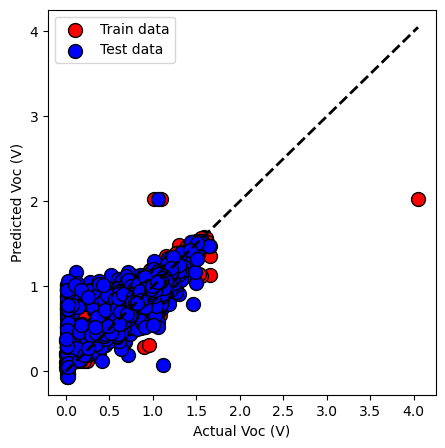

In [21]:
from catboost import CatBoostRegressor


# Convert the data to CatBoost-compatible format
X_train_cat = np.array(X_train)
X_test_cat = np.array(X_test)
y_train_cat = np.array(y_train)
y_test_cat = np.array(y_test)

# Define the model
cb = CatBoostRegressor()

# Define the hyperparameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'loss_function': ['RMSE', 'MAE']
}

# Define the search object
search = GridSearchCV(cb, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train_cat, y_train_cat)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_cb = search.best_estimator_


model_builder(best_cb, y_train_cat, y_test_cat)

In [26]:
models = [best_rf, best_xgb, best_gbr, best_dt, best_svr, best_br, best_et, best_ridge, best_knr, best_cb] # List of models
model_names = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Decision Tree', 'Support Vector',
               'Bagging Regressor', 'Extra Trees', 'Ridge Regressor', 'kNR', 'CatBoost'] # List of model names

r2_scores = []
mse_score = []
mae_score = []
rmse_score = []

for model, name in zip(models, model_names):
    if model == best_cb:
        y_pred_train = model.predict(X_train_cat)
        y_pred_test = model.predict(X_test_cat)
    else:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2 = r2_score(y_test, y_pred_test)
        mse = mean_squared_error(y_test, y_pred_test)
        mae = mean_absolute_error(y_test, y_pred_test)

    r2_scores.append(r2)
    mse_score.append(mse)
    mae_score.append(mae)

    rmse = np.sqrt(mse)
    rmse_score.append(rmse)

213:	learn: 0.0870285	total: 27.9s	remaining: 11.2s
214:	learn: 0.0869793	total: 28.1s	remaining: 11.1s
215:	learn: 0.0869237	total: 28.2s	remaining: 11s
216:	learn: 0.0868871	total: 28.3s	remaining: 10.8s
217:	learn: 0.0867987	total: 28.4s	remaining: 10.7s
218:	learn: 0.0867925	total: 28.6s	remaining: 10.6s
219:	learn: 0.0867475	total: 28.8s	remaining: 10.5s
220:	learn: 0.0867060	total: 28.9s	remaining: 10.3s
221:	learn: 0.0866572	total: 29s	remaining: 10.2s
222:	learn: 0.0865360	total: 29.1s	remaining: 10.1s
223:	learn: 0.0864802	total: 29.2s	remaining: 9.9s
224:	learn: 0.0864203	total: 29.4s	remaining: 9.8s
225:	learn: 0.0863377	total: 29.6s	remaining: 9.69s
226:	learn: 0.0862368	total: 29.8s	remaining: 9.59s
227:	learn: 0.0861858	total: 29.9s	remaining: 9.45s
228:	learn: 0.0861175	total: 30s	remaining: 9.29s
229:	learn: 0.0860690	total: 30.2s	remaining: 9.18s
230:	learn: 0.0860152	total: 30.2s	remaining: 9.02s
231:	learn: 0.0858876	total: 30.3s	remaining: 8.87s
232:	learn: 0.085857

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

211:	learn: 0.0504308	total: 29.3s	remaining: 12.2s
212:	learn: 0.0504125	total: 29.4s	remaining: 12s
213:	learn: 0.0503462	total: 29.6s	remaining: 11.9s
214:	learn: 0.0502765	total: 29.7s	remaining: 11.8s
215:	learn: 0.0502348	total: 29.8s	remaining: 11.6s
216:	learn: 0.0502097	total: 29.9s	remaining: 11.4s
217:	learn: 0.0501673	total: 30s	remaining: 11.3s
218:	learn: 0.0500765	total: 30.1s	remaining: 11.1s
219:	learn: 0.0500651	total: 30.2s	remaining: 11s
220:	learn: 0.0500171	total: 30.3s	remaining: 10.8s
221:	learn: 0.0499995	total: 30.4s	remaining: 10.7s
222:	learn: 0.0499750	total: 30.4s	remaining: 10.5s
223:	learn: 0.0499624	total: 30.5s	remaining: 10.4s
224:	learn: 0.0499462	total: 30.7s	remaining: 10.2s
225:	learn: 0.0499347	total: 30.7s	remaining: 10.1s
226:	learn: 0.0499023	total: 30.8s	remaining: 9.91s
227:	learn: 0.0498615	total: 30.9s	remaining: 9.75s
228:	learn: 0.0498484	total: 31s	remaining: 9.6s
229:	learn: 0.0498213	total: 31.1s	remaining: 9.48s
230:	learn: 0.0497252

212:	learn: 0.0509748	total: 28.8s	remaining: 11.7s
213:	learn: 0.0509213	total: 29s	remaining: 11.6s
214:	learn: 0.0509047	total: 29s	remaining: 11.5s
215:	learn: 0.0507994	total: 29.1s	remaining: 11.3s
216:	learn: 0.0507522	total: 29.2s	remaining: 11.2s
217:	learn: 0.0507371	total: 29.3s	remaining: 11s
218:	learn: 0.0506862	total: 29.4s	remaining: 10.9s
219:	learn: 0.0506600	total: 29.7s	remaining: 10.8s
220:	learn: 0.0505820	total: 29.8s	remaining: 10.7s
221:	learn: 0.0505471	total: 30s	remaining: 10.5s
222:	learn: 0.0505158	total: 30.1s	remaining: 10.4s
223:	learn: 0.0504936	total: 30.3s	remaining: 10.3s
224:	learn: 0.0504493	total: 30.5s	remaining: 10.2s
225:	learn: 0.0503866	total: 30.6s	remaining: 10s
226:	learn: 0.0503587	total: 30.8s	remaining: 9.89s
227:	learn: 0.0502942	total: 30.8s	remaining: 9.74s
228:	learn: 0.0502512	total: 31.1s	remaining: 9.64s
229:	learn: 0.0502058	total: 31.4s	remaining: 9.55s
230:	learn: 0.0501812	total: 31.5s	remaining: 9.41s
231:	learn: 0.0501210	

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

In [27]:
df_model_evaluation = pd.DataFrame({
    'Model': model_names,
    'R2': r2_scores,
    'MSE': mse_score,
    'RMSE': rmse_score,
    'MAE': mae_score
}) # Model evaluation parameters


df_model_evaluation = df_model_evaluation.sort_values(by=['R2'], ascending=False).reset_index(drop=True) # Sorting using R2 score
df_model_evaluation.to_csv(pwd + '/Hp_tuned_best_models/Voc_Model_performance.csv', index=False) # Saving evaluation paramters
df_model_evaluation

Model        R2       MSE      RMSE       MAE
0      Random Forest  0.682693  0.010366  0.101813  0.056445
1        Extra Trees  0.682294  0.010379  0.101877  0.055504
2  Bagging Regressor  0.680166  0.010448  0.102217  0.056485
3            XGBoost  0.674044  0.010648  0.103191  0.057142
4  Gradient Boosting  0.661090  0.011072  0.105222  0.055614
5                kNR  0.614021  0.012609  0.112291  0.059602
6           CatBoost  0.614021  0.012609  0.112291  0.059602
7      Decision Tree  0.589802  0.013400  0.115760  0.066105
8     Support Vector  0.502609  0.016249  0.127471  0.080315
9    Ridge Regressor  0.416551  0.019060  0.138059  0.089091

173:	learn: 0.0523151	total: 22.9s	remaining: 16.6s
174:	learn: 0.0522565	total: 22.9s	remaining: 16.4s
175:	learn: 0.0522067	total: 23s	remaining: 16.2s
176:	learn: 0.0521651	total: 23.1s	remaining: 16s
177:	learn: 0.0521207	total: 23.2s	remaining: 15.9s
178:	learn: 0.0520763	total: 23.2s	remaining: 15.7s
179:	learn: 0.0519566	total: 23.3s	remaining: 15.5s
180:	learn: 0.0519270	total: 23.5s	remaining: 15.5s
181:	learn: 0.0518840	total: 23.6s	remaining: 15.3s
182:	learn: 0.0517937	total: 23.6s	remaining: 15.1s
183:	learn: 0.0517092	total: 23.9s	remaining: 15s
184:	learn: 0.0516362	total: 23.9s	remaining: 14.9s
185:	learn: 0.0515961	total: 23.9s	remaining: 14.7s
186:	learn: 0.0515315	total: 24.1s	remaining: 14.6s
187:	learn: 0.0515038	total: 24.1s	remaining: 14.4s
188:	learn: 0.0514881	total: 24.3s	remaining: 14.3s
189:	learn: 0.0514598	total: 24.3s	remaining: 14.1s
190:	learn: 0.0514444	total: 24.4s	remaining: 13.9s
191:	learn: 0.0513742	total: 24.5s	remaining: 13.8s
192:	learn: 0.0513

213:	learn: 0.0509247	total: 28.6s	remaining: 11.5s
214:	learn: 0.0508749	total: 28.7s	remaining: 11.4s
215:	learn: 0.0508401	total: 28.7s	remaining: 11.2s
216:	learn: 0.0508188	total: 28.8s	remaining: 11s
217:	learn: 0.0507697	total: 28.9s	remaining: 10.9s
218:	learn: 0.0507235	total: 29s	remaining: 10.7s
219:	learn: 0.0507006	total: 29.1s	remaining: 10.6s
220:	learn: 0.0506653	total: 29.2s	remaining: 10.5s
221:	learn: 0.0506065	total: 29.3s	remaining: 10.3s
222:	learn: 0.0505379	total: 29.4s	remaining: 10.1s
223:	learn: 0.0505108	total: 29.4s	remaining: 9.98s
224:	learn: 0.0504684	total: 29.4s	remaining: 9.82s
225:	learn: 0.0504122	total: 29.5s	remaining: 9.67s
226:	learn: 0.0503738	total: 29.6s	remaining: 9.52s
227:	learn: 0.0503225	total: 29.7s	remaining: 9.38s
228:	learn: 0.0502549	total: 29.7s	remaining: 9.22s
229:	learn: 0.0501975	total: 29.8s	remaining: 9.06s
230:	learn: 0.0501566	total: 29.9s	remaining: 8.92s
231:	learn: 0.0501358	total: 29.9s	remaining: 8.77s
232:	learn: 0.05

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/minicon

214:	learn: 0.0796628	total: 24.7s	remaining: 9.76s
215:	learn: 0.0795031	total: 24.7s	remaining: 9.62s
216:	learn: 0.0794720	total: 24.8s	remaining: 9.48s
217:	learn: 0.0793630	total: 24.9s	remaining: 9.36s
218:	learn: 0.0792843	total: 25s	remaining: 9.23s
219:	learn: 0.0792027	total: 25s	remaining: 9.1s
220:	learn: 0.0791962	total: 25.1s	remaining: 8.98s
221:	learn: 0.0791490	total: 25.2s	remaining: 8.84s
222:	learn: 0.0791102	total: 25.3s	remaining: 8.72s
223:	learn: 0.0790131	total: 25.3s	remaining: 8.59s
224:	learn: 0.0789094	total: 25.4s	remaining: 8.48s
225:	learn: 0.0787988	total: 25.5s	remaining: 8.35s
226:	learn: 0.0787410	total: 25.6s	remaining: 8.23s
227:	learn: 0.0786822	total: 25.7s	remaining: 8.1s
228:	learn: 0.0786040	total: 25.7s	remaining: 7.97s
229:	learn: 0.0785571	total: 25.8s	remaining: 7.85s
230:	learn: 0.0784920	total: 25.8s	remaining: 7.72s
231:	learn: 0.0784413	total: 25.9s	remaining: 7.59s
232:	learn: 0.0784001	total: 26s	remaining: 7.48s
233:	learn: 0.078319

173:	learn: 0.0813257	total: 23.5s	remaining: 17s
174:	learn: 0.0812723	total: 23.6s	remaining: 16.8s
175:	learn: 0.0811326	total: 23.6s	remaining: 16.6s
176:	learn: 0.0810244	total: 23.6s	remaining: 16.4s
177:	learn: 0.0808880	total: 23.8s	remaining: 16.3s
178:	learn: 0.0808357	total: 23.8s	remaining: 16.1s
179:	learn: 0.0806461	total: 24s	remaining: 16s
180:	learn: 0.0806105	total: 24s	remaining: 15.8s
181:	learn: 0.0805595	total: 24s	remaining: 15.6s
182:	learn: 0.0803882	total: 24.1s	remaining: 15.4s
183:	learn: 0.0803473	total: 24.2s	remaining: 15.3s
184:	learn: 0.0802729	total: 24.4s	remaining: 15.2s
185:	learn: 0.0802100	total: 24.5s	remaining: 15s
186:	learn: 0.0801607	total: 24.5s	remaining: 14.8s
187:	learn: 0.0801286	total: 24.6s	remaining: 14.7s
188:	learn: 0.0800769	total: 24.8s	remaining: 14.5s
189:	learn: 0.0799989	total: 24.9s	remaining: 14.4s
190:	learn: 0.0799723	total: 25s	remaining: 14.3s
191:	learn: 0.0798948	total: 25.1s	remaining: 14.1s
192:	learn: 0.0798254	tota

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

153:	learn: 0.0501628	total: 19.3s	remaining: 18.3s
154:	learn: 0.0501072	total: 19.4s	remaining: 18.2s
155:	learn: 0.0500670	total: 19.5s	remaining: 18s
156:	learn: 0.0499664	total: 19.6s	remaining: 17.9s
157:	learn: 0.0499198	total: 19.7s	remaining: 17.7s
158:	learn: 0.0498692	total: 19.8s	remaining: 17.6s
159:	learn: 0.0498037	total: 20s	remaining: 17.5s
160:	learn: 0.0497709	total: 20s	remaining: 17.3s
161:	learn: 0.0497433	total: 20s	remaining: 17.1s
162:	learn: 0.0496717	total: 20.1s	remaining: 16.9s
163:	learn: 0.0496207	total: 20.1s	remaining: 16.7s
164:	learn: 0.0495848	total: 20.3s	remaining: 16.6s
165:	learn: 0.0495431	total: 20.4s	remaining: 16.5s
166:	learn: 0.0494782	total: 20.6s	remaining: 16.4s
167:	learn: 0.0494084	total: 20.7s	remaining: 16.2s
168:	learn: 0.0493354	total: 20.8s	remaining: 16.1s
169:	learn: 0.0493109	total: 20.9s	remaining: 16s
170:	learn: 0.0492722	total: 21s	remaining: 15.8s
171:	learn: 0.0492579	total: 21.1s	remaining: 15.7s
172:	learn: 0.0492279	to

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda

273:	learn: 0.0460105	total: 23.6s	remaining: 2.24s
274:	learn: 0.0459976	total: 23.6s	remaining: 2.15s
275:	learn: 0.0459379	total: 23.6s	remaining: 2.05s
276:	learn: 0.0459108	total: 23.6s	remaining: 1.96s
277:	learn: 0.0458878	total: 23.6s	remaining: 1.87s
278:	learn: 0.0458816	total: 23.6s	remaining: 1.78s
279:	learn: 0.0458588	total: 23.6s	remaining: 1.69s
280:	learn: 0.0458457	total: 23.6s	remaining: 1.6s
281:	learn: 0.0458158	total: 23.7s	remaining: 1.51s
282:	learn: 0.0457913	total: 23.7s	remaining: 1.42s
283:	learn: 0.0457633	total: 23.7s	remaining: 1.33s
284:	learn: 0.0457553	total: 23.7s	remaining: 1.25s
285:	learn: 0.0457251	total: 23.7s	remaining: 1.16s
286:	learn: 0.0456928	total: 23.7s	remaining: 1.07s
287:	learn: 0.0456339	total: 23.7s	remaining: 987ms
288:	learn: 0.0456190	total: 23.7s	remaining: 902ms
289:	learn: 0.0455800	total: 23.7s	remaining: 817ms
290:	learn: 0.0455538	total: 23.7s	remaining: 733ms
291:	learn: 0.0455202	total: 23.7s	remaining: 650ms
292:	learn: 0